In [3]:
import os 
import glob
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [4]:
photos = []

# Iterate directory
for path in os.listdir('E://my projects//Task//train_v2'):
    # check if current path is a file
    if os.path.isfile(os.path.join('E://my projects//Task//train_v2', path)):
        photos.append(path)


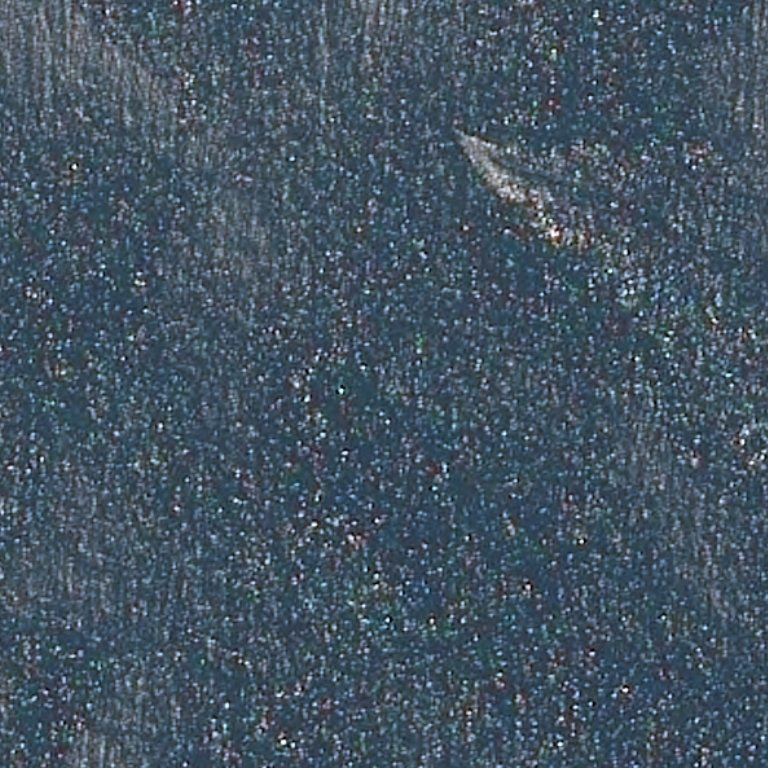

In [3]:
Image.open("E://my projects//Task//train_v2//"+photos[9])

In [4]:
img1 = cv2.imread("E://my projects//Task//train_v2//" + photos[1])
img1.shape

(768, 768, 3)

In [16]:
"""
def get_image_files(folder_path):
    image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
    return image_files

folder_path = "E://my projects//Task//train_v2//"
photos = get_image_files(folder_path)

first_image = cv2.imread(photos[0])
height, width, channels = first_image.shape

# Перевірте, чи всі інші зображення мають такий же розмір
all_images_have_same_size = all(cv2.imread(photo).shape == (height, width, channels) for photo in photos)

if all_images_have_same_size:
    print("Всі зображення мають однаковий розмір.")
else:
    print("Зображення мають різні розміри.")"""

Всі зображення мають однаковий розмір.


In [5]:
data = pd.read_csv("E://my projects//Task//train_ship_segmentations_v2.csv")

In [6]:
data.head()

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...

In [7]:
testing_mask = "348252 2 349020 4 349787 7 350555 9 351323 8 352090 9 352858 9 353626 8 354393 9 355161 8 355929 8 356696 9 357464 8 358232 8 358999 9 359767 8 360534 9 361302 9 362070 8 362837 9 363605 8 364373 8 365140 9 365908 8 366676 8 367443 9 368211 8 368979 8 369746 8 370514 8 371284 6 372056 1"
testing_mask = testing_mask.split(" ")
rle = list(map(int, testing_mask))
rle

[348252,
 2,
 349020,
 4,
 349787,
 7,
 350555,
 9,
 351323,
 8,
 352090,
 9,
 352858,
 9,
 353626,
 8,
 354393,
 9,
 355161,
 8,
 355929,
 8,
 356696,
 9,
 357464,
 8,
 358232,
 8,
 358999,
 9,
 359767,
 8,
 360534,
 9,
 361302,
 9,
 362070,
 8,
 362837,
 9,
 363605,
 8,
 364373,
 8,
 365140,
 9,
 365908,
 8,
 366676,
 8,
 367443,
 9,
 368211,
 8,
 368979,
 8,
 369746,
 8,
 370514,
 8,
 371284,
 6,
 372056,
 1]

In [8]:
pixel, pixel_count = [],[]
[pixel.append(rle[i]) if i%2==0 else pixel_count.append(rle[i]) for i in range (0, len(rle))]
print('pixel starting points:\n',pixel)
print('pixel counting:\n', pixel_count)

pixel starting points:
 [348252, 349020, 349787, 350555, 351323, 352090, 352858, 353626, 354393, 355161, 355929, 356696, 357464, 358232, 358999, 359767, 360534, 361302, 362070, 362837, 363605, 364373, 365140, 365908, 366676, 367443, 368211, 368979, 369746, 370514, 371284, 372056]
pixel counting:
 [2, 4, 7, 9, 8, 9, 9, 8, 9, 8, 8, 9, 8, 8, 9, 8, 9, 9, 8, 9, 8, 8, 9, 8, 8, 9, 8, 8, 8, 8, 6, 1]


In [9]:
rle_pixels = [list(range(pixel[i],pixel[i]+pixel_count[i])) for i in range(0, len(pixel))]
print('rle_pixels\n:', rle_pixels)

rle_pixels
: [[348252, 348253], [349020, 349021, 349022, 349023], [349787, 349788, 349789, 349790, 349791, 349792, 349793], [350555, 350556, 350557, 350558, 350559, 350560, 350561, 350562, 350563], [351323, 351324, 351325, 351326, 351327, 351328, 351329, 351330], [352090, 352091, 352092, 352093, 352094, 352095, 352096, 352097, 352098], [352858, 352859, 352860, 352861, 352862, 352863, 352864, 352865, 352866], [353626, 353627, 353628, 353629, 353630, 353631, 353632, 353633], [354393, 354394, 354395, 354396, 354397, 354398, 354399, 354400, 354401], [355161, 355162, 355163, 355164, 355165, 355166, 355167, 355168], [355929, 355930, 355931, 355932, 355933, 355934, 355935, 355936], [356696, 356697, 356698, 356699, 356700, 356701, 356702, 356703, 356704], [357464, 357465, 357466, 357467, 357468, 357469, 357470, 357471], [358232, 358233, 358234, 358235, 358236, 358237, 358238, 358239], [358999, 359000, 359001, 359002, 359003, 359004, 359005, 359006, 359007], [359767, 359768, 359769, 359770, 359

In [10]:
rle_mask_pixels = sum(rle_pixels,[]) 
print('rle mask pixels:\n', rle_mask_pixels)

rle mask pixels:
 [348252, 348253, 349020, 349021, 349022, 349023, 349787, 349788, 349789, 349790, 349791, 349792, 349793, 350555, 350556, 350557, 350558, 350559, 350560, 350561, 350562, 350563, 351323, 351324, 351325, 351326, 351327, 351328, 351329, 351330, 352090, 352091, 352092, 352093, 352094, 352095, 352096, 352097, 352098, 352858, 352859, 352860, 352861, 352862, 352863, 352864, 352865, 352866, 353626, 353627, 353628, 353629, 353630, 353631, 353632, 353633, 354393, 354394, 354395, 354396, 354397, 354398, 354399, 354400, 354401, 355161, 355162, 355163, 355164, 355165, 355166, 355167, 355168, 355929, 355930, 355931, 355932, 355933, 355934, 355935, 355936, 356696, 356697, 356698, 356699, 356700, 356701, 356702, 356703, 356704, 357464, 357465, 357466, 357467, 357468, 357469, 357470, 357471, 358232, 358233, 358234, 358235, 358236, 358237, 358238, 358239, 358999, 359000, 359001, 359002, 359003, 359004, 359005, 359006, 359007, 359767, 359768, 359769, 359770, 359771, 359772, 359773, 35977

In [11]:
mask_img = np.zeros((768*768,1), dtype=int)


In [12]:
mask_img[rle_mask_pixels] = 255

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2

# Завантажте CSV файл
csv_path = "E://my projects//Task//train_ship_segmentations_v2.csv"
df = pd.read_csv(csv_path)

# Шлях для збереження масок
output_mask_folder = "E://my projects//Task//Masks"

# Перебір кожного рядка у DataFrame
for index, row in df.iterrows():
    image_id = row['ImageId']
    encoded_pixels = row['EncodedPixels']

    # Якщо є EncodedPixels, то обробте маску
    if isinstance(encoded_pixels, str):
        encoded_pixels = encoded_pixels.split(" ")
        rle = list(map(int, encoded_pixels))

        pixel, pixel_count = [], []
        [pixel.append(rle[i]) if i % 2 == 0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]

        # Створіть список пікселів на основі кодування RLE
        rle_pixels = [list(range(p-1, p-1 + c)) for p, c in zip(pixel, pixel_count)]  # Змінено індексацію

        # Злиття списку пікселів
        rle_mask_pixels = sum(rle_pixels, [])

        # Створення порожньої маски
        mask_img = np.zeros((768 * 768,), dtype=int)

        # Перевірте, чи не виходите за межі розмірів масиву
        valid_indices = [idx for idx in rle_mask_pixels if idx < 768 * 768]
        mask_img[valid_indices] = 255

        # Перетворення форми маски
        mask_img_reshaped = mask_img.reshape(768, 768)
        mirrored_mask = np.fliplr(mask_img_reshaped)

        # Обертання на 180 градусів
        rotated_mask = np.rot90(mirrored_mask)

        # Завантаження оригінального зображення
        original_image_path = f"E://my projects//Task//Images//{image_id}"
        original_image = cv2.imread(original_image_path)

        # Збереження оберненої маски
        rotated_mask_colored = cv2.merge([rotated_mask, rotated_mask, rotated_mask])
        rotated_mask_path = os.path.join(output_mask_folder, f"{image_id}")
        cv2.imwrite(rotated_mask_path, rotated_mask_colored)


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [51]:
print(f"Loading mask: {mask_filename}")
mask = cv2.imread(mask_filename, cv2.IMREAD_GRAYSCALE)

if mask is None:
    print(f"Error loading mask: {mask_filename}")

NameError: name 'mask_filename' is not defined

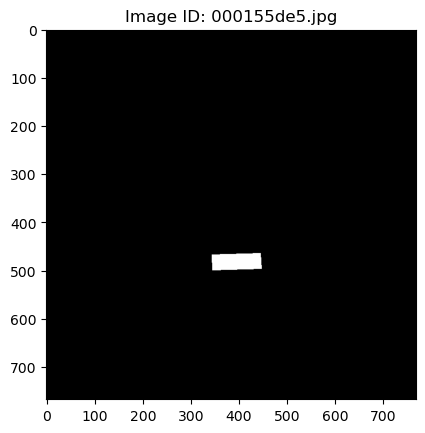

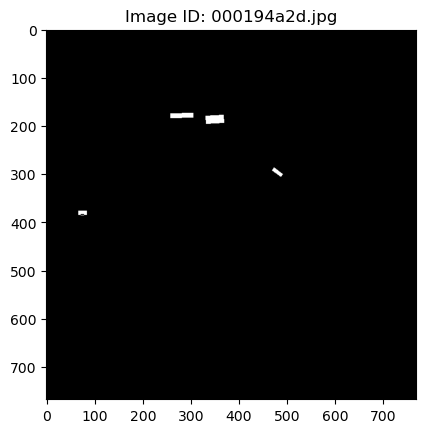

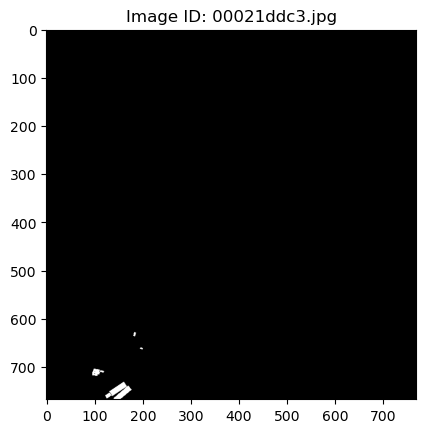

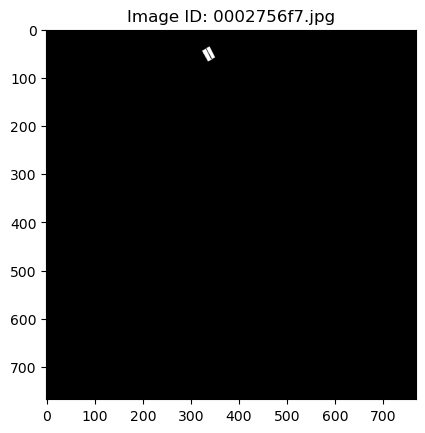

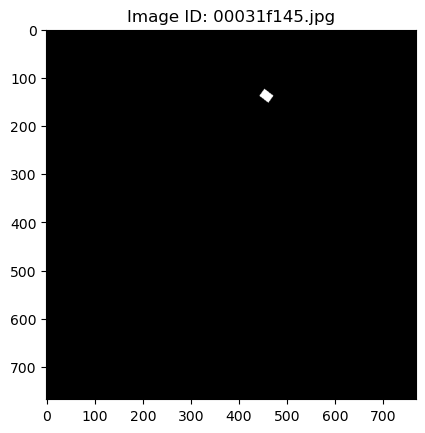

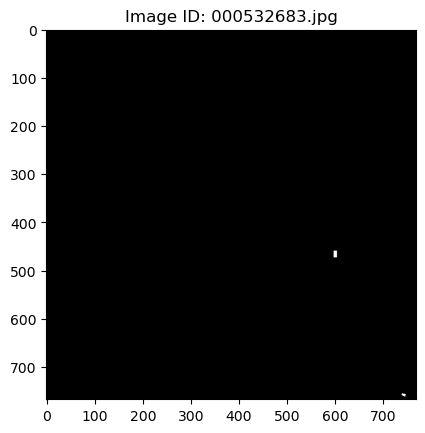

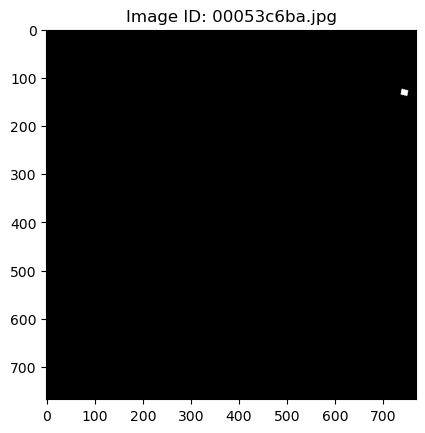

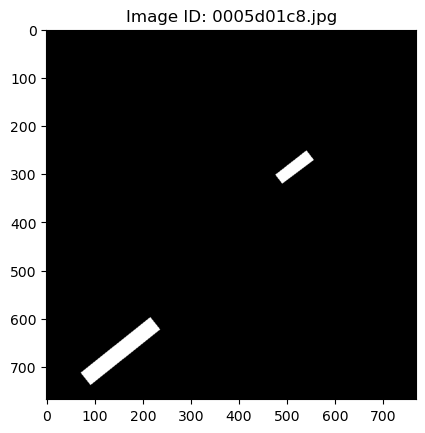

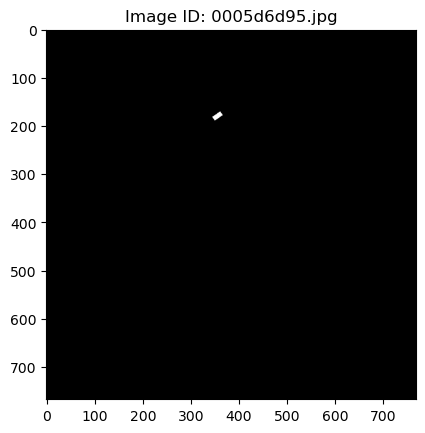

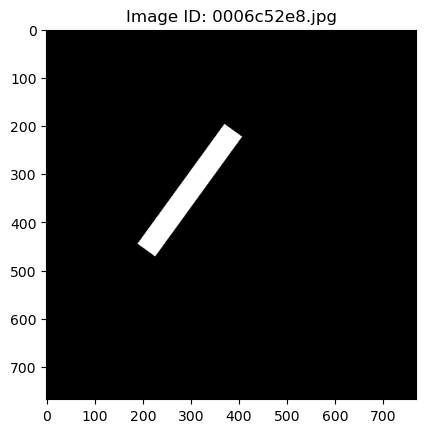

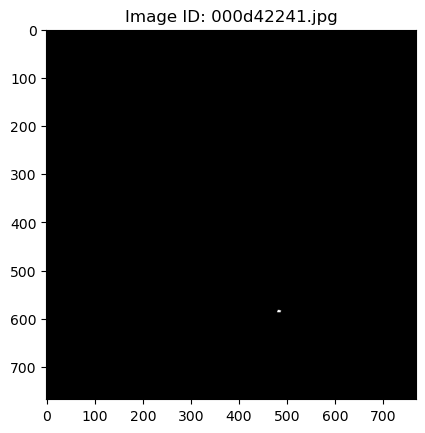

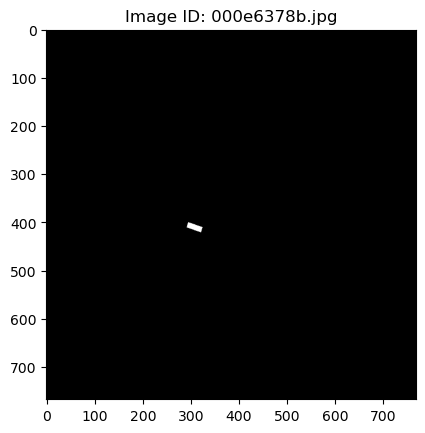

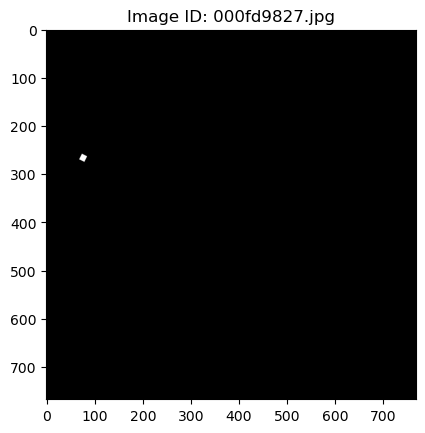

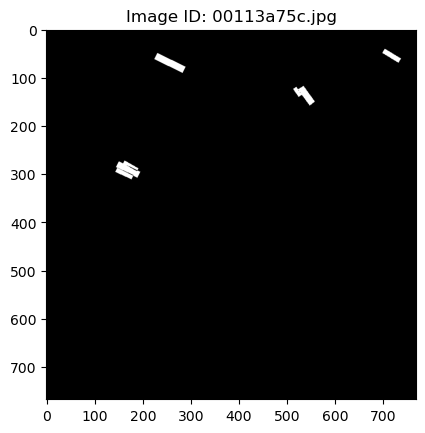

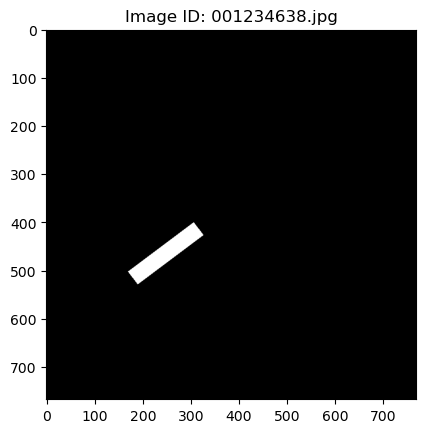

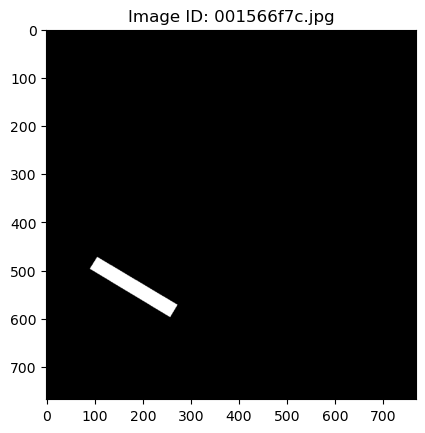

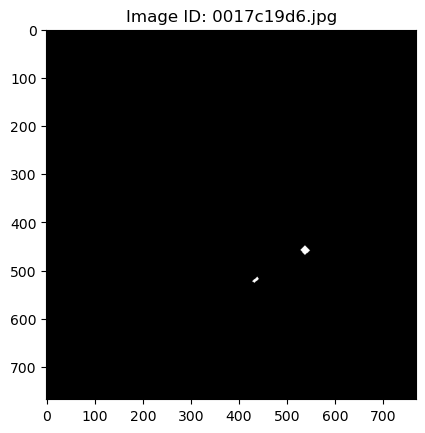

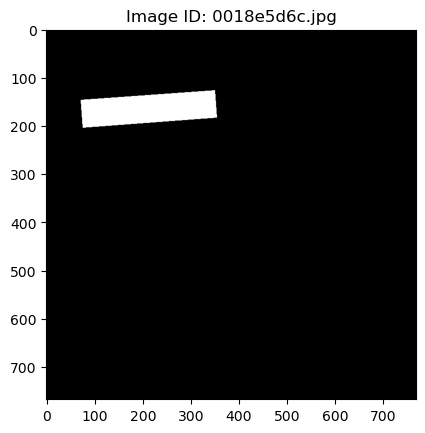

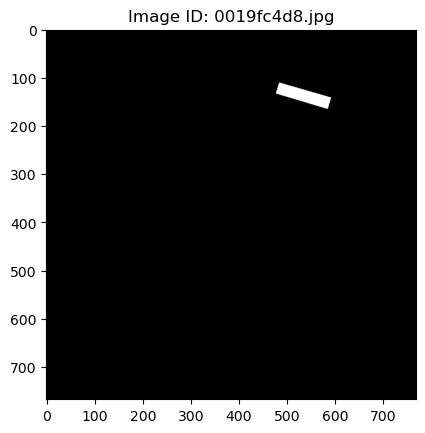

In [3]:
import os
import pandas as pd
import numpy as np
import cv2
from itertools import islice
import matplotlib.pyplot as plt

# Завантажте CSV файл
csv_path = "E://my projects//Task//train_ship_segmentations_v2.csv"
df = pd.read_csv(csv_path)

# Створіть словник для зберігання об'єднаних масок для кожного зображення
image_masks = {}

# Перебір кожного рядка у DataFrame
for index, row in islice(df.iterrows(), 100):
    image_id = row['ImageId']
    encoded_pixels = row['EncodedPixels']

    # Якщо є EncodedPixels, то обробте маску
    if isinstance(encoded_pixels, str):
        encoded_pixels = encoded_pixels.split(" ")
        rle = list(map(int, encoded_pixels))

        pixel, pixel_count = [], []
        [pixel.append(rle[i]) if i % 2 == 0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]

        # Створіть список пікселів на основі кодування RLE
        rle_pixels = [list(range(p-1, p-1 + c)) for p, c in zip(pixel, pixel_count)]

        # Злиття списку пікселів
        rle_mask_pixels = sum(rle_pixels, [])

        # Створення порожньої маски
        mask_img = np.zeros((768 * 768,), dtype=int)

        # Перевірте, чи не виходите за межі розмірів масиву
        valid_indices = [idx for idx in rle_mask_pixels if idx < 768 * 768]
        mask_img[valid_indices] = 255

        # Перетворення форми маски
        mask_img_reshaped = mask_img.reshape(768, 768)
        mirrored_mask = np.fliplr(mask_img_reshaped)

        # Обертання на 180 градусів
        rotated_mask = np.rot90(mirrored_mask)

        # Додайте об'єднану маску до словника для даного зображення
        if image_id in image_masks:
            image_masks[image_id] += rotated_mask
        else:
            image_masks[image_id] = rotated_mask

# Виведення об'єднаних масок для кожного зображення
for image_id, merged_mask in image_masks.items():
    plt.imshow(merged_mask, cmap='gray')
    plt.title(f"Image ID: {image_id}")
    plt.show()

In [6]:
import os
import pandas as pd
import numpy as np
import cv2
from itertools import islice
import matplotlib.pyplot as plt

# Завантажте CSV файл
csv_path = "E://my projects//Task//train_ship_segmentations_v2.csv"
df = pd.read_csv(csv_path)

# Створіть папку для збереження масок, якщо вона не існує
output_folder = "E://my projects//Task//Masks"
os.makedirs(output_folder, exist_ok=True)

# Створіть словник для зберігання об'єднаних масок для кожного зображення
image_masks = {}

# Перебір кожного рядка у DataFrame
for index, row in islice(df.iterrows(), 5):
    image_id = row['ImageId']
    encoded_pixels = row['EncodedPixels']

    # Якщо є EncodedPixels, то обробте маску
    if isinstance(encoded_pixels, str):
        encoded_pixels = encoded_pixels.split(" ")
        rle = list(map(int, encoded_pixels))

        pixel, pixel_count = [], []
        [pixel.append(rle[i]) if i % 2 == 0 else pixel_count.append(rle[i]) for i in range(0, len(rle))]

        # Створіть список пікселів на основі кодування RLE
        rle_pixels = [list(range(p-1, p-1 + c)) for p, c in zip(pixel, pixel_count)]

        # Злиття списку пікселів
        rle_mask_pixels = sum(rle_pixels, [])

        # Створення порожньої маски
        mask_img = np.zeros((768 * 768,), dtype=int)

        # Перевірте, чи не виходите за межі розмірів масиву
        valid_indices = [idx for idx in rle_mask_pixels if idx < 768 * 768]
        mask_img[valid_indices] = 255

        # Перевірка, чи є в масці хоча б один піксель, який не є чорним
        if np.max(mask_img) > 0:
            # Перетворення форми маски
            mask_img_reshaped = mask_img.reshape(768, 768)
            mirrored_mask = np.fliplr(mask_img_reshaped)

            # Обертання на 180 градусів
            rotated_mask = np.rot90(mirrored_mask)

            # Додайте об'єднану маску до словника для даного зображення
            if image_id in image_masks:
                image_masks[image_id] += rotated_mask
            else:
                image_masks[image_id] = rotated_mask

# Збереження об'єднаних масок в папці
for image_id, merged_mask in image_masks.items():
    output_path = os.path.join(output_folder, f"{image_id}.png")

    # Збереження маски у форматі PNG (з розширенням файлу)
    cv2.imwrite(output_path, merged_mask.astype(np.uint8))

    print(f"Збереження маски для {image_id} у файл {output_path}")

print("Маски збережено в папці:", output_folder)

Збереження маски для 000155de5.jpg у файл E://my projects//Task//Masks\000155de5.jpg.png
Збереження маски для 000194a2d.jpg у файл E://my projects//Task//Masks\000194a2d.jpg.png
Маски збережено в папці: E://my projects//Task//Masks


In [7]:
import os
import cv2
import numpy as np

# Шлях до фолдера з масками
folder_path = "E://my projects//Computer vision//masks"

# Отримати список всіх файлів у фолдері
mask_files = os.listdir(folder_path)

# Перевірити кожен файл
for mask_file in mask_files:
    # Повний шлях до файлу
    mask_path = os.path.join(folder_path, mask_file)

    # Завантаження маски
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Перевірка, чи маска містить хоча б один ненульовий піксель
    if np.max(mask) == 0:
        # Якщо маска чорна, то видаліть файл
        os.remove(mask_path)
        print(f"Видалено: {mask_file}")
    else:
        print(f"Збережено: {mask_file}")

Видалено: 00003e153.png
Видалено: 0001124c7.png
Збережено: 000155de5.png
Збережено: 000194a2d.png
Видалено: 0001b1832.png
Збережено: 00021ddc3.png
Збережено: 0002756f7.png
Видалено: 0002d0f32.png
Видалено: 000303d4d.png
Збережено: 00031f145.png
Видалено: 00052ed46.png
Збережено: 000532683.png
Збережено: 00053c6ba.png
Видалено: 00057a50d.png
Видалено: 000592296.png
Збережено: 0005d01c8.png
Збережено: 0005d6d95.png
Збережено: 0006c52e8.png
Видалено: 0007b8229.png
Видалено: 000805313.png
Видалено: 000811bb6.png
Видалено: 0008d6216.png
Видалено: 000913daf.png
Видалено: 000952d51.png
Видалено: 000969125.png
Видалено: 0009a46e1.png
Видалено: 000a4d4fd.png
Видалено: 000aed819.png
Видалено: 000baef0c.png
Видалено: 000bd9ac4.png
Видалено: 000c150b0.png
Видалено: 000c34352.png
Видалено: 000d26c17.png
Збережено: 000d42241.png
Видалено: 000db3e62.png
Видалено: 000e37fc6.png
Збережено: 000e6378b.png
Видалено: 000e64855.png
Видалено: 000f1f959.png
Видалено: 000f7e728.png
Видалено: 000f7f2fd.png
Збер

Видалено: 00887bc15.png
Видалено: 00895a91b.png
Видалено: 00898bc3a.png
Видалено: 0089afe3f.png
Видалено: 0089c7bf1.png
Видалено: 0089fe989.png
Видалено: 008a1bdb4.png
Видалено: 008aa8cda.png
Видалено: 008aafbd4.png
Видалено: 008b86d16.png
Видалено: 008b94a8a.png
Збережено: 008bc8983.png
Збережено: 008be7e31.png
Видалено: 008be8252.png
Видалено: 008c71d89.png
Видалено: 008c8a442.png
Видалено: 008cd37c7.png
Видалено: 008ceaeb0.png
Видалено: 008d0ff07.png
Видалено: 008d15664.png
Збережено: 008d2170e.png
Видалено: 008da962d.png
Видалено: 008dbba6c.png
Видалено: 008e155f6.png
Видалено: 008e764da.png
Збережено: 008fd2b42.png
Видалено: 009105bc2.png
Видалено: 00918be6f.png
Видалено: 0091de0c1.png
Видалено: 0092a3597.png
Видалено: 0092b764b.png
Видалено: 009315aad.png
Видалено: 009363023.png
Збережено: 0093754d4.png
Видалено: 009385621.png
Видалено: 0093a4735.png
Видалено: 0093b5ad2.png
Видалено: 009412a5b.png
Видалено: 009412ee5.png
Видалено: 009432a16.png
Видалено: 00944a000.png
Видалено: 0

Видалено: 00f970313.png
Видалено: 00f9c9a23.png
Видалено: 00fa27dcf.png
Видалено: 00faeedcd.png
Видалено: 00fafce7f.png
Видалено: 00fb1dc8d.png
Видалено: 00fb4ec4c.png
Збережено: 00fba1ce7.png
Видалено: 00fc51232.png
Видалено: 00fc62a1b.png
Видалено: 00fcae382.png
Видалено: 00fcdb15c.png
Видалено: 00fd837c6.png
Збережено: 00fd8e126.png
Видалено: 00febb0e8.png
Видалено: 00fed32a5.png
Видалено: 00fef1178.png
Видалено: 00ff06a1f.png
Видалено: 00ff19c7b.png
Видалено: 00ff5bd0b.png
Видалено: 00ffb2f7b.png
Видалено: 00ffc77a2.png
Збережено: 01000f132.png
Видалено: 0100a9375.png
Видалено: 0100e8d86.png
Видалено: 010121351.png
Видалено: 01015b885.png
Видалено: 01027d1d7.png
Видалено: 0102fbbf9.png
Збережено: 01031cea7.png
Видалено: 01034d8b2.png
Збережено: 010396a0e.png
Видалено: 0103b4a88.png
Видалено: 0103e6841.png
Видалено: 0104b9b90.png
Видалено: 0104e3167.png
Видалено: 0104e9f46.png
Збережено: 0104ed53e.png
Видалено: 0105ced9b.png
Видалено: 0105cf277.png
Видалено: 0105f1088.png
Видалено: 

Видалено: 0168136f5.png
Видалено: 0168f7408.png
Видалено: 016975974.png
Видалено: 0169da4d2.png
Видалено: 016a83da6.png
Видалено: 016ac674e.png
Видалено: 016ad56c1.png
Видалено: 016b30735.png
Збережено: 016b781a9.png
Видалено: 016ba1d67.png
Видалено: 016bb0883.png
Збережено: 016bb0df6.png
Видалено: 016be8f13.png
Видалено: 016c0da98.png
Видалено: 016c70afa.png
Збережено: 016ca71c9.png
Видалено: 016cc6b10.png
Видалено: 016d1261c.png
Видалено: 016d67401.png
Збережено: 016dcd260.png
Видалено: 016e2f16b.png
Видалено: 016e595f3.png
Видалено: 016ea4dbf.png
Збережено: 016ec07ac.png
Видалено: 016eef9de.png
Видалено: 016f50f79.png
Видалено: 016f89755.png
Видалено: 017009f19.png
Видалено: 01702066a.png
Видалено: 0170d5be7.png
Видалено: 0170e87c8.png
Видалено: 01712474d.png
Збережено: 0171499be.png
Видалено: 01715451e.png
Збережено: 0172ba95b.png
Видалено: 0172c7d99.png
Видалено: 01731010a.png
Видалено: 01732cb4f.png
Видалено: 0173446a0.png
Видалено: 017361f07.png
Видалено: 01749de7d.png
Видалено:

Збережено: 01e06a4c8.png
Видалено: 01e06b76d.png
Видалено: 01e0ad03e.png
Видалено: 01e0fbf33.png
Збережено: 01e0fce2c.png
Видалено: 01e1d56d0.png
Видалено: 01e2f88db.png
Збережено: 01e33f740.png
Видалено: 01e34d51f.png
Видалено: 01e3d543c.png
Збережено: 01e4019bc.png
Збережено: 01e44cff9.png
Видалено: 01e4fdbed.png
Збережено: 01e53d284.png
Видалено: 01e583366.png
Видалено: 01e669b5c.png
Збережено: 01e744922.png
Видалено: 01e754831.png
Видалено: 01e76c35d.png
Збережено: 01e78a5d3.png
Збережено: 01e8037b5.png
Видалено: 01e85a3da.png
Видалено: 01e899165.png
Видалено: 01e8e51ec.png
Видалено: 01e90fdbf.png
Видалено: 01e97ce7e.png
Видалено: 01ea4820f.png
Видалено: 01ea6e925.png
Видалено: 01ebe1831.png
Видалено: 01ec3ac77.png
Видалено: 01ec512cd.png
Збережено: 01ecad2c6.png
Видалено: 01ecba9b4.png
Збережено: 01ed38a14.png
Видалено: 01ed70c58.png
Видалено: 01ed87ecb.png
Збережено: 01edf4e56.png
Видалено: 01ee06d13.png
Збережено: 01ef10853.png
Збережено: 01eff2f3e.png
Видалено: 01f0f3e8e.png
Ви

Видалено: 02644ef05.png
Видалено: 02646214e.png
Видалено: 02649646e.png
Видалено: 02650299d.png
Видалено: 0265c08f0.png
Видалено: 0265c210b.png
Видалено: 0266268fa.png
Видалено: 0266d432e.png
Видалено: 0267ff0b8.png
Збережено: 02680b31f.png
Видалено: 02688343b.png
Збережено: 0268a89cf.png
Видалено: 0268e218b.png
Видалено: 02694afb1.png
Видалено: 02698bd0e.png
Видалено: 0269b1787.png
Збережено: 026a33fbd.png
Видалено: 026a4c17a.png
Видалено: 026a6bdf1.png
Видалено: 026a8a379.png
Видалено: 026ac57ce.png
Видалено: 026b0d0d5.png
Видалено: 026b15aeb.png
Видалено: 026b3e250.png
Видалено: 026b66a3e.png
Видалено: 026b8e116.png
Збережено: 026bb1723.png
Видалено: 026bce8ee.png
Збережено: 026be75a5.png
Видалено: 026c6e9bf.png
Видалено: 026cff18d.png
Видалено: 026d2493c.png
Видалено: 026d50539.png
Видалено: 026d6a519.png
Збережено: 026da90a6.png
Збережено: 026dae336.png
Видалено: 026dbd337.png
Видалено: 026de266c.png
Збережено: 026e583a0.png
Видалено: 026ede99c.png
Видалено: 026f5c230.png
Збережен

Видалено: 02d5a8cc1.png
Збережено: 02d5afc38.png
Видалено: 02d5f31fd.png
Збережено: 02d67cdab.png
Збережено: 02d6c28bf.png
Видалено: 02d6d3aba.png
Видалено: 02d7581b7.png
Збережено: 02d772058.png
Збережено: 02d7e346f.png
Видалено: 02d7f7d79.png
Збережено: 02d886255.png
Видалено: 02d928c1e.png
Видалено: 02d93cbf1.png
Збережено: 02d958534.png
Видалено: 02d97c5bb.png
Видалено: 02d9c899b.png
Видалено: 02dacd74e.png
Видалено: 02db69003.png
Видалено: 02db7d0c8.png
Видалено: 02db88cc5.png
Збережено: 02ddb350f.png
Збережено: 02de1b37d.png
Збережено: 02de2c3a6.png
Видалено: 02df7aa11.png
Збережено: 02dfa1392.png
Видалено: 02dfc6a62.png
Видалено: 02e044d26.png
Видалено: 02e04a2ba.png
Видалено: 02e15f70e.png
Збережено: 02e18ce1d.png
Видалено: 02e22b90e.png
Видалено: 02e25e554.png
Видалено: 02e304324.png
Видалено: 02e35cc36.png
Збережено: 02e39612d.png
Збережено: 02e434433.png
Збережено: 02e440917.png
Видалено: 02e4c0a3b.png
Видалено: 02e5cfabd.png
Видалено: 02e5e9199.png
Збережено: 02e5fad41.png


Видалено: 035308d3e.png
Видалено: 03531443a.png
Видалено: 03533a855.png
Видалено: 03537a74b.png
Видалено: 03540e153.png
Видалено: 03541418b.png
Видалено: 0354b2557.png
Видалено: 0354eceb2.png
Збережено: 0354f47d7.png
Збережено: 035613a0a.png
Видалено: 035670204.png
Видалено: 035694f22.png
Видалено: 0356d587e.png
Видалено: 035794b2b.png
Видалено: 0357a9917.png
Видалено: 0357bd14f.png
Збережено: 0357dadf4.png
Видалено: 035927b95.png
Видалено: 035974ff7.png
Видалено: 0359b4d40.png
Видалено: 035a4d20b.png
Видалено: 035a70b63.png
Видалено: 035aa060b.png
Видалено: 035b2f630.png
Збережено: 035ca3e0e.png
Видалено: 035cab3f3.png
Видалено: 035caeb07.png
Видалено: 035d7279e.png
Видалено: 035d737bb.png
Видалено: 035de1936.png
Збережено: 035e3ffa8.png
Видалено: 035e53d79.png
Видалено: 035e5ed97.png
Збережено: 035e74468.png
Видалено: 035eafa77.png
Збережено: 035edd5ba.png
Видалено: 035f6d7db.png
Видалено: 03600f027.png
Збережено: 0360b2e7f.png
Видалено: 0360caf6c.png
Збережено: 03612fafe.png
Видален

Видалено: 03d102373.png
Видалено: 03d24f93b.png
Видалено: 03d3a2e68.png
Видалено: 03d448495.png
Видалено: 03d465eae.png
Збережено: 03d4bafb1.png
Видалено: 03d520b6b.png
Видалено: 03d5a3581.png
Збережено: 03d5d0d21.png
Видалено: 03d66b82c.png
Збережено: 03d67b97f.png
Видалено: 03d6f72cd.png
Видалено: 03d7d69a9.png
Видалено: 03d836ae5.png
Видалено: 03d8aef8a.png
Видалено: 03d99280a.png
Видалено: 03d99d65c.png
Збережено: 03d9e6d66.png
Видалено: 03d9e991f.png
Видалено: 03dabea13.png
Видалено: 03dacbbe3.png
Видалено: 03db464bc.png
Збережено: 03dc71fb4.png
Видалено: 03dc73697.png
Збережено: 03dcecece.png
Видалено: 03dced6e1.png
Видалено: 03dd3138e.png
Видалено: 03dd554eb.png
Видалено: 03ddd03ef.png
Видалено: 03de260df.png
Видалено: 03debda0f.png
Збережено: 03df281d2.png
Збережено: 03df2fb1d.png
Збережено: 03df5d0de.png
Видалено: 03df7f7c6.png
Видалено: 03df9ac10.png
Видалено: 03dfe332a.png
Видалено: 03e09f51d.png
Збережено: 03e12b25c.png
Збережено: 03e2b09a3.png
Видалено: 03e2cabba.png
Видал

Видалено: 046449b3f.png
Видалено: 0464ea6e4.png
Видалено: 04652eac0.png
Видалено: 0465b3152.png
Видалено: 0465f2dff.png
Збережено: 0465f98d7.png
Видалено: 046609ff0.png
Видалено: 0466bd808.png
Видалено: 0466e7052.png
Видалено: 0467685a5.png
Видалено: 04685200e.png
Видалено: 04685259a.png
Збережено: 046861c6f.png
Видалено: 04689a67f.png
Видалено: 0468f5f74.png
Видалено: 0468fbd6f.png
Видалено: 04693316d.png
Видалено: 0469b57ac.png
Видалено: 0469b66d4.png
Видалено: 046a4c92b.png
Видалено: 046a58993.png
Видалено: 046a898fe.png
Видалено: 046aed342.png
Збережено: 046b6ff8a.png
Збережено: 046b79181.png
Видалено: 046b83a72.png
Видалено: 046ba0a33.png
Видалено: 046be8710.png
Видалено: 046c0bac1.png
Видалено: 046c1f7d8.png
Видалено: 046c24fbb.png
Видалено: 046c47bdc.png
Видалено: 046c48f1b.png
Видалено: 046ce1764.png
Видалено: 046cf8b27.png
Видалено: 046d64e21.png
Видалено: 046dc443f.png
Збережено: 046e06d1a.png
Видалено: 046e594f0.png
Збережено: 046e69c24.png
Видалено: 046e8d578.png
Видалено: 

Видалено: 04e06880a.png
Видалено: 04e098984.png
Видалено: 04e0fcbd1.png
Видалено: 04e1852fa.png
Видалено: 04e1cbcd4.png
Збережено: 04e255396.png
Видалено: 04e378757.png
Видалено: 04e3942d8.png
Видалено: 04e3a06c6.png
Видалено: 04e401afc.png
Видалено: 04e44df8e.png
Видалено: 04e48daa0.png
Видалено: 04e4f6c62.png
Видалено: 04e55f87c.png
Видалено: 04e5ef902.png
Видалено: 04e618814.png
Видалено: 04e61c0c1.png
Видалено: 04e647d11.png
Видалено: 04e67214a.png
Видалено: 04e6bbc10.png
Видалено: 04e6da6a8.png
Видалено: 04e6eab70.png
Видалено: 04e6fe69f.png
Збережено: 04e726188.png
Збережено: 04e7626b1.png
Видалено: 04e77332c.png
Видалено: 04e801302.png
Видалено: 04e802d30.png
Видалено: 04e85e6ae.png
Видалено: 04e8e1ec8.png
Видалено: 04e99b13b.png
Видалено: 04e9b0360.png
Видалено: 04ea22cd7.png
Збережено: 04ea43044.png
Видалено: 04ea4f7a3.png
Видалено: 04ea8b908.png
Видалено: 04eb19d21.png
Видалено: 04eb1e8b4.png
Збережено: 04eb281b0.png
Видалено: 04eb9a0a4.png
Збережено: 04ec88233.png
Видалено: 

Збережено: 055a31db4.png
Видалено: 055ac5116.png
Збережено: 055baa095.png
Видалено: 055bae148.png
Видалено: 055bc7c6d.png
Видалено: 055c30cea.png
Видалено: 055cc2268.png
Збережено: 055ceb1c0.png
Видалено: 055d51a8a.png
Видалено: 055e0bec4.png
Видалено: 055e51788.png
Збережено: 055e781a1.png
Видалено: 055ef5f73.png
Видалено: 055f1dab2.png
Видалено: 055f2b28a.png
Видалено: 055f42046.png
Видалено: 055f47326.png
Видалено: 055f86fe1.png
Видалено: 055fa499e.png
Видалено: 056019f5f.png
Видалено: 056067917.png
Видалено: 05606d810.png
Видалено: 056071410.png
Видалено: 0560b99f4.png
Видалено: 0560f18de.png
Видалено: 0561139ff.png
Видалено: 05613075f.png
Видалено: 0561576a1.png
Видалено: 05619d3e4.png
Видалено: 0562379d6.png
Видалено: 05632bb2f.png
Видалено: 056362f49.png
Видалено: 0563a62cc.png
Видалено: 0563b1854.png
Видалено: 0563c9250.png
Видалено: 0563d1335.png
Збережено: 0563e97b2.png
Збережено: 05646aa3b.png
Видалено: 056487093.png
Видалено: 0564ae294.png
Збережено: 0564b16e7.png
Видалено:

Видалено: 05cc32b8d.png
Видалено: 05cc94662.png
Видалено: 05cd1374f.png
Збережено: 05cd39f22.png
Видалено: 05ce1b22e.png
Збережено: 05ce5375d.png
Видалено: 05ce68a8c.png
Видалено: 05ce880c5.png
Видалено: 05ceb5b6d.png
Видалено: 05cecf343.png
Видалено: 05cf4da8c.png
Видалено: 05cfc6bfa.png
Видалено: 05cfee40d.png
Видалено: 05cff4e22.png
Видалено: 05d002133.png
Збережено: 05d09c217.png
Видалено: 05d0b3317.png
Видалено: 05d0d0533.png
Видалено: 05d12ea6b.png
Видалено: 05d18c9f9.png
Видалено: 05d1da39b.png
Видалено: 05d2216f5.png
Видалено: 05d22326d.png
Видалено: 05d31f28e.png
Видалено: 05d3853d5.png
Видалено: 05d3bcb7f.png
Збережено: 05d407505.png
Видалено: 05d44c53d.png
Збережено: 05d45dfc0.png
Видалено: 05d4e3fdc.png
Видалено: 05d50a120.png
Збережено: 05d523c71.png
Видалено: 05d530a4c.png
Видалено: 05d56ba79.png
Збережено: 05d5d3d93.png
Видалено: 05d664777.png
Збережено: 05d676d50.png
Видалено: 05d7757e9.png
Видалено: 05d7c6888.png
Збережено: 05d7cebaa.png
Видалено: 05d8cfe66.png
Видален

Видалено: 064a3df19.png
Видалено: 064a43c14.png
Видалено: 064a4aa1c.png
Видалено: 064a523ab.png
Видалено: 064af7b89.png
Збережено: 064bd150a.png
Видалено: 064c11d8e.png
Видалено: 064c90a6e.png
Видалено: 064c9539b.png
Видалено: 064cac2dc.png
Видалено: 064cca794.png
Видалено: 064cd8638.png
Видалено: 064d173b0.png
Збережено: 064d2af65.png
Збережено: 064d362ba.png
Видалено: 064da9db4.png
Збережено: 064db2f8f.png
Видалено: 064e16914.png
Видалено: 064e6b163.png
Видалено: 064ef591a.png
Видалено: 064f12aaf.png
Видалено: 064f2334b.png
Видалено: 064f683e7.png
Видалено: 064fc8657.png
Видалено: 0650555fd.png
Видалено: 06510b77c.png
Збережено: 065175a91.png
Видалено: 06519ce2c.png
Видалено: 0651a4126.png
Видалено: 0652e5543.png
Видалено: 0652f3b14.png
Видалено: 065383515.png
Збережено: 0656b25a3.png
Видалено: 0657084a5.png
Збережено: 06573fb73.png
Збережено: 0657903ff.png
Видалено: 0657e9ecf.png
Видалено: 06582f44a.png
Збережено: 0658623f9.png
Збережено: 0658e6598.png
Видалено: 0658e764d.png
Видале

Збережено: 06c6a0cf0.png
Видалено: 06c6a10c0.png
Видалено: 06c6dfed2.png
Збережено: 06c73112f.png
Видалено: 06c77cd67.png
Видалено: 06c7f869c.png
Видалено: 06c80dc94.png
Збережено: 06c8528d6.png
Збережено: 06c880a4c.png
Видалено: 06c8ba3b5.png
Видалено: 06c9a2617.png
Видалено: 06ca20ea3.png
Збережено: 06ca46d36.png
Видалено: 06cb04622.png
Збережено: 06cb32197.png
Видалено: 06cb4e88b.png
Видалено: 06cb7364c.png
Видалено: 06cc24972.png
Видалено: 06ccf1635.png
Видалено: 06ce27817.png
Видалено: 06ce29376.png
Видалено: 06ce6e70f.png
Видалено: 06ce7604f.png
Видалено: 06ce7986e.png
Видалено: 06cf15657.png
Видалено: 06cf5f969.png
Видалено: 06cf88413.png
Видалено: 06cfdd205.png
Видалено: 06cfdd3aa.png
Видалено: 06d0360d2.png
Видалено: 06d04e96c.png
Видалено: 06d09b11f.png
Видалено: 06d2591d5.png
Збережено: 06d298a22.png
Видалено: 06d2f2133.png
Видалено: 06d316cf0.png
Видалено: 06d405fde.png
Збережено: 06d4736e7.png
Видалено: 06d4a096f.png
Збережено: 06d4be144.png
Видалено: 06d4d29bb.png
Видален

Збережено: 074c02535.png
Видалено: 074ca1196.png
Видалено: 074ccf06f.png
Збережено: 074cdd370.png
Видалено: 074d7b4a1.png
Видалено: 074e3acb8.png
Видалено: 074e9c4f6.png
Видалено: 074f06d7a.png
Видалено: 074f4c2e8.png
Видалено: 074f86374.png
Видалено: 074f8e1fc.png
Збережено: 074ff8955.png
Видалено: 075112b7f.png
Збережено: 075198eb6.png
Видалено: 075269980.png
Видалено: 0752ce0e8.png
Видалено: 07536c7f9.png
Видалено: 0753c1575.png
Видалено: 0754091b4.png
Видалено: 0754cd678.png
Видалено: 0755262ff.png
Видалено: 07558b5fc.png
Видалено: 07563ada3.png
Видалено: 07567264d.png
Видалено: 075790cc7.png
Збережено: 0758b1d96.png
Видалено: 0758fd6a0.png
Збережено: 075a9437d.png
Видалено: 075aded22.png
Видалено: 075ae809b.png
Видалено: 075c5a0d6.png
Видалено: 075ca441b.png
Збережено: 075cf9958.png
Збережено: 075d6f242.png
Видалено: 075d7bd82.png
Видалено: 075d8b6a7.png
Видалено: 075da2262.png
Видалено: 075ee9591.png
Видалено: 075f3cc78.png
Збережено: 075f4ba97.png
Збережено: 075f59258.png
Видале

Видалено: 07bf2f27d.png
Збережено: 07bf99262.png
Збережено: 07bfafc44.png
Видалено: 07c0188e9.png
Видалено: 07c030016.png
Видалено: 07c0711a1.png
Видалено: 07c161077.png
Видалено: 07c1d5e62.png
Видалено: 07c1ff638.png
Видалено: 07c230155.png
Видалено: 07c2b31ec.png
Видалено: 07c2f6b45.png
Видалено: 07c342147.png
Видалено: 07c34a0cb.png
Видалено: 07c3a78a0.png
Видалено: 07c3e40e8.png
Видалено: 07c42cefe.png
Видалено: 07c43f221.png
Видалено: 07c58611e.png
Видалено: 07c624683.png
Видалено: 07c63fdbb.png
Збережено: 07c65d17a.png
Видалено: 07c73a1ef.png
Збережено: 07c76ec1d.png
Видалено: 07c7739f7.png
Видалено: 07c7918c3.png
Видалено: 07c79b527.png
Збережено: 07c7d0f65.png
Видалено: 07c7e8a49.png
Видалено: 07c860fb3.png
Видалено: 07c8687fd.png
Видалено: 07c8b25ea.png
Збережено: 07c918301.png
Видалено: 07c9717f8.png
Видалено: 07c9791f6.png
Видалено: 07c9df624.png
Видалено: 07ca14a36.png
Видалено: 07ca9d73e.png
Збережено: 07cad41a1.png
Збережено: 07cb7f032.png
Видалено: 07cc0d1cf.png
Видалено

Видалено: 083060968.png
Збережено: 083074d8c.png
Видалено: 0831c6744.png
Збережено: 083204ec4.png
Видалено: 083370c18.png
Видалено: 08339ec72.png
Видалено: 08342216b.png
Видалено: 0834bb563.png
Видалено: 083506612.png
Видалено: 08360ba8e.png
Збережено: 0836642f7.png
Збережено: 083693f60.png
Збережено: 083725100.png
Збережено: 08372c55f.png
Видалено: 08372c96a.png
Збережено: 08375d6c2.png
Видалено: 08376ecdb.png
Збережено: 08378a9bb.png
Видалено: 0837e3015.png
Видалено: 0838a0fe8.png
Збережено: 0839bd08f.png
Збережено: 0839f5cd6.png
Видалено: 083a39dc9.png
Збережено: 083a42e6d.png
Видалено: 083a77816.png
Видалено: 083a7b330.png
Видалено: 083bde7b2.png
Збережено: 083c79cf2.png
Видалено: 083cb8ddc.png
Видалено: 083d0b841.png
Видалено: 083dc8ebb.png
Видалено: 083e052ac.png
Видалено: 083f970e7.png
Збережено: 083f989ac.png
Видалено: 0840630df.png
Видалено: 0840a060b.png
Видалено: 0840b3d3c.png
Видалено: 084100d84.png
Видалено: 08418fc28.png
Видалено: 0841b37f8.png
Збережено: 08423a78b.png
Зб

Видалено: 08b771dc0.png
Видалено: 08b859c57.png
Видалено: 08b87be87.png
Збережено: 08b909152.png
Збережено: 08ba323bd.png
Видалено: 08ba881d1.png
Видалено: 08baaa5fc.png
Видалено: 08bae9d83.png
Видалено: 08bb1eb67.png
Видалено: 08bb88595.png
Видалено: 08bb91b47.png
Збережено: 08bbc1f15.png
Збережено: 08bc0b7f3.png
Збережено: 08bc3b9cd.png
Видалено: 08bc45fcf.png
Видалено: 08bc540c9.png
Видалено: 08bc75892.png
Збережено: 08bc77d7a.png
Видалено: 08bcc078c.png
Видалено: 08bcd964f.png
Видалено: 08bcdc8fc.png
Видалено: 08bd336fb.png
Видалено: 08bde3cef.png
Видалено: 08be29133.png
Видалено: 08bec270e.png
Збережено: 08bec3701.png
Збережено: 08bed1da6.png
Видалено: 08bed214b.png
Видалено: 08bf3d7d8.png
Видалено: 08bf4eea4.png
Видалено: 08bf9083f.png
Видалено: 08c04a4c5.png
Видалено: 08c0bf327.png
Видалено: 08c10a9c8.png
Збережено: 08c1142b9.png
Збережено: 08c118c69.png
Видалено: 08c1eb12e.png
Видалено: 08c2203f0.png
Видалено: 08c2304d0.png
Видалено: 08c25bd97.png
Видалено: 08c285592.png
Видале

Видалено: 092ad593a.png
Видалено: 092ba87ea.png
Видалено: 092bf6bdd.png
Видалено: 092c58b95.png
Видалено: 092d3dfad.png
Видалено: 092d7a7a7.png
Видалено: 092e425c1.png
Видалено: 092e60c45.png
Видалено: 092f4a837.png
Видалено: 092f589dc.png
Видалено: 092f9c76c.png
Видалено: 092fa6c29.png
Збережено: 0930396b5.png
Видалено: 093039782.png
Видалено: 0930943ee.png
Видалено: 0930da931.png
Збережено: 0930eb6bf.png
Видалено: 093117de8.png
Видалено: 09311badf.png
Видалено: 0931845e6.png
Видалено: 0931996d6.png
Видалено: 093231f62.png
Видалено: 09324a148.png
Збережено: 093284bc3.png
Видалено: 0932ec7ed.png
Видалено: 093323bbd.png
Видалено: 0933330d9.png
Збережено: 093358af4.png
Видалено: 0933d6b89.png
Видалено: 0934af977.png
Видалено: 0934e93c4.png
Видалено: 0935025b0.png
Збережено: 0935d64d8.png
Видалено: 0935ff904.png
Видалено: 0936155ea.png
Видалено: 09365538a.png
Видалено: 0936e89e6.png
Видалено: 0936fdc5c.png
Видалено: 09370552b.png
Видалено: 093763b1b.png
Видалено: 09377779d.png
Видалено: 0

Видалено: 09ad8c1c4.png
Видалено: 09adc85dd.png
Видалено: 09add7d57.png
Видалено: 09adee4eb.png
Видалено: 09ae5ddde.png
Видалено: 09aed43c4.png
Видалено: 09af3cb0a.png
Видалено: 09af9c152.png
Видалено: 09afa8951.png
Видалено: 09b004834.png
Видалено: 09b0168bb.png
Видалено: 09b047eeb.png
Видалено: 09b05fd68.png
Видалено: 09b07b16d.png
Видалено: 09b0853b8.png
Видалено: 09b0aae9c.png
Видалено: 09b0c3682.png
Видалено: 09b17137b.png
Видалено: 09b1ab434.png
Видалено: 09b1d9447.png
Видалено: 09b2184a4.png
Збережено: 09b22e79e.png
Збережено: 09b279b69.png
Видалено: 09b28112a.png
Видалено: 09b3bd6f4.png
Видалено: 09b3d02b3.png
Видалено: 09b3f859a.png
Видалено: 09b44f782.png
Видалено: 09b49a9c5.png
Збережено: 09b51692d.png
Видалено: 09b57f0d8.png
Збережено: 09b5e2c45.png
Видалено: 09b5f9e1c.png
Видалено: 09b6099c9.png
Видалено: 09b695e21.png
Видалено: 09b755d21.png
Видалено: 09b7884e6.png
Видалено: 09b8b01e6.png
Збережено: 09b8f7ad8.png
Видалено: 09b976f97.png
Видалено: 09b99eb8e.png
Видалено: 0

Видалено: 0a3454c70.png
Видалено: 0a34f2959.png
Видалено: 0a35da379.png
Збережено: 0a35e641b.png
Видалено: 0a36684ea.png
Видалено: 0a366bff2.png
Видалено: 0a36b3636.png
Видалено: 0a36c3e58.png
Збережено: 0a372c670.png
Видалено: 0a374639f.png
Видалено: 0a37ae4bd.png
Видалено: 0a388d35d.png
Видалено: 0a38a1bfd.png
Видалено: 0a3a78da9.png
Видалено: 0a3ab4644.png
Збережено: 0a3b48a9c.png
Видалено: 0a3bf573f.png
Видалено: 0a3c08c56.png
Видалено: 0a3c9a762.png
Видалено: 0a3cc1ace.png
Видалено: 0a3cde645.png
Збережено: 0a3d3abfb.png
Видалено: 0a3d680f3.png
Видалено: 0a3d961d9.png
Видалено: 0a3dc4edd.png
Видалено: 0a3dcd48e.png
Видалено: 0a3e5f42c.png
Видалено: 0a3e6680a.png
Збережено: 0a3e6fce1.png
Видалено: 0a3f227fa.png
Видалено: 0a3f585b1.png
Видалено: 0a3f789b2.png
Видалено: 0a3f7f4ca.png
Видалено: 0a3f804b4.png
Видалено: 0a3f85c67.png
Видалено: 0a40b6165.png
Видалено: 0a40d86f5.png
Збережено: 0a40de97d.png
Видалено: 0a412a03d.png
Видалено: 0a417c33d.png
Видалено: 0a41f0c70.png
Видалено: 

Видалено: 0aae967d7.png
Збережено: 0aaea74cc.png
Видалено: 0aaf43c0e.png
Збережено: 0aaf89b51.png
Видалено: 0aafaaa76.png
Збережено: 0ab001323.png
Видалено: 0ab0052f8.png
Видалено: 0ab025721.png
Видалено: 0ab0b571f.png
Видалено: 0ab110428.png
Видалено: 0ab16a13b.png
Видалено: 0ab1d2726.png
Збережено: 0ab21ed48.png
Видалено: 0ab28e22b.png
Видалено: 0ab2b818a.png
Видалено: 0ab2e3e84.png
Видалено: 0ab318bb6.png
Видалено: 0ab3704ee.png
Видалено: 0ab3d7bbc.png
Видалено: 0ab446967.png
Видалено: 0ab452c17.png
Видалено: 0ab47ebf5.png
Видалено: 0ab492772.png
Видалено: 0ab50bb41.png
Видалено: 0ab5134ae.png
Видалено: 0ab52edbf.png
Видалено: 0ab535113.png
Видалено: 0ab5ee42d.png
Видалено: 0ab5fa8da.png
Видалено: 0ab61af35.png
Видалено: 0ab7de075.png
Видалено: 0ab7ee040.png
Видалено: 0ab804bfb.png
Видалено: 0ab8b6f47.png
Збережено: 0ab8c8d6f.png
Видалено: 0ab8fe4e1.png
Збережено: 0ab94f62e.png
Видалено: 0ab971c07.png
Видалено: 0ab988d99.png
Видалено: 0ab9c2386.png
Видалено: 0aba4bfdd.png
Видалено: 

Видалено: 0b2161a59.png
Видалено: 0b219323a.png
Видалено: 0b21b68c5.png
Видалено: 0b21cb847.png
Збережено: 0b2238d16.png
Збережено: 0b22c4092.png
Видалено: 0b22f89db.png
Видалено: 0b23b7edd.png
Видалено: 0b23ee527.png
Збережено: 0b241b34e.png
Видалено: 0b24215c4.png
Видалено: 0b24655ef.png
Видалено: 0b247f701.png
Збережено: 0b249ac84.png
Видалено: 0b24b078d.png
Видалено: 0b24e5db9.png
Видалено: 0b254dce7.png
Видалено: 0b25579b6.png
Збережено: 0b258093a.png
Збережено: 0b260e883.png
Видалено: 0b2695909.png
Видалено: 0b269f856.png
Збережено: 0b26b2861.png
Видалено: 0b2727b0d.png
Збережено: 0b27e3789.png
Збережено: 0b288a917.png
Видалено: 0b28d03bd.png
Видалено: 0b28ff177.png
Видалено: 0b2914cae.png
Видалено: 0b295b3f1.png
Видалено: 0b297ad3f.png
Видалено: 0b299ff5a.png
Видалено: 0b29bdb71.png
Видалено: 0b2a27cc8.png
Видалено: 0b2a2aceb.png
Видалено: 0b2aa4f50.png
Видалено: 0b2ae7e52.png
Видалено: 0b2af8b5a.png
Видалено: 0b2b3218e.png
Збережено: 0b2b42ec9.png
Видалено: 0b2b7ca45.png
Збереж

Видалено: 0b8fcaccb.png
Видалено: 0b9053582.png
Видалено: 0b911f9f7.png
Видалено: 0b917a387.png
Видалено: 0b9180108.png
Збережено: 0b91b1842.png
Видалено: 0b920bd4e.png
Збережено: 0b92571d6.png
Видалено: 0b926376a.png
Видалено: 0b92e796e.png
Збережено: 0b9572c22.png
Видалено: 0b95fb153.png
Видалено: 0b95fb34f.png
Збережено: 0b969f553.png
Видалено: 0b96c968a.png
Видалено: 0b978ed7b.png
Видалено: 0b97a07a9.png
Видалено: 0b9847f0e.png
Збережено: 0b99495f1.png
Видалено: 0b99a5275.png
Видалено: 0b99c96b1.png
Збережено: 0b99f5d14.png
Видалено: 0b9a51ac3.png
Видалено: 0b9a962e3.png
Видалено: 0b9ab5743.png
Видалено: 0b9ac6295.png
Видалено: 0b9b50d49.png
Видалено: 0b9b845e2.png
Видалено: 0b9b9fde2.png
Збережено: 0b9cd30d3.png
Видалено: 0b9cde148.png
Видалено: 0b9db1de9.png
Збережено: 0b9ea26f0.png
Видалено: 0b9f1570b.png
Видалено: 0ba014e9c.png
Збережено: 0ba051e45.png
Збережено: 0ba05ff78.png
Видалено: 0ba067284.png
Видалено: 0ba0b6ca0.png
Видалено: 0ba0c0023.png
Видалено: 0ba0fbf11.png
Видале

Видалено: 0bffd319a.png
Видалено: 0bffe2d4f.png
Видалено: 0c0062407.png
Видалено: 0c0146c10.png
Видалено: 0c014e139.png
Видалено: 0c019dcbf.png
Видалено: 0c01fcc59.png
Видалено: 0c0250674.png
Збережено: 0c0333b66.png
Збережено: 0c03559cb.png
Видалено: 0c03591a4.png
Видалено: 0c03b231b.png
Видалено: 0c04c4250.png
Видалено: 0c04fad8a.png
Видалено: 0c053c0be.png
Видалено: 0c0583e84.png
Видалено: 0c05bb575.png
Видалено: 0c05c272d.png
Видалено: 0c0673e08.png
Видалено: 0c068d9f2.png
Збережено: 0c069f58a.png
Видалено: 0c06a8e36.png
Збережено: 0c07d1af8.png
Збережено: 0c0861189.png
Збережено: 0c0897fbc.png
Видалено: 0c08bbea1.png
Видалено: 0c094a2f7.png
Збережено: 0c0a19576.png
Видалено: 0c0a22785.png
Видалено: 0c0a48487.png
Видалено: 0c0aaf175.png
Збережено: 0c0ade585.png
Збережено: 0c0b93075.png
Збережено: 0c0c32e41.png
Видалено: 0c0c6348c.png
Видалено: 0c0d30798.png
Видалено: 0c0ddcd2c.png
Видалено: 0c0e2eaf7.png
Видалено: 0c0e4838f.png
Видалено: 0c0e53439.png
Видалено: 0c0e9f2f6.png
Збереж

Видалено: 0c7ff05b2.png
Видалено: 0c80c61f8.png
Видалено: 0c8122e42.png
Видалено: 0c81f7452.png
Збережено: 0c82c9832.png
Видалено: 0c834efe4.png
Збережено: 0c83b0dfe.png
Збережено: 0c83c2cd8.png
Видалено: 0c83d5e21.png
Збережено: 0c84b13c1.png
Видалено: 0c85162a6.png
Видалено: 0c8521e45.png
Збережено: 0c854107b.png
Видалено: 0c859d1eb.png
Видалено: 0c85a9bb4.png
Видалено: 0c8633b39.png
Видалено: 0c86a1f34.png
Видалено: 0c86d6b8f.png
Видалено: 0c86eac05.png
Збережено: 0c86fef52.png
Видалено: 0c8787872.png
Збережено: 0c87eb49f.png
Видалено: 0c8933298.png
Видалено: 0c89425da.png
Збережено: 0c8961144.png
Видалено: 0c8985b26.png
Видалено: 0c8a00491.png
Видалено: 0c8a973db.png
Видалено: 0c8abd602.png
Видалено: 0c8b3df76.png
Збережено: 0c8b3e9a3.png
Видалено: 0c8bb6b3e.png
Видалено: 0c8bbe56e.png
Збережено: 0c8bf76ab.png
Видалено: 0c8c1daee.png
Видалено: 0c8dce97a.png
Збережено: 0c8df06bb.png
Збережено: 0c8ea6bc2.png
Видалено: 0c8fa7acf.png
Видалено: 0c904111b.png
Видалено: 0c909c832.png
Вида

Видалено: 0cf7dc7c1.png
Збережено: 0cf84269c.png
Видалено: 0cf851877.png
Видалено: 0cf892096.png
Збережено: 0cf8a35ea.png
Видалено: 0cf8baf4c.png
Видалено: 0cf8bd50a.png
Видалено: 0cf9156af.png
Видалено: 0cf98029f.png
Збережено: 0cf9a40c6.png
Видалено: 0cfa79c58.png
Видалено: 0cfa7afe4.png
Видалено: 0cfa98482.png
Видалено: 0cfaedb19.png
Видалено: 0cfb7755c.png
Видалено: 0cfb807f8.png
Видалено: 0cfb8e393.png
Збережено: 0cfbcc901.png
Видалено: 0cfc3c00b.png
Збережено: 0cfc569cf.png
Видалено: 0cfc9e40c.png
Видалено: 0cfd1896f.png
Видалено: 0cfddcbff.png
Збережено: 0cfddee49.png
Збережено: 0cfe13e8d.png
Видалено: 0cfe70cf6.png
Видалено: 0cfe8f0f3.png
Видалено: 0cfec4f78.png
Видалено: 0cfed3b12.png
Видалено: 0cff2d23c.png
Видалено: 0cff34b56.png
Збережено: 0cff4cddc.png
Видалено: 0d0035082.png
Збережено: 0d0040fae.png
Видалено: 0d00745e1.png
Видалено: 0d00c77dd.png
Видалено: 0d00f456a.png
Видалено: 0d0137082.png
Видалено: 0d0164eca.png
Видалено: 0d0248fd5.png
Видалено: 0d02555a7.png
Видален

Видалено: 0d721bcec.png
Видалено: 0d72c780a.png
Видалено: 0d72d8695.png
Збережено: 0d7416980.png
Видалено: 0d746107d.png
Збережено: 0d7487213.png
Видалено: 0d7498e0a.png
Видалено: 0d74ed3f7.png
Збережено: 0d754cf51.png
Видалено: 0d75ded90.png
Збережено: 0d75ee131.png
Видалено: 0d75fd88a.png
Видалено: 0d76170f3.png
Збережено: 0d7699c29.png
Видалено: 0d76eeb30.png
Видалено: 0d77050ee.png
Видалено: 0d770e14e.png
Видалено: 0d7772c24.png
Видалено: 0d77bfa0a.png
Видалено: 0d77eaf54.png
Видалено: 0d78bdc87.png
Збережено: 0d79b4513.png
Видалено: 0d79db086.png
Видалено: 0d7a163f5.png
Збережено: 0d7a945b7.png
Видалено: 0d7ab5eab.png
Видалено: 0d7abed78.png
Видалено: 0d7ae5830.png
Видалено: 0d7af49b1.png
Видалено: 0d7af9933.png
Видалено: 0d7af9e19.png
Видалено: 0d7b2030a.png
Збережено: 0d7b47015.png
Видалено: 0d7b4d90f.png
Видалено: 0d7baf9ac.png
Збережено: 0d7c1d566.png
Видалено: 0d7c322d6.png
Видалено: 0d7c48b85.png
Видалено: 0d7cec574.png
Видалено: 0d7e0dd54.png
Збережено: 0d7e2913a.png
Видале

Збережено: 0debfe752.png
Збережено: 0dec35751.png
Збережено: 0deccf6fb.png
Збережено: 0ded2b75a.png
Збережено: 0ded5032a.png
Видалено: 0ded546cc.png
Видалено: 0dedab14d.png
Видалено: 0dee4159b.png
Видалено: 0dee66b91.png
Видалено: 0df003105.png
Збережено: 0df035c41.png
Видалено: 0df069e0a.png
Видалено: 0df096f42.png
Видалено: 0df15d3a6.png
Видалено: 0df1601aa.png
Видалено: 0df182fed.png
Збережено: 0df191912.png
Видалено: 0df2185f7.png
Видалено: 0df241eca.png
Видалено: 0df2ad298.png
Збережено: 0df3c0a02.png
Збережено: 0df3c967d.png
Видалено: 0df4d2af7.png
Видалено: 0df4f6fb3.png
Збережено: 0df513068.png
Видалено: 0df526c63.png
Видалено: 0df569c0b.png
Видалено: 0df569d95.png
Видалено: 0df5728bf.png
Збережено: 0df869921.png
Видалено: 0df8b1610.png
Видалено: 0df902902.png
Видалено: 0df970066.png
Збережено: 0df9cc157.png
Видалено: 0dfa209b3.png
Збережено: 0dfad63f5.png
Видалено: 0dfbc3947.png
Видалено: 0dfc2020f.png
Видалено: 0dfc29e37.png
Видалено: 0dfc30964.png
Видалено: 0dfc83b46.png
Вид

Видалено: 0e6826356.png
Видалено: 0e6851af1.png
Збережено: 0e68c6286.png
Видалено: 0e690f6ff.png
Збережено: 0e6990305.png
Збережено: 0e699dde0.png
Збережено: 0e6a7fe30.png
Видалено: 0e6b5402d.png
Видалено: 0e6ba138f.png
Видалено: 0e6c15b6b.png
Видалено: 0e6c896cb.png
Видалено: 0e6c9ad4f.png
Видалено: 0e6cbaca7.png
Видалено: 0e6cd06c8.png
Видалено: 0e6d44a7c.png
Видалено: 0e6d82e28.png
Видалено: 0e6da2f4c.png
Видалено: 0e6daa63c.png
Видалено: 0e6de7ae8.png
Видалено: 0e6e19f25.png
Видалено: 0e6e7e5d8.png
Видалено: 0e6eabcdf.png
Видалено: 0e6ecc679.png
Видалено: 0e6f63b74.png
Видалено: 0e6faead0.png
Видалено: 0e6fc2f31.png
Збережено: 0e6ffa6de.png
Видалено: 0e70ddbc5.png
Видалено: 0e70eb61f.png
Видалено: 0e7182998.png
Видалено: 0e71f563a.png
Видалено: 0e728db55.png
Видалено: 0e729462a.png
Видалено: 0e72afb4d.png
Видалено: 0e7443a6e.png
Видалено: 0e749d410.png
Збережено: 0e7576ed9.png
Збережено: 0e75b4c9b.png
Видалено: 0e75c07a8.png
Видалено: 0e76e42c7.png
Видалено: 0e785563b.png
Видалено:

Видалено: 0ee8b855f.png
Збережено: 0ee8d0853.png
Видалено: 0ee9391f4.png
Видалено: 0ee97ff4e.png
Видалено: 0ee994ba6.png
Збережено: 0ee9ba19a.png
Видалено: 0eeafff8b.png
Видалено: 0eebb4784.png
Видалено: 0eec3bde4.png
Видалено: 0eec51b9e.png
Збережено: 0eeca344b.png
Збережено: 0eecb8a16.png
Збережено: 0eecbd1be.png
Видалено: 0eed29fd4.png
Видалено: 0eedc7aa1.png
Видалено: 0eedcb73c.png
Видалено: 0eee4c4d1.png
Збережено: 0eee61000.png
Видалено: 0eee78b49.png
Видалено: 0eee9c1f2.png
Видалено: 0eef2f93f.png
Видалено: 0eef9295a.png
Видалено: 0eefb3dc0.png
Видалено: 0ef1df736.png
Видалено: 0ef20450e.png
Видалено: 0ef2e0163.png
Видалено: 0ef329734.png
Видалено: 0ef329ec8.png
Видалено: 0ef3c5363.png
Видалено: 0ef46cfa0.png
Видалено: 0ef48a9d5.png
Видалено: 0ef4b5748.png
Збережено: 0ef56991d.png
Видалено: 0ef621510.png
Видалено: 0ef681bae.png
Збережено: 0ef6be9b5.png
Видалено: 0ef6bf7a3.png
Видалено: 0ef6cd331.png
Видалено: 0ef711bbc.png
Видалено: 0ef7908d0.png
Збережено: 0ef7c6608.png
Видален

Видалено: 0f6585249.png
Видалено: 0f669f2b8.png
Збережено: 0f66eab99.png
Видалено: 0f6798f9a.png
Видалено: 0f67d0bb9.png
Видалено: 0f67d2268.png
Видалено: 0f680cc9c.png
Збережено: 0f68144bc.png
Видалено: 0f683ca7f.png
Видалено: 0f68ed600.png
Видалено: 0f690da07.png
Видалено: 0f6952529.png
Видалено: 0f6990938.png
Збережено: 0f699fa43.png
Видалено: 0f69e4f27.png
Збережено: 0f6a3fd13.png
Видалено: 0f6a51cb7.png
Збережено: 0f6a92ef0.png
Видалено: 0f6aa27de.png
Видалено: 0f6aaf57c.png
Видалено: 0f6ad9cdd.png
Видалено: 0f6c2f9c7.png
Видалено: 0f6c57c72.png
Видалено: 0f6c8c87d.png
Збережено: 0f6cd1081.png
Видалено: 0f6cef022.png
Видалено: 0f6d25bff.png
Видалено: 0f6de3125.png
Збережено: 0f6e1e75d.png
Видалено: 0f6e7de16.png
Видалено: 0f6edd42c.png
Видалено: 0f6edf7aa.png
Видалено: 0f6efbe3f.png
Збережено: 0f6f01e69.png
Видалено: 0f6f65b75.png
Видалено: 0f6f77004.png
Збережено: 0f6f7b46e.png
Видалено: 0f6f8d155.png
Видалено: 0f6fc12d7.png
Збережено: 0f70520c8.png
Видалено: 0f707cdee.png
Видале

Видалено: 0fd90ac35.png
Збережено: 0fd92f99a.png
Збережено: 0fda5cb26.png
Видалено: 0fda63ea5.png
Видалено: 0fda7c0fa.png
Збережено: 0fdb22ab2.png
Видалено: 0fdb31e46.png
Видалено: 0fdb543db.png
Видалено: 0fdb7ae1e.png
Видалено: 0fdbbad7b.png
Видалено: 0fdcb5b28.png
Видалено: 0fdd01a7c.png
Видалено: 0fdd5a499.png
Видалено: 0fddbbcc3.png
Видалено: 0fddd10a3.png
Видалено: 0fdfaf774.png
Видалено: 0fe00ba0e.png
Збережено: 0fe0514a0.png
Видалено: 0fe1210b5.png
Видалено: 0fe1f5986.png
Збережено: 0fe228616.png
Збережено: 0fe272039.png
Видалено: 0fe313abe.png
Видалено: 0fe3a6f76.png
Видалено: 0fe3d616e.png
Видалено: 0fe440d3c.png
Видалено: 0fe487561.png
Збережено: 0fe4c78ac.png
Видалено: 0fe57869e.png
Видалено: 0fe5a84c6.png
Видалено: 0fe5d11ba.png
Видалено: 0fe6236f0.png
Видалено: 0fe699756.png
Видалено: 0fe6bf6f2.png
Видалено: 0fe744fcf.png
Видалено: 0fe75d0f3.png
Видалено: 0fe78f69a.png
Видалено: 0fe89bddf.png
Видалено: 0fe8a2f57.png
Видалено: 0fe8b1dc3.png
Збережено: 0fe8d4694.png
Видалено

Видалено: 104f3e6df.png
Збережено: 104f9a4c8.png
Видалено: 104fcd729.png
Видалено: 105013d4c.png
Видалено: 1050a23e5.png
Видалено: 1051077d8.png
Видалено: 10513889d.png
Видалено: 1051939a6.png
Видалено: 1052244bf.png
Видалено: 10523cebf.png
Видалено: 105267305.png
Видалено: 10526ff86.png
Видалено: 1052bf896.png
Збережено: 1052c2aee.png
Видалено: 105323c9c.png
Видалено: 10537407a.png
Видалено: 10537986e.png
Видалено: 10538cc98.png
Збережено: 1053cb6bb.png
Видалено: 105400b07.png
Видалено: 105438f0d.png
Видалено: 1054d6c0e.png
Видалено: 1054f955e.png
Збережено: 10553911c.png
Видалено: 10553b8a7.png
Видалено: 10555188d.png
Збережено: 1055afa50.png
Збережено: 1055e2dbb.png
Видалено: 10565974d.png
Видалено: 10571040c.png
Видалено: 1057111e2.png
Збережено: 10572a38b.png
Видалено: 1057b464a.png
Видалено: 1057dc13b.png
Видалено: 105807dcf.png
Видалено: 10584de26.png
Видалено: 10588c346.png
Видалено: 1058b9b61.png
Видалено: 10590ca99.png
Видалено: 1059228b3.png
Видалено: 10596f64a.png
Видалено:

Видалено: 10bfa278a.png
Збережено: 10c0197c5.png
Видалено: 10c052528.png
Видалено: 10c05f250.png
Збережено: 10c0a7a17.png
Видалено: 10c0c81b5.png
Видалено: 10c0f9c15.png
Збережено: 10c100962.png
Збережено: 10c1089fd.png
Видалено: 10c1784b2.png
Видалено: 10c17b5a4.png
Видалено: 10c1df5d6.png
Збережено: 10c1f8d9b.png
Видалено: 10c20d506.png
Збережено: 10c226024.png
Видалено: 10c233ccb.png
Видалено: 10c346eef.png
Видалено: 10c35ff7c.png
Видалено: 10c37ca25.png
Видалено: 10c42b33f.png
Видалено: 10c47028e.png
Видалено: 10c51bbb5.png
Видалено: 10c5f0342.png
Збережено: 10c644f71.png
Видалено: 10c64ab6b.png
Збережено: 10c664c41.png
Видалено: 10c72334e.png
Видалено: 10c7292a2.png
Видалено: 10c72e3dd.png
Збережено: 10c786126.png
Видалено: 10c7b6c47.png
Видалено: 10c86fa67.png
Видалено: 10c92d5da.png
Збережено: 10c9d2e4a.png
Збережено: 10cb62c77.png
Видалено: 10cc51234.png
Видалено: 10cd3488c.png
Видалено: 10cd9255b.png
Збережено: 10ce40c8c.png
Видалено: 10ce94199.png
Збережено: 10cedaa73.png
Збе

Збережено: 113a86366.png
Видалено: 113aff2ba.png
Видалено: 113b35415.png
Видалено: 113b4c8e4.png
Збережено: 113b5371f.png
Видалено: 113bc2159.png
Видалено: 113bd46f1.png
Видалено: 113c0f2d8.png
Видалено: 113c5965a.png
Видалено: 113c87bfb.png
Видалено: 113ce2882.png
Видалено: 113d504c9.png
Збережено: 113e44707.png
Збережено: 113e6a1de.png
Видалено: 113e6bb99.png
Видалено: 113e937d1.png
Видалено: 113eb77f8.png
Видалено: 113f029dc.png
Видалено: 113f64de0.png
Видалено: 113f73d39.png
Збережено: 113fbb298.png
Видалено: 1140a2478.png
Видалено: 1140c55d3.png
Видалено: 1141ebd1c.png
Видалено: 114336449.png
Видалено: 1143e5697.png
Збережено: 1144581e0.png
Видалено: 114462f0f.png
Видалено: 1144b560e.png
Видалено: 1144bf35f.png
Видалено: 1145035ea.png
Видалено: 11454268a.png
Збережено: 114590203.png
Збережено: 114661450.png
Видалено: 11468ecf3.png
Видалено: 1146a11e4.png
Видалено: 1146ed083.png
Видалено: 114743977.png
Видалено: 1147c572d.png
Видалено: 1147ca709.png
Видалено: 1148177d4.png
Збережен

Видалено: 11bb313da.png
Видалено: 11bc29deb.png
Збережено: 11bd2f96e.png
Видалено: 11bd84886.png
Збережено: 11bdd3b25.png
Видалено: 11be98068.png
Збережено: 11bf11ad7.png
Збережено: 11bfdef54.png
Видалено: 11c001496.png
Видалено: 11c03f65b.png
Видалено: 11c04fb80.png
Видалено: 11c067fbe.png
Збережено: 11c0aeb75.png
Видалено: 11c0c1f9c.png
Видалено: 11c141dff.png
Видалено: 11c15dba1.png
Видалено: 11c194fc9.png
Видалено: 11c1ffb23.png
Видалено: 11c22eb6c.png
Видалено: 11c239b6d.png
Видалено: 11c250b10.png
Видалено: 11c2c72c8.png
Збережено: 11c2e9a4e.png
Збережено: 11c45aa92.png
Видалено: 11c48add9.png
Видалено: 11c48edf2.png
Збережено: 11c4cba09.png
Видалено: 11c50b725.png
Видалено: 11c58ccbf.png
Збережено: 11c696380.png
Видалено: 11c6ba18e.png
Видалено: 11c78d5a6.png
Збережено: 11c7d7386.png
Видалено: 11c8594de.png
Видалено: 11c8867b8.png
Видалено: 11c8b0413.png
Видалено: 11c90434d.png
Збережено: 11c969cd3.png
Видалено: 11c986bad.png
Видалено: 11c9f1c40.png
Збережено: 11ca1ad50.png
Збер

Видалено: 12351fcd9.png
Видалено: 1235a1ac5.png
Видалено: 12362cb96.png
Видалено: 123651d25.png
Видалено: 123660fec.png
Видалено: 123668f37.png
Збережено: 123692350.png
Видалено: 123789270.png
Видалено: 123827aa8.png
Видалено: 12382b8f8.png
Видалено: 1238acaf8.png
Видалено: 1238d3ea9.png
Видалено: 1238fb2a7.png
Видалено: 123929f3e.png
Видалено: 1239539cb.png
Видалено: 12399f3e3.png
Видалено: 1239c9f65.png
Видалено: 1239e6ca3.png
Видалено: 123a04b27.png
Видалено: 123a46cfa.png
Видалено: 123a59367.png
Видалено: 123a9c428.png
Видалено: 123a9d3db.png
Видалено: 123b5917d.png
Збережено: 123b7ff5f.png
Збережено: 123be4a53.png
Видалено: 123c5a177.png
Збережено: 123c8dee3.png
Видалено: 123cea61c.png
Збережено: 123d017dd.png
Видалено: 123dd45ea.png
Збережено: 123e5c314.png
Видалено: 123ebd8b6.png
Видалено: 123f0dd43.png
Видалено: 123f2afe2.png
Видалено: 124022db8.png
Видалено: 12407ec0c.png
Видалено: 124109131.png
Видалено: 1241251f8.png
Видалено: 12417cddc.png
Видалено: 124187bda.png
Видалено: 

Видалено: 12a22cf5b.png
Видалено: 12a24ab45.png
Видалено: 12a2a1763.png
Видалено: 12a32c5bc.png
Видалено: 12a330095.png
Видалено: 12a34dd91.png
Видалено: 12a3503f0.png
Видалено: 12a3d590f.png
Видалено: 12a4797e8.png
Видалено: 12a4b69df.png
Видалено: 12a4bd20f.png
Видалено: 12a53f51e.png
Видалено: 12a5cbf7d.png
Видалено: 12a5e004c.png
Збережено: 12a645248.png
Видалено: 12a668522.png
Видалено: 12a6a18a9.png
Видалено: 12a6e2bb5.png
Видалено: 12a761008.png
Видалено: 12a7c3afc.png
Видалено: 12a7d1fbf.png
Видалено: 12a7f4efb.png
Видалено: 12a861b01.png
Збережено: 12a943fef.png
Збережено: 12a9eb4dd.png
Збережено: 12a9f067b.png
Видалено: 12aa161db.png
Збережено: 12aa29cf9.png
Видалено: 12aa2f752.png
Видалено: 12aac616c.png
Збережено: 12aadb9fb.png
Видалено: 12ab08036.png
Збережено: 12ab97857.png
Видалено: 12ababcb7.png
Видалено: 12ac25591.png
Збережено: 12ac8d91f.png
Видалено: 12ad0d1d7.png
Видалено: 12adc3840.png
Видалено: 12ae36eb0.png
Збережено: 12ae39929.png
Збережено: 12ae4cb36.png
Збереж

Видалено: 1321b16f0.png
Збережено: 1321f9edd.png
Видалено: 13223c482.png
Видалено: 1322486c3.png
Збережено: 132291929.png
Видалено: 1322bf118.png
Видалено: 1322fc7eb.png
Видалено: 13230127c.png
Видалено: 13231bbc5.png
Видалено: 13232a77a.png
Видалено: 13234d701.png
Видалено: 132399d98.png
Збережено: 1323ac7df.png
Збережено: 132479610.png
Видалено: 1324b6db0.png
Видалено: 1324cf919.png
Видалено: 13251159e.png
Видалено: 13257e0d6.png
Збережено: 13258bdf7.png
Збережено: 1325e4eb5.png
Видалено: 132670bd5.png
Видалено: 1326a286d.png
Видалено: 13272e520.png
Видалено: 1328125d3.png
Видалено: 1328ab3dd.png
Видалено: 1328d1a31.png
Видалено: 1329183ea.png
Збережено: 13291b6f8.png
Видалено: 132923dcb.png
Видалено: 132997dd7.png
Видалено: 1329e4cea.png
Видалено: 132a191fb.png
Видалено: 132a3ed67.png
Видалено: 132a59684.png
Видалено: 132a66da3.png
Видалено: 132a7fc2d.png
Збережено: 132b0b9fe.png
Видалено: 132ba83c3.png
Видалено: 132c594c1.png
Видалено: 132ceef3b.png
Видалено: 132ea3cf2.png
Видалено

Видалено: 13a2ce6a3.png
Видалено: 13a39bfef.png
Видалено: 13a3e4649.png
Видалено: 13a400609.png
Збережено: 13a43d418.png
Видалено: 13a45870e.png
Видалено: 13a488f34.png
Збережено: 13a4986cf.png
Видалено: 13a5e025f.png
Видалено: 13a628b43.png
Видалено: 13a631ef1.png
Збережено: 13a66d4b9.png
Видалено: 13a66d6ee.png
Видалено: 13a7cac4e.png
Видалено: 13a82137d.png
Видалено: 13a88c11e.png
Видалено: 13a8ae9ed.png
Видалено: 13a8c77e0.png
Видалено: 13a8f761f.png
Видалено: 13a905320.png
Видалено: 13a931a42.png
Видалено: 13a93d238.png
Видалено: 13a956f73.png
Видалено: 13a9a5fc3.png
Видалено: 13a9cddd8.png
Збережено: 13aa1638b.png
Збережено: 13aa7315c.png
Видалено: 13aa90f1f.png
Видалено: 13aabbd40.png
Видалено: 13ab3d3d0.png
Збережено: 13abc04bd.png
Збережено: 13ac43eb3.png
Видалено: 13ac477a6.png
Видалено: 13ac657c9.png
Видалено: 13ac799e4.png
Видалено: 13ad4d677.png
Видалено: 13ad51669.png
Збережено: 13ad83708.png
Збережено: 13ad91ef9.png
Видалено: 13adbf084.png
Видалено: 13ae0de38.png
Збереже

Збережено: 14307cd4b.png
Видалено: 14309f650.png
Видалено: 1430a160d.png
Видалено: 1430c8529.png
Видалено: 14310165f.png
Видалено: 1431117b6.png
Видалено: 14312de11.png
Видалено: 143153727.png
Видалено: 1431aebb6.png
Видалено: 143218b0e.png
Видалено: 143293da5.png
Видалено: 1432a76a0.png
Видалено: 1432b56bb.png
Видалено: 143324540.png
Видалено: 143345d80.png
Видалено: 14334f8f4.png
Видалено: 143412c09.png
Видалено: 14343b800.png
Видалено: 143454475.png
Збережено: 14345e6f8.png
Видалено: 143495b44.png
Збережено: 14349e164.png
Видалено: 14350baf3.png
Видалено: 14357843c.png
Видалено: 1435cc78f.png
Видалено: 1435d3a4b.png
Видалено: 14363ac68.png
Видалено: 14368b244.png
Видалено: 14377d704.png
Видалено: 14382098f.png
Видалено: 1438686f6.png
Збережено: 1438695d7.png
Збережено: 1438772b1.png
Збережено: 1438a3803.png
Видалено: 1438ef6f8.png
Видалено: 143914c06.png
Видалено: 143953dbc.png
Збережено: 14396084a.png
Видалено: 1439ca0cf.png
Видалено: 143a3c533.png
Видалено: 143a742d1.png
Збережено

Збережено: 14a2ef9de.png
Видалено: 14a39f8d3.png
Видалено: 14a3c4d0d.png
Збережено: 14a3ed6c1.png
Видалено: 14a492a52.png
Видалено: 14a4d6307.png
Видалено: 14a52408d.png
Видалено: 14a53fd18.png
Видалено: 14a547597.png
Збережено: 14a56f7b9.png
Збережено: 14a62306b.png
Збережено: 14a63d1fe.png
Видалено: 14a65d7b3.png
Видалено: 14a7412a6.png
Видалено: 14a76b245.png
Видалено: 14a787d1c.png
Видалено: 14a7982db.png
Видалено: 14a7a62ee.png
Видалено: 14a7e111e.png
Видалено: 14a806aa2.png
Видалено: 14a82f59c.png
Видалено: 14a860a34.png
Видалено: 14a8ae541.png
Видалено: 14a8af7f7.png
Видалено: 14a8c32c4.png
Видалено: 14a96d6d2.png
Видалено: 14a98217f.png
Видалено: 14a98d18b.png
Видалено: 14aa58fe1.png
Видалено: 14ab27a22.png
Видалено: 14ab37b62.png
Видалено: 14ab7cc63.png
Збережено: 14ac0acf1.png
Видалено: 14ac15e2d.png
Збережено: 14ac72271.png
Видалено: 14acb0b33.png
Видалено: 14acf65a9.png
Збережено: 14acffc4f.png
Видалено: 14ae06335.png
Видалено: 14aedec67.png
Видалено: 14af12779.png
Видалено

Видалено: 152b9a228.png
Видалено: 152bebf19.png
Видалено: 152bf9730.png
Видалено: 152cd4fc2.png
Видалено: 152cf6c64.png
Видалено: 152cfe683.png
Видалено: 152d1075e.png
Видалено: 152d12213.png
Видалено: 152dc7471.png
Видалено: 152dc9860.png
Видалено: 152e12595.png
Видалено: 152e312c2.png
Видалено: 152e680b3.png
Видалено: 152e7cb19.png
Видалено: 152eec58b.png
Видалено: 152fa0729.png
Видалено: 15301d968.png
Видалено: 15309e74e.png
Видалено: 1531d0dea.png
Видалено: 153200424.png
Видалено: 1532d4f9a.png
Видалено: 15331a6b0.png
Видалено: 15333d228.png
Видалено: 15337afa3.png
Видалено: 153394910.png
Видалено: 15342158a.png
Видалено: 15347c07b.png
Видалено: 1534e0d5a.png
Видалено: 15355df67.png
Видалено: 1535ab561.png
Збережено: 1535f5ed8.png
Видалено: 15376f87e.png
Видалено: 15386636c.png
Видалено: 1538904a7.png
Видалено: 1538c3773.png
Видалено: 1538d5b9e.png
Збережено: 15391f0a2.png
Збережено: 15392659f.png
Збережено: 153969c94.png
Видалено: 15397c09b.png
Видалено: 1539e7bce.png
Видалено: 15

Видалено: 15af62c47.png
Збережено: 15af8e18f.png
Видалено: 15afee7b5.png
Видалено: 15b00daf6.png
Збережено: 15b0579bd.png
Видалено: 15b0a1bec.png
Видалено: 15b0b1650.png
Видалено: 15b0f5c7c.png
Видалено: 15b10834f.png
Видалено: 15b143cde.png
Видалено: 15b17d13a.png
Видалено: 15b20acc1.png
Видалено: 15b2bb6fb.png
Збережено: 15b4614d9.png
Збережено: 15b4a80a3.png
Видалено: 15b4dc09d.png
Видалено: 15b4f10e1.png
Видалено: 15b503bf1.png
Збережено: 15b514867.png
Видалено: 15b53d8d7.png
Видалено: 15b68535a.png
Видалено: 15b6da83c.png
Збережено: 15b6f3223.png
Видалено: 15b820d31.png
Видалено: 15b876d3d.png
Збережено: 15b8b2e75.png
Видалено: 15b8c0bff.png
Видалено: 15b8fd716.png
Видалено: 15b98035d.png
Збережено: 15b988add.png
Видалено: 15ba383f1.png
Видалено: 15ba8ee53.png
Видалено: 15bac6eb7.png
Збережено: 15bb3c734.png
Видалено: 15bc11ea3.png
Видалено: 15bc70304.png
Видалено: 15bc95f38.png
Видалено: 15bca3507.png
Видалено: 15bcf14f9.png
Збережено: 15bd73858.png
Видалено: 15bde9ae4.png
Видале

Видалено: 1629757f5.png
Видалено: 162982201.png
Видалено: 1629bc55b.png
Видалено: 162aa86ab.png
Збережено: 162af9297.png
Збережено: 162b245cc.png
Збережено: 162b24725.png
Видалено: 162b55631.png
Видалено: 162bc1068.png
Видалено: 162c7ed4a.png
Збережено: 162ccd90a.png
Видалено: 162d67559.png
Видалено: 162d782ff.png
Видалено: 162dc6535.png
Видалено: 162e6f5f2.png
Видалено: 162e743d1.png
Збережено: 162ec3d54.png
Видалено: 162f21b17.png
Видалено: 1630140c5.png
Видалено: 16308265d.png
Видалено: 1631c9671.png
Видалено: 163200139.png
Видалено: 16320c5e5.png
Видалено: 16323cda2.png
Видалено: 16330c12c.png
Видалено: 16336df68.png
Видалено: 163384b49.png
Видалено: 1633c727f.png
Видалено: 163412bd3.png
Видалено: 163479b90.png
Видалено: 16347dc02.png
Видалено: 163493462.png
Збережено: 1634ed35b.png
Видалено: 1634f1405.png
Видалено: 16355a302.png
Збережено: 1635616e4.png
Збережено: 1635c8639.png
Видалено: 1635ee48d.png
Видалено: 1635eec48.png
Видалено: 16368acb5.png
Видалено: 1636d25de.png
Збережен

Видалено: 16a8c4a77.png
Видалено: 16a8d21f0.png
Видалено: 16a9438ea.png
Видалено: 16a9be9ac.png
Видалено: 16aa5a8dc.png
Збережено: 16aa6c29e.png
Видалено: 16aaa55cf.png
Збережено: 16ab74e98.png
Збережено: 16ab92d0e.png
Збережено: 16ac0d610.png
Видалено: 16ac76bff.png
Видалено: 16acba5ef.png
Видалено: 16acf9248.png
Видалено: 16acfd7e6.png
Видалено: 16ad1cd2d.png
Збережено: 16ad30a55.png
Видалено: 16add2058.png
Видалено: 16adf7c9d.png
Видалено: 16ae34ca2.png
Видалено: 16ae43a76.png
Видалено: 16ae9016b.png
Видалено: 16af068ec.png
Видалено: 16af5fb51.png
Видалено: 16af77c40.png
Видалено: 16afaac14.png
Видалено: 16afe97b9.png
Збережено: 16afede3b.png
Видалено: 16b02990d.png
Видалено: 16b03d512.png
Видалено: 16b059313.png
Видалено: 16b0a1bfd.png
Видалено: 16b0b9c18.png
Збережено: 16b0ca835.png
Збережено: 16b10616e.png
Збережено: 16b10a353.png
Видалено: 16b1e4785.png
Видалено: 16b1ea7dc.png
Видалено: 16b2399f0.png
Збережено: 16b23f528.png
Видалено: 16b370558.png
Видалено: 16b3e0bd0.png
Видале

Видалено: 171f83abb.png
Видалено: 1720540db.png
Збережено: 17206bdbc.png
Збережено: 17208eae2.png
Видалено: 172170022.png
Видалено: 1721dac3d.png
Збережено: 1721f5d2f.png
Видалено: 172274b79.png
Видалено: 1722d52be.png
Видалено: 1723068a5.png
Видалено: 17231d1d1.png
Видалено: 17235a275.png
Збережено: 17246c643.png
Видалено: 17250a435.png
Збережено: 1725e2731.png
Збережено: 1725e7fa4.png
Видалено: 172600d91.png
Видалено: 172618e4b.png
Видалено: 17262d28d.png
Збережено: 1726d40b1.png
Видалено: 1726e9962.png
Видалено: 172731dff.png
Видалено: 172733a90.png
Видалено: 1727d6ac0.png
Збережено: 17281a4dd.png
Збережено: 17288abe8.png
Видалено: 1729ba354.png
Видалено: 1729cc17a.png
Видалено: 172a136c7.png
Видалено: 172a20509.png
Видалено: 172a766ad.png
Видалено: 172aa86ba.png
Видалено: 172adf99d.png
Видалено: 172b6ee1c.png
Видалено: 172d654e9.png
Збережено: 172e7175a.png
Видалено: 172eba2f6.png
Збережено: 172f48e61.png
Видалено: 172fc3134.png
Видалено: 172ff7b0a.png
Збережено: 1730816e5.png
Вида

Видалено: 179530d66.png
Видалено: 1795990aa.png
Видалено: 1795a1387.png
Видалено: 17964d1f8.png
Видалено: 179667dbe.png
Видалено: 1796aa299.png
Видалено: 1797392f1.png
Видалено: 17975477e.png
Видалено: 1797f8dd5.png
Видалено: 1797ff50d.png
Видалено: 17980af8a.png
Збережено: 17980f5e4.png
Збережено: 1798b3a04.png
Видалено: 1798caa97.png
Видалено: 1798f81c9.png
Видалено: 17994ebe8.png
Видалено: 179a33a2e.png
Видалено: 179a56f5b.png
Видалено: 179aa7128.png
Видалено: 179aaa0de.png
Видалено: 179b21ad0.png
Видалено: 179bd1cff.png
Збережено: 179be0832.png
Видалено: 179c0ca52.png
Збережено: 179c1462a.png
Видалено: 179c53c8d.png
Видалено: 179d0f8cb.png
Видалено: 179ddaed5.png
Видалено: 179e4bb1d.png
Видалено: 179efa5f8.png
Видалено: 179f228fb.png
Видалено: 179f50f14.png
Видалено: 179f610a1.png
Збережено: 179f643cb.png
Видалено: 179fb247c.png
Збережено: 17a0570c5.png
Збережено: 17a09bb1b.png
Видалено: 17a0a7a0b.png
Видалено: 17a0e027f.png
Видалено: 17a105769.png
Видалено: 17a1ca0b8.png
Видалено:

Видалено: 181542a04.png
Збережено: 181554890.png
Видалено: 18155e1c6.png
Видалено: 18156ed4e.png
Видалено: 18158ce71.png
Видалено: 1815c0027.png
Збережено: 18165176e.png
Видалено: 181679913.png
Видалено: 1816fcb7e.png
Видалено: 18176d4f7.png
Видалено: 18177096c.png
Видалено: 1817c68ce.png
Збережено: 1818c134a.png
Видалено: 181943313.png
Збережено: 1819f8afe.png
Збережено: 181a23fdb.png
Видалено: 181a914e2.png
Збережено: 181af71bb.png
Видалено: 181b8766f.png
Збережено: 181bd1d57.png
Видалено: 181c30ada.png
Збережено: 181c45763.png
Видалено: 181cb5748.png
Видалено: 181cb66ae.png
Видалено: 181cf6ef4.png
Видалено: 181cf8617.png
Видалено: 181d0e946.png
Видалено: 181e2c48d.png
Збережено: 181e42cbc.png
Видалено: 181e5ee57.png
Видалено: 181e80077.png
Видалено: 181e996f2.png
Збережено: 181eaf13a.png
Видалено: 181f3f9e4.png
Збережено: 181f95439.png
Видалено: 181fa54e7.png
Збережено: 181fb3009.png
Видалено: 181fc7f71.png
Видалено: 181ff0b69.png
Видалено: 18200a818.png
Збережено: 1820101df.png
Вид

Збережено: 188fbbabe.png
Видалено: 188fc90b6.png
Видалено: 188ffa7a3.png
Видалено: 189005bf5.png
Збережено: 1890ffc08.png
Видалено: 18912e63c.png
Видалено: 18937d6fe.png
Видалено: 1893b2d93.png
Збережено: 1893da0de.png
Видалено: 189407bdd.png
Видалено: 18941dce7.png
Видалено: 18943301a.png
Видалено: 1894d442c.png
Видалено: 1895b60b0.png
Видалено: 189612c86.png
Видалено: 189668278.png
Видалено: 18967820b.png
Видалено: 1896901e4.png
Видалено: 1896c6b43.png
Збережено: 189730f1b.png
Видалено: 18977a663.png
Видалено: 1897c1537.png
Видалено: 18993fe7f.png
Видалено: 189a29e84.png
Видалено: 189a6665a.png
Збережено: 189a722df.png
Видалено: 189aa7ae0.png
Видалено: 189b5de50.png
Видалено: 189b7b340.png
Збережено: 189bb001d.png
Видалено: 189bc477b.png
Видалено: 189c60d55.png
Збережено: 189c91062.png
Видалено: 189cd2037.png
Видалено: 189d31829.png
Видалено: 189f2f388.png
Видалено: 18a0267ef.png
Видалено: 18a06bea2.png
Видалено: 18a08225c.png
Видалено: 18a087f62.png
Видалено: 18a124583.png
Видалено:

Видалено: 19103f0fe.png
Видалено: 19109ba67.png
Видалено: 1910af2d8.png
Видалено: 191106279.png
Видалено: 191173901.png
Збережено: 1911d1261.png
Видалено: 1912242d2.png
Видалено: 1913fe232.png
Видалено: 19146b48d.png
Видалено: 191475c0a.png
Видалено: 1914deaac.png
Видалено: 1914ea4b7.png
Видалено: 19152d91f.png
Видалено: 191531224.png
Видалено: 191553e3e.png
Збережено: 1915b9539.png
Збережено: 19163d528.png
Видалено: 19165b8e1.png
Видалено: 1917622e4.png
Видалено: 1917665bd.png
Збережено: 19179714c.png
Видалено: 19179a220.png
Видалено: 1917c9849.png
Видалено: 1917e2df8.png
Видалено: 1918028c7.png
Видалено: 1918e522a.png
Видалено: 191958906.png
Видалено: 1919971ac.png
Збережено: 1919d405e.png
Видалено: 191a20719.png
Видалено: 191a255bb.png
Видалено: 191a5ed3c.png
Видалено: 191a6a19d.png
Видалено: 191aa20de.png
Видалено: 191aed510.png
Видалено: 191b38e8b.png
Збережено: 191c27fa2.png
Видалено: 191c2a90a.png
Збережено: 191c8b998.png
Видалено: 191c8ef93.png
Видалено: 191dcc66e.png
Видалено:

Видалено: 198901e3d.png
Збережено: 19898137e.png
Збережено: 1989f984d.png
Видалено: 198acb6fb.png
Видалено: 198ad0ab3.png
Видалено: 198af08e1.png
Видалено: 198b16ec9.png
Видалено: 198b986c8.png
Видалено: 198bb6d9e.png
Видалено: 198bec862.png
Видалено: 198c0f4c7.png
Видалено: 198c4f0ea.png
Збережено: 198cc31c0.png
Збережено: 198d03ac6.png
Видалено: 198d2f4da.png
Видалено: 198d8183b.png
Видалено: 198f4a8d2.png
Видалено: 198f50e01.png
Видалено: 198f5a839.png
Видалено: 198f62869.png
Збережено: 198fff243.png
Збережено: 19903b029.png
Видалено: 199060bc7.png
Видалено: 19907cb31.png
Видалено: 1990e8ef2.png
Збережено: 1990f4e8f.png
Видалено: 19912c752.png
Видалено: 199145f68.png
Видалено: 19914a42e.png
Видалено: 199222f60.png
Видалено: 1992f9c83.png
Видалено: 1993c829c.png
Збережено: 1994b0124.png
Збережено: 19956a879.png
Видалено: 19956ae96.png
Видалено: 199572e32.png
Видалено: 199590928.png
Видалено: 19960d705.png
Видалено: 1996a2afc.png
Видалено: 1996f538c.png
Видалено: 199704f34.png
Видален

Видалено: 1a0c4572e.png
Видалено: 1a0c529c4.png
Збережено: 1a0c97e72.png
Видалено: 1a0cb13b3.png
Збережено: 1a0cd14cd.png
Видалено: 1a0ce6f99.png
Видалено: 1a0dc3831.png
Видалено: 1a0df0ca2.png
Видалено: 1a0df8a8c.png
Видалено: 1a0e5553a.png
Видалено: 1a0e9b25b.png
Видалено: 1a0ea8109.png
Видалено: 1a0ead57c.png
Збережено: 1a0f94ee6.png
Видалено: 1a0fe6476.png
Видалено: 1a103e451.png
Видалено: 1a1094cd1.png
Видалено: 1a10df280.png
Видалено: 1a116999e.png
Збережено: 1a116c81a.png
Видалено: 1a119d15b.png
Видалено: 1a1211783.png
Видалено: 1a1254c74.png
Видалено: 1a128a4a8.png
Видалено: 1a128cb37.png
Видалено: 1a12c0fe0.png
Видалено: 1a13047f1.png
Видалено: 1a13436e1.png
Збережено: 1a135c5f5.png
Видалено: 1a146963d.png
Видалено: 1a149999e.png
Видалено: 1a151b582.png
Видалено: 1a15385f0.png
Видалено: 1a15e4207.png
Збережено: 1a15e4d83.png
Видалено: 1a16ea538.png
Видалено: 1a177f925.png
Видалено: 1a17b9c0a.png
Видалено: 1a17d8edd.png
Видалено: 1a17df36f.png
Видалено: 1a187ec84.png
Видалено: 

Видалено: 1a8545666.png
Видалено: 1a863a068.png
Видалено: 1a8651f34.png
Видалено: 1a86b8a56.png
Збережено: 1a86d8211.png
Видалено: 1a86e4563.png
Видалено: 1a87393e4.png
Видалено: 1a8822628.png
Видалено: 1a88241ad.png
Видалено: 1a8898194.png
Збережено: 1a8906407.png
Видалено: 1a890d5a3.png
Видалено: 1a893bd24.png
Видалено: 1a8944c02.png
Видалено: 1a898e82d.png
Видалено: 1a8a565c7.png
Видалено: 1a8b01c17.png
Видалено: 1a8b60eba.png
Видалено: 1a8ca4b95.png
Видалено: 1a8cde457.png
Видалено: 1a8d8544c.png
Збережено: 1a8d8df1c.png
Видалено: 1a8da40a3.png
Видалено: 1a8dc0e6e.png
Видалено: 1a8dc834c.png
Видалено: 1a8ddf95b.png
Видалено: 1a8e96dd2.png
Видалено: 1a8ee81a3.png
Видалено: 1a8f2830f.png
Видалено: 1a8fa527e.png
Видалено: 1a8fb567c.png
Видалено: 1a8fcc8c7.png
Видалено: 1a8fedc4b.png
Видалено: 1a906eeee.png
Видалено: 1a911831d.png
Збережено: 1a911e462.png
Збережено: 1a9148f45.png
Видалено: 1a91caa11.png
Видалено: 1a91f97d2.png
Видалено: 1a922a5d1.png
Видалено: 1a925d7c6.png
Збережено: 

Видалено: 1b02dea33.png
Видалено: 1b0316f15.png
Збережено: 1b03797fa.png
Видалено: 1b03e07eb.png
Збережено: 1b0438686.png
Видалено: 1b0466e84.png
Збережено: 1b04786b7.png
Видалено: 1b047ab17.png
Збережено: 1b04eb33d.png
Видалено: 1b0565d31.png
Видалено: 1b05ea53a.png
Видалено: 1b0615c2f.png
Видалено: 1b06a8c76.png
Збережено: 1b072299e.png
Видалено: 1b07344fe.png
Видалено: 1b0738f70.png
Збережено: 1b07b68f4.png
Видалено: 1b07e0857.png
Збережено: 1b08d108d.png
Видалено: 1b091aeb9.png
Видалено: 1b091ca14.png
Збережено: 1b092a684.png
Видалено: 1b09967c6.png
Збережено: 1b09baf73.png
Видалено: 1b09d3468.png
Видалено: 1b0a46d5d.png
Видалено: 1b0a93ebc.png
Видалено: 1b0aaf991.png
Видалено: 1b0aba4cd.png
Видалено: 1b0aca505.png
Видалено: 1b0b1b9e9.png
Видалено: 1b0b6fe31.png
Видалено: 1b0be4890.png
Збережено: 1b0c82aa5.png
Видалено: 1b0d07929.png
Збережено: 1b0d32b96.png
Видалено: 1b0d6b8ad.png
Видалено: 1b0e56870.png
Видалено: 1b0ec32e5.png
Збережено: 1b0f17fc2.png
Видалено: 1b0f63e5e.png
Вида

Видалено: 1b7a9788f.png
Видалено: 1b7ac7106.png
Збережено: 1b7acafbc.png
Видалено: 1b7adea7a.png
Видалено: 1b7b3a907.png
Видалено: 1b7b7c399.png
Збережено: 1b7bd4066.png
Видалено: 1b7bd8679.png
Збережено: 1b7cf1f4d.png
Видалено: 1b7de49e1.png
Видалено: 1b7de7f0a.png
Видалено: 1b7e6f528.png
Видалено: 1b7e7d37b.png
Видалено: 1b7e7e6e1.png
Видалено: 1b7f2e030.png
Видалено: 1b7f72f0a.png
Видалено: 1b7fbc716.png
Видалено: 1b8003e59.png
Видалено: 1b807dafe.png
Видалено: 1b80957db.png
Збережено: 1b810899b.png
Видалено: 1b811e7fa.png
Видалено: 1b81695b0.png
Видалено: 1b819795f.png
Видалено: 1b81adc96.png
Збережено: 1b823ca0e.png
Збережено: 1b825553c.png
Видалено: 1b82c3c4f.png
Видалено: 1b82d6abe.png
Видалено: 1b82dc263.png
Збережено: 1b830b907.png
Збережено: 1b85cab5b.png
Видалено: 1b864342f.png
Видалено: 1b865fecc.png
Збережено: 1b8703529.png
Видалено: 1b8743c88.png
Видалено: 1b87b6ade.png
Збережено: 1b87ec0e9.png
Видалено: 1b880c085.png
Видалено: 1b883f598.png
Видалено: 1b88fa241.png
Видале

Видалено: 1bec1e649.png
Видалено: 1bec2d364.png
Збережено: 1bed86771.png
Видалено: 1bedaf8dc.png
Збережено: 1bee031fb.png
Видалено: 1bee7d6f3.png
Видалено: 1bee8ec8f.png
Видалено: 1bef14a74.png
Збережено: 1befb8a6d.png
Збережено: 1befd25a3.png
Видалено: 1bf031e2b.png
Збережено: 1bf0fa2b3.png
Видалено: 1bf115650.png
Видалено: 1bf13ebbb.png
Видалено: 1bf210501.png
Видалено: 1bf2336b4.png
Видалено: 1bf2ab03e.png
Видалено: 1bf34a138.png
Видалено: 1bf380d6e.png
Видалено: 1bf3a4e63.png
Збережено: 1bf441edd.png
Видалено: 1bf461cda.png
Видалено: 1bf4ae4fd.png
Збережено: 1bf4e1ad0.png
Збережено: 1bf60513b.png
Видалено: 1bf630df2.png
Видалено: 1bf63da75.png
Видалено: 1bf6bbddf.png
Видалено: 1bf6e3008.png
Видалено: 1bf775087.png
Видалено: 1bf7b8338.png
Видалено: 1bf889310.png
Видалено: 1bf91086e.png
Видалено: 1bf97c348.png
Видалено: 1bf98ad4b.png
Видалено: 1bf990858.png
Видалено: 1bf99da35.png
Видалено: 1bf9b02a3.png
Видалено: 1bfa3c176.png
Збережено: 1bfa8003c.png
Збережено: 1bfabb948.png
Видале

Видалено: 1c664bdfb.png
Видалено: 1c665c09b.png
Видалено: 1c66dd47d.png
Збережено: 1c670582a.png
Видалено: 1c67694ce.png
Видалено: 1c67a07db.png
Видалено: 1c67a23b5.png
Видалено: 1c6a85e84.png
Видалено: 1c6aace97.png
Видалено: 1c6abf3d6.png
Видалено: 1c6b259fa.png
Видалено: 1c6b4fc5f.png
Видалено: 1c6b52689.png
Видалено: 1c6b72eb5.png
Видалено: 1c6bdf849.png
Видалено: 1c6d11f86.png
Видалено: 1c6d71ad9.png
Видалено: 1c6d9a8a0.png
Видалено: 1c6dc531c.png
Видалено: 1c6ed1f4e.png
Видалено: 1c6edebc7.png
Видалено: 1c6f90772.png
Видалено: 1c6fbe097.png
Видалено: 1c6fc6296.png
Видалено: 1c6ff108f.png
Видалено: 1c709758c.png
Видалено: 1c70ce838.png
Видалено: 1c70d538b.png
Видалено: 1c70d8257.png
Збережено: 1c70ecb4f.png
Збережено: 1c70ee306.png
Збережено: 1c713fa01.png
Видалено: 1c724ab23.png
Видалено: 1c72763cf.png
Видалено: 1c72b9014.png
Видалено: 1c72d5cbf.png
Видалено: 1c72ffd89.png
Видалено: 1c7570b46.png
Видалено: 1c758498f.png
Видалено: 1c760cb82.png
Збережено: 1c7657758.png
Збережено: 

Видалено: 1cdfec0fc.png
Видалено: 1ce06075a.png
Видалено: 1ce0e5816.png
Видалено: 1ce10d247.png
Збережено: 1ce1a5013.png
Збережено: 1ce1f2fdb.png
Збережено: 1ce277227.png
Видалено: 1ce2f0c7c.png
Видалено: 1ce3b18ca.png
Видалено: 1ce3e60a6.png
Видалено: 1ce42122a.png
Видалено: 1ce4c4395.png
Видалено: 1ce4db405.png
Видалено: 1ce4f6154.png
Видалено: 1ce5f83a6.png
Видалено: 1ce61bc67.png
Збережено: 1ce787d74.png
Видалено: 1ce7ee5ef.png
Видалено: 1ce827ee0.png
Видалено: 1ce88f582.png
Видалено: 1ce931918.png
Збережено: 1ce99861b.png
Видалено: 1cea15538.png
Збережено: 1cea70418.png
Видалено: 1ceb67a2c.png
Видалено: 1ceb6be9d.png
Видалено: 1cebbc808.png
Видалено: 1cebf8f42.png
Видалено: 1cec7643c.png
Видалено: 1ceda8a24.png
Видалено: 1cedc8dc7.png
Збережено: 1cee8bd2b.png
Збережено: 1ceed970d.png
Видалено: 1cef2eb3d.png
Видалено: 1cef4b3e5.png
Видалено: 1cf010312.png
Збережено: 1cf051bb4.png
Збережено: 1cf068874.png
Видалено: 1cf08ed6a.png
Видалено: 1cf0ec3f1.png
Збережено: 1cf11ccbe.png
Видал

Видалено: 1d554bfd3.png
Видалено: 1d554c264.png
Збережено: 1d557aaf5.png
Видалено: 1d557c2d5.png
Видалено: 1d558ee2d.png
Збережено: 1d559beb8.png
Видалено: 1d55b3d54.png
Збережено: 1d56b11b8.png
Видалено: 1d56f401f.png
Видалено: 1d5702a71.png
Видалено: 1d57904fd.png
Збережено: 1d581e4c5.png
Видалено: 1d584b28b.png
Видалено: 1d5851dae.png
Видалено: 1d5876965.png
Видалено: 1d58fa2bc.png
Видалено: 1d58feba5.png
Видалено: 1d5916beb.png
Видалено: 1d593d29f.png
Видалено: 1d598de54.png
Видалено: 1d59a504b.png
Видалено: 1d59cd60f.png
Видалено: 1d59f7a21.png
Видалено: 1d5a4b6e7.png
Збережено: 1d5aa07c3.png
Видалено: 1d5abea82.png
Видалено: 1d5aef295.png
Видалено: 1d5b1b970.png
Видалено: 1d5c1e529.png
Видалено: 1d5c53755.png
Видалено: 1d5cf417b.png
Видалено: 1d5d22550.png
Видалено: 1d5de105a.png
Видалено: 1d5e634a1.png
Видалено: 1d5e8f699.png
Видалено: 1d5f0b48a.png
Видалено: 1d5ffa3f9.png
Збережено: 1d604034d.png
Видалено: 1d608e311.png
Видалено: 1d610b547.png
Видалено: 1d6124d52.png
Збережено:

Збережено: 1dd152a87.png
Видалено: 1dd193775.png
Видалено: 1dd19753f.png
Видалено: 1dd20f177.png
Збережено: 1dd215901.png
Видалено: 1dd2392d2.png
Збережено: 1dd26e14e.png
Видалено: 1dd2a0293.png
Видалено: 1dd2ef33b.png
Видалено: 1dd2fe765.png
Видалено: 1dd34cd96.png
Видалено: 1dd36bdc3.png
Видалено: 1dd3c6933.png
Видалено: 1dd3d16d7.png
Видалено: 1dd453621.png
Видалено: 1dd491368.png
Видалено: 1dd4c1ec5.png
Видалено: 1dd536390.png
Видалено: 1dd587c32.png
Видалено: 1dd66772e.png
Видалено: 1dd677a20.png
Збережено: 1dd68498b.png
Збережено: 1dd720390.png
Видалено: 1dd73adff.png
Видалено: 1dd74d5a4.png
Видалено: 1dd7afd7b.png
Видалено: 1dd7e7fb6.png
Видалено: 1dd831c2e.png
Збережено: 1dd963cd2.png
Видалено: 1dda51074.png
Видалено: 1dda5a6cc.png
Видалено: 1ddbce4a5.png
Збережено: 1ddd36899.png
Збережено: 1ddda00ce.png
Видалено: 1dddcc2da.png
Збережено: 1ddff4c68.png
Видалено: 1de00b419.png
Збережено: 1de00ba41.png
Збережено: 1de0a0786.png
Видалено: 1de0f930a.png
Видалено: 1de14571b.png
Видал

Збережено: 1e4407baa.png
Видалено: 1e4483ff0.png
Видалено: 1e448a627.png
Видалено: 1e44b0617.png
Видалено: 1e45d682f.png
Видалено: 1e45ebac2.png
Видалено: 1e45f061e.png
Збережено: 1e462e4d2.png
Збережено: 1e46a417d.png
Збережено: 1e46f0e74.png
Збережено: 1e4722857.png
Видалено: 1e473abf5.png
Видалено: 1e48088b1.png
Видалено: 1e48771fe.png
Видалено: 1e49c374e.png
Видалено: 1e4a261bf.png
Збережено: 1e4a4b0a1.png
Збережено: 1e4ba2b30.png
Видалено: 1e4bc8111.png
Видалено: 1e4cabc42.png
Видалено: 1e4d18bfe.png
Видалено: 1e4da86f1.png
Збережено: 1e4e19cf5.png
Збережено: 1e4e222a3.png
Видалено: 1e4f277ae.png
Збережено: 1e4f39fd3.png
Видалено: 1e4f4ab55.png
Видалено: 1e4fde6bf.png
Видалено: 1e4fffc03.png
Видалено: 1e502e782.png
Видалено: 1e50518ac.png
Видалено: 1e505921b.png
Видалено: 1e508b098.png
Видалено: 1e50dca2d.png
Видалено: 1e51b6d3e.png
Видалено: 1e527b137.png
Видалено: 1e529af52.png
Збережено: 1e52b873e.png
Видалено: 1e5355a9c.png
Збережено: 1e53a7748.png
Видалено: 1e53e0174.png
Вида

Видалено: 1ed1463bd.png
Видалено: 1ed180cb2.png
Видалено: 1ed1b3c30.png
Видалено: 1ed21a591.png
Видалено: 1ed21d4b7.png
Видалено: 1ed22f673.png
Видалено: 1ed244bb3.png
Видалено: 1ed24ff13.png
Видалено: 1ed284f52.png
Видалено: 1ed2b64aa.png
Видалено: 1ed2f6b1a.png
Видалено: 1ed3236e1.png
Видалено: 1ed35b616.png
Видалено: 1ed35e65d.png
Видалено: 1ed44d2b3.png
Збережено: 1ed4793a0.png
Видалено: 1ed518ea0.png
Видалено: 1ed54e0d7.png
Видалено: 1ed56f7e2.png
Видалено: 1ed57fa35.png
Збережено: 1ed593a19.png
Збережено: 1ed601e8c.png
Видалено: 1ed6147a4.png
Видалено: 1ed61c609.png
Збережено: 1ed61f570.png
Видалено: 1ed63b6b3.png
Видалено: 1ed665d83.png
Видалено: 1ed68c292.png
Видалено: 1ed6e3f6d.png
Видалено: 1ed7ef246.png
Видалено: 1ed8ece0a.png
Видалено: 1ed9098c6.png
Видалено: 1eda014bf.png
Збережено: 1eda51e80.png
Видалено: 1eda847eb.png
Видалено: 1edaae037.png
Видалено: 1edac5c3e.png
Видалено: 1edb4dbd4.png
Збережено: 1edb59fb5.png
Збережено: 1edb7b6f7.png
Збережено: 1edb7cfea.png
Збережен

Видалено: 1f4d931c9.png
Видалено: 1f4e54842.png
Збережено: 1f4e65cab.png
Видалено: 1f4ed4a55.png
Видалено: 1f4f23750.png
Видалено: 1f4fac120.png
Видалено: 1f4ffcaa3.png
Видалено: 1f505972c.png
Видалено: 1f514514e.png
Видалено: 1f51e9434.png
Видалено: 1f526c5b0.png
Збережено: 1f528e107.png
Видалено: 1f5322789.png
Видалено: 1f53bf2cd.png
Видалено: 1f53c673b.png
Видалено: 1f53d0aee.png
Збережено: 1f542a55a.png
Видалено: 1f548618b.png
Видалено: 1f54bb314.png
Видалено: 1f5516368.png
Видалено: 1f5592877.png
Видалено: 1f560e675.png
Збережено: 1f5646c98.png
Видалено: 1f569b167.png
Видалено: 1f56c6c70.png
Видалено: 1f577934d.png
Видалено: 1f5867df2.png
Збережено: 1f592546f.png
Збережено: 1f599a061.png
Видалено: 1f59b5a85.png
Збережено: 1f5ab1a20.png
Видалено: 1f5ad8dc6.png
Видалено: 1f5af3433.png
Видалено: 1f5b6d593.png
Видалено: 1f5b990a1.png
Збережено: 1f5b9c63f.png
Збережено: 1f5c87279.png
Видалено: 1f5cdbfae.png
Видалено: 1f5d236c4.png
Видалено: 1f5dcc569.png
Видалено: 1f5dd54f0.png
Збереже

Видалено: 1fcfa1a2c.png
Видалено: 1fd0a35fc.png
Видалено: 1fd0cf18a.png
Видалено: 1fd0d81b9.png
Збережено: 1fd10ac7a.png
Видалено: 1fd1c7c1b.png
Видалено: 1fd26984a.png
Видалено: 1fd3806d1.png
Видалено: 1fd3b9306.png
Видалено: 1fd509824.png
Збережено: 1fd58216d.png
Збережено: 1fd5a7a58.png
Збережено: 1fd611932.png
Видалено: 1fd61c663.png
Видалено: 1fd61d68a.png
Видалено: 1fd6b9411.png
Збережено: 1fd7821ce.png
Видалено: 1fd7b5252.png
Збережено: 1fd83919b.png
Видалено: 1fd8a3fa2.png
Збережено: 1fd8c725c.png
Видалено: 1fd92d633.png
Видалено: 1fd9556cd.png
Видалено: 1fd97b38e.png
Видалено: 1fd98567d.png
Видалено: 1fd994da7.png
Збережено: 1fd9f7f15.png
Видалено: 1fdadd0b4.png
Збережено: 1fdb1cc88.png
Видалено: 1fdca02f9.png
Видалено: 1fdca9ef3.png
Видалено: 1fde07212.png
Збережено: 1fde12018.png
Збережено: 1fde14366.png
Видалено: 1fde49d93.png
Видалено: 1fde595cb.png
Видалено: 1fdeac92a.png
Збережено: 1fdf4aa99.png
Видалено: 1fdfca3ba.png
Видалено: 1fdfcff78.png
Видалено: 1fe04d092.png
Збер

Збережено: 204906e27.png
Видалено: 20492edee.png
Збережено: 20496c031.png
Видалено: 2049afb39.png
Збережено: 2049f597a.png
Видалено: 204a3a81c.png
Видалено: 204a6419e.png
Видалено: 204ae5bc3.png
Збережено: 204af276b.png
Видалено: 204b2769a.png
Збережено: 204be5f52.png
Збережено: 204c50f1d.png
Видалено: 204c647ba.png
Видалено: 204d2494e.png
Видалено: 204d6c643.png
Видалено: 204d93f24.png
Збережено: 204e04df3.png
Видалено: 204e06a3b.png
Видалено: 204e270be.png
Видалено: 204e9ca8f.png
Видалено: 204f33ccf.png
Збережено: 205047444.png
Видалено: 2050886bb.png
Видалено: 2050ee702.png
Видалено: 2050f15b4.png
Видалено: 2050f54c4.png
Видалено: 20516a66d.png
Видалено: 205175c76.png
Видалено: 2052333a6.png
Збережено: 2053a78bd.png
Видалено: 2053a917b.png
Видалено: 20541426a.png
Видалено: 205420103.png
Збережено: 2054bc7c8.png
Видалено: 2054d77f7.png
Видалено: 2054dd9c7.png
Видалено: 20555b0e5.png
Збережено: 20556dca4.png
Видалено: 2055ab290.png
Видалено: 20560ae1d.png
Збережено: 205658f77.png
Вида

Видалено: 20c9a6825.png
Видалено: 20ccb224b.png
Видалено: 20ccb73b3.png
Видалено: 20ccc13d9.png
Видалено: 20cdd0a88.png
Видалено: 20cdfa9c2.png
Видалено: 20ce09445.png
Видалено: 20ce1063b.png
Видалено: 20ce2ac67.png
Видалено: 20cec31a5.png
Видалено: 20cecc79f.png
Видалено: 20cf5af83.png
Видалено: 20cf61bfa.png
Видалено: 20cfd4c43.png
Видалено: 20cfd66fe.png
Видалено: 20cfd8cb2.png
Видалено: 20d05ecf1.png
Видалено: 20d0e49e1.png
Видалено: 20d12a941.png
Видалено: 20d16393d.png
Збережено: 20d182c75.png
Видалено: 20d1b56c0.png
Видалено: 20d1c5afa.png
Видалено: 20d1e7e2f.png
Видалено: 20d227987.png
Видалено: 20d22805f.png
Видалено: 20d24ddcb.png
Збережено: 20d26c027.png
Видалено: 20d28fe7d.png
Видалено: 20d355bed.png
Збережено: 20d356fc4.png
Видалено: 20d3ae93c.png
Видалено: 20d46136c.png
Видалено: 20d4dcae7.png
Збережено: 20d509b22.png
Видалено: 20d5cc7ba.png
Видалено: 20d5e9fec.png
Видалено: 20d5f7160.png
Збережено: 20d6219ad.png
Збережено: 20d788a50.png
Збережено: 20d79dd2f.png
Видалено:

Видалено: 2146738f4.png
Видалено: 2146b75a8.png
Збережено: 2146f231d.png
Видалено: 2146fcb2b.png
Видалено: 21478a973.png
Видалено: 214806af6.png
Видалено: 214839bf9.png
Видалено: 214858106.png
Видалено: 214987177.png
Видалено: 2149fef8c.png
Видалено: 214b476bb.png
Видалено: 214b7ef40.png
Видалено: 214bf48b0.png
Видалено: 214c450af.png
Видалено: 214ce0396.png
Збережено: 214d4bf28.png
Видалено: 214dae40e.png
Видалено: 214e5a7dd.png
Видалено: 214eacf90.png
Видалено: 214ec3cb0.png
Видалено: 214eed83b.png
Видалено: 214eee440.png
Видалено: 214fbb9b9.png
Видалено: 214fc7864.png
Видалено: 2150303fd.png
Видалено: 21505f7dc.png
Видалено: 21507da7d.png
Видалено: 21510c2fb.png
Видалено: 215184ad1.png
Видалено: 215194c0e.png
Видалено: 21519787f.png
Видалено: 2151a3dad.png
Видалено: 2151cd5b8.png
Видалено: 21522246f.png
Видалено: 2152591f2.png
Видалено: 21526b5b0.png
Видалено: 2152dfc33.png
Збережено: 2152f7486.png
Видалено: 215393773.png
Збережено: 21555047c.png
Видалено: 21556d007.png
Видалено: 21

Збережено: 21bf53ad3.png
Видалено: 21bf62935.png
Видалено: 21bf78b47.png
Видалено: 21bfc9cc7.png
Видалено: 21c005bc7.png
Видалено: 21c088851.png
Видалено: 21c0cd861.png
Видалено: 21c14038d.png
Видалено: 21c179b9e.png
Видалено: 21c1d4c18.png
Видалено: 21c1d88e0.png
Видалено: 21c296776.png
Видалено: 21c2a38aa.png
Видалено: 21c2cce26.png
Видалено: 21c3136d1.png
Видалено: 21c368719.png
Видалено: 21c3760a1.png
Видалено: 21c40525e.png
Видалено: 21c4e0747.png
Видалено: 21c53c639.png
Видалено: 21c59ec2a.png
Видалено: 21c5ca36f.png
Видалено: 21c608dfe.png
Видалено: 21c65b161.png
Видалено: 21c6ed95e.png
Видалено: 21c775a09.png
Збережено: 21c7bed23.png
Видалено: 21c7d7861.png
Видалено: 21c81d216.png
Видалено: 21c83c234.png
Видалено: 21c86d562.png
Видалено: 21c88a5b3.png
Збережено: 21c89d41e.png
Видалено: 21c8e77fd.png
Видалено: 21c9f9ee5.png
Видалено: 21ca83cab.png
Видалено: 21ca8a86f.png
Видалено: 21cb3a511.png
Видалено: 21cb7dedd.png
Видалено: 21cbd72d1.png
Видалено: 21cc27b7a.png
Видалено: 21c

Видалено: 2235bdf55.png
Видалено: 2236173b7.png
Збережено: 22365e9ad.png
Видалено: 22369e241.png
Збережено: 2236f2034.png
Видалено: 2237a1ace.png
Видалено: 2237bed79.png
Видалено: 22380e131.png
Видалено: 2238a031f.png
Видалено: 2238afd57.png
Видалено: 223983e0b.png
Видалено: 22398cdde.png
Збережено: 223a03ac0.png
Видалено: 223a0a2b1.png
Видалено: 223ac63c2.png
Видалено: 223b8495e.png
Видалено: 223c351c1.png
Видалено: 223c40541.png
Видалено: 223e4977d.png
Видалено: 223ea771b.png
Видалено: 223ecd070.png
Видалено: 223ee3958.png
Видалено: 223ee3c06.png
Видалено: 223f1a314.png
Збережено: 223f7bc58.png
Видалено: 223f80646.png
Збережено: 22406da20.png
Видалено: 224071578.png
Видалено: 22407a411.png
Видалено: 224186b66.png
Збережено: 224192aec.png
Видалено: 2241c0623.png
Видалено: 2241caa8e.png
Видалено: 2241d83fe.png
Видалено: 224264eea.png
Видалено: 224288ba1.png
Видалено: 224293987.png
Видалено: 2243c0e5e.png
Видалено: 2243d4220.png
Видалено: 2244131e5.png
Видалено: 224439bc4.png
Видалено: 

Видалено: 22b413dc7.png
Збережено: 22b45cc17.png
Видалено: 22b495e1e.png
Видалено: 22b4bf05e.png
Видалено: 22b4c01a9.png
Видалено: 22b4c498f.png
Збережено: 22b504874.png
Збережено: 22b51ebe2.png
Видалено: 22b5a847b.png
Збережено: 22b5d638a.png
Збережено: 22b6b7e2f.png
Видалено: 22b82bcc3.png
Видалено: 22b864ee9.png
Видалено: 22b878ce7.png
Збережено: 22b9013cc.png
Видалено: 22b9260c8.png
Видалено: 22b92ccce.png
Видалено: 22b951114.png
Видалено: 22b9c5f81.png
Збережено: 22b9f84e0.png
Видалено: 22ba91d65.png
Видалено: 22bb30c2d.png
Видалено: 22bb3580a.png
Збережено: 22bb56d7d.png
Видалено: 22bbb8fd9.png
Видалено: 22bc48bec.png
Видалено: 22bc4b397.png
Збережено: 22bc8f56f.png
Видалено: 22bce0fe4.png
Видалено: 22bd27d20.png
Видалено: 22bd56c85.png
Видалено: 22be18f3e.png
Збережено: 22be6a9e0.png
Видалено: 22bf0f8d0.png
Збережено: 22bf5efd6.png
Видалено: 22bfcf7f8.png
Збережено: 22c06915a.png
Видалено: 22c2116f1.png
Видалено: 22c2f9a31.png
Видалено: 22c2fd123.png
Видалено: 22c3291ea.png
Вида

Видалено: 2334428ae.png
Видалено: 2334dce2b.png
Збережено: 2335013ab.png
Збережено: 23358cca7.png
Видалено: 2335dee85.png
Видалено: 2336096b2.png
Збережено: 233647f24.png
Видалено: 23364ee72.png
Видалено: 23366de8e.png
Видалено: 2336f474c.png
Видалено: 2337161b3.png
Видалено: 233844291.png
Збережено: 233845cb7.png
Видалено: 233854234.png
Видалено: 2338710a6.png
Видалено: 23389bba4.png
Видалено: 2338a29eb.png
Видалено: 2338c22b4.png
Збережено: 23397dfbb.png
Видалено: 233a27405.png
Видалено: 233a4f7c1.png
Видалено: 233aa116c.png
Збережено: 233b72847.png
Видалено: 233ba0b1f.png
Видалено: 233c5a5fe.png
Збережено: 233cef78e.png
Видалено: 233d11853.png
Видалено: 233e05ac2.png
Видалено: 233e214f2.png
Збережено: 233fe8d2f.png
Видалено: 23403ac7b.png
Видалено: 2340aaf25.png
Видалено: 2340cca94.png
Видалено: 2340e7738.png
Видалено: 2341aae51.png
Видалено: 234291edb.png
Видалено: 2342a55ed.png
Видалено: 234307fcf.png
Видалено: 2343206f4.png
Видалено: 234396858.png
Видалено: 2344a776e.png
Видалено

Видалено: 23a2a81df.png
Видалено: 23a2b0a60.png
Видалено: 23a30d713.png
Видалено: 23a461dd6.png
Збережено: 23a4cbbab.png
Збережено: 23a4f4f7e.png
Видалено: 23a51e76c.png
Збережено: 23a58576f.png
Видалено: 23a59ab31.png
Видалено: 23a59c497.png
Видалено: 23a5a0c73.png
Видалено: 23a5b64f3.png
Видалено: 23a5e5b7a.png
Видалено: 23a6b7b53.png
Збережено: 23a6d1c33.png
Видалено: 23a6d2b13.png
Видалено: 23a6fca67.png
Видалено: 23a72ff4f.png
Видалено: 23a799828.png
Видалено: 23a79b64a.png
Видалено: 23a7c1c49.png
Видалено: 23a8cf361.png
Видалено: 23a97be23.png
Збережено: 23a9cc5a7.png
Видалено: 23ab2945a.png
Видалено: 23ab55006.png
Видалено: 23ab61306.png
Видалено: 23ab7aa22.png
Видалено: 23ac9ab65.png
Видалено: 23ad2d809.png
Видалено: 23ad71413.png
Збережено: 23ad7ad79.png
Видалено: 23adad449.png
Збережено: 23ade71e0.png
Збережено: 23adfcf12.png
Видалено: 23ae3f763.png
Видалено: 23aeb12aa.png
Видалено: 23aee43b3.png
Видалено: 23af49883.png
Видалено: 23b07c91b.png
Видалено: 23b0b94cc.png
Збережен

Збережено: 24191b8cd.png
Видалено: 241934464.png
Видалено: 241984734.png
Видалено: 2419daf63.png
Збережено: 241a6e9ec.png
Видалено: 241a733cb.png
Видалено: 241add604.png
Видалено: 241af9846.png
Видалено: 241afd83b.png
Видалено: 241b415ad.png
Видалено: 241b650a2.png
Видалено: 241b7a541.png
Видалено: 241b8c4d0.png
Видалено: 241c015ee.png
Видалено: 241d6aa76.png
Видалено: 241d6c48b.png
Видалено: 241e6127b.png
Видалено: 241f6d24c.png
Видалено: 241f70d20.png
Збережено: 242019b8a.png
Видалено: 2420a8696.png
Збережено: 2420c86dc.png
Видалено: 242102188.png
Видалено: 242110b81.png
Видалено: 2421dc8a5.png
Збережено: 242207574.png
Видалено: 2422fce19.png
Видалено: 24236feb6.png
Збережено: 242379719.png
Видалено: 24243d88c.png
Видалено: 24246fdf4.png
Видалено: 24250818e.png
Видалено: 2425e05f4.png
Видалено: 2426284dd.png
Збережено: 242656e8e.png
Видалено: 2426b8901.png
Видалено: 24270da79.png
Видалено: 242744d49.png
Видалено: 24274b0a3.png
Видалено: 242785c28.png
Збережено: 2427a7176.png
Збережен

Видалено: 248f9b898.png
Видалено: 248ff4755.png
Видалено: 24900148d.png
Збережено: 24901f264.png
Видалено: 24905236c.png
Видалено: 2490bfbde.png
Видалено: 2490fcaa3.png
Видалено: 24910c481.png
Видалено: 24910f5d6.png
Видалено: 249144a35.png
Видалено: 24914feeb.png
Видалено: 249176a97.png
Видалено: 24919b58e.png
Видалено: 2491e87c2.png
Видалено: 2491f7b5d.png
Видалено: 249205625.png
Видалено: 24921ed32.png
Видалено: 24930cd1a.png
Збережено: 2493ff9fb.png
Видалено: 249454d6c.png
Видалено: 2494af8c3.png
Видалено: 24954da30.png
Видалено: 2495d456e.png
Збережено: 249649786.png
Видалено: 249685ebe.png
Видалено: 249701ed0.png
Збережено: 24970c0de.png
Видалено: 24971a9f9.png
Видалено: 24971b130.png
Видалено: 249735827.png
Видалено: 249754a73.png
Збережено: 249773c94.png
Видалено: 2498011d6.png
Видалено: 2498858a9.png
Видалено: 24990aec2.png
Видалено: 249934c81.png
Видалено: 24996409a.png
Видалено: 2499d4e24.png
Видалено: 249a3ef7e.png
Видалено: 249af591a.png
Видалено: 249b0a9c8.png
Видалено: 2

Збережено: 25010755f.png
Видалено: 25024ee22.png
Видалено: 25026ccb2.png
Видалено: 2502e2dda.png
Видалено: 25044ca7b.png
Видалено: 25044f350.png
Видалено: 2504c6381.png
Видалено: 25050c5f2.png
Видалено: 250548427.png
Збережено: 250557371.png
Видалено: 250589c1f.png
Видалено: 2505996bc.png
Видалено: 2505d0ecc.png
Видалено: 250618f83.png
Видалено: 25063fcc9.png
Збережено: 2506af07a.png
Видалено: 2506cbdad.png
Збережено: 2507d0ef9.png
Видалено: 250814f7c.png
Видалено: 250876151.png
Видалено: 250989c8c.png
Видалено: 2509ab087.png
Збережено: 2509b1f50.png
Видалено: 2509d1885.png
Видалено: 2509d1cc7.png
Видалено: 250a13a57.png
Видалено: 250b226ca.png
Видалено: 250b3708a.png
Видалено: 250b471f0.png
Видалено: 250b97c19.png
Збережено: 250bd0ab5.png
Видалено: 250c9b2ec.png
Видалено: 250cdd262.png
Видалено: 250d40ecf.png
Видалено: 250dc7e17.png
Видалено: 250e2dc04.png
Видалено: 250e581bc.png
Збережено: 250e6aaf9.png
Збережено: 250e8d660.png
Збережено: 250f8c7d4.png
Видалено: 250ffe9d1.png
Видален

Видалено: 256d5a106.png
Видалено: 256de1ce8.png
Видалено: 256e15206.png
Видалено: 256e46f2c.png
Видалено: 256ed6d21.png
Видалено: 256ed97fb.png
Видалено: 256f190bc.png
Видалено: 256f35119.png
Видалено: 256f438bb.png
Збережено: 257072e13.png
Видалено: 25708ee81.png
Видалено: 2570b8a83.png
Видалено: 257127120.png
Видалено: 2571b3cbd.png
Видалено: 2571d1618.png
Видалено: 257231f29.png
Видалено: 25723e79f.png
Видалено: 257281321.png
Видалено: 257298d37.png
Збережено: 2572c98a9.png
Видалено: 2572f0876.png
Видалено: 257300f91.png
Збережено: 25732150e.png
Видалено: 2573385d7.png
Збережено: 2573e0b4f.png
Видалено: 2573ece96.png
Видалено: 25741c5cb.png
Видалено: 2574d8cfb.png
Видалено: 257585b47.png
Видалено: 2575cb0c5.png
Видалено: 25763c63a.png
Видалено: 2576afad4.png
Видалено: 2576eed4c.png
Видалено: 2577b3e40.png
Збережено: 2577bd192.png
Видалено: 2577be2db.png
Видалено: 2577e4e00.png
Видалено: 25783a298.png
Видалено: 25783e6f8.png
Збережено: 257841786.png
Видалено: 2578c7aef.png
Видалено: 

Видалено: 25e83a857.png
Видалено: 25e85a271.png
Видалено: 25e85d303.png
Видалено: 25e87972c.png
Видалено: 25e8d21c9.png
Збережено: 25e8d584f.png
Видалено: 25e8e1802.png
Видалено: 25e948d3a.png
Збережено: 25e980bfd.png
Видалено: 25ea81768.png
Видалено: 25eaf60b8.png
Видалено: 25eb9c1c5.png
Видалено: 25ebd1e9d.png
Видалено: 25ebf3116.png
Видалено: 25ebf4b0b.png
Видалено: 25ebf8979.png
Видалено: 25ec01aae.png
Збережено: 25ec1c12b.png
Видалено: 25ec2de69.png
Видалено: 25ec74bee.png
Видалено: 25ec7d587.png
Видалено: 25ec99b03.png
Видалено: 25ecd830c.png
Збережено: 25ed29040.png
Видалено: 25ee043ed.png
Видалено: 25ee15a04.png
Видалено: 25ee7ca24.png
Видалено: 25eeb65b3.png
Видалено: 25ef0ae99.png
Видалено: 25ef331af.png
Видалено: 25ef867c6.png
Видалено: 25efab243.png
Видалено: 25f0155a9.png
Видалено: 25f037db7.png
Видалено: 25f06a35a.png
Видалено: 25f0903a2.png
Видалено: 25f10ab4f.png
Збережено: 25f171685.png
Видалено: 25f17e01a.png
Видалено: 25f1ce85e.png
Видалено: 25f235d8d.png
Видалено: 2

Видалено: 26593251b.png
Збережено: 265936300.png
Видалено: 26599972d.png
Видалено: 26599b3e6.png
Видалено: 2659ab3cd.png
Збережено: 2659f9ad9.png
Видалено: 2659febab.png
Видалено: 265a16781.png
Видалено: 265a95833.png
Видалено: 265b1475d.png
Збережено: 265b4b55a.png
Видалено: 265b743c9.png
Видалено: 265c1654d.png
Видалено: 265c4af3a.png
Видалено: 265c62ae8.png
Видалено: 265c6ed00.png
Видалено: 265c6f856.png
Видалено: 265ccb47e.png
Видалено: 265d7e651.png
Видалено: 265f4f5af.png
Видалено: 265fe67fd.png
Видалено: 266060532.png
Видалено: 26608c051.png
Видалено: 2660a9057.png
Видалено: 266133308.png
Видалено: 26615c92f.png
Видалено: 2661b1c44.png
Збережено: 26622f8d7.png
Видалено: 26626b3df.png
Збережено: 2662bb593.png
Видалено: 2662ea868.png
Видалено: 266308f6e.png
Видалено: 26633e44b.png
Видалено: 26635d8ca.png
Видалено: 266371840.png
Збережено: 266383935.png
Збережено: 26641fac8.png
Видалено: 26646d6e3.png
Видалено: 26646ddce.png
Видалено: 266534307.png
Видалено: 26654bb90.png
Видалено:

Збережено: 26d0eab54.png
Видалено: 26d106447.png
Збережено: 26d10b5d3.png
Видалено: 26d17dda2.png
Видалено: 26d229e62.png
Видалено: 26d22d431.png
Видалено: 26d29e769.png
Видалено: 26d2b6e56.png
Видалено: 26d306efa.png
Видалено: 26d3dd571.png
Збережено: 26d403ec0.png
Видалено: 26d49661c.png
Видалено: 26d4de611.png
Збережено: 26d4fdfa3.png
Видалено: 26d54b54c.png
Видалено: 26d56ba1a.png
Видалено: 26d57b1e9.png
Видалено: 26d644ae1.png
Видалено: 26d68dda1.png
Видалено: 26d6d2b04.png
Видалено: 26d6dc860.png
Видалено: 26d7069f0.png
Видалено: 26d79e88d.png
Видалено: 26d7cbb08.png
Видалено: 26d7f5461.png
Збережено: 26d81d437.png
Видалено: 26d8335f9.png
Збережено: 26d8784f8.png
Збережено: 26d88ffd9.png
Видалено: 26d966f6b.png
Видалено: 26d998253.png
Збережено: 26d9a4a06.png
Видалено: 26d9d26d5.png
Збережено: 26da10925.png
Видалено: 26da5c5b3.png
Видалено: 26daa5168.png
Видалено: 26db422e0.png
Видалено: 26dc0ca99.png
Збережено: 26dcf3e39.png
Збережено: 26dd7ca3b.png
Видалено: 26dde98ac.png
Видал

Видалено: 2757aa507.png
Збережено: 2758082e9.png
Видалено: 27587e025.png
Видалено: 2758e7665.png
Видалено: 2759083f9.png
Видалено: 2759ca26a.png
Видалено: 275a0ca32.png
Видалено: 275a6040f.png
Видалено: 275a90eaf.png
Збережено: 275af5a74.png
Видалено: 275b1e538.png
Збережено: 275b73835.png
Збережено: 275ba4c80.png
Видалено: 275bc0a81.png
Збережено: 275c07049.png
Видалено: 275c1d207.png
Збережено: 275c6b7c8.png
Збережено: 275c98805.png
Видалено: 275cc0053.png
Видалено: 275cc7c75.png
Видалено: 275dc9e9d.png
Видалено: 275ddc93a.png
Збережено: 275e37793.png
Збережено: 275e39609.png
Видалено: 275e7383e.png
Видалено: 275f02de3.png
Видалено: 275f1de39.png
Видалено: 275f4a1cd.png
Видалено: 275fa0047.png
Видалено: 275fa7eb2.png
Видалено: 275fb8dd3.png
Видалено: 275fc787b.png
Збережено: 275ffb3e4.png
Збережено: 276074453.png
Видалено: 276084b08.png
Видалено: 2760b202d.png
Видалено: 2760db68e.png
Видалено: 2760f0212.png
Збережено: 27614fff3.png
Збережено: 27619d22a.png
Видалено: 276252f0d.png
Вид

Видалено: 27cddd1c0.png
Видалено: 27cde09b0.png
Видалено: 27ce33810.png
Збережено: 27ce88424.png
Видалено: 27cee1b73.png
Видалено: 27cfb0ca0.png
Видалено: 27d01cebb.png
Видалено: 27d05dbd2.png
Видалено: 27d083913.png
Видалено: 27d083e59.png
Видалено: 27d1534d5.png
Видалено: 27d1d3422.png
Видалено: 27d1eb541.png
Видалено: 27d3dfcd5.png
Видалено: 27d42f403.png
Збережено: 27d48d132.png
Видалено: 27d5155de.png
Видалено: 27d572f6f.png
Видалено: 27d577a10.png
Видалено: 27d5867ee.png
Збережено: 27d59e6a1.png
Видалено: 27d5bdadf.png
Видалено: 27d61909b.png
Видалено: 27d6593a5.png
Збережено: 27d6b33c2.png
Видалено: 27d6eb1c5.png
Видалено: 27d8538ea.png
Видалено: 27d9330e4.png
Збережено: 27da2e624.png
Видалено: 27da6ab0f.png
Видалено: 27dba2832.png
Видалено: 27dc09b24.png
Збережено: 27dc35a94.png
Видалено: 27dc6bc00.png
Збережено: 27dc89a9b.png
Видалено: 27dca2e16.png
Збережено: 27dcbb117.png
Видалено: 27dce8b17.png
Видалено: 27de04365.png
Видалено: 27de13ca6.png
Збережено: 27de1927d.png
Збереже

Видалено: 2847a7fde.png
Збережено: 284814a44.png
Видалено: 28488be5e.png
Видалено: 28491fa80.png
Видалено: 284969fba.png
Видалено: 284a42962.png
Видалено: 284ab0fb1.png
Видалено: 284b1c4c2.png
Видалено: 284c5c81f.png
Видалено: 284d7e2c1.png
Збережено: 284e59aca.png
Видалено: 284ea6f98.png
Видалено: 284ecef36.png
Видалено: 284f30f40.png
Видалено: 284f379bb.png
Збережено: 284fd5d7a.png
Видалено: 2850275ac.png
Видалено: 28502e44a.png
Видалено: 285069bfa.png
Видалено: 2850f8639.png
Видалено: 2851732e9.png
Видалено: 28526f2b9.png
Видалено: 28527d106.png
Видалено: 2852a3f6c.png
Видалено: 28532d9c9.png
Збережено: 285423198.png
Видалено: 2854708c7.png
Видалено: 28548023c.png
Видалено: 2854a2fa1.png
Видалено: 2855b0585.png
Видалено: 2856a5ab7.png
Видалено: 2856aa4d2.png
Збережено: 28570ab66.png
Збережено: 2857528a0.png
Видалено: 28577d3f5.png
Видалено: 28582a919.png
Видалено: 285846038.png
Видалено: 28584e709.png
Збережено: 2858a342a.png
Видалено: 2858cd974.png
Видалено: 285920b3c.png
Видалено:

Видалено: 28c17bfe0.png
Видалено: 28c1af6fc.png
Видалено: 28c1f9257.png
Видалено: 28c29b5af.png
Видалено: 28c2d71fd.png
Видалено: 28c31cafc.png
Видалено: 28c38d66b.png
Видалено: 28c391d94.png
Видалено: 28c437912.png
Видалено: 28c451961.png
Видалено: 28c516f10.png
Видалено: 28c59a984.png
Видалено: 28c5a3d25.png
Видалено: 28c5daaff.png
Видалено: 28c5eee0c.png
Збережено: 28c6012af.png
Видалено: 28c615214.png
Видалено: 28c62b137.png
Видалено: 28c72260f.png
Видалено: 28c750087.png
Видалено: 28c7cf412.png
Видалено: 28c7e2030.png
Видалено: 28c7fa714.png
Видалено: 28c814282.png
Видалено: 28c8475d2.png
Видалено: 28c87c14f.png
Видалено: 28c8a8ad6.png
Збережено: 28c8bd352.png
Видалено: 28c90a9ca.png
Видалено: 28c91baae.png
Видалено: 28c958962.png
Видалено: 28c99c990.png
Видалено: 28c9a8213.png
Збережено: 28ca0d9e7.png
Видалено: 28ca61541.png
Видалено: 28ca6cf86.png
Збережено: 28cb15835.png
Збережено: 28cb19ee2.png
Видалено: 28cb4a6f4.png
Збережено: 28cbd698b.png
Видалено: 28cd20f61.png
Збережено:

Видалено: 29427fe12.png
Збережено: 2942c2e9f.png
Видалено: 2942cf0a3.png
Збережено: 2942e10c4.png
Видалено: 294304f2b.png
Видалено: 2943ac656.png
Збережено: 294455be3.png
Видалено: 29445da97.png
Видалено: 29451347a.png
Видалено: 2945594ab.png
Видалено: 29459a363.png
Збережено: 2945e33e0.png
Видалено: 2945faed9.png
Збережено: 2947dd7a9.png
Видалено: 294845f8e.png
Видалено: 29485f0c1.png
Видалено: 2948ba1cf.png
Видалено: 2948ca9c7.png
Збережено: 2948d50f5.png
Видалено: 294942edc.png
Видалено: 29497b3df.png
Видалено: 2949dccad.png
Збережено: 294a679db.png
Видалено: 294aab8f0.png
Видалено: 294b4f564.png
Видалено: 294b7cfcc.png
Видалено: 294b92952.png
Збережено: 294bb6f7d.png
Видалено: 294c37ff8.png
Видалено: 294c4dc4d.png
Видалено: 294c87fdc.png
Видалено: 294cb8024.png
Збережено: 294cd1974.png
Збережено: 294d084ee.png
Збережено: 294d12d53.png
Видалено: 294d2aa9f.png
Видалено: 294dbe592.png
Видалено: 294e118f3.png
Видалено: 294e21508.png
Видалено: 294e4354e.png
Видалено: 294e61c44.png
Видал

Видалено: 29be1beea.png
Видалено: 29bede394.png
Видалено: 29bef1d8d.png
Збережено: 29bf96563.png
Видалено: 29bfb6fe2.png
Видалено: 29bfdd40f.png
Видалено: 29c008175.png
Збережено: 29c03afe7.png
Видалено: 29c1899ee.png
Видалено: 29c1a4ad6.png
Видалено: 29c1ea8f1.png
Збережено: 29c203ca6.png
Видалено: 29c2c5d70.png
Видалено: 29c2cf7b5.png
Видалено: 29c43667f.png
Видалено: 29c43d28f.png
Видалено: 29c44424a.png
Видалено: 29c46a506.png
Збережено: 29c475be6.png
Видалено: 29c4e07cd.png
Видалено: 29c50d582.png
Видалено: 29c52537d.png
Видалено: 29c54529e.png
Видалено: 29c5a35f8.png
Збережено: 29c5c1d23.png
Видалено: 29c63d800.png
Видалено: 29c694230.png
Видалено: 29c728021.png
Збережено: 29c7e2de9.png
Видалено: 29c81a1ab.png
Видалено: 29c833ed6.png
Видалено: 29c8365bc.png
Видалено: 29c887081.png
Видалено: 29c8f5232.png
Видалено: 29c92ba25.png
Видалено: 29c92dced.png
Видалено: 29c9cd248.png
Видалено: 29c9ce82b.png
Видалено: 29ca0b269.png
Видалено: 29ca2efb0.png
Збережено: 29ca9fba4.png
Видалено:

Видалено: 2a3a77598.png
Видалено: 2a3ba72f6.png
Видалено: 2a3bac8c6.png
Збережено: 2a3bf8245.png
Видалено: 2a3d52553.png
Видалено: 2a3da1131.png
Видалено: 2a3e1991d.png
Збережено: 2a3e5fe2b.png
Видалено: 2a3f0e39e.png
Видалено: 2a3f52287.png
Видалено: 2a3f9481d.png
Видалено: 2a3f955c8.png
Збережено: 2a3f9e3b0.png
Видалено: 2a3fbc3a8.png
Збережено: 2a40c72a9.png
Видалено: 2a40d1a24.png
Видалено: 2a40dd7e7.png
Збережено: 2a41099b8.png
Видалено: 2a4133d1f.png
Видалено: 2a420842b.png
Збережено: 2a420bcca.png
Видалено: 2a427738e.png
Видалено: 2a4393f6b.png
Видалено: 2a43d7042.png
Видалено: 2a4437d8c.png
Збережено: 2a445074a.png
Видалено: 2a445c60e.png
Видалено: 2a44782ec.png
Видалено: 2a4478e30.png
Видалено: 2a4481b57.png
Збережено: 2a4486ea2.png
Видалено: 2a45716ae.png
Видалено: 2a4696791.png
Видалено: 2a46caf8e.png
Видалено: 2a46e0a57.png
Видалено: 2a474acee.png
Збережено: 2a477561a.png
Видалено: 2a47846cf.png
Збережено: 2a4b55260.png
Видалено: 2a4b783fb.png
Видалено: 2a4b9fe6c.png
Видале

Видалено: 2ab9d304f.png
Видалено: 2ab9d7283.png
Видалено: 2aba0eb89.png
Збережено: 2aba24f05.png
Збережено: 2aba304c8.png
Видалено: 2aba42724.png
Видалено: 2aba54d8f.png
Видалено: 2abaa77d4.png
Видалено: 2abab7a20.png
Збережено: 2abaef213.png
Видалено: 2abaf9433.png
Видалено: 2abb00629.png
Видалено: 2abb06ff8.png
Видалено: 2abc3782b.png
Видалено: 2abc90a59.png
Видалено: 2abcde789.png
Видалено: 2abd09cdf.png
Видалено: 2abd77cbb.png
Збережено: 2abd945f3.png
Видалено: 2abe18e59.png
Видалено: 2abe4f2f9.png
Збережено: 2abea30b1.png
Збережено: 2abf0e31b.png
Видалено: 2abf18672.png
Видалено: 2abf2f6a2.png
Видалено: 2abf7b620.png
Збережено: 2abfded12.png
Видалено: 2abffcc87.png
Збережено: 2ac03b474.png
Видалено: 2ac0d801c.png
Видалено: 2ac0e2742.png
Видалено: 2ac128ba9.png
Видалено: 2ac14f48c.png
Видалено: 2ac171447.png
Видалено: 2ac1ba2f1.png
Збережено: 2ac256463.png
Видалено: 2ac258731.png
Збережено: 2ac2a7741.png
Збережено: 2ac2ec433.png
Збережено: 2ac35b494.png
Видалено: 2ac3ca66d.png
Вида

Видалено: 2b36bb9fd.png
Видалено: 2b371125a.png
Видалено: 2b373d70e.png
Видалено: 2b374bca9.png
Видалено: 2b37eb950.png
Видалено: 2b381681d.png
Видалено: 2b3885347.png
Збережено: 2b38a7f88.png
Видалено: 2b38ad358.png
Видалено: 2b38cd07e.png
Збережено: 2b38e863c.png
Видалено: 2b38f7c14.png
Видалено: 2b399e828.png
Видалено: 2b39b087d.png
Видалено: 2b3a1f8ac.png
Видалено: 2b3a3be10.png
Видалено: 2b3a70260.png
Збережено: 2b3ad5f40.png
Видалено: 2b3ad63bd.png
Видалено: 2b3b17427.png
Видалено: 2b3b3a233.png
Видалено: 2b3c00bbf.png
Видалено: 2b3c36292.png
Видалено: 2b3e150de.png
Видалено: 2b3e9a6bd.png
Видалено: 2b3f02f6b.png
Збережено: 2b3f9c291.png
Видалено: 2b3fd47cb.png
Збережено: 2b40049c9.png
Видалено: 2b4010e1c.png
Видалено: 2b401500c.png
Видалено: 2b4065193.png
Видалено: 2b4078e4f.png
Збережено: 2b4096b67.png
Збережено: 2b40be9bf.png
Збережено: 2b40dac8f.png
Видалено: 2b417ecb6.png
Видалено: 2b41ecc61.png
Видалено: 2b41fd0e8.png
Видалено: 2b421cd9a.png
Видалено: 2b42a5c3d.png
Збережен

Видалено: 2bb06bcbb.png
Видалено: 2bb082899.png
Видалено: 2bb0dc571.png
Збережено: 2bb10675e.png
Видалено: 2bb1767ca.png
Видалено: 2bb25edc3.png
Видалено: 2bb299fdc.png
Видалено: 2bb2d6ea5.png
Видалено: 2bb33261f.png
Видалено: 2bb34406a.png
Збережено: 2bb37634a.png
Видалено: 2bb38918b.png
Видалено: 2bb3d3e7a.png
Видалено: 2bb41df81.png
Збережено: 2bb43370d.png
Видалено: 2bb447888.png
Видалено: 2bb44f45f.png
Видалено: 2bb473465.png
Видалено: 2bb47a051.png
Збережено: 2bb4838e1.png
Збережено: 2bb49489a.png
Збережено: 2bb49e47a.png
Видалено: 2bb4a745c.png
Видалено: 2bb4dd8c4.png
Видалено: 2bb58b965.png
Видалено: 2bb643bf6.png
Видалено: 2bb77741d.png
Видалено: 2bb823815.png
Видалено: 2bb8330fe.png
Видалено: 2bb9680f1.png
Збережено: 2bb9f2594.png
Видалено: 2bba0bab6.png
Видалено: 2bba22a59.png
Видалено: 2bba3961c.png
Видалено: 2bbacdbcb.png
Видалено: 2bbad0026.png
Видалено: 2bbb18211.png
Видалено: 2bbb23a14.png
Видалено: 2bbb7a367.png
Збережено: 2bbbd67a8.png
Видалено: 2bbc1d2b7.png
Видалено

Видалено: 2c2c09f3c.png
Видалено: 2c2c56fdf.png
Видалено: 2c2c8de2e.png
Збережено: 2c2cd1349.png
Видалено: 2c2de9f05.png
Видалено: 2c2e29428.png
Збережено: 2c2e62d86.png
Видалено: 2c2ea1f7f.png
Збережено: 2c2fc7075.png
Видалено: 2c31119f1.png
Видалено: 2c314b977.png
Видалено: 2c31b9c70.png
Видалено: 2c3213af9.png
Видалено: 2c323e649.png
Видалено: 2c325960d.png
Видалено: 2c3280555.png
Видалено: 2c3281adc.png
Видалено: 2c32c6026.png
Видалено: 2c32fe0c4.png
Видалено: 2c32ff526.png
Видалено: 2c33369b3.png
Видалено: 2c3399904.png
Видалено: 2c34d0671.png
Видалено: 2c34d7875.png
Видалено: 2c37a7bf6.png
Видалено: 2c37ec840.png
Видалено: 2c3833baa.png
Видалено: 2c388d4e5.png
Видалено: 2c38be310.png
Видалено: 2c38d25c7.png
Видалено: 2c38ea5e3.png
Видалено: 2c38eaf5b.png
Видалено: 2c39225b9.png
Видалено: 2c3a5a0dc.png
Видалено: 2c3a6ab4c.png
Видалено: 2c3b637b7.png
Видалено: 2c3baa362.png
Збережено: 2c3c000c0.png
Збережено: 2c3c16028.png
Видалено: 2c3c7da71.png
Видалено: 2c3cc4f23.png
Видалено: 2

Видалено: 2ca854727.png
Видалено: 2ca9aa129.png
Збережено: 2caa5acb1.png
Видалено: 2caa85f98.png
Збережено: 2caaa733b.png
Збережено: 2caad7a0d.png
Видалено: 2cab13421.png
Видалено: 2cab15243.png
Видалено: 2cac2f2d6.png
Видалено: 2caca5cce.png
Видалено: 2cacc69bb.png
Видалено: 2cad145d5.png
Збережено: 2cad2e81a.png
Збережено: 2cad78e75.png
Видалено: 2cadc8bc2.png
Видалено: 2cade1d1e.png
Видалено: 2cae6a899.png
Видалено: 2caea3715.png
Видалено: 2caea6ddc.png
Видалено: 2caec5e14.png
Збережено: 2caec60a4.png
Видалено: 2caeeff71.png
Видалено: 2caf08226.png
Видалено: 2cafa8b18.png
Видалено: 2cafbc2e2.png
Видалено: 2cafc1f71.png
Видалено: 2cb05c3ad.png
Збережено: 2cb1bdce5.png
Видалено: 2cb1dda48.png
Видалено: 2cb2eb807.png
Видалено: 2cb3546d5.png
Видалено: 2cb404bb7.png
Видалено: 2cb49034c.png
Збережено: 2cb522650.png
Видалено: 2cb52668b.png
Видалено: 2cb534f3f.png
Видалено: 2cb559f36.png
Видалено: 2cb5620d6.png
Видалено: 2cb59253b.png
Видалено: 2cb62e6a6.png
Видалено: 2cb656ff1.png
Видалено

Видалено: 2d1ba79eb.png
Видалено: 2d1bc2bc3.png
Збережено: 2d1c39aef.png
Видалено: 2d1cd0c47.png
Видалено: 2d1cd7ab1.png
Збережено: 2d1d0cc08.png
Видалено: 2d1d1b9df.png
Збережено: 2d1d712e3.png
Видалено: 2d1d911ab.png
Видалено: 2d1ea247a.png
Збережено: 2d1ec5370.png
Видалено: 2d1f0c5a2.png
Видалено: 2d1f17ef5.png
Видалено: 2d1fddd11.png
Видалено: 2d2021252.png
Збережено: 2d20623fe.png
Видалено: 2d208d8a7.png
Видалено: 2d209d9df.png
Видалено: 2d20a3455.png
Видалено: 2d2101cbc.png
Видалено: 2d218861d.png
Збережено: 2d21ffbef.png
Видалено: 2d2275fae.png
Збережено: 2d22830be.png
Видалено: 2d22ecabb.png
Видалено: 2d22f6425.png
Видалено: 2d2344378.png
Видалено: 2d239b09c.png
Збережено: 2d24ab2bb.png
Видалено: 2d24abf25.png
Видалено: 2d253da83.png
Видалено: 2d25578c3.png
Видалено: 2d2560ce6.png
Видалено: 2d259adef.png
Видалено: 2d26333d3.png
Видалено: 2d263c49b.png
Видалено: 2d2659c40.png
Видалено: 2d26842fc.png
Видалено: 2d268dd00.png
Видалено: 2d2692b85.png
Видалено: 2d270bb41.png
Збережен

Видалено: 2da01dcd4.png
Видалено: 2da0b567c.png
Збережено: 2da1a0c6b.png
Видалено: 2da1f752a.png
Видалено: 2da228c21.png
Видалено: 2da251a6e.png
Видалено: 2da272a1f.png
Збережено: 2da277423.png
Збережено: 2da2ed7ce.png
Видалено: 2da346698.png
Видалено: 2da38832a.png
Видалено: 2da38854e.png
Видалено: 2da4c9f2a.png
Видалено: 2da52e5e5.png
Видалено: 2da5843a3.png
Видалено: 2da58640f.png
Видалено: 2da589ede.png
Видалено: 2da5e48df.png
Видалено: 2da640983.png
Збережено: 2da6590b7.png
Видалено: 2da684e87.png
Видалено: 2da71d7ef.png
Видалено: 2da82085e.png
Збережено: 2da8aa956.png
Видалено: 2da8e9450.png
Видалено: 2da919580.png
Видалено: 2da96948e.png
Видалено: 2daa11976.png
Видалено: 2daa39813.png
Збережено: 2daa7a2c9.png
Видалено: 2daa9cfe8.png
Збережено: 2daaa0e5f.png
Збережено: 2daaf3e69.png
Видалено: 2dabe5181.png
Видалено: 2dac20d27.png
Видалено: 2dac61f41.png
Видалено: 2dac74be3.png
Видалено: 2dacfe649.png
Видалено: 2dacff9ca.png
Видалено: 2dad28c3c.png
Збережено: 2dad52e3a.png
Видален

Збережено: 2e1142a8c.png
Видалено: 2e11573c7.png
Видалено: 2e117b020.png
Видалено: 2e121edf2.png
Збережено: 2e1252bec.png
Збережено: 2e13c2441.png
Видалено: 2e1414a50.png
Збережено: 2e14834f3.png
Видалено: 2e14f8f3c.png
Видалено: 2e151e50b.png
Видалено: 2e15c25a0.png
Видалено: 2e15dcb57.png
Збережено: 2e1651d06.png
Видалено: 2e169459d.png
Видалено: 2e16a8313.png
Збережено: 2e16cb1e1.png
Збережено: 2e16fa974.png
Видалено: 2e17080ea.png
Видалено: 2e170c39d.png
Видалено: 2e17b7998.png
Видалено: 2e18015dd.png
Видалено: 2e186dd24.png
Збережено: 2e189becf.png
Збережено: 2e18b75c3.png
Видалено: 2e18dd84c.png
Видалено: 2e1953d4b.png
Видалено: 2e1a877b0.png
Видалено: 2e1b21561.png
Видалено: 2e1b37618.png
Видалено: 2e1b9ca0f.png
Видалено: 2e1be7fa0.png
Видалено: 2e1c36c18.png
Збережено: 2e1c3e9ac.png
Видалено: 2e1d7f781.png
Збережено: 2e1d8beed.png
Видалено: 2e1e57393.png
Видалено: 2e1e983f7.png
Видалено: 2e1ed3763.png
Видалено: 2e1edb624.png
Видалено: 2e1fae085.png
Видалено: 2e1fcb8b4.png
Видал

Видалено: 2e91f0b84.png
Видалено: 2e9209a8b.png
Видалено: 2e9257add.png
Видалено: 2e92b8020.png
Видалено: 2e92d9543.png
Видалено: 2e9324ae6.png
Видалено: 2e93d344b.png
Видалено: 2e93d5219.png
Видалено: 2e9400fdb.png
Збережено: 2e944b273.png
Збережено: 2e948d489.png
Видалено: 2e95304d0.png
Видалено: 2e9578d56.png
Видалено: 2e95ce557.png
Видалено: 2e95ceabc.png
Видалено: 2e960e3ae.png
Видалено: 2e9647f2f.png
Збережено: 2e967229b.png
Збережено: 2e9694143.png
Видалено: 2e97311e2.png
Видалено: 2e98142f9.png
Видалено: 2e9849d93.png
Видалено: 2e9898a82.png
Видалено: 2e98b64ea.png
Збережено: 2e98b91d6.png
Збережено: 2e98d6f99.png
Видалено: 2e99bb926.png
Видалено: 2e99f766c.png
Видалено: 2e9a969d7.png
Видалено: 2e9b37255.png
Видалено: 2e9b7e524.png
Видалено: 2e9b90c4f.png
Видалено: 2e9bcafdb.png
Видалено: 2e9c2e054.png
Видалено: 2e9c4f8e8.png
Збережено: 2e9c7255f.png
Збережено: 2e9dc4312.png
Збережено: 2e9e5705b.png
Видалено: 2ea063ccd.png
Збережено: 2ea076969.png
Видалено: 2ea089bba.png
Видале

Видалено: 2f07ec236.png
Видалено: 2f082a3eb.png
Видалено: 2f083e965.png
Видалено: 2f0876e6f.png
Збережено: 2f09fcd53.png
Видалено: 2f0a4d555.png
Видалено: 2f0af6d71.png
Видалено: 2f0b0b834.png
Видалено: 2f0b2185a.png
Видалено: 2f0b58de5.png
Видалено: 2f0bdaa53.png
Видалено: 2f0be9e94.png
Видалено: 2f0c5845b.png
Видалено: 2f0ccbf8a.png
Видалено: 2f0e081ba.png
Видалено: 2f0e73e5a.png
Видалено: 2f0ebd0ec.png
Видалено: 2f0ece10e.png
Видалено: 2f0efea95.png
Видалено: 2f0f025c0.png
Видалено: 2f0f0f186.png
Видалено: 2f0f23b49.png
Видалено: 2f0f479ec.png
Видалено: 2f0f9be2b.png
Збережено: 2f1063396.png
Видалено: 2f10e23e2.png
Збережено: 2f10fe1a8.png
Видалено: 2f1177356.png
Видалено: 2f121540e.png
Збережено: 2f121b33d.png
Видалено: 2f127a00a.png
Видалено: 2f12de2ee.png
Видалено: 2f12e5231.png
Видалено: 2f136ef09.png
Видалено: 2f14a3c5f.png
Видалено: 2f15498ad.png
Видалено: 2f1558b45.png
Збережено: 2f16057ee.png
Видалено: 2f166f0b7.png
Видалено: 2f16fa484.png
Видалено: 2f17420eb.png
Видалено: 2

Видалено: 2f7ac2fd7.png
Видалено: 2f7ae2338.png
Видалено: 2f7b345dd.png
Видалено: 2f7bd4603.png
Видалено: 2f7c47167.png
Видалено: 2f7c515a6.png
Видалено: 2f7cb3ad4.png
Видалено: 2f7cd13de.png
Видалено: 2f7ce56db.png
Видалено: 2f7d612b9.png
Видалено: 2f7d639ee.png
Видалено: 2f7e782be.png
Збережено: 2f7e89783.png
Видалено: 2f7e8e58f.png
Видалено: 2f7f01e71.png
Збережено: 2f7f864d4.png
Видалено: 2f7fa2a94.png
Видалено: 2f7fa7a37.png
Видалено: 2f7faf399.png
Видалено: 2f7ff9568.png
Видалено: 2f8010a9f.png
Видалено: 2f80b8035.png
Видалено: 2f813b35e.png
Видалено: 2f8160dab.png
Видалено: 2f820bc83.png
Видалено: 2f820f2ff.png
Збережено: 2f829854f.png
Видалено: 2f82eb9a6.png
Видалено: 2f8372857.png
Збережено: 2f840bc9b.png
Видалено: 2f849d0fc.png
Збережено: 2f84d41bc.png
Видалено: 2f84e54fc.png
Видалено: 2f8513b74.png
Видалено: 2f8529ccc.png
Видалено: 2f8547eee.png
Видалено: 2f85cb114.png
Видалено: 2f870ddf6.png
Збережено: 2f87bcabf.png
Видалено: 2f87d4d3d.png
Видалено: 2f88614ac.png
Видалено: 

Видалено: 2ff37a819.png
Видалено: 2ff3f84c8.png
Видалено: 2ff40c3d4.png
Видалено: 2ff417100.png
Збережено: 2ff437e12.png
Збережено: 2ff48f9e0.png
Збережено: 2ff4c57d5.png
Збережено: 2ff537dd1.png
Видалено: 2ff5bba40.png
Видалено: 2ff6db5be.png
Видалено: 2ff6ec416.png
Видалено: 2ff729c1c.png
Видалено: 2ff78aa48.png
Видалено: 2ff84b15c.png
Збережено: 2ff853389.png
Видалено: 2ff8534e5.png
Збережено: 2ff87c6b3.png
Видалено: 2ff885d56.png
Видалено: 2ff9e45b5.png
Видалено: 2ffa0e61f.png
Видалено: 2ffa79210.png
Видалено: 2ffabd297.png
Видалено: 2ffb3bcbf.png
Видалено: 2ffb63d2a.png
Збережено: 2ffbb86cc.png
Збережено: 2ffc7c36d.png
Видалено: 2ffcd88d2.png
Збережено: 2ffcf9944.png
Видалено: 2ffd09d46.png
Видалено: 2ffd6f657.png
Видалено: 2ffdea8a3.png
Видалено: 2ffe9d440.png
Видалено: 2ffec1e0e.png
Збережено: 2ffecd497.png
Видалено: 2ffed1d7e.png
Збережено: 2ffef1b61.png
Видалено: 2fff4dba4.png
Видалено: 2fff4ecd0.png
Видалено: 2fff54339.png
Видалено: 2fffadc0f.png
Видалено: 2fffd5b12.png
Видал

Збережено: 308479cec.png
Видалено: 30849baeb.png
Збережено: 3084cad2b.png
Збережено: 30851e05f.png
Збережено: 308529de1.png
Видалено: 308556ab2.png
Видалено: 3085ce410.png
Видалено: 3085d1cc2.png
Видалено: 3086026b3.png
Видалено: 30860dced.png
Видалено: 30864140a.png
Збережено: 308647245.png
Видалено: 308691731.png
Збережено: 3087ddd59.png
Видалено: 308802998.png
Видалено: 30880752a.png
Видалено: 30896102b.png
Видалено: 3089bcf1e.png
Видалено: 3089c594b.png
Видалено: 3089dcc5f.png
Видалено: 308a21685.png
Видалено: 308a33c5f.png
Видалено: 308a5f33e.png
Збережено: 308af6f56.png
Видалено: 308b45602.png
Збережено: 308b95f94.png
Видалено: 308b9d947.png
Видалено: 308bb41c2.png
Видалено: 308bc67c7.png
Видалено: 308be0d5d.png
Видалено: 308beda44.png
Видалено: 308c61cef.png
Видалено: 308cd2369.png
Видалено: 308dfd28a.png
Видалено: 308e72da4.png
Видалено: 308ecbe93.png
Видалено: 308f6b929.png
Видалено: 308f9f361.png
Видалено: 308ff03ea.png
Видалено: 30903b657.png
Збережено: 309046713.png
Видален

Видалено: 3108c8980.png
Видалено: 310937285.png
Видалено: 3109de685.png
Збережено: 310a28e3f.png
Збережено: 310a5997c.png
Видалено: 310ad7602.png
Видалено: 310ae35f5.png
Видалено: 310b4adfd.png
Збережено: 310bc1656.png
Видалено: 310c1e417.png
Видалено: 310c36506.png
Збережено: 310c5867c.png
Збережено: 310d4d224.png
Видалено: 310d564d3.png
Видалено: 310d806bb.png
Видалено: 310da928e.png
Збережено: 310dbc4ca.png
Видалено: 310df3f4c.png
Збережено: 310dfac0f.png
Видалено: 310fb1532.png
Видалено: 310fe976a.png
Збережено: 31107dcd2.png
Видалено: 3110927ed.png
Видалено: 3110e6fb8.png
Видалено: 31117ec69.png
Видалено: 311238618.png
Видалено: 311329743.png
Видалено: 311396fe7.png
Видалено: 3113d62a9.png
Видалено: 3113f564c.png
Збережено: 311423f79.png
Збережено: 3114c4c17.png
Видалено: 311577872.png
Видалено: 3115833b7.png
Видалено: 3116153c6.png
Видалено: 3116822ad.png
Збережено: 3116afebb.png
Видалено: 311757526.png
Видалено: 3119288f4.png
Видалено: 311940f03.png
Видалено: 311a1b80e.png
Видал

Видалено: 319706841.png
Видалено: 31972ae4b.png
Видалено: 319750de9.png
Видалено: 31976e0bb.png
Видалено: 319778c0c.png
Видалено: 319780cf0.png
Видалено: 319812dc4.png
Видалено: 3198a0eaf.png
Видалено: 3198bac66.png
Збережено: 3198ceb97.png
Збережено: 31996acd0.png
Видалено: 3199d13a7.png
Видалено: 319a066aa.png
Видалено: 319a3427e.png
Видалено: 319a7f91b.png
Видалено: 319b0088d.png
Видалено: 319b2d4f1.png
Видалено: 319b7c0ce.png
Видалено: 319becfdc.png
Видалено: 319beed89.png
Збережено: 319c27f65.png
Видалено: 319cb80a5.png
Видалено: 319cd6ac8.png
Збережено: 319d89dea.png
Видалено: 319e1b2bc.png
Видалено: 319ed62b4.png
Видалено: 319eec3fa.png
Видалено: 319f115de.png
Видалено: 319f9073b.png
Збережено: 31a01ac53.png
Видалено: 31a06c49b.png
Видалено: 31a1633ac.png
Видалено: 31a245fce.png
Видалено: 31a27a3d0.png
Збережено: 31a28d74f.png
Збережено: 31a290a86.png
Видалено: 31a31b7d2.png
Видалено: 31a336d9d.png
Видалено: 31a3b1fd7.png
Видалено: 31a3cfce9.png
Видалено: 31a406b45.png
Видалено:

Видалено: 3214c86c7.png
Видалено: 321522f54.png
Збережено: 321564057.png
Видалено: 32156e4f6.png
Збережено: 3215834b5.png
Видалено: 321595c8b.png
Видалено: 3215a9327.png
Видалено: 3216cb234.png
Видалено: 3216ecd68.png
Видалено: 3217a4fcd.png
Збережено: 321832cc7.png
Збережено: 32189a586.png
Видалено: 3219153b3.png
Видалено: 32196ccff.png
Збережено: 32197225e.png
Видалено: 32198a472.png
Видалено: 321a2f7ba.png
Видалено: 321b04de8.png
Видалено: 321b174b1.png
Збережено: 321c9149f.png
Видалено: 321cb0bfe.png
Видалено: 321ce6453.png
Видалено: 321d05229.png
Видалено: 321d08fdb.png
Збережено: 321d4308e.png
Видалено: 321d92131.png
Видалено: 321da4fe2.png
Видалено: 321e508d1.png
Видалено: 321e54b6b.png
Видалено: 321e71cd1.png
Видалено: 321e8917c.png
Видалено: 321e9879d.png
Збережено: 321f065ec.png
Видалено: 321f29153.png
Видалено: 321f98be1.png
Видалено: 321fa3b22.png
Видалено: 321fbe0d8.png
Видалено: 321fc7726.png
Видалено: 322001339.png
Видалено: 3220708b9.png
Видалено: 32209e390.png
Збережен

Збережено: 328bcbfab.png
Видалено: 328beedc9.png
Видалено: 328ca02fd.png
Видалено: 328caee82.png
Збережено: 328ccb1d9.png
Видалено: 328d376f6.png
Збережено: 328ea30b0.png
Видалено: 328eaf4b0.png
Збережено: 328f10052.png
Збережено: 328f48e19.png
Видалено: 329004a30.png
Видалено: 329023b45.png
Видалено: 3290fd843.png
Видалено: 3291153b5.png
Видалено: 329159f0b.png
Видалено: 32915df13.png
Видалено: 32926bc6a.png
Видалено: 3292982f7.png
Видалено: 3292a6deb.png
Видалено: 3292b9b69.png
Видалено: 3292c5df1.png
Видалено: 3292d8160.png
Видалено: 3292f22b4.png
Видалено: 32935ef96.png
Видалено: 3293b07a3.png
Збережено: 329404898.png
Видалено: 3294788fd.png
Видалено: 3294e00d4.png
Видалено: 32951b4ab.png
Видалено: 329522539.png
Видалено: 329550a22.png
Збережено: 329575712.png
Видалено: 3295b670c.png
Видалено: 3295cf44d.png
Видалено: 3295d013d.png
Збережено: 3295f93cb.png
Видалено: 329633ebb.png
Видалено: 32963f33d.png
Видалено: 32968af94.png
Видалено: 3296b8c7e.png
Видалено: 3297162cb.png
Видалено

Видалено: 32fcd7377.png
Збережено: 32fcfa867.png
Видалено: 32fdf8483.png
Видалено: 32fe8d941.png
Видалено: 32fede17d.png
Видалено: 330009c72.png
Видалено: 3300cb310.png
Видалено: 3300de32c.png
Видалено: 330142645.png
Видалено: 33016a784.png
Збережено: 3301ebe6d.png
Видалено: 33024878e.png
Видалено: 330280ede.png
Видалено: 3302f6228.png
Видалено: 33030e92a.png
Збережено: 330314c62.png
Видалено: 3303301a1.png
Збережено: 3303764c5.png
Збережено: 3303c0725.png
Збережено: 3303e2af6.png
Видалено: 330442e67.png
Видалено: 3304aa261.png
Видалено: 3304ae09c.png
Видалено: 3304d350e.png
Видалено: 33068835c.png
Видалено: 3306bb350.png
Видалено: 3306d355e.png
Видалено: 3306d87a1.png
Видалено: 3306e4057.png
Видалено: 3306e9425.png
Збережено: 33077e257.png
Видалено: 3307b7ae6.png
Видалено: 3307cdda5.png
Видалено: 33082850c.png
Видалено: 330903462.png
Видалено: 33099c021.png
Видалено: 3309a4cd8.png
Видалено: 3309ccebf.png
Видалено: 3309f19d7.png
Видалено: 330a1a50c.png
Видалено: 330a36f7e.png
Збережено

Збережено: 338842e8f.png
Видалено: 3389aa116.png
Видалено: 3389d66af.png
Видалено: 338a86357.png
Видалено: 338b27fa5.png
Збережено: 338b4e088.png
Видалено: 338b9c394.png
Видалено: 338bd693b.png
Збережено: 338bf6367.png
Видалено: 338d3cf5e.png
Видалено: 338d40ea2.png
Видалено: 338d69798.png
Видалено: 338dd4ad0.png
Збережено: 338e13823.png
Збережено: 338e5c137.png
Видалено: 338e67f6d.png
Збережено: 338edc548.png
Видалено: 338f2a5ac.png
Видалено: 338fa0286.png
Збережено: 338fe6830.png
Видалено: 339053bf1.png
Видалено: 33909b7d5.png
Видалено: 3391535d8.png
Збережено: 3391b86d6.png
Видалено: 3391f915c.png
Видалено: 33921a715.png
Видалено: 3393850ae.png
Видалено: 339389891.png
Видалено: 3393f988d.png
Видалено: 33942c943.png
Видалено: 33946a3be.png
Видалено: 3394742de.png
Видалено: 33951369c.png
Видалено: 3395424b5.png
Видалено: 33955aab0.png
Видалено: 339592dc4.png
Видалено: 3395b8353.png
Видалено: 3396324f8.png
Збережено: 339684245.png
Видалено: 3397168c6.png
Видалено: 33972daa7.png
Видален

Видалено: 3402de806.png
Видалено: 34031e03e.png
Видалено: 34032e204.png
Видалено: 34034e29f.png
Збережено: 340393f74.png
Збережено: 340399b26.png
Збережено: 3403fc68d.png
Видалено: 34048e473.png
Видалено: 34052014e.png
Видалено: 34053b2e3.png
Видалено: 34058f73a.png
Видалено: 3405df7b9.png
Видалено: 340648600.png
Видалено: 34070b742.png
Видалено: 3407596bc.png
Видалено: 340775357.png
Видалено: 3407f331b.png
Видалено: 3408496e6.png
Видалено: 34087fcad.png
Видалено: 340912cfe.png
Видалено: 340998104.png
Збережено: 340a2ec70.png
Видалено: 340a37793.png
Видалено: 340b6d08f.png
Видалено: 340bc3e11.png
Видалено: 340be7f6c.png
Видалено: 340d1d8fc.png
Видалено: 340df7fd4.png
Видалено: 340e3b8b9.png
Видалено: 340eec545.png
Видалено: 340f07541.png
Видалено: 340f3427d.png
Видалено: 340fcca52.png
Видалено: 34107c2c0.png
Видалено: 34109ec38.png
Видалено: 3410da4cd.png
Видалено: 3410e3df4.png
Збережено: 34113316c.png
Видалено: 341281bac.png
Видалено: 34135a31a.png
Видалено: 3413705d5.png
Видалено: 3

Видалено: 347e35599.png
Видалено: 347e859de.png
Видалено: 347e93634.png
Видалено: 347eadaa2.png
Видалено: 347ebe217.png
Видалено: 347edb5a1.png
Збережено: 347eee0d4.png
Видалено: 347f0e5ce.png
Видалено: 347f3de7f.png
Збережено: 347f5aad4.png
Видалено: 347f75fa0.png
Видалено: 347f9f2ce.png
Видалено: 347fb0b58.png
Видалено: 3482582cd.png
Видалено: 3483807c5.png
Видалено: 3483ff7c1.png
Збережено: 348400ef5.png
Видалено: 34844c5e2.png
Збережено: 348452e6b.png
Видалено: 34855dfea.png
Видалено: 34855e402.png
Збережено: 3485af087.png
Видалено: 3485bcb07.png
Видалено: 3485c845b.png
Видалено: 3485eac74.png
Збережено: 3485f6208.png
Видалено: 348665da7.png
Збережено: 3486d6f2c.png
Збережено: 3486e398b.png
Видалено: 3487790de.png
Видалено: 3487845f2.png
Видалено: 34879fb42.png
Видалено: 348878245.png
Видалено: 34887f0b7.png
Видалено: 34888e626.png
Видалено: 3488dae60.png
Видалено: 3488fe781.png
Видалено: 34891c9ca.png
Видалено: 348993ee3.png
Видалено: 348a18b82.png
Видалено: 348a21e8f.png
Збережен

Видалено: 350abfbfa.png
Видалено: 350b6e6c0.png
Видалено: 350bdfa1a.png
Видалено: 350c24063.png
Збережено: 350cec758.png
Збережено: 350ced10c.png
Видалено: 350d700bc.png
Збережено: 350d8b8b8.png
Видалено: 350d8cc84.png
Збережено: 350e77b90.png
Видалено: 350e96318.png
Видалено: 350ea160b.png
Видалено: 350ea9657.png
Видалено: 350ec6c2f.png
Видалено: 350f94b0d.png
Видалено: 351065384.png
Видалено: 351088912.png
Видалено: 3510b6d75.png
Видалено: 35111d462.png
Видалено: 35111f2dd.png
Видалено: 35116084e.png
Видалено: 351200ca2.png
Видалено: 35120b0c4.png
Збережено: 35121b470.png
Видалено: 35121fc57.png
Видалено: 351255f27.png
Видалено: 3512a9129.png
Видалено: 3512bc5c7.png
Видалено: 3513c3ea2.png
Видалено: 35143e68d.png
Видалено: 35151ff90.png
Збережено: 351531617.png
Видалено: 351554547.png
Видалено: 3515a271c.png
Видалено: 3515c7b58.png
Видалено: 3515d65bf.png
Видалено: 3516dd40a.png
Видалено: 35183db06.png
Збережено: 3518b7d80.png
Видалено: 351946543.png
Видалено: 351964232.png
Видалено:

Видалено: 359548724.png
Видалено: 359563dce.png
Видалено: 3595c84eb.png
Видалено: 35961835b.png
Видалено: 359638748.png
Видалено: 3596682f0.png
Збережено: 359675a23.png
Видалено: 3596e83b6.png
Видалено: 3596fa6c5.png
Видалено: 3596fb231.png
Видалено: 359723b78.png
Видалено: 3597bc1aa.png
Видалено: 3597de0f2.png
Видалено: 35992e219.png
Видалено: 35995472e.png
Видалено: 3599a708d.png
Видалено: 359aa85dd.png
Видалено: 359b2427a.png
Видалено: 359b71e70.png
Видалено: 359bddd56.png
Збережено: 359bea0a7.png
Видалено: 359c2dcc2.png
Збережено: 359cade72.png
Видалено: 359ce6765.png
Збережено: 359d3783a.png
Видалено: 359d5f3ea.png
Видалено: 359e3ab18.png
Видалено: 359ec5d2c.png
Видалено: 359ed713e.png
Видалено: 359fdc556.png
Видалено: 359feda2c.png
Видалено: 35a06b6e7.png
Збережено: 35a075c81.png
Видалено: 35a08e7c0.png
Видалено: 35a0ba4bf.png
Видалено: 35a18c53f.png
Збережено: 35a1d9a89.png
Видалено: 35a2587fa.png
Збережено: 35a283413.png
Збережено: 35a2b8678.png
Збережено: 35a3475e8.png
Збереже

Видалено: 3615317fd.png
Видалено: 361579763.png
Видалено: 3615b32d2.png
Видалено: 3615d02a9.png
Збережено: 3615f61ef.png
Видалено: 361672d2c.png
Видалено: 361681aaf.png
Видалено: 36173c485.png
Збережено: 3617720aa.png
Видалено: 36179dd3a.png
Збережено: 3618853e6.png
Видалено: 3618f27df.png
Видалено: 361955ce0.png
Видалено: 3619d7249.png
Видалено: 361a29246.png
Видалено: 361af4e26.png
Видалено: 361b6be9c.png
Видалено: 361b861e1.png
Видалено: 361be227b.png
Видалено: 361c28d6d.png
Видалено: 361c55cd2.png
Видалено: 361c5bc75.png
Видалено: 361c8ae4e.png
Видалено: 361c8e076.png
Видалено: 361cae2da.png
Збережено: 361d0fd49.png
Видалено: 361d10b7f.png
Видалено: 361e4473a.png
Видалено: 361ee9312.png
Збережено: 361ef1b94.png
Видалено: 361f22211.png
Видалено: 361f55630.png
Видалено: 361fa1558.png
Збережено: 361fd70c0.png
Видалено: 362056506.png
Видалено: 362084135.png
Збережено: 3620d6953.png
Видалено: 3620ff546.png
Видалено: 362105394.png
Видалено: 3621940ea.png
Видалено: 36227d16c.png
Видалено:

Видалено: 369569ef0.png
Збережено: 369590841.png
Видалено: 369685806.png
Видалено: 3696b6b9d.png
Видалено: 3696cde99.png
Видалено: 36970b9a6.png
Видалено: 369789fe0.png
Видалено: 3697e22ba.png
Видалено: 3697f8893.png
Збережено: 3698c9d44.png
Видалено: 3698fd6b4.png
Видалено: 3699172e6.png
Видалено: 36994f2d4.png
Видалено: 369982961.png
Видалено: 36998c144.png
Видалено: 36999bb36.png
Видалено: 3699a8895.png
Збережено: 3699aa08b.png
Видалено: 3699cd8cb.png
Видалено: 3699d1399.png
Видалено: 3699eee54.png
Видалено: 369a256cf.png
Видалено: 369a2deed.png
Збережено: 369a4b452.png
Видалено: 369a4c926.png
Видалено: 369a52b57.png
Видалено: 369a788d2.png
Видалено: 369afb2ec.png
Видалено: 369c7aa17.png
Видалено: 369d1aa36.png
Збережено: 369d64c22.png
Збережено: 369dba78a.png
Видалено: 369dd935e.png
Видалено: 369ddad05.png
Видалено: 369de6f13.png
Видалено: 369e7b820.png
Збережено: 369ecd3e3.png
Видалено: 369ee0674.png
Видалено: 369ee3935.png
Видалено: 369f4c32b.png
Видалено: 369f6752f.png
Збережено

Видалено: 371013b63.png
Видалено: 37108d4cd.png
Збережено: 37109243e.png
Збережено: 37109738e.png
Видалено: 37109ad1f.png
Видалено: 3710f7867.png
Видалено: 37113a93d.png
Видалено: 3711dfff9.png
Видалено: 37122ab2b.png
Видалено: 3712bef8c.png
Збережено: 3712cad83.png
Видалено: 3712ccd8d.png
Видалено: 37134a1e7.png
Збережено: 371371749.png
Видалено: 3713886f6.png
Видалено: 37139de81.png
Видалено: 37142f6a1.png
Видалено: 371447128.png
Видалено: 3714943cb.png
Видалено: 3714f86c2.png
Видалено: 371519543.png
Видалено: 371570057.png
Видалено: 3715f47c8.png
Видалено: 3716b2a57.png
Видалено: 371701b71.png
Збережено: 37172eccb.png
Видалено: 3717ab618.png
Видалено: 37182a0eb.png
Видалено: 371833d04.png
Видалено: 37183e9d9.png
Видалено: 371840f9a.png
Збережено: 371890113.png
Збережено: 3718de5f7.png
Видалено: 3718f9520.png
Видалено: 3719a3e8f.png
Видалено: 371a397c3.png
Видалено: 371a5422d.png
Видалено: 371a72c72.png
Видалено: 371aa21cb.png
Видалено: 371b1050c.png
Видалено: 371b45f2f.png
Видалено:

Видалено: 3780ad49b.png
Видалено: 3780ceb88.png
Видалено: 3780ecd33.png
Видалено: 37814a3aa.png
Видалено: 3781540c6.png
Видалено: 3781ea911.png
Видалено: 3781fb6d8.png
Видалено: 378219963.png
Видалено: 37823b8ae.png
Видалено: 37827bb60.png
Видалено: 378302e27.png
Видалено: 3783b2289.png
Видалено: 378430746.png
Видалено: 37847fc81.png
Видалено: 3784a5e9f.png
Видалено: 3784f4c9a.png
Видалено: 37850dd21.png
Видалено: 378520a9f.png
Збережено: 378562135.png
Видалено: 37863338b.png
Видалено: 37863c904.png
Видалено: 378718b18.png
Видалено: 3787d752c.png
Збережено: 3787f833b.png
Видалено: 37881fb67.png
Збережено: 3788df25e.png
Збережено: 3789c0b4b.png
Видалено: 378a08727.png
Збережено: 378ab89fc.png
Збережено: 378aef96e.png
Видалено: 378b05554.png
Видалено: 378b07ae0.png
Видалено: 378b74662.png
Видалено: 378bf0514.png
Збережено: 378bff46a.png
Видалено: 378c462a2.png
Збережено: 378d0733f.png
Видалено: 378d66ae3.png
Видалено: 378ee8c23.png
Видалено: 378f9a90a.png
Видалено: 37902650b.png
Збережен

Збережено: 37fc39fee.png
Видалено: 37fc7e161.png
Збережено: 37fca4719.png
Видалено: 37fcc775a.png
Збережено: 37fd98d8e.png
Видалено: 37fdef6ad.png
Видалено: 37fe63be9.png
Видалено: 37ff536ac.png
Збережено: 37ff74556.png
Видалено: 37ff7bcba.png
Видалено: 37ffa698e.png
Видалено: 37ffd64a9.png
Видалено: 37fff1a79.png
Видалено: 38004630a.png
Видалено: 38004cab2.png
Видалено: 38007b1a8.png
Збережено: 3800a796b.png
Видалено: 3800d5118.png
Збережено: 3800f45f0.png
Збережено: 38021eeb3.png
Видалено: 3802b6972.png
Видалено: 3802c3129.png
Збережено: 3802d80d8.png
Видалено: 3802dc404.png
Видалено: 380328112.png
Видалено: 38037da6f.png
Видалено: 380392bf3.png
Видалено: 380392e4f.png
Видалено: 3803fae2c.png
Видалено: 3804a2675.png
Видалено: 3805268b4.png
Видалено: 3805477cf.png
Збережено: 3806d0683.png
Видалено: 380713907.png
Збережено: 380768a55.png
Видалено: 3807a83f7.png
Видалено: 3808795dc.png
Видалено: 38088fd84.png
Видалено: 3808f2b07.png
Видалено: 380901ca0.png
Видалено: 38092111d.png
Видале

Видалено: 387c0b71d.png
Видалено: 387c7baee.png
Видалено: 387d9fbf3.png
Видалено: 387dd14f9.png
Видалено: 387dfc647.png
Збережено: 387e1091d.png
Видалено: 387e154a5.png
Видалено: 387e673a4.png
Видалено: 387eb7376.png
Видалено: 387ee42ab.png
Видалено: 387ef4724.png
Видалено: 387fe974a.png
Видалено: 388032ff2.png
Видалено: 38804e386.png
Видалено: 3880babac.png
Збережено: 3881040c7.png
Видалено: 388122c60.png
Видалено: 38812d44a.png
Збережено: 3881b6d74.png
Видалено: 3882a464d.png
Видалено: 3882d21f9.png
Збережено: 388317970.png
Видалено: 388339a9e.png
Видалено: 388371b35.png
Збережено: 3883cfb52.png
Збережено: 3883d406f.png
Видалено: 38840f2c4.png
Збережено: 38844ebce.png
Видалено: 3884c373c.png
Збережено: 388562b76.png
Видалено: 3885a3f2f.png
Видалено: 3885b3877.png
Видалено: 3885bdfe8.png
Збережено: 3886366b7.png
Видалено: 3886555b3.png
Видалено: 3886b32f6.png
Видалено: 3886bb218.png
Видалено: 3886cc6ff.png
Видалено: 388786cd4.png
Видалено: 3887896c3.png
Збережено: 3887f194a.png
Збереж

Видалено: 38ee446bd.png
Видалено: 38ee5305c.png
Збережено: 38eea898c.png
Видалено: 38eeab949.png
Збережено: 38ef346d7.png
Видалено: 38f03fa8c.png
Видалено: 38f050262.png
Видалено: 38f0503c6.png
Видалено: 38f055142.png
Видалено: 38f1aad28.png
Видалено: 38f1c1a44.png
Видалено: 38f1f6677.png
Видалено: 38f21f395.png
Видалено: 38f25e240.png
Видалено: 38f293bcb.png
Збережено: 38f2e16b1.png
Видалено: 38f2ed779.png
Видалено: 38f2fb2d6.png
Видалено: 38f3a3ac7.png
Видалено: 38f472d13.png
Видалено: 38f473d51.png
Видалено: 38f55b396.png
Видалено: 38f566d3b.png
Видалено: 38f568afd.png
Збережено: 38f5f047e.png
Збережено: 38f655af2.png
Збережено: 38f681eb1.png
Збережено: 38f71a968.png
Видалено: 38f77ab0f.png
Видалено: 38f800264.png
Видалено: 38f80053a.png
Видалено: 38f83dfb0.png
Видалено: 38f88804b.png
Збережено: 38f8db83a.png
Видалено: 38f8fa394.png
Видалено: 38fa58df2.png
Видалено: 38fb1a0cd.png
Видалено: 38fb8cca5.png
Збережено: 38fbb3695.png
Видалено: 38fbf2180.png
Видалено: 38fc00b7a.png
Збереже

Видалено: 3965c12ab.png
Видалено: 39677b5ba.png
Видалено: 3967ec7f0.png
Видалено: 3967edaee.png
Видалено: 39690e199.png
Видалено: 3969e2043.png
Видалено: 396a5faa7.png
Видалено: 396a87e13.png
Видалено: 396bfcaaa.png
Збережено: 396c70df3.png
Видалено: 396c99023.png
Видалено: 396d3138a.png
Видалено: 396d54676.png
Видалено: 396d689a5.png
Видалено: 396dcb954.png
Видалено: 396de1056.png
Видалено: 396e60552.png
Збережено: 396e9fc7e.png
Видалено: 396eb3148.png
Видалено: 396eb6df0.png
Видалено: 396ec513f.png
Збережено: 396ec75fd.png
Видалено: 396f2d2fc.png
Видалено: 396fb4aa8.png
Видалено: 396fc72dc.png
Видалено: 397028aee.png
Видалено: 397088d72.png
Видалено: 3970b7e0f.png
Видалено: 3970bd618.png
Видалено: 39712796b.png
Видалено: 397135c9e.png
Збережено: 3971587af.png
Видалено: 3971b02ff.png
Видалено: 3971f5674.png
Видалено: 397232383.png
Збережено: 397293cb9.png
Видалено: 39729c7d5.png
Видалено: 3972a1ceb.png
Видалено: 3972aa963.png
Видалено: 3972c7c53.png
Видалено: 3973275a3.png
Видалено: 3

Видалено: 39e8796db.png
Збережено: 39e8bc24a.png
Видалено: 39e962d76.png
Видалено: 39e98473b.png
Видалено: 39e9d201e.png
Видалено: 39ea28874.png
Видалено: 39eb69437.png
Видалено: 39eb926fb.png
Видалено: 39ec55245.png
Видалено: 39ecc12aa.png
Видалено: 39ecdb1e0.png
Збережено: 39ece1af5.png
Збережено: 39ed33f23.png
Видалено: 39ed5b4eb.png
Збережено: 39ed80ffe.png
Видалено: 39eddaadf.png
Видалено: 39ee3de05.png
Видалено: 39eeba26c.png
Збережено: 39eed5b4a.png
Збережено: 39efaf136.png
Видалено: 39efb97a1.png
Збережено: 39f0f4ef8.png
Видалено: 39f15aee6.png
Видалено: 39f1a5370.png
Видалено: 39f287436.png
Видалено: 39f33bba9.png
Видалено: 39f3c39ac.png
Видалено: 39f50a488.png
Видалено: 39f593542.png
Видалено: 39f5a78d0.png
Видалено: 39f78d693.png
Видалено: 39f8816c4.png
Видалено: 39f93f56f.png
Видалено: 39f9c3a5f.png
Видалено: 39f9d2801.png
Видалено: 39f9f5e16.png
Видалено: 39fa8c4d8.png
Видалено: 39faaa7c8.png
Збережено: 39fb6b2a7.png
Видалено: 39fbb1c43.png
Видалено: 39fc6b977.png
Видалено

Видалено: 3a623d3d1.png
Видалено: 3a6247c1d.png
Видалено: 3a626217d.png
Видалено: 3a62a903b.png
Видалено: 3a62bc325.png
Збережено: 3a62df083.png
Видалено: 3a62f2a51.png
Видалено: 3a630b714.png
Видалено: 3a635ed4d.png
Видалено: 3a6361eeb.png
Видалено: 3a6393ddd.png
Видалено: 3a63e9974.png
Видалено: 3a65be21a.png
Видалено: 3a66e22c6.png
Видалено: 3a67e8e60.png
Збережено: 3a67f102d.png
Видалено: 3a6801a27.png
Видалено: 3a6899d4e.png
Видалено: 3a698f41c.png
Видалено: 3a6b4316d.png
Видалено: 3a6bc3af3.png
Видалено: 3a6bf5ee3.png
Збережено: 3a6c3c299.png
Видалено: 3a6cc7342.png
Видалено: 3a6cda634.png
Видалено: 3a6ce05cc.png
Видалено: 3a6e36585.png
Видалено: 3a6e5f146.png
Видалено: 3a6ef8a6c.png
Збережено: 3a6f21ea3.png
Видалено: 3a6f28e9c.png
Видалено: 3a6f4bc30.png
Видалено: 3a6f9f029.png
Збережено: 3a6fa56a5.png
Видалено: 3a6fa7f38.png
Збережено: 3a6fee078.png
Видалено: 3a7044583.png
Видалено: 3a704c694.png
Видалено: 3a70ad2f4.png
Видалено: 3a70fd3d8.png
Видалено: 3a71701ab.png
Збережено:

Збережено: 3aeac82e0.png
Збережено: 3aeae6b46.png
Збережено: 3aebab0b7.png
Видалено: 3aebb480c.png
Видалено: 3aec67b89.png
Видалено: 3aedfd2e8.png
Збережено: 3aedfdc76.png
Видалено: 3aee29155.png
Збережено: 3aeeb5c63.png
Видалено: 3aeed4cc8.png
Видалено: 3aeef25c6.png
Видалено: 3aef44ad3.png
Видалено: 3aef62eba.png
Видалено: 3aef797dd.png
Видалено: 3aef95aba.png
Видалено: 3aefe00a5.png
Видалено: 3af084b31.png
Видалено: 3af0971b1.png
Видалено: 3af0c573e.png
Видалено: 3af162283.png
Збережено: 3af17da17.png
Видалено: 3af186aab.png
Видалено: 3af1a0d11.png
Видалено: 3af1aae8b.png
Видалено: 3af1be4ef.png
Збережено: 3af1cb400.png
Видалено: 3af218c34.png
Збережено: 3af224656.png
Видалено: 3af24a3bb.png
Видалено: 3af256c84.png
Збережено: 3af296b97.png
Збережено: 3af2c6bcb.png
Видалено: 3af2e3c73.png
Видалено: 3af355110.png
Збережено: 3af35da77.png
Збережено: 3af3a7ea3.png
Видалено: 3af3aee6e.png
Збережено: 3af413a16.png
Видалено: 3af4bb78a.png
Збережено: 3af4ec6ba.png
Видалено: 3af557e58.png
Ви

Збережено: 3b5d9e34c.png
Видалено: 3b5e6fd94.png
Збережено: 3b5e87191.png
Видалено: 3b5ee3591.png
Видалено: 3b5f3425d.png
Видалено: 3b5f9014e.png
Видалено: 3b5fc30a9.png
Видалено: 3b5ff1a21.png
Видалено: 3b608fc80.png
Видалено: 3b6095674.png
Видалено: 3b62d7fe2.png
Збережено: 3b62db861.png
Видалено: 3b6337f93.png
Збережено: 3b6341ad5.png
Видалено: 3b6390574.png
Видалено: 3b63ae163.png
Збережено: 3b63da2e0.png
Видалено: 3b641b42e.png
Видалено: 3b64ecdf1.png
Видалено: 3b664add0.png
Збережено: 3b6698ade.png
Видалено: 3b66f625c.png
Збережено: 3b67150f0.png
Збережено: 3b67168aa.png
Видалено: 3b67839e3.png
Збережено: 3b67ac65d.png
Видалено: 3b67b8b2e.png
Видалено: 3b69d4907.png
Збережено: 3b6aa514c.png
Видалено: 3b6b3a0cd.png
Видалено: 3b6b3d7b9.png
Видалено: 3b6d47151.png
Видалено: 3b6e0ef97.png
Видалено: 3b6e162cb.png
Видалено: 3b6e428fa.png
Збережено: 3b6e7ae70.png
Збережено: 3b6f2f6f9.png
Видалено: 3b6f8a9e3.png
Видалено: 3b6fad6d0.png
Видалено: 3b701f354.png
Збережено: 3b70a890f.png
Збе

Видалено: 3bdb09aba.png
Видалено: 3bdb4e4ff.png
Видалено: 3bdb6e92a.png
Видалено: 3bdbc7142.png
Видалено: 3bdbea059.png
Видалено: 3bdbff7bf.png
Видалено: 3bdcc26db.png
Збережено: 3bdce818f.png
Видалено: 3bdda2a7b.png
Видалено: 3bddba7a6.png
Видалено: 3bddd2bfc.png
Видалено: 3bde2104a.png
Збережено: 3bde59320.png
Збережено: 3bde97577.png
Видалено: 3bdf276dc.png
Видалено: 3bdf6793c.png
Збережено: 3bdfb1155.png
Видалено: 3bdfe0abd.png
Видалено: 3bdfe84f6.png
Видалено: 3be058bfb.png
Видалено: 3be0771d8.png
Видалено: 3be0b1b20.png
Збережено: 3be11e758.png
Видалено: 3be132e2b.png
Видалено: 3be16ac53.png
Видалено: 3be245cd0.png
Видалено: 3be28dc6f.png
Видалено: 3be29368d.png
Видалено: 3be2f6029.png
Видалено: 3be37b014.png
Видалено: 3be412c8f.png
Збережено: 3be45b8da.png
Видалено: 3be4e4d08.png
Видалено: 3be503c60.png
Видалено: 3be538ace.png
Видалено: 3be5978bc.png
Збережено: 3be5f0dd6.png
Видалено: 3be6b666a.png
Видалено: 3be6f4ebf.png
Збережено: 3be741640.png
Видалено: 3be8bbc11.png
Збережен

Видалено: 3c5ba3455.png
Видалено: 3c5bf10b6.png
Видалено: 3c5c474f0.png
Видалено: 3c5d18923.png
Видалено: 3c5d1e694.png
Видалено: 3c5d46b59.png
Видалено: 3c5e1ac4c.png
Видалено: 3c5e9e72e.png
Збережено: 3c5eb091f.png
Видалено: 3c5ec62f9.png
Видалено: 3c5f15c3c.png
Видалено: 3c5fdd929.png
Видалено: 3c5fe6ce4.png
Видалено: 3c6007c14.png
Видалено: 3c600de6a.png
Видалено: 3c6042baa.png
Видалено: 3c607da93.png
Видалено: 3c61832b0.png
Видалено: 3c6229cae.png
Видалено: 3c62d73c0.png
Видалено: 3c63594c3.png
Видалено: 3c6380080.png
Видалено: 3c641bc71.png
Видалено: 3c642ac46.png
Видалено: 3c645b31f.png
Збережено: 3c6466388.png
Видалено: 3c64c40ef.png
Видалено: 3c65bcc81.png
Збережено: 3c667836f.png
Видалено: 3c667f761.png
Видалено: 3c67150b1.png
Видалено: 3c6765dc8.png
Збережено: 3c678278d.png
Видалено: 3c6786bd2.png
Видалено: 3c67c9998.png
Збережено: 3c6834e37.png
Видалено: 3c6853e87.png
Видалено: 3c6868f32.png
Видалено: 3c686cb4a.png
Видалено: 3c695859e.png
Видалено: 3c6a26be9.png
Видалено: 3

Видалено: 3cdc095d9.png
Видалено: 3cdc5adb9.png
Збережено: 3cdd4ef66.png
Видалено: 3cdd5032d.png
Видалено: 3cdd73ff0.png
Збережено: 3cdddf641.png
Видалено: 3cde034c7.png
Видалено: 3cde8acc9.png
Видалено: 3cdf07443.png
Видалено: 3cdf734db.png
Видалено: 3cdf7ef2c.png
Збережено: 3ce09a9bd.png
Видалено: 3ce0bc499.png
Видалено: 3ce0f7562.png
Видалено: 3ce1124eb.png
Видалено: 3ce14f37b.png
Видалено: 3ce18d383.png
Збережено: 3ce1e5f53.png
Видалено: 3ce2622d7.png
Збережено: 3ce2a1913.png
Видалено: 3ce2c66ad.png
Збережено: 3ce3c820f.png
Збережено: 3ce3d3cd3.png
Видалено: 3ce3fa1a3.png
Видалено: 3ce4308ca.png
Видалено: 3ce4940dc.png
Збережено: 3ce4c2bad.png
Видалено: 3ce5b80fb.png
Збережено: 3ce5ded0f.png
Видалено: 3ce636500.png
Видалено: 3ce72cf6f.png
Видалено: 3ce734807.png
Збережено: 3ce7536ee.png
Видалено: 3ce759b27.png
Видалено: 3ce7a97f2.png
Видалено: 3ce8b8210.png
Видалено: 3ce92c8b5.png
Збережено: 3ce94abc0.png
Видалено: 3ce9528e9.png
Видалено: 3ce95d792.png
Видалено: 3ce9b1313.png
Видал

Збережено: 3d4e85911.png
Видалено: 3d4f02bcc.png
Видалено: 3d4f05afd.png
Видалено: 3d4f0c593.png
Видалено: 3d4f50136.png
Видалено: 3d4faf8ea.png
Збережено: 3d4fcc300.png
Видалено: 3d4fd5f7d.png
Видалено: 3d4ff2e09.png
Збережено: 3d505b408.png
Видалено: 3d50a4e29.png
Видалено: 3d50b4130.png
Збережено: 3d51043d5.png
Видалено: 3d515c5df.png
Видалено: 3d52d12f1.png
Видалено: 3d53521d6.png
Видалено: 3d53a5634.png
Збережено: 3d549b3e5.png
Збережено: 3d54f0522.png
Видалено: 3d55100e4.png
Видалено: 3d5564f8e.png
Видалено: 3d55cd36b.png
Видалено: 3d55e5b38.png
Видалено: 3d55e8b73.png
Видалено: 3d5627dd4.png
Видалено: 3d5645c46.png
Видалено: 3d56c267c.png
Видалено: 3d575609a.png
Видалено: 3d578a966.png
Видалено: 3d57aa990.png
Видалено: 3d5952f7e.png
Видалено: 3d5a2ee8d.png
Видалено: 3d5a665ac.png
Видалено: 3d5a8b097.png
Видалено: 3d5ad3071.png
Видалено: 3d5ad5a54.png
Видалено: 3d5b0cf97.png
Видалено: 3d5bbb67c.png
Видалено: 3d5bbcee3.png
Видалено: 3d5c33cc7.png
Видалено: 3d5c531a5.png
Видалено: 

Збережено: 3dd0dd68e.png
Видалено: 3dd0f9c02.png
Видалено: 3dd11fd9a.png
Видалено: 3dd155437.png
Видалено: 3dd184174.png
Збережено: 3dd27af0e.png
Видалено: 3dd2a6ab2.png
Видалено: 3dd2b26ee.png
Видалено: 3dd2b9e68.png
Видалено: 3dd2da3d7.png
Видалено: 3dd306150.png
Видалено: 3dd387876.png
Збережено: 3dd491cc1.png
Збережено: 3dd49d36b.png
Видалено: 3dd49d495.png
Видалено: 3dd50c702.png
Видалено: 3dd50f6b4.png
Видалено: 3dd560bdc.png
Збережено: 3dd58bae6.png
Видалено: 3dd5f8339.png
Видалено: 3dd632b62.png
Видалено: 3dd63ec67.png
Збережено: 3dd7352ad.png
Видалено: 3dd756d70.png
Видалено: 3dd7882dc.png
Видалено: 3dd988e55.png
Видалено: 3dd9a5f03.png
Видалено: 3dd9e6aab.png
Видалено: 3dda23c47.png
Видалено: 3ddb6f72f.png
Видалено: 3ddc1213d.png
Видалено: 3ddc3fe74.png
Видалено: 3ddc7b0ff.png
Видалено: 3ddcd4c16.png
Видалено: 3ddcf8fea.png
Видалено: 3ddd9e381.png
Видалено: 3dddba2ad.png
Видалено: 3dddd5ab0.png
Видалено: 3dddfa82c.png
Видалено: 3dde0d38a.png
Збережено: 3ddeb2a34.png
Видалено:

Видалено: 3e5220331.png
Видалено: 3e52384a0.png
Видалено: 3e523b4ef.png
Видалено: 3e5297094.png
Видалено: 3e52bd075.png
Видалено: 3e52cddca.png
Збережено: 3e5337f80.png
Збережено: 3e5341a1a.png
Збережено: 3e5365741.png
Збережено: 3e536ebb4.png
Видалено: 3e53906bc.png
Збережено: 3e5395f3b.png
Збережено: 3e542a2e2.png
Видалено: 3e548a335.png
Збережено: 3e54cea3a.png
Видалено: 3e54de1ad.png
Видалено: 3e55d3299.png
Видалено: 3e562c30a.png
Видалено: 3e5694294.png
Видалено: 3e56ac361.png
Видалено: 3e56b6168.png
Видалено: 3e56db124.png
Видалено: 3e56dddda.png
Збережено: 3e571b7c7.png
Збережено: 3e5755fb2.png
Видалено: 3e57883bd.png
Видалено: 3e57ea2b6.png
Видалено: 3e58855b3.png
Видалено: 3e588cb1b.png
Видалено: 3e5892eff.png
Видалено: 3e58aaf19.png
Видалено: 3e59080ff.png
Видалено: 3e5954e0c.png
Видалено: 3e59d23ad.png
Збережено: 3e59fc967.png
Видалено: 3e5a97286.png
Видалено: 3e5aa37c4.png
Видалено: 3e5b05207.png
Видалено: 3e5b8de53.png
Видалено: 3e5b99063.png
Збережено: 3e5bcc8ad.png
Видал

Видалено: 3ecc84199.png
Видалено: 3ecc885cc.png
Видалено: 3ecc8a242.png
Збережено: 3ecc8ede9.png
Видалено: 3ecd9fa60.png
Збережено: 3ece2bcbf.png
Збережено: 3ece42245.png
Видалено: 3ece59e3b.png
Видалено: 3ecf2c77a.png
Видалено: 3ecf7d447.png
Видалено: 3ecfc9ca6.png
Видалено: 3ed0a80c4.png
Видалено: 3ed107319.png
Видалено: 3ed13585e.png
Видалено: 3ed1ceb07.png
Видалено: 3ed1d45b4.png
Видалено: 3ed1dbec1.png
Видалено: 3ed266f4b.png
Видалено: 3ed281b1b.png
Видалено: 3ed28e42f.png
Видалено: 3ed290926.png
Видалено: 3ed2d37e7.png
Видалено: 3ed35d0e2.png
Видалено: 3ed3c75fb.png
Збережено: 3ed3ce7bd.png
Видалено: 3ed447a97.png
Збережено: 3ed47493a.png
Видалено: 3ed4a85ac.png
Видалено: 3ed6691cf.png
Видалено: 3ed681bef.png
Видалено: 3ed6b8671.png
Видалено: 3ed70fd8c.png
Видалено: 3ed78e96d.png
Збережено: 3ed7a1b1e.png
Збережено: 3ed7a8aad.png
Видалено: 3ed7b7c98.png
Видалено: 3ed838aea.png
Видалено: 3ed84df7c.png
Видалено: 3ed8e2e9c.png
Збережено: 3ed913d43.png
Видалено: 3ed985acf.png
Збережен

Збережено: 3f5071bff.png
Збережено: 3f523d5c1.png
Видалено: 3f529c468.png
Видалено: 3f52d02f8.png
Видалено: 3f5345ad6.png
Видалено: 3f5362059.png
Видалено: 3f53d2175.png
Видалено: 3f54aa7d4.png
Видалено: 3f550d61d.png
Видалено: 3f5567d24.png
Видалено: 3f55d787b.png
Видалено: 3f5635edf.png
Видалено: 3f569305e.png
Видалено: 3f56deaea.png
Видалено: 3f5766a63.png
Видалено: 3f5849511.png
Видалено: 3f58784dd.png
Видалено: 3f58acc54.png
Видалено: 3f59014b3.png
Видалено: 3f598dfbc.png
Видалено: 3f5a08396.png
Видалено: 3f5a496c5.png
Видалено: 3f5a4f528.png
Видалено: 3f5aa2bd2.png
Видалено: 3f5ad376b.png
Видалено: 3f5adf2de.png
Видалено: 3f5b68401.png
Видалено: 3f5bc9f3d.png
Збережено: 3f5bda987.png
Видалено: 3f5be30c1.png
Видалено: 3f5be8475.png
Видалено: 3f5c43e3a.png
Видалено: 3f5c6e5a5.png
Видалено: 3f5d45c25.png
Видалено: 3f5dd688c.png
Видалено: 3f5e16104.png
Збережено: 3f5e476cd.png
Збережено: 3f5e5859e.png
Збережено: 3f5fd01f4.png
Видалено: 3f5fffd72.png
Збережено: 3f602edf2.png
Збережено

Видалено: 3fc8fd830.png
Видалено: 3fc93227f.png
Збережено: 3fc93a014.png
Видалено: 3fca03826.png
Видалено: 3fca9c21f.png
Видалено: 3fcb19af7.png
Видалено: 3fcb72783.png
Видалено: 3fcb81955.png
Видалено: 3fcb88511.png
Видалено: 3fcbe1f28.png
Видалено: 3fcc4ac24.png
Видалено: 3fccb2f4b.png
Збережено: 3fccb797a.png
Видалено: 3fccca430.png
Збережено: 3fcccd205.png
Видалено: 3fcd11b3b.png
Видалено: 3fcd1c917.png
Видалено: 3fce0a05d.png
Видалено: 3fcee0e89.png
Видалено: 3fcf5c0d3.png
Збережено: 3fd089581.png
Видалено: 3fd19b052.png
Видалено: 3fd1b8c0f.png
Видалено: 3fd26cf50.png
Видалено: 3fd272ec8.png
Видалено: 3fd27a49b.png
Видалено: 3fd322919.png
Видалено: 3fd3278eb.png
Видалено: 3fd35e1d6.png
Збережено: 3fd3e6246.png
Видалено: 3fd4615c7.png
Збережено: 3fd46eef3.png
Видалено: 3fd4b212a.png
Видалено: 3fd4e4c7b.png
Збережено: 3fd4eb711.png
Видалено: 3fd523435.png
Видалено: 3fd5562e9.png
Видалено: 3fd5876c2.png
Видалено: 3fd592b7f.png
Видалено: 3fd5dcd5d.png
Видалено: 3fd62d163.png
Видалено:

Видалено: 4035fe344.png
Видалено: 4036612c4.png
Видалено: 4036dc8e2.png
Збережено: 4036f3bf2.png
Видалено: 40376c51c.png
Видалено: 4037a05b9.png
Видалено: 4037db1e7.png
Видалено: 4037e8f2f.png
Видалено: 4037fe723.png
Видалено: 403829a29.png
Збережено: 40385e519.png
Збережено: 4038dfff6.png
Збережено: 4038fb370.png
Видалено: 403983b44.png
Видалено: 403a08375.png
Збережено: 403a52ebf.png
Видалено: 403a5f5c4.png
Збережено: 403a6c2ac.png
Збережено: 403a96ef4.png
Збережено: 403acf5c0.png
Видалено: 403ae5f43.png
Збережено: 403b32cf7.png
Видалено: 403bf1ea1.png
Видалено: 403c4684f.png
Видалено: 403cc170c.png
Видалено: 403cf1d29.png
Видалено: 403d5b23a.png
Видалено: 403de2661.png
Видалено: 403e050fe.png
Видалено: 403e2d685.png
Видалено: 403e6f856.png
Збережено: 403e80307.png
Видалено: 403e81aff.png
Видалено: 403eb8655.png
Видалено: 403edb64e.png
Видалено: 403f3463a.png
Збережено: 403f600a4.png
Видалено: 403fed91a.png
Видалено: 403ff1e89.png
Збережено: 404084d25.png
Видалено: 404284266.png
Збер

Видалено: 40acd0a31.png
Видалено: 40ada7b6f.png
Збережено: 40adc15e1.png
Видалено: 40ae671f5.png
Видалено: 40ae85d18.png
Видалено: 40afb87c1.png
Видалено: 40afbc60d.png
Видалено: 40afe2482.png
Видалено: 40b075a00.png
Видалено: 40b08613e.png
Видалено: 40b091b70.png
Видалено: 40b0be4ae.png
Видалено: 40b0d3013.png
Видалено: 40b13165c.png
Видалено: 40b13b2d6.png
Видалено: 40b16679d.png
Видалено: 40b1b4e11.png
Збережено: 40b1d150b.png
Видалено: 40b21a239.png
Видалено: 40b2e9cdc.png
Видалено: 40b2f4a09.png
Видалено: 40b41aee6.png
Видалено: 40b477410.png
Видалено: 40b48fe21.png
Видалено: 40b4cb601.png
Видалено: 40b4d79e6.png
Видалено: 40b554768.png
Видалено: 40b579d88.png
Видалено: 40b5f7d79.png
Видалено: 40b62aa97.png
Видалено: 40b64bcef.png
Збережено: 40b66f998.png
Збережено: 40b6ea351.png
Видалено: 40b6fc8e9.png
Видалено: 40b70aaae.png
Видалено: 40b88fe69.png
Видалено: 40b8acb54.png
Видалено: 40b8f72bd.png
Видалено: 40b935fa3.png
Видалено: 40b93c3b9.png
Видалено: 40b946bfa.png
Збережено: 4

Видалено: 41211ed05.png
Збережено: 41216a940.png
Видалено: 4121bb1ca.png
Видалено: 4121c09b5.png
Видалено: 412272bcb.png
Збережено: 412276aeb.png
Видалено: 4122aebb5.png
Видалено: 41233d28f.png
Видалено: 412340539.png
Збережено: 41234f1cc.png
Видалено: 4123b715b.png
Видалено: 4123c7da8.png
Видалено: 4123e55d5.png
Збережено: 41243acda.png
Видалено: 41243e3f6.png
Видалено: 41249ec28.png
Збережено: 412542a2e.png
Видалено: 4125fea08.png
Видалено: 412633493.png
Видалено: 41264c0c0.png
Видалено: 41265c303.png
Збережено: 412672468.png
Збережено: 4126cb6f0.png
Видалено: 4126cf8e4.png
Видалено: 4126e19f7.png
Видалено: 4126f1777.png
Видалено: 412701d17.png
Видалено: 4127035f6.png
Збережено: 412713fd2.png
Видалено: 4127a20e7.png
Видалено: 4127dda46.png
Видалено: 4128d9b24.png
Видалено: 4128ea4a3.png
Видалено: 412920934.png
Видалено: 4129b0a39.png
Видалено: 412a2f5ed.png
Видалено: 412a985f6.png
Збережено: 412b3f4c2.png
Видалено: 412bf56f0.png
Видалено: 412bfc3da.png
Видалено: 412c2f02a.png
Видален

Видалено: 4192be418.png
Збережено: 4192c0231.png
Збережено: 41936fbd5.png
Збережено: 4193b8be1.png
Видалено: 4193dc6a1.png
Видалено: 41941fc83.png
Видалено: 4194607f3.png
Видалено: 4194d7d2c.png
Видалено: 4194e5371.png
Видалено: 41951e2a5.png
Видалено: 4196c5354.png
Видалено: 4196e0867.png
Видалено: 4197095cc.png
Видалено: 419725233.png
Видалено: 41972e632.png
Видалено: 4197a6607.png
Видалено: 4197c2bd5.png
Видалено: 419861ece.png
Видалено: 41989e4d8.png
Видалено: 419936ee2.png
Видалено: 41994fc2c.png
Видалено: 4199aba7f.png
Видалено: 4199e52e7.png
Збережено: 419a2944d.png
Видалено: 419a7db37.png
Видалено: 419a80a9e.png
Видалено: 419b39bfb.png
Видалено: 419be7743.png
Видалено: 419c27b6e.png
Видалено: 419c454cb.png
Видалено: 419d157a8.png
Збережено: 419d267e7.png
Видалено: 419dba2e2.png
Видалено: 419e87495.png
Збережено: 419eabc21.png
Видалено: 419f13dd9.png
Видалено: 419f272c1.png
Видалено: 419f296b9.png
Видалено: 419f427b1.png
Видалено: 419fb1c1f.png
Збережено: 419fec3f1.png
Видалено:

Видалено: 41fbc2de7.png
Видалено: 41fc0596a.png
Видалено: 41fc3c5f5.png
Збережено: 41fc4ee32.png
Видалено: 41fcaccec.png
Видалено: 41fcc4c75.png
Видалено: 41fdcb0a6.png
Збережено: 41fddc5eb.png
Збережено: 41fe601a2.png
Збережено: 41ff17611.png
Збережено: 41ffe06cb.png
Збережено: 41fff9476.png
Видалено: 4200470d6.png
Видалено: 420088a9d.png
Збережено: 42008d2be.png
Видалено: 420101c2f.png
Збережено: 42011583d.png
Видалено: 42016ec99.png
Видалено: 420170cdd.png
Видалено: 4201872ef.png
Збережено: 4201cc827.png
Збережено: 4201ebe23.png
Збережено: 420234b88.png
Видалено: 42026afe5.png
Видалено: 42027ea9a.png
Збережено: 420282060.png
Видалено: 4202bcc91.png
Видалено: 4203477d2.png
Видалено: 420364388.png
Збережено: 4203ab1c0.png
Збережено: 4203bf85b.png
Видалено: 4203f91aa.png
Видалено: 42047106c.png
Видалено: 42053d21a.png
Збережено: 4205c3f84.png
Видалено: 420629807.png
Видалено: 420691f66.png
Видалено: 4206bdf73.png
Видалено: 42077b2d1.png
Видалено: 42077d6db.png
Видалено: 4207bb506.png
В

Збережено: 427cdcb12.png
Видалено: 427d098eb.png
Видалено: 427e0ebba.png
Збережено: 427e2f4d4.png
Видалено: 427eada34.png
Видалено: 427f3e166.png
Збережено: 427fa9539.png
Видалено: 427fe7f41.png
Видалено: 4280b6669.png
Видалено: 4280fb528.png
Збережено: 4281b2a16.png
Видалено: 4282520dc.png
Збережено: 4283d083b.png
Видалено: 4283d1fb7.png
Збережено: 428536d36.png
Збережено: 428562e05.png
Видалено: 42859475c.png
Видалено: 4285fe31e.png
Видалено: 428627432.png
Видалено: 428656559.png
Збережено: 4286cde16.png
Видалено: 4286e44c2.png
Видалено: 428709077.png
Видалено: 42872f374.png
Видалено: 428787092.png
Збережено: 4288003cd.png
Збережено: 42885d6dc.png
Видалено: 42886f90d.png
Видалено: 42887c2b2.png
Видалено: 428a4d596.png
Збережено: 428a7322a.png
Збережено: 428a81fd2.png
Видалено: 428a9c016.png
Видалено: 428bc095b.png
Видалено: 428bea991.png
Видалено: 428c07ffb.png
Видалено: 428c12cde.png
Збережено: 428c99009.png
Видалено: 428d7f21e.png
Видалено: 428ed592d.png
Збережено: 428f06bc3.png
Ви

Видалено: 42f2c6635.png
Видалено: 42f31c6bc.png
Збережено: 42f3a4bc5.png
Видалено: 42f3a4eba.png
Збережено: 42f3b4809.png
Видалено: 42f4fc3b7.png
Збережено: 42f4fc708.png
Збережено: 42f5178a1.png
Збережено: 42f599989.png
Видалено: 42f5a6764.png
Видалено: 42f615f83.png
Збережено: 42f629741.png
Видалено: 42f63deee.png
Збережено: 42f682a92.png
Збережено: 42f6bd3f2.png
Видалено: 42f72f491.png
Видалено: 42f782a31.png
Видалено: 42f7869d8.png
Видалено: 42f78f328.png
Видалено: 42f81c1a8.png
Видалено: 42f88c4f5.png
Збережено: 42f96346b.png
Видалено: 42f99d71b.png
Видалено: 42fa4b1b8.png
Видалено: 42fa5a30a.png
Видалено: 42fa71196.png
Видалено: 42faa3267.png
Видалено: 42facf9de.png
Видалено: 42fadd844.png
Збережено: 42fae5d1a.png
Збережено: 42fb7445a.png
Видалено: 42fb9225a.png
Видалено: 42fba22c2.png
Видалено: 42fbc0c08.png
Збережено: 42fc3e103.png
Видалено: 42fc6e039.png
Видалено: 42fcefa67.png
Видалено: 42fd085ba.png
Видалено: 42fd4eaf1.png
Збережено: 42fd73409.png
Збережено: 42fd84f0c.png
Ви

Видалено: 436ae4691.png
Видалено: 436aeeea8.png
Видалено: 436b455f6.png
Збережено: 436c0be9f.png
Видалено: 436cba790.png
Видалено: 436d293b9.png
Видалено: 436e9e1c2.png
Видалено: 436f8336b.png
Видалено: 43702d2a6.png
Видалено: 43702d82b.png
Збережено: 43704dfcc.png
Видалено: 437061344.png
Видалено: 4370cd11d.png
Видалено: 4370dd373.png
Збережено: 437105209.png
Видалено: 437142484.png
Збережено: 437148579.png
Видалено: 43716739f.png
Збережено: 4371cf333.png
Видалено: 43720eb1d.png
Видалено: 437255779.png
Видалено: 4372a2466.png
Видалено: 43742665b.png
Видалено: 4374b5ecd.png
Збережено: 4374bd9de.png
Збережено: 43753de63.png
Видалено: 4375824be.png
Видалено: 43758f359.png
Видалено: 4375ff126.png
Видалено: 43762bb3c.png
Збережено: 4376340b9.png
Видалено: 4376a8de7.png
Видалено: 4376b900d.png
Видалено: 4376de14c.png
Видалено: 437786827.png
Видалено: 4377965f3.png
Видалено: 4377b1a6e.png
Видалено: 4377cbe6a.png
Видалено: 4378300ad.png
Видалено: 43786d30c.png
Видалено: 4378814f9.png
Видалено

Видалено: 43f0cd246.png
Збережено: 43f162b37.png
Видалено: 43f1777b9.png
Видалено: 43f18a8d6.png
Видалено: 43f21b0a4.png
Видалено: 43f21c387.png
Видалено: 43f24ffe8.png
Видалено: 43f3a7b42.png
Видалено: 43f3d0a99.png
Збережено: 43f44815e.png
Збережено: 43f4acdc2.png
Збережено: 43f5b964e.png
Видалено: 43f5d6a22.png
Видалено: 43f5e7e68.png
Збережено: 43f6fce62.png
Видалено: 43f7d4309.png
Збережено: 43f7e786d.png
Видалено: 43f803966.png
Видалено: 43f8a60e8.png
Видалено: 43f8fd595.png
Видалено: 43f9117dc.png
Видалено: 43f96d100.png
Видалено: 43f9a15eb.png
Видалено: 43fa49fe8.png
Збережено: 43fa8864a.png
Видалено: 43fb1872f.png
Видалено: 43fb1bc25.png
Видалено: 43fb7ede1.png
Видалено: 43fbfe3ec.png
Видалено: 43fc77bb1.png
Видалено: 43fcae344.png
Видалено: 43fccdda7.png
Видалено: 43fcd372b.png
Видалено: 43fcee482.png
Видалено: 43fd25281.png
Збережено: 43fd5b082.png
Видалено: 43fd9945f.png
Видалено: 43fd99cbb.png
Збережено: 43fda385c.png
Видалено: 43fe8660f.png
Видалено: 43ff19f0d.png
Видален

Збережено: 4466fd68d.png
Видалено: 446701d1c.png
Видалено: 446778c97.png
Видалено: 446784010.png
Видалено: 44678fcc6.png
Збережено: 4467afb68.png
Збережено: 4468795e1.png
Видалено: 446895609.png
Видалено: 44694bae0.png
Видалено: 4469dba6e.png
Збережено: 4469e2ec6.png
Збережено: 4469ec824.png
Видалено: 446a4b6af.png
Видалено: 446a6ade7.png
Видалено: 446a90649.png
Видалено: 446aa6dfc.png
Видалено: 446b06473.png
Збережено: 446b18a06.png
Видалено: 446b726be.png
Видалено: 446bf7890.png
Видалено: 446c2f476.png
Збережено: 446cccb5c.png
Видалено: 446cdbfd8.png
Видалено: 446d77945.png
Видалено: 446d8d0a2.png
Збережено: 446dad9fd.png
Збережено: 446e31ab0.png
Видалено: 446e740bb.png
Видалено: 446e75527.png
Видалено: 446e89614.png
Збережено: 446e920e7.png
Видалено: 446f3d2b5.png
Збережено: 446fa8e20.png
Видалено: 4470b2c21.png
Видалено: 4470b8e69.png
Видалено: 4471ad548.png
Видалено: 447202df9.png
Видалено: 44721b318.png
Видалено: 447312990.png
Видалено: 44741d1cd.png
Видалено: 44749e5c9.png
Збере

Видалено: 44e70f166.png
Видалено: 44e7327f1.png
Збережено: 44e892826.png
Збережено: 44e8a9899.png
Збережено: 44e8ce223.png
Збережено: 44e90c508.png
Видалено: 44e915b59.png
Збережено: 44e9ee869.png
Видалено: 44e9fb57c.png
Збережено: 44ea1a5ee.png
Видалено: 44eabe916.png
Видалено: 44eabf211.png
Видалено: 44eb9ac62.png
Видалено: 44eba0a44.png
Збережено: 44ebbee2b.png
Видалено: 44ec20119.png
Видалено: 44ec2469c.png
Видалено: 44ec247b5.png
Видалено: 44ec3e5b3.png
Видалено: 44ec8441e.png
Видалено: 44ecd4b47.png
Видалено: 44ecefabc.png
Видалено: 44ed80c5f.png
Видалено: 44edd0be0.png
Видалено: 44ede0676.png
Видалено: 44ee5cd9b.png
Видалено: 44ee90b1d.png
Видалено: 44eef7392.png
Видалено: 44f0312c2.png
Видалено: 44f1ba8d0.png
Видалено: 44f2c0a33.png
Видалено: 44f31b4c0.png
Видалено: 44f35934d.png
Видалено: 44f453a61.png
Збережено: 44f53a120.png
Видалено: 44f579e06.png
Видалено: 44f58b1e3.png
Видалено: 44f599759.png
Видалено: 44f5f9d17.png
Видалено: 44f65650f.png
Видалено: 44f6a1b87.png
Видалено

Збережено: 456e76d67.png
Видалено: 456eb5585.png
Збережено: 456f1ad42.png
Збережено: 456f85c92.png
Видалено: 456fa6223.png
Видалено: 456ff9cfd.png
Збережено: 45702d6e1.png
Видалено: 4570b8c6a.png
Видалено: 4570e7ed0.png
Збережено: 4570f15ef.png
Видалено: 4570f42d1.png
Видалено: 45711de21.png
Видалено: 45712955d.png
Збережено: 45713c51b.png
Видалено: 457159929.png
Видалено: 4572cc3a0.png
Видалено: 4572e9067.png
Збережено: 45733d7bf.png
Видалено: 457359fd8.png
Збережено: 4573befa3.png
Видалено: 4573bfc2b.png
Збережено: 457473d8e.png
Видалено: 4574c12ff.png
Видалено: 457518421.png
Збережено: 45753edf4.png
Видалено: 457570364.png
Видалено: 457644939.png
Збережено: 4576a20fa.png
Видалено: 457746086.png
Збережено: 457747414.png
Видалено: 45779fcbc.png
Видалено: 4577b0c71.png
Видалено: 4577b719c.png
Збережено: 4577e1a87.png
Видалено: 4577ece52.png
Видалено: 457832429.png
Видалено: 457864b93.png
Збережено: 457951c6b.png
Видалено: 45798f3d1.png
Збережено: 4579c1ad4.png
Видалено: 4579d5641.png
В

Видалено: 45df5d4e0.png
Збережено: 45dfca588.png
Видалено: 45e076e4c.png
Видалено: 45e0befab.png
Видалено: 45e0f41cd.png
Збережено: 45e192ef3.png
Видалено: 45e1ef494.png
Видалено: 45e1f0a84.png
Видалено: 45e2498bf.png
Збережено: 45e259a4b.png
Видалено: 45e2ef1ea.png
Видалено: 45e32ef9c.png
Видалено: 45e34166b.png
Видалено: 45e34c474.png
Збережено: 45e4433ca.png
Видалено: 45e4b3a80.png
Видалено: 45e4b3bae.png
Видалено: 45e4b4e9a.png
Видалено: 45e51d3cf.png
Видалено: 45e529075.png
Видалено: 45e55299b.png
Збережено: 45e59f388.png
Видалено: 45e6508ad.png
Видалено: 45e6e3e68.png
Видалено: 45e71009d.png
Збережено: 45e7707e4.png
Видалено: 45e78c9ff.png
Видалено: 45e7c166a.png
Видалено: 45e7ec678.png
Збережено: 45e9aa5c2.png
Видалено: 45e9ff7f2.png
Видалено: 45ea130b4.png
Збережено: 45ea62b43.png
Збережено: 45ea8500d.png
Видалено: 45eaace17.png
Видалено: 45eb6e488.png
Видалено: 45ecc8bc0.png
Видалено: 45ecdc2d2.png
Збережено: 45ecfcaee.png
Видалено: 45ed602aa.png
Видалено: 45edbae34.png
Видале

Видалено: 4664af4fd.png
Видалено: 4664f2857.png
Збережено: 46655294c.png
Видалено: 46659e76c.png
Збережено: 4665b830e.png
Видалено: 46664dbb9.png
Видалено: 466670bdc.png
Видалено: 4666a8fba.png
Збережено: 4666ab47c.png
Видалено: 4666f3160.png
Видалено: 4667ce734.png
Видалено: 4667eb596.png
Видалено: 4668b834f.png
Видалено: 4668e3ece.png
Видалено: 4669173f6.png
Видалено: 46694599c.png
Видалено: 46697a4d5.png
Видалено: 466a5ad51.png
Видалено: 466bbd9ba.png
Видалено: 466c965bc.png
Видалено: 466cddc48.png
Видалено: 466cdeff3.png
Видалено: 466d0a668.png
Видалено: 466d151a5.png
Збережено: 466d1fbe0.png
Видалено: 466d76848.png
Збережено: 466f3e025.png
Видалено: 466fcbb6e.png
Збережено: 46700ef97.png
Видалено: 467093541.png
Видалено: 4670b48f7.png
Збережено: 4670c8b4d.png
Видалено: 4670fe0ee.png
Видалено: 467258505.png
Збережено: 4673287ee.png
Збережено: 46732c544.png
Видалено: 467369f8f.png
Видалено: 467378139.png
Збережено: 46738732d.png
Збережено: 4673f9d88.png
Видалено: 467417ea4.png
Видал

Збережено: 46d4caae5.png
Видалено: 46d5ace64.png
Видалено: 46d5b0dad.png
Видалено: 46d5b321c.png
Видалено: 46d6c9ae7.png
Видалено: 46d6d23e9.png
Збережено: 46d784298.png
Видалено: 46d7be08c.png
Збережено: 46d7c1ff1.png
Видалено: 46d7dfb05.png
Видалено: 46d9250aa.png
Видалено: 46d95e6dd.png
Видалено: 46d9698b4.png
Видалено: 46d9e2d55.png
Видалено: 46d9f6697.png
Збережено: 46da03f4a.png
Видалено: 46da51931.png
Видалено: 46da92aca.png
Збережено: 46da9ed20.png
Видалено: 46dbc3625.png
Збережено: 46dc7e14b.png
Видалено: 46dc82ad5.png
Видалено: 46dc84ac3.png
Видалено: 46dcc945e.png
Збережено: 46dd54208.png
Видалено: 46dd677c4.png
Збережено: 46ddfa836.png
Збережено: 46de3c08e.png
Збережено: 46de59828.png
Видалено: 46dec252b.png
Видалено: 46def5bb7.png
Видалено: 46dfee347.png
Видалено: 46dff6ee7.png
Видалено: 46e014048.png
Збережено: 46e04993d.png
Видалено: 46e0ac78c.png
Видалено: 46e0b8678.png
Видалено: 46e19ed62.png
Видалено: 46e1ef580.png
Збережено: 46e210ec2.png
Видалено: 46e2b06ce.png
Вида

Видалено: 47531824d.png
Видалено: 47533792b.png
Видалено: 4753b4d91.png
Видалено: 47544ade3.png
Видалено: 475514857.png
Видалено: 4755b91c8.png
Видалено: 4755bbb95.png
Видалено: 4755d29d9.png
Видалено: 4755fe904.png
Видалено: 4756861db.png
Видалено: 47568f157.png
Збережено: 4756c1670.png
Видалено: 475707b6b.png
Видалено: 475770d2f.png
Видалено: 475797b71.png
Видалено: 4757a6eb6.png
Збережено: 4757d2d45.png
Видалено: 4758201bd.png
Видалено: 4758d0b53.png
Збережено: 4758e41b1.png
Видалено: 4759e3e64.png
Видалено: 475a72aef.png
Видалено: 475a7efcb.png
Видалено: 475aedf3c.png
Видалено: 475b1abcb.png
Видалено: 475b5f087.png
Видалено: 475b9145d.png
Видалено: 475b94a1e.png
Видалено: 475bbb167.png
Видалено: 475bd9f1c.png
Видалено: 475c35fcd.png
Збережено: 475c6544e.png
Видалено: 475c9f2f9.png
Видалено: 475ca7b02.png
Збережено: 475ce557c.png
Видалено: 475cff3c5.png
Видалено: 475d37cad.png
Видалено: 475d57c94.png
Збережено: 475db6fe8.png
Видалено: 475db959e.png
Видалено: 475e7b8a2.png
Видалено: 

Збережено: 47c036498.png
Видалено: 47c0a9aa5.png
Видалено: 47c0f6d1d.png
Видалено: 47c13c55e.png
Видалено: 47c19f4ed.png
Видалено: 47c19f995.png
Видалено: 47c20e22e.png
Видалено: 47c24c6c7.png
Видалено: 47c2da054.png
Збережено: 47c2f4dac.png
Видалено: 47c41e011.png
Збережено: 47c4d1d8d.png
Видалено: 47c4d679a.png
Збережено: 47c5cbbcc.png
Видалено: 47c5d043d.png
Видалено: 47c606417.png
Видалено: 47c613854.png
Збережено: 47c628149.png
Видалено: 47c660477.png
Збережено: 47c724b45.png
Збережено: 47c755785.png
Видалено: 47c7757f6.png
Видалено: 47c79f90d.png
Видалено: 47c7d72d1.png
Збережено: 47c7ea632.png
Видалено: 47c8e8494.png
Видалено: 47c906e99.png
Видалено: 47c9cd355.png
Видалено: 47ca0775a.png
Видалено: 47ca5bfb3.png
Видалено: 47ca85de9.png
Збережено: 47caf1cd6.png
Видалено: 47cb047a3.png
Збережено: 47cb21229.png
Збережено: 47cb95f9e.png
Видалено: 47cbfae93.png
Видалено: 47cc5406b.png
Збережено: 47cccd2b9.png
Збережено: 47ccebeb3.png
Видалено: 47ce34436.png
Видалено: 47ce42e81.png
Збе

Збережено: 483db9252.png
Видалено: 483e23061.png
Видалено: 483ee1c06.png
Видалено: 483f14ee9.png
Видалено: 483f42d94.png
Видалено: 483f4ca20.png
Видалено: 48403fe91.png
Збережено: 48404371e.png
Збережено: 484068fb7.png
Видалено: 484074255.png
Видалено: 4840e414f.png
Видалено: 4841373d1.png
Збережено: 484176228.png
Збережено: 4841bdf40.png
Видалено: 484357a26.png
Збережено: 484386c9d.png
Видалено: 484391f12.png
Видалено: 4843b6b99.png
Видалено: 4844181e8.png
Видалено: 4844a41a4.png
Видалено: 4844e62ea.png
Видалено: 4845087d0.png
Видалено: 484566b0d.png
Видалено: 4845f3b53.png
Видалено: 48461a83f.png
Збережено: 48462445a.png
Видалено: 4846267f5.png
Видалено: 4846be185.png
Видалено: 484783497.png
Збережено: 4848035de.png
Видалено: 48482362b.png
Збережено: 48483e886.png
Видалено: 4848fce7c.png
Видалено: 48493150c.png
Видалено: 4849a9564.png
Видалено: 484a8adb2.png
Видалено: 484ab059f.png
Видалено: 484ac5e17.png
Збережено: 484b61c95.png
Збережено: 484c9196d.png
Збережено: 484d10506.png
Збер

Збережено: 48c2b0062.png
Видалено: 48c35c1de.png
Видалено: 48c3cae44.png
Видалено: 48c453a8a.png
Видалено: 48c465422.png
Видалено: 48c49f6ae.png
Збережено: 48c4e3132.png
Видалено: 48c54b03f.png
Видалено: 48c63a113.png
Видалено: 48c663597.png
Видалено: 48c6735b5.png
Видалено: 48c6cb8ac.png
Видалено: 48c6ea89e.png
Видалено: 48c70d0e8.png
Видалено: 48c81bed9.png
Видалено: 48c86712a.png
Видалено: 48c8755c7.png
Видалено: 48c87863b.png
Видалено: 48c889029.png
Збережено: 48c8d95f8.png
Видалено: 48c928990.png
Видалено: 48c93cde4.png
Збережено: 48c9a949d.png
Видалено: 48c9ad6b6.png
Збережено: 48c9b40ac.png
Збережено: 48c9ce72d.png
Видалено: 48ca35e3d.png
Видалено: 48cacefe4.png
Видалено: 48cb6c079.png
Збережено: 48cbd748c.png
Видалено: 48cc2e5be.png
Видалено: 48cc7cee3.png
Видалено: 48cc9c340.png
Видалено: 48cd2398f.png
Видалено: 48cd2e2eb.png
Видалено: 48cd3dcf7.png
Збережено: 48cd6d1be.png
Видалено: 48ce26a09.png
Видалено: 48ce58787.png
Збережено: 48cf26b7f.png
Видалено: 48cf7a409.png
Видален

Видалено: 494783ffe.png
Збережено: 4948153c1.png
Видалено: 49483b0c2.png
Видалено: 49484e9fa.png
Видалено: 494863c85.png
Збережено: 49488285e.png
Збережено: 4948dbb3f.png
Видалено: 4949155af.png
Видалено: 4949ae919.png
Видалено: 4949ecca7.png
Видалено: 494a2900e.png
Збережено: 494afd13c.png
Видалено: 494b7cee9.png
Збережено: 494ba2a6d.png
Видалено: 494bce445.png
Збережено: 494bfc41a.png
Видалено: 494bfc5de.png
Збережено: 494ce503d.png
Видалено: 494d3295d.png
Видалено: 494d7b8bf.png
Видалено: 494d98f65.png
Видалено: 494e56693.png
Видалено: 494ea35d0.png
Видалено: 494eab3a5.png
Видалено: 494eaf390.png
Видалено: 494edac53.png
Видалено: 494f10d8c.png
Збережено: 494fcc443.png
Збережено: 494fe1867.png
Видалено: 495049e00.png
Видалено: 495107a51.png
Видалено: 495134c73.png
Видалено: 49515f6c7.png
Видалено: 49518ddda.png
Збережено: 4951eb05e.png
Видалено: 49526f25a.png
Збережено: 49528d720.png
Збережено: 4952a9035.png
Збережено: 49533be71.png
Видалено: 4953b26ad.png
Видалено: 495401aac.png
Вид

Видалено: 49c3df3b8.png
Збережено: 49c42136e.png
Видалено: 49c4a9024.png
Видалено: 49c4c3643.png
Видалено: 49c50ce47.png
Видалено: 49c532483.png
Видалено: 49c53c399.png
Збережено: 49c6688b3.png
Видалено: 49c6890f5.png
Видалено: 49c76f263.png
Видалено: 49c785189.png
Видалено: 49c7e381f.png
Збережено: 49c861468.png
Збережено: 49c8a2f8d.png
Видалено: 49c8f653f.png
Видалено: 49c90323c.png
Збережено: 49c9525d7.png
Видалено: 49c955ef6.png
Збережено: 49c97e7cc.png
Видалено: 49ca46997.png
Видалено: 49ca7697f.png
Видалено: 49ca942de.png
Видалено: 49cab1bda.png
Видалено: 49cae18f6.png
Збережено: 49cb2aaf2.png
Збережено: 49cb6d68c.png
Видалено: 49cb8f551.png
Видалено: 49cc033ff.png
Видалено: 49cd1a930.png
Видалено: 49ce26fe2.png
Видалено: 49ceb31e7.png
Видалено: 49cfc3a4f.png
Видалено: 49cfd9518.png
Видалено: 49d03f87e.png
Видалено: 49d0f6c4d.png
Видалено: 49d1d0e29.png
Видалено: 49d2688e9.png
Видалено: 49d27a25e.png
Видалено: 49d2cb011.png
Видалено: 49d422539.png
Видалено: 49d4a29b1.png
Видалено

Видалено: 4a3cfb5b6.png
Збережено: 4a3d537c0.png
Видалено: 4a3d8284a.png
Видалено: 4a3db34ef.png
Видалено: 4a3dd3742.png
Видалено: 4a3e27916.png
Видалено: 4a3e30a5a.png
Видалено: 4a3e597b8.png
Видалено: 4a3e71161.png
Збережено: 4a3e974ed.png
Видалено: 4a3ea545d.png
Видалено: 4a3f0aeb2.png
Збережено: 4a3f658fc.png
Видалено: 4a3f9d5b4.png
Видалено: 4a3fb8007.png
Видалено: 4a400bb79.png
Видалено: 4a4066434.png
Видалено: 4a40a18eb.png
Видалено: 4a41cedb6.png
Видалено: 4a42688bc.png
Видалено: 4a427bc49.png
Збережено: 4a42f5af7.png
Видалено: 4a430da7d.png
Збережено: 4a431801a.png
Видалено: 4a43bb701.png
Видалено: 4a43f5961.png
Видалено: 4a445fa45.png
Видалено: 4a44867d1.png
Видалено: 4a44aaaaa.png
Збережено: 4a44c8c7f.png
Видалено: 4a45216d3.png
Видалено: 4a4544e8f.png
Видалено: 4a4570046.png
Видалено: 4a45f2292.png
Збережено: 4a4619878.png
Видалено: 4a4622da2.png
Видалено: 4a469b86e.png
Збережено: 4a46b4c0c.png
Збережено: 4a46c356b.png
Збережено: 4a46c7f12.png
Видалено: 4a46e2444.png
Видале

Видалено: 4ab502eaf.png
Видалено: 4ab5109d9.png
Видалено: 4ab515c11.png
Видалено: 4ab589b31.png
Видалено: 4ab5a81cf.png
Видалено: 4ab5e78cf.png
Видалено: 4ab6298bf.png
Видалено: 4ab66c80e.png
Видалено: 4ab689b6a.png
Видалено: 4ab6bbc30.png
Збережено: 4ab6eabde.png
Видалено: 4ab74ade1.png
Видалено: 4ab782e7c.png
Збережено: 4ab80a5b8.png
Видалено: 4ab85cd7e.png
Збережено: 4ab8c1ff2.png
Видалено: 4ab8c732f.png
Збережено: 4ab8e4bf2.png
Видалено: 4ab9395e5.png
Видалено: 4ab9415dd.png
Видалено: 4ab9f03d0.png
Видалено: 4ab9f89b8.png
Збережено: 4aba6fffa.png
Збережено: 4abb6d080.png
Збережено: 4abc5bc5c.png
Видалено: 4abd0085b.png
Видалено: 4abd2d245.png
Видалено: 4abd7466d.png
Видалено: 4abd7af83.png
Видалено: 4abd92f03.png
Збережено: 4abdf2970.png
Видалено: 4abe0cca7.png
Видалено: 4abe15473.png
Видалено: 4abe19401.png
Видалено: 4abe5a06a.png
Видалено: 4abe7acf9.png
Видалено: 4abe8aee7.png
Видалено: 4abeac9fe.png
Видалено: 4abf253b6.png
Збережено: 4abf2a2c2.png
Видалено: 4abfbb764.png
Видален

Видалено: 4b394d7dc.png
Видалено: 4b3968b98.png
Видалено: 4b3982121.png
Збережено: 4b39a70ef.png
Видалено: 4b39bd380.png
Видалено: 4b3a05a1d.png
Видалено: 4b3a6e7f7.png
Видалено: 4b3a8a071.png
Збережено: 4b3abafd8.png
Видалено: 4b3b42df7.png
Видалено: 4b3bde010.png
Видалено: 4b3c4db94.png
Видалено: 4b3c8562b.png
Видалено: 4b3ca7e70.png
Видалено: 4b3cac38f.png
Видалено: 4b3cc0b40.png
Збережено: 4b3cd2574.png
Видалено: 4b3d31ce7.png
Видалено: 4b3d4fe3e.png
Збережено: 4b3d61ff5.png
Збережено: 4b3d6cdd9.png
Видалено: 4b3d9e2a2.png
Видалено: 4b3dcc342.png
Видалено: 4b3e0fe01.png
Збережено: 4b3ed740c.png
Збережено: 4b3ef5050.png
Видалено: 4b3f29e05.png
Видалено: 4b3f61412.png
Видалено: 4b3f6af72.png
Збережено: 4b3fd0db9.png
Видалено: 4b401d137.png
Видалено: 4b4023c46.png
Збережено: 4b4107701.png
Видалено: 4b4116a69.png
Видалено: 4b4188db7.png
Видалено: 4b41d4513.png
Збережено: 4b41ff4af.png
Видалено: 4b42fef59.png
Видалено: 4b434bb44.png
Видалено: 4b43ecefc.png
Видалено: 4b452d76e.png
Видале

Видалено: 4bb81bb4b.png
Видалено: 4bb936dd1.png
Видалено: 4bb98b9c4.png
Видалено: 4bb9ae0ff.png
Видалено: 4bba3c4bc.png
Збережено: 4bba40cc3.png
Збережено: 4bbb5d0ad.png
Видалено: 4bbba2168.png
Збережено: 4bbbb954e.png
Збережено: 4bbbd26d1.png
Видалено: 4bbc11462.png
Збережено: 4bbc13cf3.png
Видалено: 4bbcc30fb.png
Видалено: 4bbd1d3f3.png
Видалено: 4bbd60840.png
Збережено: 4bbdcff99.png
Видалено: 4bbdfd981.png
Видалено: 4bbedab19.png
Збережено: 4bbf72f9c.png
Видалено: 4bbfb20b5.png
Збережено: 4bc053bea.png
Збережено: 4bc064012.png
Видалено: 4bc08ba29.png
Видалено: 4bc09435f.png
Видалено: 4bc0970e4.png
Видалено: 4bc09b7ba.png
Видалено: 4bc13f73f.png
Видалено: 4bc16abe8.png
Збережено: 4bc1c6b8d.png
Збережено: 4bc229467.png
Видалено: 4bc229b68.png
Видалено: 4bc29bf11.png
Видалено: 4bc2ca064.png
Видалено: 4bc319811.png
Збережено: 4bc35f4e0.png
Видалено: 4bc3966a6.png
Видалено: 4bc488154.png
Видалено: 4bc4bd77d.png
Видалено: 4bc525e89.png
Видалено: 4bc64a8ab.png
Видалено: 4bc667364.png
Збер

Видалено: 4c31b3ff7.png
Видалено: 4c324268d.png
Видалено: 4c324aa80.png
Видалено: 4c326548c.png
Видалено: 4c32972bf.png
Видалено: 4c329f7ae.png
Видалено: 4c3326b95.png
Видалено: 4c333b02d.png
Збережено: 4c334726d.png
Видалено: 4c33a6ee9.png
Видалено: 4c33c325b.png
Видалено: 4c33fb413.png
Видалено: 4c3487269.png
Видалено: 4c3507231.png
Видалено: 4c35814a8.png
Видалено: 4c3605166.png
Видалено: 4c3693329.png
Збережено: 4c3699d89.png
Видалено: 4c36f3855.png
Видалено: 4c37501b6.png
Видалено: 4c37b3315.png
Збережено: 4c37d0db3.png
Видалено: 4c3934f88.png
Видалено: 4c3a2c23c.png
Видалено: 4c3a48f25.png
Видалено: 4c3ad0832.png
Збережено: 4c3b074e2.png
Видалено: 4c3b5b73f.png
Видалено: 4c3b60830.png
Збережено: 4c3b6df80.png
Збережено: 4c3bc7507.png
Збережено: 4c3bd21de.png
Збережено: 4c3c045cb.png
Збережено: 4c3c1b115.png
Видалено: 4c3e1f7fc.png
Видалено: 4c3e25a5d.png
Видалено: 4c3e7b4e6.png
Видалено: 4c3ea0eb8.png
Видалено: 4c3fd4789.png
Видалено: 4c406ae44.png
Збережено: 4c40b4a82.png
Видале

Видалено: 4cae20d3a.png
Видалено: 4cae67607.png
Збережено: 4caed2609.png
Видалено: 4caf3d50e.png
Видалено: 4caf43940.png
Збережено: 4caf9589a.png
Видалено: 4caf9808f.png
Збережено: 4cafccd3c.png
Видалено: 4cb0488ba.png
Видалено: 4cb07c11a.png
Видалено: 4cb09a3f1.png
Видалено: 4cb0cc5ac.png
Видалено: 4cb0de2a8.png
Збережено: 4cb1acc47.png
Збережено: 4cb1fb236.png
Видалено: 4cb2eed13.png
Видалено: 4cb33877f.png
Видалено: 4cb37fe96.png
Видалено: 4cb3cadb6.png
Видалено: 4cb4b3823.png
Видалено: 4cb4c23c8.png
Видалено: 4cb4e02c1.png
Видалено: 4cb4f7013.png
Видалено: 4cb598591.png
Видалено: 4cb5c1ca5.png
Видалено: 4cb667028.png
Видалено: 4cb671798.png
Видалено: 4cb67f9bf.png
Видалено: 4cb6a91fc.png
Видалено: 4cb78ffa9.png
Видалено: 4cb80f045.png
Видалено: 4cb8bde3b.png
Збережено: 4cb8d25b0.png
Видалено: 4cb9143cf.png
Видалено: 4cb98d9c5.png
Збережено: 4cb9c2ce5.png
Видалено: 4cb9d55fe.png
Видалено: 4cb9d599d.png
Збережено: 4cba40b71.png
Видалено: 4cba7f4da.png
Збережено: 4cbaa8867.png
Видален

Видалено: 4d3587178.png
Видалено: 4d359d812.png
Збережено: 4d35ae1a6.png
Видалено: 4d35b3560.png
Збережено: 4d3623362.png
Видалено: 4d3640ae0.png
Збережено: 4d3658cb0.png
Збережено: 4d36a865e.png
Видалено: 4d36b37c7.png
Видалено: 4d36b7ec4.png
Видалено: 4d36f650a.png
Видалено: 4d3711862.png
Збережено: 4d3795cb8.png
Видалено: 4d37d29d7.png
Збережено: 4d392ba4d.png
Збережено: 4d395184a.png
Видалено: 4d396ca88.png
Видалено: 4d397e612.png
Видалено: 4d3984f47.png
Видалено: 4d39e7263.png
Видалено: 4d39ecf00.png
Видалено: 4d3a3247c.png
Видалено: 4d3a51d22.png
Збережено: 4d3aa3ccb.png
Видалено: 4d3b6819e.png
Видалено: 4d3bba8b1.png
Видалено: 4d3c34a09.png
Видалено: 4d3c66504.png
Видалено: 4d3cb4e33.png
Видалено: 4d3cccf49.png
Видалено: 4d3daf7cb.png
Видалено: 4d3de6e7a.png
Видалено: 4d3e0933f.png
Видалено: 4d3e468a5.png
Видалено: 4d3e86617.png
Видалено: 4d3eda2ee.png
Видалено: 4d3eecf0f.png
Видалено: 4d3f11046.png
Видалено: 4d3f217a5.png
Видалено: 4d3f3d3d2.png
Видалено: 4d3f3f42d.png
Видалено

Видалено: 4daaa1a6c.png
Видалено: 4daaae017.png
Видалено: 4daad65a4.png
Видалено: 4dab13973.png
Видалено: 4dac13a3d.png
Видалено: 4dac2c0eb.png
Видалено: 4dac7a3c9.png
Збережено: 4dac87b47.png
Збережено: 4dac9ee98.png
Видалено: 4dad5ffc7.png
Видалено: 4dad789f4.png
Видалено: 4dae02fa7.png
Збережено: 4dae62c74.png
Видалено: 4dae6391d.png
Видалено: 4daedea77.png
Видалено: 4daf7877a.png
Видалено: 4db02e073.png
Видалено: 4db079825.png
Видалено: 4db0f62ff.png
Збережено: 4db1433ec.png
Збережено: 4db1b7ccc.png
Видалено: 4db227568.png
Видалено: 4db2d40d9.png
Видалено: 4db339570.png
Видалено: 4db390338.png
Видалено: 4db391f2d.png
Видалено: 4db39426e.png
Видалено: 4db3ac2c8.png
Видалено: 4db3bf727.png
Збережено: 4db3cbbaa.png
Збережено: 4db3fa916.png
Видалено: 4db440952.png
Видалено: 4db44ee81.png
Видалено: 4db45bab1.png
Видалено: 4db4a66cc.png
Видалено: 4db4bcc03.png
Збережено: 4db4c509e.png
Видалено: 4db4c7fc1.png
Видалено: 4db5e7210.png
Видалено: 4db60b68f.png
Збережено: 4db6826e7.png
Видален

Видалено: 4e219b7eb.png
Видалено: 4e21a55c2.png
Видалено: 4e21bfcaf.png
Видалено: 4e21f6077.png
Видалено: 4e2202834.png
Видалено: 4e22bc69b.png
Видалено: 4e22c19c8.png
Видалено: 4e2331e18.png
Видалено: 4e2390845.png
Видалено: 4e23ad0b5.png
Видалено: 4e243ffa2.png
Видалено: 4e2454b8f.png
Збережено: 4e247049a.png
Видалено: 4e24a1fb3.png
Видалено: 4e2500d99.png
Видалено: 4e251847c.png
Збережено: 4e253eaf6.png
Збережено: 4e2555ef1.png
Видалено: 4e25a6822.png
Видалено: 4e25b6e32.png
Видалено: 4e265c44c.png
Збережено: 4e26e57bc.png
Видалено: 4e26f728d.png
Видалено: 4e270adac.png
Видалено: 4e28e93e1.png
Видалено: 4e2a19ac4.png
Видалено: 4e2a7321f.png
Видалено: 4e2b2c7eb.png
Видалено: 4e2bc4fc2.png
Збережено: 4e2bca446.png
Видалено: 4e2be4d07.png
Видалено: 4e2c4528b.png
Видалено: 4e2c4cb31.png
Видалено: 4e2cb4ed5.png
Видалено: 4e2cdcec2.png
Видалено: 4e2dd2f2d.png
Видалено: 4e2de8b7c.png
Видалено: 4e2e00bf3.png
Збережено: 4e2e07e59.png
Видалено: 4e2e0ce76.png
Видалено: 4e2e3cdee.png
Видалено: 

Видалено: 4e97bd98b.png
Видалено: 4e983c056.png
Видалено: 4e98520cd.png
Збережено: 4e9861bbd.png
Видалено: 4e98c52fa.png
Видалено: 4e9984269.png
Видалено: 4e99c3c46.png
Збережено: 4e99f1107.png
Видалено: 4e9b2a3ad.png
Збережено: 4e9b9aa7d.png
Видалено: 4e9c05599.png
Видалено: 4e9c293f1.png
Видалено: 4e9c63956.png
Видалено: 4e9c9eb7a.png
Видалено: 4e9cb99bc.png
Збережено: 4e9cdb3e8.png
Збережено: 4e9d674a3.png
Видалено: 4e9e5b0f5.png
Видалено: 4e9ea7552.png
Видалено: 4e9f067ec.png
Збережено: 4e9f2d1e4.png
Видалено: 4ea034422.png
Видалено: 4ea03e04e.png
Видалено: 4ea08619c.png
Видалено: 4ea10bac8.png
Видалено: 4ea116e90.png
Видалено: 4ea125ccb.png
Видалено: 4ea157d4b.png
Видалено: 4ea171504.png
Видалено: 4ea18cde9.png
Видалено: 4ea19efd9.png
Видалено: 4ea1b006d.png
Видалено: 4ea1b665c.png
Видалено: 4ea238874.png
Видалено: 4ea262b26.png
Збережено: 4ea27e4b9.png
Видалено: 4ea2b0e53.png
Збережено: 4ea30dd8b.png
Видалено: 4ea3aaa26.png
Видалено: 4ea3bcfe2.png
Видалено: 4ea49961c.png
Збережен

Збережено: 4f210a6b7.png
Видалено: 4f210d646.png
Видалено: 4f21b3f4e.png
Збережено: 4f226c520.png
Видалено: 4f2349efd.png
Видалено: 4f2350a6b.png
Збережено: 4f2381afc.png
Видалено: 4f24054f5.png
Видалено: 4f2445375.png
Видалено: 4f2477845.png
Видалено: 4f24d44da.png
Видалено: 4f24e22b7.png
Видалено: 4f2627824.png
Видалено: 4f26406fc.png
Збережено: 4f267bee0.png
Видалено: 4f270b69e.png
Видалено: 4f2745e14.png
Видалено: 4f2747198.png
Видалено: 4f27b50b8.png
Збережено: 4f27c5463.png
Видалено: 4f282337b.png
Видалено: 4f282b163.png
Видалено: 4f2837076.png
Видалено: 4f283ec25.png
Видалено: 4f287bed0.png
Збережено: 4f28983cd.png
Видалено: 4f28d48bb.png
Видалено: 4f2909c67.png
Видалено: 4f299ba60.png
Збережено: 4f299f0fe.png
Видалено: 4f29a8fa5.png
Видалено: 4f2a3c7e1.png
Видалено: 4f2a4da48.png
Видалено: 4f2b12370.png
Видалено: 4f2b8176d.png
Видалено: 4f2be4968.png
Збережено: 4f2cb6b14.png
Видалено: 4f2ccc009.png
Видалено: 4f2d56d25.png
Видалено: 4f2e13e10.png
Видалено: 4f2e36c20.png
Збережен

Видалено: 4f99dc848.png
Видалено: 4f99f7bcd.png
Видалено: 4f9abd07a.png
Видалено: 4f9c0d40e.png
Видалено: 4f9c93a15.png
Збережено: 4f9cd41b8.png
Видалено: 4f9ce28e1.png
Видалено: 4f9d290ec.png
Збережено: 4f9d4d9e6.png
Видалено: 4f9d65164.png
Видалено: 4f9dc4b22.png
Видалено: 4f9dd3ad1.png
Видалено: 4f9ee9c2f.png
Видалено: 4f9f0d57b.png
Видалено: 4f9f648fe.png
Видалено: 4fa03f2ef.png
Збережено: 4fa0745c2.png
Видалено: 4fa135e48.png
Видалено: 4fa18bef4.png
Видалено: 4fa2061ef.png
Збережено: 4fa2a568d.png
Видалено: 4fa2cdf7e.png
Видалено: 4fa4548ed.png
Збережено: 4fa4859f5.png
Збережено: 4fa49b33e.png
Видалено: 4fa4c0c50.png
Збережено: 4fa566ea0.png
Видалено: 4fa5a1dbb.png
Видалено: 4fa5cddb8.png
Видалено: 4fa623943.png
Видалено: 4fa66bd9c.png
Видалено: 4fa67d2be.png
Видалено: 4fa67da90.png
Збережено: 4fa6c0d07.png
Збережено: 4fa6ced8c.png
Видалено: 4fa71a9e0.png
Видалено: 4fa769942.png
Видалено: 4fa7826af.png
Видалено: 4fa7a0fd6.png
Видалено: 4fa7df7b1.png
Видалено: 4fa7f7707.png
Видален

Видалено: 5011fc9f4.png
Видалено: 50127f512.png
Видалено: 5012b8ea2.png
Збережено: 5012d081c.png
Видалено: 501312542.png
Видалено: 501313860.png
Видалено: 50134ef67.png
Видалено: 5013b0b5f.png
Видалено: 5014019c0.png
Видалено: 50142766e.png
Збережено: 5014319f9.png
Збережено: 501446101.png
Видалено: 50146c15e.png
Збережено: 501588695.png
Видалено: 5015b905b.png
Видалено: 5016d1649.png
Збережено: 501775570.png
Видалено: 5017761a6.png
Видалено: 5017ac36c.png
Видалено: 501834780.png
Збережено: 5018a1b28.png
Видалено: 5018a516e.png
Збережено: 5018f90b8.png
Видалено: 50191e089.png
Видалено: 50192adb4.png
Видалено: 50198a91f.png
Видалено: 5019b9481.png
Видалено: 5019e5e45.png
Видалено: 501a023cb.png
Видалено: 501a2abfb.png
Видалено: 501a52c9c.png
Збережено: 501a6d6ad.png
Видалено: 501a80ba6.png
Видалено: 501ab15de.png
Видалено: 501abec8c.png
Видалено: 501ad33ee.png
Видалено: 501ad8f7b.png
Видалено: 501ae380b.png
Видалено: 501b06037.png
Збережено: 501b7d410.png
Видалено: 501b8ee1d.png
Видален

Видалено: 50776f98f.png
Видалено: 507799309.png
Видалено: 5077ce44e.png
Видалено: 50795de35.png
Видалено: 507a92fe6.png
Збережено: 507aadeb6.png
Видалено: 507ac5e85.png
Видалено: 507b41a65.png
Видалено: 507b4c6ec.png
Збережено: 507b92596.png
Видалено: 507bf5702.png
Видалено: 507c03206.png
Видалено: 507c2d3e4.png
Видалено: 507cdd949.png
Збережено: 507cf144e.png
Видалено: 507d48786.png
Видалено: 507db7658.png
Збережено: 507e4a9f2.png
Видалено: 507eae112.png
Видалено: 507ec0c4e.png
Видалено: 507f1695f.png
Видалено: 507faca1b.png
Збережено: 507fd6a19.png
Видалено: 50804eb44.png
Видалено: 50808fc3d.png
Видалено: 5080e1bfe.png
Видалено: 508109ef6.png
Видалено: 508166b64.png
Видалено: 5081abc75.png
Збережено: 5081b2921.png
Видалено: 5081c1029.png
Видалено: 5082566c1.png
Збережено: 5082bfb3d.png
Видалено: 5082cae1e.png
Видалено: 5082e4873.png
Збережено: 5083d1892.png
Видалено: 5083d9fca.png
Збережено: 5084780e2.png
Видалено: 5084f22c0.png
Видалено: 5085ae80a.png
Видалено: 5085b52ee.png
Видален

Збережено: 50fcf9188.png
Видалено: 50fd4af47.png
Збережено: 50fda3277.png
Видалено: 50fdb7907.png
Видалено: 50fdf51d0.png
Видалено: 50fe04d66.png
Видалено: 50feaa7cc.png
Збережено: 50ff38e9f.png
Збережено: 50ff9e4d3.png
Видалено: 51003485e.png
Видалено: 51003d322.png
Видалено: 51007fb00.png
Видалено: 5100897c0.png
Видалено: 5100c7504.png
Видалено: 5101ff086.png
Збережено: 510209334.png
Видалено: 510218c19.png
Збережено: 51021d5ab.png
Видалено: 5102294aa.png
Видалено: 51023c0dc.png
Видалено: 51024cb68.png
Видалено: 5102940e6.png
Видалено: 51032c179.png
Видалено: 5103d24fb.png
Видалено: 5103db7ef.png
Видалено: 5103dfb36.png
Видалено: 5103e37a2.png
Збережено: 510455b7f.png
Видалено: 51045cb0d.png
Видалено: 51069b47b.png
Видалено: 5106a7d80.png
Видалено: 510718ec5.png
Видалено: 510772940.png
Видалено: 5107b36a9.png
Видалено: 5107ba369.png
Видалено: 5107c7f40.png
Видалено: 51080a099.png
Збережено: 510871b71.png
Видалено: 510898892.png
Видалено: 51092d852.png
Видалено: 510940e17.png
Видалено

Видалено: 5171c3065.png
Видалено: 5171e95f9.png
Збережено: 51721bddc.png
Видалено: 51721f97b.png
Видалено: 5172783a9.png
Видалено: 51728edb3.png
Збережено: 51739eea7.png
Видалено: 5173fcbbc.png
Збережено: 5174104af.png
Видалено: 5174eea18.png
Видалено: 5174f4a88.png
Видалено: 5175c5509.png
Видалено: 517650d44.png
Видалено: 517659a8f.png
Збережено: 517689f41.png
Видалено: 5176c5d73.png
Видалено: 5176d0578.png
Видалено: 51774a2b9.png
Збережено: 517763193.png
Видалено: 51777cfbb.png
Видалено: 51778a8a8.png
Збережено: 517842d5a.png
Збережено: 51784b157.png
Збережено: 5179d6125.png
Збережено: 517a38ed2.png
Видалено: 517acb2f7.png
Видалено: 517ad6bbe.png
Видалено: 517b15e88.png
Видалено: 517b3a1bd.png
Видалено: 517b77719.png
Видалено: 517b78011.png
Видалено: 517d13852.png
Видалено: 517d57125.png
Видалено: 517d8c31d.png
Видалено: 517da3d99.png
Видалено: 517e07385.png
Збережено: 517e4c350.png
Видалено: 517e60673.png
Видалено: 517e9a6e2.png
Видалено: 517ea15c7.png
Збережено: 517edabbf.png
Видал

Видалено: 51df6b82d.png
Збережено: 51dfd4cb9.png
Видалено: 51e13c328.png
Видалено: 51e15baff.png
Видалено: 51e18c7d0.png
Видалено: 51e1c96e4.png
Збережено: 51e1e2607.png
Збережено: 51e2293ac.png
Видалено: 51e231ded.png
Збережено: 51e415f93.png
Видалено: 51e43a33d.png
Видалено: 51e4dc2a4.png
Видалено: 51e4f302f.png
Видалено: 51e50191e.png
Видалено: 51e50a69d.png
Збережено: 51e537a79.png
Видалено: 51e5b67be.png
Збережено: 51e5baf6a.png
Видалено: 51e5c62ec.png
Видалено: 51e634c43.png
Видалено: 51e6f2c0a.png
Видалено: 51e6f859b.png
Видалено: 51e71c2c8.png
Видалено: 51e734a40.png
Видалено: 51e781ccb.png
Видалено: 51e7f60a1.png
Видалено: 51e800935.png
Видалено: 51e80f202.png
Збережено: 51e83632b.png
Видалено: 51e845070.png
Збережено: 51e906622.png
Видалено: 51e922e9d.png
Видалено: 51e970bf3.png
Видалено: 51e97958f.png
Видалено: 51e98b439.png
Видалено: 51e9a6d91.png
Видалено: 51e9ba132.png
Видалено: 51e9e6238.png
Видалено: 51ea376bd.png
Видалено: 51ea70a4e.png
Видалено: 51eaa1419.png
Видалено

Видалено: 524d38656.png
Збережено: 524d74f75.png
Видалено: 524e1c5e0.png
Видалено: 524e30744.png
Видалено: 524e32211.png
Видалено: 524f26dc6.png
Видалено: 524f93e3e.png
Видалено: 524fe24d6.png
Видалено: 525024203.png
Видалено: 52502801b.png
Видалено: 52512d36b.png
Видалено: 525136bab.png
Видалено: 5251a811d.png
Збережено: 5251a816f.png
Збережено: 5251dca7f.png
Видалено: 5251dd701.png
Збережено: 5252dd606.png
Видалено: 525310b8a.png
Видалено: 52531b6c9.png
Видалено: 525413014.png
Видалено: 525494122.png
Видалено: 52554c148.png
Збережено: 52554d6ee.png
Видалено: 52563e1f9.png
Збережено: 5257540c4.png
Видалено: 525758225.png
Видалено: 525762217.png
Видалено: 525774ad7.png
Видалено: 5257e7913.png
Видалено: 5257f1a83.png
Видалено: 52580ced2.png
Видалено: 525838205.png
Видалено: 5259af52c.png
Збережено: 525a0b943.png
Збережено: 525a51ca7.png
Видалено: 525a7a305.png
Видалено: 525a95bc8.png
Видалено: 525abc068.png
Збережено: 525b98915.png
Збережено: 525c674d7.png
Видалено: 525d129ff.png
Видале

Збережено: 52cbb54fc.png
Видалено: 52cc2361c.png
Видалено: 52cca09c5.png
Видалено: 52cd29bc0.png
Видалено: 52cded488.png
Видалено: 52ce41974.png
Збережено: 52ce5d4d9.png
Видалено: 52ce84f20.png
Збережено: 52cfe81f2.png
Видалено: 52d007baf.png
Збережено: 52d02a0bc.png
Видалено: 52d0432a2.png
Видалено: 52d0718d7.png
Видалено: 52d129359.png
Видалено: 52d13f926.png
Видалено: 52d185523.png
Видалено: 52d198a89.png
Видалено: 52d1d8584.png
Видалено: 52d21d7a0.png
Видалено: 52d27f3fa.png
Видалено: 52d2a4338.png
Збережено: 52d2cf90e.png
Видалено: 52d34e48b.png
Видалено: 52d366bd6.png
Видалено: 52d400b7b.png
Збережено: 52d416ad6.png
Видалено: 52d427f32.png
Видалено: 52d47e0b3.png
Видалено: 52d4ca753.png
Видалено: 52d529481.png
Видалено: 52d5a0359.png
Видалено: 52d61b60b.png
Збережено: 52d64ffbf.png
Видалено: 52d7dc3fa.png
Збережено: 52d7e697d.png
Видалено: 52d80a482.png
Збережено: 52d80bd8d.png
Видалено: 52d80d036.png
Видалено: 52d8d4137.png
Видалено: 52d91c965.png
Збережено: 52da48739.png
Видале

Видалено: 5349e158f.png
Видалено: 534a49d4e.png
Видалено: 534a678ba.png
Видалено: 534acba73.png
Видалено: 534ca72be.png
Видалено: 534cbe0c3.png
Збережено: 534d07f7a.png
Видалено: 534d86338.png
Видалено: 534dc2cb1.png
Видалено: 534dc3f3d.png
Видалено: 534dd1295.png
Видалено: 534df2be0.png
Збережено: 534e4f9b8.png
Збережено: 534e7e7f4.png
Видалено: 534e8529f.png
Видалено: 534ef61c9.png
Видалено: 534f097d7.png
Збережено: 534f238ef.png
Видалено: 534f55868.png
Видалено: 534f6017f.png
Видалено: 535010a00.png
Збережено: 535079285.png
Видалено: 5350993d9.png
Видалено: 5350a79a9.png
Видалено: 5350be0f3.png
Збережено: 5350d0ec8.png
Видалено: 5351938ff.png
Збережено: 5351d6d1e.png
Видалено: 53536be82.png
Видалено: 5353b2a21.png
Видалено: 5353b52b8.png
Видалено: 5353ee144.png
Видалено: 535468ae7.png
Видалено: 53547f190.png
Видалено: 53548c492.png
Видалено: 535505134.png
Видалено: 535541083.png
Видалено: 53557dc43.png
Видалено: 535583170.png
Видалено: 5355e8e38.png
Видалено: 53568e398.png
Видалено:

Збережено: 53c4024ff.png
Збережено: 53c41dcb0.png
Збережено: 53c4b777e.png
Збережено: 53c55691d.png
Видалено: 53c5b9df8.png
Видалено: 53c5f2a3d.png
Видалено: 53c60873f.png
Збережено: 53c60e10f.png
Видалено: 53c6a84aa.png
Видалено: 53c719582.png
Видалено: 53c7510ea.png
Видалено: 53c7cac77.png
Збережено: 53c83385a.png
Видалено: 53c8461dd.png
Видалено: 53c8ab32b.png
Видалено: 53c8be694.png
Збережено: 53c8df60b.png
Видалено: 53c9d74c4.png
Видалено: 53ca02935.png
Видалено: 53ca46798.png
Видалено: 53ca50016.png
Видалено: 53ca52a42.png
Збережено: 53ca74867.png
Видалено: 53ca7ed53.png
Видалено: 53cad8f32.png
Видалено: 53cb5efff.png
Видалено: 53cb6b388.png
Видалено: 53cbf7741.png
Збережено: 53cc0bc70.png
Видалено: 53cc6009b.png
Видалено: 53ccccc8b.png
Збережено: 53cd1789a.png
Видалено: 53ce65920.png
Видалено: 53ce964b9.png
Видалено: 53ced9513.png
Збережено: 53cee3e2f.png
Видалено: 53cf55ddc.png
Збережено: 53cfa1a58.png
Видалено: 53cfb476d.png
Видалено: 53d05ce44.png
Видалено: 53d075c5a.png
Вида

Збережено: 54352d8c6.png
Видалено: 5435410ab.png
Збережено: 5435a7261.png
Збережено: 5435c77fc.png
Видалено: 5435d7e82.png
Збережено: 543607ccf.png
Видалено: 54364e0a8.png
Збережено: 5437a33c0.png
Видалено: 5437b0165.png
Видалено: 5437c6d03.png
Збережено: 5437e6854.png
Видалено: 5438435bb.png
Видалено: 54384bcab.png
Видалено: 54384d90b.png
Видалено: 543859a27.png
Збережено: 54385efb2.png
Видалено: 543900da4.png
Збережено: 54391cb81.png
Видалено: 5439763ac.png
Видалено: 5439d9a4d.png
Видалено: 5439ee7a8.png
Видалено: 543ad3601.png
Збережено: 543afc57c.png
Видалено: 543c3dc0a.png
Видалено: 543ca254c.png
Видалено: 543cabeeb.png
Видалено: 543cb7a50.png
Видалено: 543ccccb3.png
Збережено: 543cebc28.png
Видалено: 543cfc4d5.png
Збережено: 543d39900.png
Видалено: 543d7df2c.png
Збережено: 543e2f78b.png
Видалено: 543f08f2a.png
Видалено: 543f1e17c.png
Видалено: 543f2b166.png
Видалено: 543fbdb4b.png
Видалено: 544023f70.png
Видалено: 54406197d.png
Видалено: 5440d9362.png
Видалено: 5440fc43a.png
Вида

Збережено: 54b42efc5.png
Видалено: 54b4d59eb.png
Збережено: 54b526acc.png
Видалено: 54b552fb3.png
Видалено: 54b56e7d8.png
Збережено: 54b62298e.png
Видалено: 54b656a65.png
Видалено: 54b6a4a0a.png
Видалено: 54b6ed411.png
Видалено: 54b7617c2.png
Видалено: 54b79b76e.png
Видалено: 54b7cc207.png
Видалено: 54b9741b5.png
Видалено: 54b97c96b.png
Видалено: 54b993e82.png
Видалено: 54b9aff5f.png
Видалено: 54ba3d671.png
Видалено: 54ba46222.png
Видалено: 54bb06951.png
Збережено: 54bb0a373.png
Видалено: 54bb12179.png
Збережено: 54bb5c1f1.png
Видалено: 54bb84da6.png
Видалено: 54bba9525.png
Видалено: 54bbb8db8.png
Збережено: 54bbeee63.png
Видалено: 54bc6357b.png
Видалено: 54bc6404e.png
Видалено: 54bd69d03.png
Збережено: 54bd776b1.png
Збережено: 54bdfeeb4.png
Видалено: 54be20ef5.png
Видалено: 54bea8d66.png
Збережено: 54bea9580.png
Видалено: 54bf68f17.png
Видалено: 54bfb10a4.png
Збережено: 54bff7750.png
Видалено: 54c050dd8.png
Видалено: 54c051229.png
Видалено: 54c06556d.png
Видалено: 54c076d3f.png
Видале

Видалено: 552dfd8a4.png
Видалено: 552e5b0bc.png
Збережено: 552e63898.png
Видалено: 552e80120.png
Видалено: 552ebaaba.png
Видалено: 552f0f6a1.png
Видалено: 552f5b15f.png
Видалено: 552f74282.png
Видалено: 552fc37f1.png
Видалено: 5530cde61.png
Видалено: 55311e362.png
Збережено: 5532ba95f.png
Видалено: 5532e8758.png
Видалено: 55335b64f.png
Видалено: 5533b3343.png
Видалено: 5533b7466.png
Видалено: 55342a04f.png
Видалено: 5534cc8bc.png
Видалено: 553537538.png
Видалено: 553597f29.png
Видалено: 5535b367b.png
Видалено: 5535fb958.png
Видалено: 553601b52.png
Видалено: 55360747d.png
Видалено: 553768325.png
Видалено: 5537a7a46.png
Видалено: 5537f2728.png
Видалено: 553807cbd.png
Видалено: 55380ddec.png
Видалено: 553811c65.png
Видалено: 55390749e.png
Видалено: 5539a4d04.png
Видалено: 5539efc94.png
Збережено: 5539faa1d.png
Видалено: 553a23d0b.png
Видалено: 553a663ea.png
Видалено: 553ab9c44.png
Збережено: 553ac50c5.png
Видалено: 553b69e36.png
Збережено: 553bcc2ad.png
Видалено: 553cd79eb.png
Видалено: 5

Видалено: 55a638c13.png
Видалено: 55a66141c.png
Видалено: 55a6d66fb.png
Видалено: 55a718361.png
Видалено: 55a744f3e.png
Видалено: 55a7b353a.png
Видалено: 55a7d95aa.png
Видалено: 55a7d97f0.png
Видалено: 55a886216.png
Збережено: 55a95a0da.png
Видалено: 55a9cdb23.png
Збережено: 55aa9238b.png
Видалено: 55aaa93c6.png
Видалено: 55aae44b3.png
Збережено: 55ab796d2.png
Збережено: 55ab7c1aa.png
Видалено: 55aba6240.png
Збережено: 55abb7963.png
Видалено: 55ac27720.png
Збережено: 55ace8696.png
Видалено: 55ad6e478.png
Збережено: 55ad72f16.png
Видалено: 55adcb346.png
Видалено: 55ae47e31.png
Видалено: 55ae8c467.png
Видалено: 55ae9108b.png
Видалено: 55af16c13.png
Видалено: 55af1a9cc.png
Видалено: 55af7c6df.png
Збережено: 55afceaa4.png
Видалено: 55b045ddc.png
Збережено: 55b0bb6e2.png
Видалено: 55b1c4b00.png
Видалено: 55b1e65df.png
Видалено: 55b1f522d.png
Видалено: 55b26ad81.png
Збережено: 55b2880ab.png
Видалено: 55b29559c.png
Збережено: 55b2a8135.png
Видалено: 55b305959.png
Видалено: 55b32fd62.png
Видал

Видалено: 561c3e412.png
Видалено: 561ca698c.png
Видалено: 561d60b9d.png
Збережено: 561e1a6a2.png
Збережено: 561e59fd3.png
Видалено: 561e83012.png
Видалено: 561f2b586.png
Збережено: 56207a2cb.png
Видалено: 5620a0611.png
Збережено: 5620ce8bb.png
Збережено: 5620da35a.png
Видалено: 5620f12bf.png
Видалено: 5621d88e3.png
Видалено: 5622ff3c6.png
Видалено: 56234c0a2.png
Збережено: 5623df1aa.png
Видалено: 56245537f.png
Видалено: 562459d9d.png
Збережено: 562494567.png
Збережено: 5624d8e08.png
Збережено: 5624f7dcb.png
Видалено: 5625d38e3.png
Видалено: 5625f3775.png
Збережено: 5626e43aa.png
Видалено: 562713e4c.png
Видалено: 562722c46.png
Видалено: 5627ffdbc.png
Видалено: 56290b7c2.png
Видалено: 562911aaf.png
Збережено: 562949b20.png
Видалено: 562952de3.png
Видалено: 56296cb2a.png
Видалено: 562978507.png
Видалено: 5629894b3.png
Видалено: 5629b67d6.png
Видалено: 5629da860.png
Видалено: 562a07b66.png
Видалено: 562a6ade2.png
Видалено: 562a7499e.png
Видалено: 562abef3d.png
Видалено: 562ac4ae5.png
Видал

Видалено: 56a3c3407.png
Збережено: 56a3e5c9f.png
Видалено: 56a458331.png
Видалено: 56a4828c3.png
Видалено: 56a4ad044.png
Збережено: 56a551dc3.png
Видалено: 56a5c8164.png
Видалено: 56a680544.png
Збережено: 56a7145a1.png
Видалено: 56a77c5ad.png
Видалено: 56a7f1685.png
Збережено: 56a846628.png
Видалено: 56a860f9c.png
Видалено: 56a8db784.png
Видалено: 56a94555c.png
Видалено: 56a9af266.png
Видалено: 56a9b5804.png
Видалено: 56a9c5348.png
Збережено: 56aa28331.png
Видалено: 56aac62a9.png
Видалено: 56ab0f6e2.png
Збережено: 56ab2b331.png
Видалено: 56ab2c791.png
Видалено: 56ac3921b.png
Видалено: 56aca293e.png
Збережено: 56acb5a0d.png
Видалено: 56acec5f0.png
Збережено: 56ad8f0af.png
Видалено: 56aef67bc.png
Видалено: 56af96d2f.png
Видалено: 56afe6994.png
Збережено: 56b007876.png
Збережено: 56b0644e9.png
Видалено: 56b07b55d.png
Видалено: 56b1485ab.png
Збережено: 56b19ca05.png
Видалено: 56b2a4485.png
Видалено: 56b30415e.png
Видалено: 56b3c90e5.png
Видалено: 56b4486d9.png
Видалено: 56b4766a0.png
Видал

Видалено: 57235e9d9.png
Видалено: 5723ada8f.png
Видалено: 5723e7a6b.png
Збережено: 5724346f7.png
Видалено: 57243615f.png
Збережено: 5724429e0.png
Видалено: 5724656a5.png
Збережено: 5724893d8.png
Видалено: 572498569.png
Видалено: 5724b4dcd.png
Видалено: 5724b6662.png
Збережено: 57253458d.png
Видалено: 5725781e8.png
Збережено: 572646574.png
Видалено: 57265b843.png
Видалено: 5727174ae.png
Видалено: 5727adc5d.png
Збережено: 5727bd007.png
Видалено: 5727d6ac3.png
Видалено: 57282f542.png
Видалено: 57284508c.png
Видалено: 57289b74b.png
Видалено: 572915a5d.png
Видалено: 5729d20cb.png
Збережено: 5729d4d19.png
Видалено: 5729d9980.png
Видалено: 5729fd65d.png
Видалено: 572a1a230.png
Видалено: 572a36201.png
Видалено: 572a94fe0.png
Збережено: 572a96e20.png
Видалено: 572aa125c.png
Видалено: 572aaad8a.png
Видалено: 572aaee3a.png
Збережено: 572ac7307.png
Видалено: 572b51587.png
Видалено: 572b694ff.png
Видалено: 572b9f5b9.png
Видалено: 572c94922.png
Видалено: 572cfcc97.png
Видалено: 572d1900f.png
Видален

Збережено: 57974cbe4.png
Збережено: 5797a9155.png
Збережено: 57981e260.png
Видалено: 57985dd0c.png
Збережено: 579867911.png
Видалено: 579889eb6.png
Збережено: 579891750.png
Видалено: 57989ebbc.png
Видалено: 5798a796d.png
Збережено: 5798c7f3e.png
Видалено: 5798c83d1.png
Збережено: 5798e1115.png
Видалено: 5798f5ade.png
Видалено: 57992dad6.png
Видалено: 57993ec95.png
Видалено: 5799a1c0d.png
Видалено: 579a64ca4.png
Видалено: 579a75693.png
Видалено: 579ac4a91.png
Видалено: 579ad99ee.png
Збережено: 579af90c7.png
Видалено: 579b28fb5.png
Видалено: 579b45295.png
Видалено: 579c00e38.png
Видалено: 579c58be5.png
Видалено: 579d80eb1.png
Видалено: 579ddfe34.png
Збережено: 579dea2ce.png
Видалено: 579dfac6f.png
Видалено: 579e63a47.png
Видалено: 579e66aec.png
Видалено: 579edd68a.png
Збережено: 579f6f3db.png
Збережено: 579f859b9.png
Видалено: 579f9d340.png
Видалено: 579fd0d3e.png
Видалено: 57a078593.png
Збережено: 57a0b5321.png
Видалено: 57a18acfc.png
Видалено: 57a1afad1.png
Видалено: 57a1be90d.png
Вида

Видалено: 5806df31b.png
Видалено: 580721f5a.png
Збережено: 5807b65ce.png
Видалено: 58082b166.png
Видалено: 5808322a3.png
Видалено: 580872070.png
Видалено: 5808864eb.png
Видалено: 5808c00a8.png
Видалено: 580984c19.png
Збережено: 5809ff765.png
Видалено: 580a14411.png
Видалено: 580a3e338.png
Видалено: 580a946c9.png
Видалено: 580bc855d.png
Видалено: 580c424a0.png
Видалено: 580c517e8.png
Видалено: 580c83c2b.png
Видалено: 580cc7ba5.png
Видалено: 580ce5a67.png
Видалено: 580d52142.png
Видалено: 580df2790.png
Видалено: 580e077f9.png
Видалено: 580e97dde.png
Збережено: 580f12152.png
Збережено: 580f28d32.png
Видалено: 580f2cc51.png
Видалено: 580fbdaa7.png
Збережено: 5810ab0fe.png
Видалено: 581194da5.png
Видалено: 5811abc13.png
Видалено: 5811d5a04.png
Видалено: 5812bdb10.png
Збережено: 5813130d6.png
Збережено: 58132f5da.png
Видалено: 581345cf9.png
Видалено: 5813558a9.png
Збережено: 5813dd86a.png
Видалено: 5814014ae.png
Видалено: 5814e9136.png
Видалено: 58151d41d.png
Видалено: 581543364.png
Видалено

Видалено: 588ed8a2b.png
Видалено: 588ee32b7.png
Видалено: 588f2314e.png
Збережено: 588f52792.png
Видалено: 588f722e4.png
Збережено: 588f928a6.png
Видалено: 588fcc903.png
Видалено: 5890850b5.png
Видалено: 58915e5fb.png
Видалено: 589224a5d.png
Видалено: 589227dc5.png
Видалено: 5892c918a.png
Видалено: 5892f5e32.png
Видалено: 58941283b.png
Видалено: 589443094.png
Видалено: 589465e9e.png
Збережено: 5894ff389.png
Видалено: 58952757c.png
Видалено: 58952f2dc.png
Збережено: 5895b2c9b.png
Видалено: 589675010.png
Видалено: 5896e5d29.png
Видалено: 5897150a5.png
Збережено: 5897185f0.png
Збережено: 5897ec83a.png
Збережено: 58981b134.png
Збережено: 5899be3c5.png
Видалено: 5899e86bb.png
Збережено: 589a10e99.png
Видалено: 589a87a9a.png
Видалено: 589b3e4a7.png
Видалено: 589b86df5.png
Видалено: 589be3987.png
Збережено: 589c7a3d2.png
Збережено: 589c7d0e8.png
Видалено: 589ca1bcb.png
Видалено: 589d54f7c.png
Видалено: 589dade0b.png
Збережено: 589dbc307.png
Видалено: 589e6f79b.png
Видалено: 589f10846.png
Вида

Видалено: 59075539f.png
Збережено: 59076a425.png
Видалено: 590776b90.png
Видалено: 590813e95.png
Видалено: 5908617d2.png
Видалено: 590894bcc.png
Видалено: 5908e0b4a.png
Збережено: 59098d6c3.png
Збережено: 5909a5311.png
Збережено: 590a14a2a.png
Видалено: 590a4368d.png
Збережено: 590b3ec1e.png
Видалено: 590b52af8.png
Видалено: 590b59f67.png
Видалено: 590b94e09.png
Видалено: 590bebd68.png
Видалено: 590c3dc37.png
Збережено: 590c6aae4.png
Видалено: 590c89c31.png
Видалено: 590ce66cf.png
Видалено: 590cebab6.png
Видалено: 590cfa023.png
Видалено: 590d07da0.png
Збережено: 590d5161f.png
Видалено: 590d89a37.png
Видалено: 590e2efae.png
Видалено: 590eec7af.png
Видалено: 590f204d3.png
Видалено: 590f214af.png
Видалено: 590f21cf2.png
Видалено: 590f81c42.png
Збережено: 590fefdcf.png
Збережено: 590ff77af.png
Видалено: 5910e966d.png
Видалено: 591104b5a.png
Видалено: 5911a3d72.png
Видалено: 5911fcf41.png
Видалено: 5912008ef.png
Видалено: 5912052dd.png
Збережено: 591362f15.png
Видалено: 591370a4e.png
Видале

Видалено: 59706a91b.png
Збережено: 597132265.png
Збережено: 597194663.png
Видалено: 597300924.png
Збережено: 597343707.png
Збережено: 597383957.png
Видалено: 59738b000.png
Видалено: 59740ba15.png
Видалено: 59743368e.png
Видалено: 59745df19.png
Видалено: 597491cf9.png
Збережено: 5974abe64.png
Видалено: 597507722.png
Видалено: 59750adcd.png
Видалено: 5975c5b0b.png
Видалено: 597682db2.png
Видалено: 59768d6fa.png
Видалено: 59772be17.png
Збережено: 5977cabb2.png
Видалено: 5977f17b8.png
Збережено: 5977fa1d8.png
Видалено: 59781c270.png
Видалено: 5979e3bc5.png
Видалено: 597a29251.png
Видалено: 597a9b0a9.png
Видалено: 597acc649.png
Збережено: 597ad380e.png
Видалено: 597b68d11.png
Видалено: 597be1f96.png
Видалено: 597be31f0.png
Видалено: 597d287e5.png
Видалено: 597d46245.png
Збережено: 597e0d304.png
Видалено: 597e0f558.png
Видалено: 597e693bc.png
Видалено: 597e7214f.png
Видалено: 597e850df.png
Видалено: 597eaab49.png
Видалено: 597f1cd4f.png
Видалено: 597f51357.png
Видалено: 597f86e26.png
Видален

Видалено: 59e4de890.png
Видалено: 59e4e546a.png
Видалено: 59e501c26.png
Видалено: 59e6398d4.png
Видалено: 59e671f4d.png
Збережено: 59e75004d.png
Збережено: 59e77f829.png
Видалено: 59e800d21.png
Видалено: 59e82ff7f.png
Видалено: 59e83d9e2.png
Видалено: 59e84bd80.png
Видалено: 59e86cc47.png
Видалено: 59e8bafab.png
Видалено: 59e8ddc05.png
Збережено: 59e9a4d98.png
Збережено: 59e9c35c6.png
Збережено: 59ea563d9.png
Видалено: 59ea7ffe8.png
Видалено: 59eacbc69.png
Видалено: 59eade887.png
Видалено: 59eb2555f.png
Видалено: 59eb423dd.png
Видалено: 59eb72344.png
Видалено: 59ebd9d37.png
Збережено: 59ec181e1.png
Видалено: 59ec2ed6b.png
Видалено: 59ec84b39.png
Видалено: 59ece1781.png
Видалено: 59ed68205.png
Видалено: 59ed7b1f1.png
Видалено: 59eda8362.png
Видалено: 59ee6fa05.png
Видалено: 59ee88b52.png
Видалено: 59ef0c790.png
Видалено: 59ef180d6.png
Видалено: 59efeaf7d.png
Збережено: 59f02d471.png
Видалено: 59f039161.png
Видалено: 59f049494.png
Видалено: 59f0ad843.png
Видалено: 59f0b98e7.png
Збережено

Видалено: 5a5200027.png
Видалено: 5a52516dc.png
Збережено: 5a530ac80.png
Видалено: 5a53789f8.png
Збережено: 5a538f044.png
Видалено: 5a543e491.png
Збережено: 5a54b1635.png
Видалено: 5a5582da8.png
Видалено: 5a5589777.png
Видалено: 5a5606e59.png
Видалено: 5a5642eea.png
Видалено: 5a5645193.png
Видалено: 5a56f02f5.png
Збережено: 5a5775ea1.png
Збережено: 5a57b9308.png
Видалено: 5a580d66c.png
Видалено: 5a580d95a.png
Видалено: 5a5928d2c.png
Видалено: 5a59328b7.png
Видалено: 5a593ecaf.png
Збережено: 5a5a53bfb.png
Видалено: 5a5ad1b55.png
Видалено: 5a5adc352.png
Видалено: 5a5b29711.png
Видалено: 5a5b31d14.png
Видалено: 5a5b325da.png
Видалено: 5a5b6340e.png
Видалено: 5a5cc831c.png
Видалено: 5a5ce0d52.png
Видалено: 5a5d756f2.png
Видалено: 5a5d87540.png
Видалено: 5a5daf827.png
Збережено: 5a5dd5955.png
Видалено: 5a5e0bce5.png
Видалено: 5a5e2d412.png
Видалено: 5a5e89bbc.png
Збережено: 5a5e8d038.png
Видалено: 5a5ed2ac7.png
Видалено: 5a5ed45d1.png
Видалено: 5a5ffc770.png
Видалено: 5a60802c7.png
Збережен

Збережено: 5acd43354.png
Видалено: 5ace06e73.png
Видалено: 5ace0f898.png
Видалено: 5ace455cc.png
Видалено: 5acecdec1.png
Видалено: 5aced0f79.png
Збережено: 5acee1b08.png
Збережено: 5acfea976.png
Видалено: 5ad0495c0.png
Видалено: 5ad05dacd.png
Видалено: 5ad09d7e8.png
Видалено: 5ad0ac772.png
Видалено: 5ad0bc91e.png
Збережено: 5ad12557c.png
Видалено: 5ad232968.png
Видалено: 5ad2af612.png
Видалено: 5ad2fbe3e.png
Видалено: 5ad30e336.png
Видалено: 5ad338c00.png
Видалено: 5ad354f40.png
Видалено: 5ad371595.png
Видалено: 5ad4716ca.png
Видалено: 5ad4ef259.png
Збережено: 5ad63e5b0.png
Видалено: 5ad6591d4.png
Збережено: 5ad68f0f9.png
Видалено: 5ad6a47fb.png
Видалено: 5ad6b6c53.png
Видалено: 5ad76b591.png
Видалено: 5ad7be0d0.png
Видалено: 5ad7c578a.png
Збережено: 5ad822cb2.png
Видалено: 5ad85181b.png
Видалено: 5ad868247.png
Видалено: 5ad8821ac.png
Видалено: 5ad8a287a.png
Видалено: 5ad8dc1a3.png
Видалено: 5ad93f238.png
Видалено: 5ad97f58a.png
Видалено: 5ad9dc6e5.png
Видалено: 5ad9ddff9.png
Збережено

Видалено: 5b4b3b533.png
Збережено: 5b4b581c9.png
Видалено: 5b4c533f4.png
Видалено: 5b4c9f9ae.png
Видалено: 5b4cc98e4.png
Видалено: 5b4ce95c5.png
Збережено: 5b4cf4164.png
Видалено: 5b4d157d4.png
Видалено: 5b4d448af.png
Видалено: 5b4d45bdc.png
Видалено: 5b4e1040a.png
Видалено: 5b4e298c3.png
Видалено: 5b4e6550e.png
Видалено: 5b4ea1d44.png
Видалено: 5b4f38c9b.png
Видалено: 5b4f8bb1b.png
Видалено: 5b4fe3232.png
Видалено: 5b50ae708.png
Видалено: 5b516c03e.png
Видалено: 5b518ee1d.png
Видалено: 5b51c2e82.png
Видалено: 5b52b4fc9.png
Збережено: 5b52ee223.png
Видалено: 5b53102ed.png
Видалено: 5b538024e.png
Видалено: 5b53d7f3a.png
Видалено: 5b5428d3c.png
Видалено: 5b54a5cc1.png
Видалено: 5b54ad376.png
Видалено: 5b54cd10b.png
Видалено: 5b5523366.png
Видалено: 5b5539c95.png
Видалено: 5b5539ca0.png
Видалено: 5b553f59f.png
Видалено: 5b554dbd7.png
Збережено: 5b556254f.png
Видалено: 5b55b757a.png
Видалено: 5b55cf8a5.png
Видалено: 5b55f0813.png
Видалено: 5b5632aec.png
Видалено: 5b56374ef.png
Видалено: 5b

Видалено: 5bbdd7275.png
Видалено: 5bbe01fef.png
Видалено: 5bbe7de9e.png
Видалено: 5bbf19e1e.png
Видалено: 5bbf33f77.png
Видалено: 5bbf96e5c.png
Видалено: 5bbfc6470.png
Видалено: 5bc0052a7.png
Видалено: 5bc01516d.png
Видалено: 5bc0aadea.png
Видалено: 5bc117ac2.png
Видалено: 5bc14030e.png
Видалено: 5bc25944f.png
Збережено: 5bc2bc52c.png
Видалено: 5bc2c23f8.png
Збережено: 5bc2cd836.png
Видалено: 5bc2eb96d.png
Збережено: 5bc2fa0b4.png
Збережено: 5bc35810e.png
Видалено: 5bc3b6d13.png
Видалено: 5bc41b16d.png
Видалено: 5bc4ae658.png
Видалено: 5bc4b2402.png
Видалено: 5bc4e5a53.png
Видалено: 5bc52ab0d.png
Збережено: 5bc58faac.png
Збережено: 5bc5ea1b2.png
Видалено: 5bc5ea667.png
Збережено: 5bc5ed310.png
Видалено: 5bc604809.png
Видалено: 5bc6c9dd4.png
Видалено: 5bc6e7f17.png
Видалено: 5bc705505.png
Видалено: 5bc770475.png
Видалено: 5bc7ba0c7.png
Збережено: 5bc7bb83a.png
Видалено: 5bc7d61d0.png
Видалено: 5bc839f39.png
Видалено: 5bc969c03.png
Видалено: 5bca0f0d2.png
Збережено: 5bca7696b.png
Видален

Видалено: 5c337f17d.png
Видалено: 5c34201b9.png
Видалено: 5c34d30b0.png
Збережено: 5c34e8201.png
Видалено: 5c35000a1.png
Видалено: 5c3513bb5.png
Збережено: 5c3524e11.png
Видалено: 5c3584560.png
Видалено: 5c35ad396.png
Видалено: 5c3650ccb.png
Видалено: 5c36527b8.png
Видалено: 5c3668086.png
Видалено: 5c369d189.png
Збережено: 5c36a0d3b.png
Видалено: 5c3715d94.png
Збережено: 5c372332a.png
Видалено: 5c373f7a4.png
Збережено: 5c378381f.png
Видалено: 5c37c1261.png
Видалено: 5c37e4c50.png
Видалено: 5c3822c8f.png
Видалено: 5c3828a47.png
Збережено: 5c3833f20.png
Видалено: 5c3884a97.png
Видалено: 5c38859b2.png
Видалено: 5c38d09c6.png
Збережено: 5c390ea7a.png
Видалено: 5c391e124.png
Видалено: 5c3938bfc.png
Видалено: 5c3948f80.png
Видалено: 5c399c317.png
Видалено: 5c39b3354.png
Видалено: 5c39d2511.png
Збережено: 5c3a915c4.png
Збережено: 5c3aa16c9.png
Збережено: 5c3b38449.png
Видалено: 5c3bab417.png
Збережено: 5c3beb065.png
Збережено: 5c3c686ad.png
Видалено: 5c3c772bd.png
Видалено: 5c3d05372.png
Вида

Видалено: 5cae3bf16.png
Видалено: 5cae5cb41.png
Видалено: 5cae806ff.png
Видалено: 5cae990d1.png
Видалено: 5caede454.png
Видалено: 5caef9e1c.png
Видалено: 5caf5970c.png
Видалено: 5cafab8ef.png
Видалено: 5cafea92d.png
Видалено: 5cb00be69.png
Видалено: 5cb090c61.png
Видалено: 5cb0e657d.png
Видалено: 5cb0eb8cd.png
Видалено: 5cb102f2c.png
Видалено: 5cb10edbe.png
Видалено: 5cb15cdb3.png
Видалено: 5cb1641f0.png
Видалено: 5cb312a24.png
Збережено: 5cb356519.png
Видалено: 5cb366391.png
Видалено: 5cb36fa87.png
Збережено: 5cb3a7440.png
Видалено: 5cb3ca733.png
Видалено: 5cb4a1c7f.png
Видалено: 5cb4dbf07.png
Збережено: 5cb545806.png
Збережено: 5cb617bfc.png
Видалено: 5cb66778d.png
Видалено: 5cb6a3a8e.png
Видалено: 5cb6dc041.png
Видалено: 5cb6f183d.png
Видалено: 5cb719e9c.png
Видалено: 5cb779321.png
Збережено: 5cb7882ab.png
Видалено: 5cb78b612.png
Збережено: 5cb790582.png
Видалено: 5cb8756ed.png
Видалено: 5cb875b2a.png
Видалено: 5cb923c27.png
Видалено: 5cb93d695.png
Збережено: 5cb995731.png
Видалено:

Видалено: 5d2305180.png
Видалено: 5d23ada8f.png
Видалено: 5d23b1909.png
Видалено: 5d247ac1c.png
Збережено: 5d24ee514.png
Видалено: 5d250f808.png
Видалено: 5d2530bfa.png
Видалено: 5d2535bb0.png
Видалено: 5d2547103.png
Видалено: 5d25a97c7.png
Видалено: 5d25d0722.png
Видалено: 5d2618103.png
Збережено: 5d2637e0b.png
Видалено: 5d264336d.png
Видалено: 5d26e7433.png
Видалено: 5d2885e34.png
Видалено: 5d28bc508.png
Видалено: 5d2967823.png
Збережено: 5d2a99f6c.png
Видалено: 5d2aac42f.png
Збережено: 5d2c0f1ce.png
Видалено: 5d2c839da.png
Видалено: 5d2cda78f.png
Видалено: 5d2d0917c.png
Видалено: 5d2d6608e.png
Збережено: 5d2d75256.png
Збережено: 5d2e43e0f.png
Видалено: 5d2e8f5d3.png
Видалено: 5d2f0ca5b.png
Видалено: 5d2f98bac.png
Видалено: 5d305e18b.png
Видалено: 5d30ca711.png
Видалено: 5d31800ea.png
Видалено: 5d318cbd6.png
Збережено: 5d31c97d1.png
Видалено: 5d3283882.png
Видалено: 5d3300a02.png
Видалено: 5d330b3a1.png
Видалено: 5d33df8bd.png
Видалено: 5d34250bd.png
Збережено: 5d34a48b8.png
Видалено

Видалено: 5da7c359f.png
Збережено: 5da7d6d90.png
Збережено: 5da7d74ab.png
Видалено: 5da896d68.png
Видалено: 5da8bbd6b.png
Збережено: 5da9328bd.png
Видалено: 5da935bee.png
Збережено: 5da9620c0.png
Видалено: 5da9a4aa3.png
Збережено: 5da9e7dea.png
Видалено: 5da9fd1f4.png
Збережено: 5daa7a225.png
Збережено: 5daa7c9f8.png
Збережено: 5daa9d1a9.png
Збережено: 5dab1fdee.png
Видалено: 5dab210a8.png
Видалено: 5dabb8838.png
Видалено: 5dac46be4.png
Видалено: 5dac80e4f.png
Видалено: 5daca9012.png
Збережено: 5dace2f08.png
Видалено: 5dad4d04d.png
Збережено: 5daddce7f.png
Видалено: 5daf1913c.png
Видалено: 5daf20036.png
Видалено: 5db02d72f.png
Видалено: 5db05453c.png
Видалено: 5db0efe3a.png
Видалено: 5db105c6c.png
Видалено: 5db1276d5.png
Видалено: 5db1a7d86.png
Видалено: 5db1c3367.png
Видалено: 5db2035e3.png
Видалено: 5db21c82c.png
Видалено: 5db29f9ac.png
Збережено: 5db2a38a8.png
Видалено: 5db3cba5a.png
Видалено: 5db40af97.png
Видалено: 5db4266fd.png
Збережено: 5db4a10a6.png
Видалено: 5db548881.png
Вид

Видалено: 5e1c85a9b.png
Видалено: 5e1d14888.png
Видалено: 5e1dcd17f.png
Видалено: 5e1dff580.png
Видалено: 5e1ed5b0b.png
Збережено: 5e1ef75ba.png
Збережено: 5e1f2c443.png
Видалено: 5e1f68bc8.png
Видалено: 5e1f9aa0f.png
Видалено: 5e1fbec50.png
Видалено: 5e204d3b0.png
Видалено: 5e2092f5a.png
Видалено: 5e20d26be.png
Збережено: 5e2181ac2.png
Видалено: 5e21e34c8.png
Видалено: 5e220f3bd.png
Видалено: 5e227637d.png
Видалено: 5e22c8b69.png
Видалено: 5e2364c50.png
Видалено: 5e23e1079.png
Видалено: 5e23fd69d.png
Видалено: 5e2408165.png
Збережено: 5e248115d.png
Видалено: 5e253494d.png
Збережено: 5e253a5f0.png
Видалено: 5e257fbaa.png
Збережено: 5e25a0030.png
Видалено: 5e25df49a.png
Видалено: 5e2613fe2.png
Збережено: 5e26246da.png
Видалено: 5e2699b3c.png
Видалено: 5e26f29bc.png
Видалено: 5e27759e2.png
Видалено: 5e2841d0e.png
Видалено: 5e28c0c69.png
Збережено: 5e28f5ddb.png
Видалено: 5e2924351.png
Видалено: 5e29806c4.png
Видалено: 5e2a492c6.png
Видалено: 5e2ae43b9.png
Видалено: 5e2b20422.png
Видалено

Видалено: 5e8aa41c3.png
Збережено: 5e8ac8512.png
Видалено: 5e8ca9659.png
Видалено: 5e8cae444.png
Видалено: 5e8d1f061.png
Збережено: 5e8d3f7bf.png
Видалено: 5e8d4628e.png
Видалено: 5e8d810ed.png
Збережено: 5e8d9cd0f.png
Видалено: 5e8da286c.png
Збережено: 5e8dec60c.png
Видалено: 5e8df0f3e.png
Видалено: 5e8e39c13.png
Видалено: 5e8f0c531.png
Видалено: 5e8f6fe99.png
Видалено: 5e8f91fb9.png
Видалено: 5e8ffc498.png
Видалено: 5e902d8c5.png
Видалено: 5e90d0a35.png
Видалено: 5e9101b20.png
Видалено: 5e91476c2.png
Видалено: 5e91b3f33.png
Видалено: 5e9257f8e.png
Видалено: 5e926a089.png
Видалено: 5e9283282.png
Збережено: 5e928da90.png
Збережено: 5e92ccf9d.png
Видалено: 5e93b51af.png
Збережено: 5e93b728f.png
Видалено: 5e942950e.png
Видалено: 5e9480c9c.png
Видалено: 5e9526d8a.png
Збережено: 5e953f5d0.png
Видалено: 5e9552269.png
Збережено: 5e9592e87.png
Видалено: 5e9603ed2.png
Видалено: 5e976aac0.png
Видалено: 5e97c2239.png
Видалено: 5e9847961.png
Видалено: 5e984e8ff.png
Видалено: 5e98d314e.png
Видален

Збережено: 5f057cdd2.png
Видалено: 5f06007d9.png
Видалено: 5f069ed1c.png
Видалено: 5f06c69b4.png
Видалено: 5f06e3379.png
Видалено: 5f06e55bb.png
Збережено: 5f06e7c61.png
Видалено: 5f07ab663.png
Видалено: 5f07dc7d0.png
Збережено: 5f07e805b.png
Видалено: 5f0871827.png
Видалено: 5f0872043.png
Видалено: 5f089d5a2.png
Видалено: 5f09a24cc.png
Видалено: 5f09aa795.png
Видалено: 5f0a71653.png
Видалено: 5f0a73ef7.png
Збережено: 5f0adcaef.png
Збережено: 5f0b17585.png
Видалено: 5f0c1f113.png
Видалено: 5f0c4b73e.png
Видалено: 5f0c7ccca.png
Видалено: 5f0cd941b.png
Видалено: 5f0d5ac66.png
Збережено: 5f0dce062.png
Видалено: 5f0e8e6a3.png
Видалено: 5f0f2702c.png
Видалено: 5f0f68908.png
Видалено: 5f0f9ec3a.png
Видалено: 5f0fa0a11.png
Видалено: 5f0fe341f.png
Збережено: 5f1027359.png
Видалено: 5f1029091.png
Видалено: 5f1086734.png
Збережено: 5f10de9c6.png
Видалено: 5f1194c07.png
Видалено: 5f11e64bf.png
Видалено: 5f1243ef3.png
Видалено: 5f1294c7f.png
Видалено: 5f12dd678.png
Видалено: 5f141381a.png
Видалено

Видалено: 5f8e9c96a.png
Збережено: 5f8ee9daf.png
Видалено: 5f8f3b1a7.png
Видалено: 5f8f583e0.png
Видалено: 5f8f85a81.png
Видалено: 5f8fe2571.png
Видалено: 5f8fe45c1.png
Видалено: 5f8feccfe.png
Збережено: 5f90106d1.png
Видалено: 5f902f5da.png
Видалено: 5f90404a4.png
Видалено: 5f90ebfa2.png
Видалено: 5f9179110.png
Видалено: 5f918bb55.png
Видалено: 5f9249271.png
Видалено: 5f9264079.png
Видалено: 5f9265239.png
Збережено: 5f92de2d0.png
Збережено: 5f9332b19.png
Видалено: 5f9347de3.png
Видалено: 5f93e349b.png
Видалено: 5f94bff78.png
Видалено: 5f958385d.png
Видалено: 5f967e00e.png
Видалено: 5f96f214c.png
Збережено: 5f9739358.png
Видалено: 5f973f194.png
Видалено: 5f9888581.png
Видалено: 5f993f8a0.png
Видалено: 5f9963b89.png
Збережено: 5f998fb1d.png
Видалено: 5f99b762f.png
Збережено: 5f9a4f10a.png
Видалено: 5f9a71c82.png
Збережено: 5f9a9551d.png
Видалено: 5f9afc907.png
Видалено: 5f9b68d4f.png
Видалено: 5f9b8321e.png
Видалено: 5f9b989b2.png
Видалено: 5f9b9ac4b.png
Видалено: 5f9c045e2.png
Видалено

Видалено: 600069481.png
Видалено: 6000f0e78.png
Видалено: 6002464f3.png
Видалено: 60024f265.png
Видалено: 60025e2e2.png
Видалено: 6002a9c2d.png
Збережено: 6002c8f41.png
Видалено: 6002ffd27.png
Видалено: 6003408fc.png
Видалено: 60035253d.png
Збережено: 600532ae9.png
Видалено: 600633c16.png
Видалено: 600680966.png
Видалено: 6006df29c.png
Збережено: 6006f499b.png
Збережено: 6007449fd.png
Видалено: 60079c8f7.png
Збережено: 600833ea7.png
Видалено: 6008c43aa.png
Видалено: 6009b0009.png
Видалено: 600a4d116.png
Видалено: 600ae693e.png
Видалено: 600bbe4bf.png
Видалено: 600bdac6b.png
Збережено: 600bfedf2.png
Видалено: 600c3205e.png
Збережено: 600c85be4.png
Збережено: 600c96c5b.png
Видалено: 600cbabd0.png
Збережено: 600d4db2f.png
Видалено: 600d707f9.png
Видалено: 600e7fe5f.png
Видалено: 600ee3767.png
Збережено: 600ee3794.png
Видалено: 600fdd2ae.png
Видалено: 600fe0728.png
Видалено: 601020c5e.png
Видалено: 6010310eb.png
Видалено: 60104c3e7.png
Видалено: 60109fda6.png
Видалено: 6010c7a55.png
Видале

Видалено: 6074e26fe.png
Видалено: 60750df7a.png
Видалено: 60759b842.png
Збережено: 607612025.png
Видалено: 60765fed3.png
Видалено: 60768804f.png
Видалено: 6076a2546.png
Видалено: 6079e9066.png
Збережено: 6079ff8f9.png
Збережено: 607a6818b.png
Видалено: 607a8258f.png
Видалено: 607b4d6a8.png
Видалено: 607b8744a.png
Видалено: 607d304e9.png
Видалено: 607d3301a.png
Видалено: 607db806d.png
Видалено: 607e225f1.png
Видалено: 607e2a4ce.png
Видалено: 607e66511.png
Видалено: 607e7ced2.png
Видалено: 607f503c5.png
Видалено: 607f5f9bc.png
Видалено: 608008b93.png
Збережено: 60805c177.png
Видалено: 608088dfc.png
Збережено: 60808e28b.png
Видалено: 6080db54d.png
Видалено: 608132968.png
Збережено: 608183831.png
Видалено: 6081a9803.png
Видалено: 60820a964.png
Видалено: 60821bbbe.png
Збережено: 608251bc4.png
Видалено: 6083387d4.png
Видалено: 6083a815c.png
Видалено: 6083db503.png
Видалено: 6083ecdce.png
Видалено: 60841c9ea.png
Видалено: 60849ad04.png
Збережено: 6084eb347.png
Видалено: 60854f607.png
Видалено

Видалено: 6100355e5.png
Збережено: 61003f44a.png
Видалено: 610051c9a.png
Видалено: 610080b64.png
Видалено: 6100c07d1.png
Видалено: 6101195a6.png
Видалено: 61013339c.png
Збережено: 610154184.png
Видалено: 6101d69c5.png
Видалено: 6101f2831.png
Збережено: 61024a207.png
Видалено: 610316b29.png
Видалено: 61032602a.png
Видалено: 61035001c.png
Видалено: 610391853.png
Збережено: 6103a3cbe.png
Видалено: 61040339e.png
Видалено: 6104300fe.png
Видалено: 6104d3662.png
Видалено: 6104f9068.png
Видалено: 6105c3487.png
Видалено: 6105f4bd3.png
Видалено: 6106362b0.png
Видалено: 6106433c8.png
Збережено: 610664a85.png
Видалено: 610675030.png
Видалено: 6106ba9e5.png
Видалено: 6106c70de.png
Видалено: 610791647.png
Видалено: 6107d1bed.png
Видалено: 6107fb6ab.png
Видалено: 6109193d5.png
Видалено: 610958af8.png
Збережено: 6109bea53.png
Видалено: 6109c63d5.png
Видалено: 6109cc08e.png
Видалено: 610a045f9.png
Збережено: 610aa43a8.png
Видалено: 610af3a2c.png
Видалено: 610bd9745.png
Видалено: 610bea867.png
Видалено:

Збережено: 6173dd7e9.png
Видалено: 617443719.png
Видалено: 6174b6b8a.png
Видалено: 6174fbf1c.png
Видалено: 617511a8c.png
Видалено: 617526fb7.png
Видалено: 617564af9.png
Видалено: 6175ca35f.png
Видалено: 6175dc2a2.png
Збережено: 61765d05f.png
Видалено: 617674e96.png
Видалено: 6176dcdcb.png
Видалено: 617761226.png
Видалено: 6177d1357.png
Видалено: 6177ddb98.png
Збережено: 61781729d.png
Видалено: 61781e7bd.png
Видалено: 61785834b.png
Збережено: 61787ecbf.png
Видалено: 61789cde8.png
Видалено: 6178d374c.png
Збережено: 61796243f.png
Збережено: 6179accaf.png
Видалено: 617a3d171.png
Видалено: 617b0dd3d.png
Видалено: 617b240b1.png
Видалено: 617b34288.png
Видалено: 617b71232.png
Видалено: 617c1cbe1.png
Збережено: 617c403a7.png
Видалено: 617c51559.png
Видалено: 617c8e45a.png
Видалено: 617c8f41a.png
Видалено: 617cba7a1.png
Видалено: 617d2783c.png
Видалено: 617dae3e0.png
Видалено: 617e2a695.png
Збережено: 617e2c421.png
Видалено: 617e3d77a.png
Видалено: 617e44690.png
Видалено: 617ee2419.png
Видалено

Збережено: 61e4e3da2.png
Збережено: 61e54a800.png
Видалено: 61e5d492c.png
Видалено: 61e619705.png
Видалено: 61e6b1c10.png
Видалено: 61e6bc7d7.png
Видалено: 61e6dbf8f.png
Збережено: 61e7082f8.png
Видалено: 61e761e9f.png
Видалено: 61e7a3dea.png
Видалено: 61e7ba97a.png
Видалено: 61e7d0564.png
Видалено: 61e83c674.png
Збережено: 61e84a74b.png
Видалено: 61ea3d767.png
Видалено: 61eac368b.png
Збережено: 61ead3a8f.png
Видалено: 61eaedf71.png
Видалено: 61eb37864.png
Збережено: 61eb3bced.png
Видалено: 61eb449f4.png
Видалено: 61eb4a667.png
Видалено: 61eb6e25f.png
Видалено: 61eb82f27.png
Збережено: 61ebf6515.png
Видалено: 61ec448d9.png
Видалено: 61ed1d45d.png
Видалено: 61ed5a9e7.png
Видалено: 61ee0dd6e.png
Збережено: 61ee85aa5.png
Збережено: 61eea7bd2.png
Видалено: 61ef5b266.png
Видалено: 61ef8d5c9.png
Видалено: 61efaaa20.png
Збережено: 61f01a068.png
Видалено: 61f03651c.png
Видалено: 61f0bf551.png
Видалено: 61f0c7c69.png
Видалено: 61f16075f.png
Видалено: 61f1db0f6.png
Видалено: 61f1f182f.png
Збереж

Видалено: 6258ab2a0.png
Видалено: 6258ba3ea.png
Збережено: 6258df304.png
Видалено: 625922787.png
Збережено: 6259b5a23.png
Видалено: 625a7ab54.png
Видалено: 625a7ec25.png
Збережено: 625aeda82.png
Збережено: 625afd0eb.png
Видалено: 625b25b5f.png
Видалено: 625b576ac.png
Видалено: 625bff2dc.png
Видалено: 625c2a120.png
Збережено: 625d3a522.png
Видалено: 625df8eff.png
Видалено: 625e230b6.png
Видалено: 625e34a32.png
Видалено: 625e808d9.png
Видалено: 625eb578a.png
Збережено: 625f56da6.png
Збережено: 625fefbdd.png
Видалено: 6260230be.png
Збережено: 6260359bc.png
Видалено: 6260c489e.png
Видалено: 6260ea8f6.png
Видалено: 6260ee23c.png
Збережено: 62610822d.png
Видалено: 6261388e3.png
Збережено: 626260108.png
Збережено: 6262e07df.png
Видалено: 6262f7819.png
Видалено: 62631afd5.png
Видалено: 6264676ca.png
Видалено: 6265e0926.png
Збережено: 6265e5bcb.png
Видалено: 62663c48d.png
Видалено: 6266668dd.png
Видалено: 6266a62e1.png
Збережено: 6266c1d77.png
Видалено: 6266d0330.png
Видалено: 6266e09b5.png
Вид

Видалено: 62d163bd1.png
Видалено: 62d16c410.png
Видалено: 62d17884e.png
Видалено: 62d1a7ef8.png
Видалено: 62d1d7e4e.png
Збережено: 62d1f0fe6.png
Видалено: 62d26ba68.png
Збережено: 62d28898c.png
Видалено: 62d2cc861.png
Видалено: 62d323359.png
Видалено: 62d545e36.png
Видалено: 62d58a1a8.png
Видалено: 62d6319c2.png
Збережено: 62d74a639.png
Видалено: 62d7e1a9b.png
Видалено: 62d807b2d.png
Видалено: 62d876e3f.png
Видалено: 62dab85d8.png
Видалено: 62db22dab.png
Видалено: 62db78db2.png
Видалено: 62dbe4361.png
Видалено: 62dc04f30.png
Збережено: 62dc7c9bc.png
Видалено: 62dc86c86.png
Збережено: 62dc8833b.png
Видалено: 62dca982a.png
Видалено: 62dd8c0d7.png
Збережено: 62de5f45b.png
Видалено: 62deb3f4f.png
Збережено: 62defe607.png
Збережено: 62df4b4c4.png
Видалено: 62df4fa2b.png
Збережено: 62dfdc930.png
Видалено: 62e01f013.png
Видалено: 62e02bfcb.png
Видалено: 62e047467.png
Видалено: 62e09e4d1.png
Видалено: 62e139e67.png
Видалено: 62e18c6d5.png
Видалено: 62e2071f4.png
Видалено: 62e363a93.png
Видален

Видалено: 635af710b.png
Збережено: 635b3a1f3.png
Збережено: 635b43eac.png
Видалено: 635bc95d3.png
Видалено: 635bcbcec.png
Видалено: 635cefcde.png
Видалено: 635d19cef.png
Видалено: 635dcdc45.png
Видалено: 635e081c9.png
Видалено: 635e6c86a.png
Видалено: 636054340.png
Збережено: 6360e5ae2.png
Видалено: 6364fe8a3.png
Збережено: 636535c83.png
Видалено: 636539c02.png
Видалено: 63659cc16.png
Збережено: 63661459c.png
Видалено: 6366dd6d1.png
Видалено: 636709aea.png
Збережено: 63672443b.png
Видалено: 6367cb3cb.png
Збережено: 636893cb3.png
Видалено: 6368f2024.png
Збережено: 636907d30.png
Видалено: 6369286c8.png
Збережено: 63695125f.png
Видалено: 636965f7c.png
Видалено: 63697c53c.png
Видалено: 6369e6792.png
Видалено: 636ab99d5.png
Видалено: 636b3187f.png
Видалено: 636b7105c.png
Збережено: 636bcf83e.png
Видалено: 636c044bb.png
Збережено: 636c35534.png
Видалено: 636c936bc.png
Видалено: 636cb164b.png
Видалено: 636d1dc17.png
Збережено: 636d98d86.png
Збережено: 636e10852.png
Видалено: 636edba96.png
Вид

Видалено: 63d95e70b.png
Збережено: 63d9735d3.png
Видалено: 63da07cb3.png
Видалено: 63da0a27c.png
Видалено: 63da1d257.png
Видалено: 63da25ed1.png
Видалено: 63da4523a.png
Видалено: 63dabbe53.png
Видалено: 63db228f3.png
Збережено: 63dd0612a.png
Видалено: 63dd64b86.png
Видалено: 63de34c81.png
Видалено: 63de35124.png
Видалено: 63de3a3e5.png
Видалено: 63de811f7.png
Видалено: 63df02ed2.png
Видалено: 63df4cf08.png
Видалено: 63dfb74fd.png
Видалено: 63e067076.png
Видалено: 63e08a076.png
Видалено: 63e0fd7be.png
Видалено: 63e17bcaf.png
Видалено: 63e23647a.png
Видалено: 63e281615.png
Видалено: 63e37c2ba.png
Видалено: 63e397ab4.png
Видалено: 63e3d23cd.png
Збережено: 63e3e34f5.png
Видалено: 63e3f82e7.png
Збережено: 63e443798.png
Збережено: 63e47997a.png
Видалено: 63e4ea4af.png
Видалено: 63e544b90.png
Видалено: 63e586c4a.png
Видалено: 63e5f5d29.png
Видалено: 63e814076.png
Видалено: 63e84277f.png
Видалено: 63e842d9f.png
Видалено: 63e889e6f.png
Видалено: 63e8c781b.png
Видалено: 63e8fb85d.png
Видалено: 6

Видалено: 645701c4b.png
Видалено: 64573fc0d.png
Видалено: 64576b817.png
Видалено: 6457d5678.png
Видалено: 64588d8fa.png
Видалено: 6458aacab.png
Видалено: 6458bfed6.png
Збережено: 6459662ba.png
Видалено: 645a8cf93.png
Видалено: 645a952d5.png
Видалено: 645aedc22.png
Видалено: 645b521a7.png
Видалено: 645bae7a8.png
Збережено: 645c2642e.png
Збережено: 645c77ddb.png
Збережено: 645ceb3c6.png
Видалено: 645d437c6.png
Видалено: 645daa8b6.png
Видалено: 645df4b0a.png
Видалено: 645e2cf5b.png
Видалено: 645fa7140.png
Збережено: 645fc7dcb.png
Збережено: 64600de96.png
Видалено: 64601f386.png
Видалено: 64612139b.png
Видалено: 64613807a.png
Видалено: 646248d89.png
Видалено: 6462d84cd.png
Видалено: 64639afe2.png
Видалено: 6463a5552.png
Видалено: 6463bae73.png
Видалено: 6464c7a01.png
Видалено: 6464d92c7.png
Видалено: 64652b1be.png
Видалено: 64668d6ce.png
Видалено: 6466ce26f.png
Видалено: 646705675.png
Видалено: 64670ae07.png
Видалено: 6467b829a.png
Видалено: 64680a216.png
Збережено: 646831005.png
Видалено:

Видалено: 64d40f0e8.png
Видалено: 64d48a02e.png
Збережено: 64d4a0a5c.png
Видалено: 64d4d6ee0.png
Видалено: 64d4f9242.png
Видалено: 64d515c7f.png
Видалено: 64d52afc3.png
Видалено: 64d55aee9.png
Видалено: 64d59c97b.png
Видалено: 64d5b017d.png
Видалено: 64d632f12.png
Видалено: 64d68b5bd.png
Видалено: 64d6aeeb6.png
Збережено: 64d71badc.png
Видалено: 64d78a249.png
Видалено: 64d79b501.png
Видалено: 64d7aac09.png
Видалено: 64d820e23.png
Видалено: 64d82cd21.png
Видалено: 64d9155ed.png
Збережено: 64d91c3be.png
Видалено: 64da62b69.png
Видалено: 64dacfead.png
Видалено: 64dbaff8b.png
Видалено: 64dbb7f0f.png
Видалено: 64dbc0892.png
Збережено: 64dd2d1a7.png
Видалено: 64dd32784.png
Збережено: 64dd3d079.png
Збережено: 64dd3e84a.png
Видалено: 64dd719ee.png
Видалено: 64dd8ffac.png
Видалено: 64de28fff.png
Видалено: 64de36f26.png
Видалено: 64de6f483.png
Видалено: 64de793aa.png
Збережено: 64deb1d16.png
Видалено: 64df14710.png
Видалено: 64df521ec.png
Видалено: 64df8350c.png
Видалено: 64df849ac.png
Видалено:

Видалено: 654106cbb.png
Видалено: 65416f1d5.png
Видалено: 65418dfe4.png
Видалено: 6541cdcfa.png
Видалено: 6541e3511.png
Видалено: 6541fdceb.png
Видалено: 65429d724.png
Видалено: 6543928d0.png
Видалено: 6543fb995.png
Видалено: 654463968.png
Видалено: 6544c38e3.png
Видалено: 6544cc2d2.png
Збережено: 6544d5507.png
Видалено: 6544f52dc.png
Видалено: 65457ae51.png
Збережено: 6545aafeb.png
Видалено: 6545f9f44.png
Видалено: 654668a12.png
Видалено: 6546b4f0d.png
Збережено: 6546dc45d.png
Видалено: 6546f61a8.png
Видалено: 654703a35.png
Видалено: 65477b5b0.png
Видалено: 654790979.png
Видалено: 6547af581.png
Видалено: 65480579e.png
Видалено: 65484e7b4.png
Видалено: 654877c2e.png
Видалено: 65491372b.png
Видалено: 65499dcaa.png
Збережено: 654a3492e.png
Видалено: 654a46f0b.png
Видалено: 654a51127.png
Видалено: 654a68d06.png
Видалено: 654a7eb27.png
Збережено: 654a92123.png
Видалено: 654ab0cc9.png
Видалено: 654b2136e.png
Збережено: 654b34825.png
Збережено: 654b7005c.png
Видалено: 654bc0b2c.png
Видалено:

Видалено: 65b22a5f5.png
Видалено: 65b22d8a7.png
Збережено: 65b292fbe.png
Видалено: 65b30d141.png
Видалено: 65b32439a.png
Видалено: 65b34b330.png
Збережено: 65b358d53.png
Видалено: 65b38e543.png
Збережено: 65b3ca756.png
Збережено: 65b4b2708.png
Видалено: 65b639f29.png
Видалено: 65b77573a.png
Видалено: 65b7ce4c8.png
Видалено: 65b7e198a.png
Видалено: 65b81fe8f.png
Видалено: 65b8a3aa1.png
Видалено: 65b9dcbe0.png
Видалено: 65b9fc8f1.png
Видалено: 65ba509aa.png
Видалено: 65baf4ba9.png
Видалено: 65bb340ce.png
Збережено: 65bb54bb5.png
Видалено: 65bb6d670.png
Видалено: 65bb9f4b7.png
Видалено: 65bbbd5d0.png
Видалено: 65bc749b9.png
Видалено: 65bc94cff.png
Видалено: 65bc960d8.png
Видалено: 65bd6bd8b.png
Видалено: 65be521ec.png
Видалено: 65bea9ce2.png
Збережено: 65bf137b3.png
Видалено: 65bf46ce5.png
Видалено: 65bfaa5d1.png
Збережено: 65c04b356.png
Видалено: 65c083f24.png
Видалено: 65c099e23.png
Видалено: 65c1f7bd0.png
Видалено: 65c2135a6.png
Видалено: 65c260ab6.png
Видалено: 65c27d77d.png
Видалено:

Видалено: 662992142.png
Видалено: 6629c6a85.png
Видалено: 662a0cd9f.png
Видалено: 662a85134.png
Збережено: 662b5f854.png
Видалено: 662b62c36.png
Видалено: 662befa5d.png
Видалено: 662c321e5.png
Видалено: 662cdc8ab.png
Видалено: 662d69f2c.png
Видалено: 662d836a4.png
Збережено: 662d848a6.png
Видалено: 662dfa934.png
Видалено: 662f2cb06.png
Видалено: 662f92ef0.png
Видалено: 662fa7ce7.png
Видалено: 663164082.png
Видалено: 66318762b.png
Видалено: 6631aa857.png
Видалено: 6631ef94a.png
Видалено: 663224295.png
Видалено: 66322c9c7.png
Видалено: 6632576bc.png
Видалено: 6632e17d1.png
Збережено: 6633069f0.png
Видалено: 663318548.png
Збережено: 66339de00.png
Видалено: 6633ac720.png
Видалено: 6633d0b86.png
Видалено: 6634268e6.png
Видалено: 663498bc9.png
Видалено: 66350769c.png
Видалено: 663507dbc.png
Видалено: 663648a4d.png
Видалено: 663651b6d.png
Збережено: 6636d7b51.png
Видалено: 663730eee.png
Видалено: 663790549.png
Видалено: 6637bb73a.png
Видалено: 6637c160d.png
Видалено: 66386006e.png
Видалено: 6

Збережено: 66a7b3813.png
Видалено: 66a7c30da.png
Видалено: 66a7c9d74.png
Видалено: 66a7e68ca.png
Видалено: 66a82f681.png
Видалено: 66a849615.png
Видалено: 66a86161b.png
Видалено: 66a871335.png
Видалено: 66a93d57b.png
Збережено: 66a9a1008.png
Збережено: 66a9c72bf.png
Видалено: 66a9c9188.png
Видалено: 66aa643d3.png
Збережено: 66aa79b6e.png
Видалено: 66ab7cdac.png
Видалено: 66abadc2c.png
Видалено: 66abdc55b.png
Видалено: 66ac00808.png
Збережено: 66ac6cd2a.png
Видалено: 66ac893ab.png
Видалено: 66ad90c97.png
Видалено: 66adbad87.png
Збережено: 66adc744e.png
Видалено: 66adce0d1.png
Видалено: 66af50a3b.png
Видалено: 66af6da91.png
Видалено: 66af83a81.png
Видалено: 66afaa0bd.png
Видалено: 66afcf2e1.png
Видалено: 66aff5b4e.png
Видалено: 66b1ad12a.png
Збережено: 66b22de57.png
Видалено: 66b249552.png
Збережено: 66b4119b9.png
Видалено: 66b42dd20.png
Збережено: 66b469e80.png
Збережено: 66b4c0646.png
Збережено: 66b545b42.png
Видалено: 66b54943e.png
Збережено: 66b5da786.png
Видалено: 66b61da96.png
Вида

Видалено: 671f3c384.png
Видалено: 671f55fbe.png
Збережено: 67203a45c.png
Видалено: 6720f45b4.png
Видалено: 672171995.png
Видалено: 672187366.png
Видалено: 67239be7b.png
Видалено: 67240f682.png
Видалено: 6724159b4.png
Видалено: 6725223b3.png
Збережено: 67253dc9f.png
Видалено: 6725bcb7f.png
Видалено: 6725c8854.png
Видалено: 6727fc485.png
Видалено: 6727fd9f0.png
Видалено: 672822aca.png
Видалено: 672877e22.png
Видалено: 67288be4a.png
Збережено: 6728a039c.png
Збережено: 6728b9b5e.png
Видалено: 6728e4c66.png
Видалено: 6729c74cf.png
Видалено: 6729e19ea.png
Видалено: 6729facb8.png
Видалено: 672a14389.png
Видалено: 672a1aea8.png
Видалено: 672a52bbb.png
Видалено: 672aaa527.png
Видалено: 672b756bd.png
Видалено: 672bb15b8.png
Видалено: 672be7433.png
Збережено: 672c3f6cb.png
Збережено: 672c8f9ae.png
Видалено: 672c9ab4d.png
Збережено: 672d5e5a5.png
Збережено: 672d63614.png
Видалено: 672d75367.png
Видалено: 672e03c6e.png
Видалено: 672e1b924.png
Видалено: 672e4204e.png
Видалено: 672e591d2.png
Видалено

Видалено: 67958dc68.png
Видалено: 6795c3d10.png
Видалено: 679612621.png
Видалено: 679640477.png
Видалено: 6796684b9.png
Збережено: 67966e594.png
Видалено: 6796d19fb.png
Видалено: 679706625.png
Видалено: 67974caf3.png
Видалено: 6797bd68d.png
Видалено: 6797f80ac.png
Видалено: 679805e2a.png
Збережено: 67985f761.png
Збережено: 67988af7a.png
Видалено: 6798d60c4.png
Видалено: 6798ddf56.png
Видалено: 6799b1161.png
Збережено: 679a3f8ae.png
Видалено: 679a7ee4c.png
Видалено: 679af8d9e.png
Видалено: 679b22804.png
Видалено: 679ba30af.png
Видалено: 679bcdd40.png
Видалено: 679c033ad.png
Видалено: 679c1dcf9.png
Видалено: 679c26931.png
Збережено: 679ccdb09.png
Збережено: 679ce6001.png
Видалено: 679d46d3d.png
Видалено: 679d6c2c3.png
Збережено: 679da3927.png
Видалено: 679e0f3e5.png
Видалено: 679e952ff.png
Видалено: 679eba1e2.png
Видалено: 679fdd03d.png
Видалено: 67a08783d.png
Видалено: 67a0a4f5a.png
Збережено: 67a18cc23.png
Видалено: 67a19d888.png
Видалено: 67a1abd15.png
Видалено: 67a1e0fa0.png
Видалено

Видалено: 680eed5c8.png
Видалено: 680eee71d.png
Видалено: 680f3bf4e.png
Видалено: 680fc999b.png
Видалено: 68106dd09.png
Видалено: 6810d1f35.png
Видалено: 6810fa3cf.png
Видалено: 68111d6a7.png
Збережено: 6811585c5.png
Видалено: 68115e3dc.png
Видалено: 6811a13de.png
Видалено: 6811e0fbd.png
Збережено: 68129ba28.png
Видалено: 68133af03.png
Видалено: 68139b863.png
Видалено: 68139e9de.png
Видалено: 6813e214c.png
Збережено: 6814b766b.png
Видалено: 6815dce2a.png
Видалено: 6815f9b6c.png
Видалено: 68162e69a.png
Збережено: 68162eebe.png
Видалено: 68166ae7d.png
Видалено: 681691166.png
Видалено: 6816a8373.png
Видалено: 6816ba8af.png
Збережено: 6816d2558.png
Збережено: 681799743.png
Збережено: 68184158d.png
Видалено: 6818714db.png
Видалено: 681875b3a.png
Видалено: 6818ab20d.png
Збережено: 6818db704.png
Видалено: 68199a115.png
Видалено: 6819e600b.png
Збережено: 681a34304.png
Збережено: 681a64f01.png
Збережено: 681a71969.png
Видалено: 681acb6e3.png
Видалено: 681b012a4.png
Збережено: 681b3f859.png
Вида

Збережено: 6880255b7.png
Видалено: 6880afa13.png
Збережено: 6881448d0.png
Видалено: 68816e1b5.png
Збережено: 688192255.png
Видалено: 68819b5c0.png
Видалено: 68819f0dc.png
Збережено: 688246dd0.png
Збережено: 6882479b6.png
Видалено: 68826894d.png
Збережено: 68837f7e5.png
Видалено: 6883c7651.png
Видалено: 68840a52f.png
Видалено: 68841bbbb.png
Видалено: 68843aa9b.png
Видалено: 6884a6526.png
Видалено: 68856d758.png
Видалено: 68856e0af.png
Збережено: 68859b2b8.png
Збережено: 6885bccc6.png
Видалено: 688624b57.png
Видалено: 68863c14b.png
Видалено: 688691af9.png
Видалено: 688756fbf.png
Видалено: 6887682b7.png
Видалено: 688780108.png
Збережено: 68881f5c1.png
Видалено: 688826db3.png
Видалено: 68887bb4c.png
Видалено: 688891a00.png
Видалено: 68889b397.png
Видалено: 68893c934.png
Видалено: 68896d210.png
Видалено: 688981097.png
Збережено: 6889eb51f.png
Видалено: 6889f61dc.png
Видалено: 688a9256a.png
Видалено: 688a9acf3.png
Збережено: 688aa86c8.png
Видалено: 688b4e4c6.png
Видалено: 688b87ce7.png
Збере

Видалено: 68f969a19.png
Збережено: 68fc5d7f6.png
Збережено: 68fd1cbe2.png
Збережено: 68fdcf67f.png
Видалено: 68fec8c80.png
Збережено: 68ff1b591.png
Видалено: 68ff25b56.png
Збережено: 68ff26098.png
Видалено: 68ff4d99a.png
Видалено: 690024112.png
Збережено: 6900656bc.png
Видалено: 69008227c.png
Видалено: 690116ac5.png
Видалено: 6901a2509.png
Видалено: 6901ccdeb.png
Видалено: 6901d39d2.png
Видалено: 6901da05a.png
Видалено: 69021fd35.png
Видалено: 690273337.png
Видалено: 69028d130.png
Збережено: 69031a785.png
Видалено: 690344e05.png
Видалено: 69035ce71.png
Видалено: 69038bc40.png
Видалено: 6903a23b5.png
Видалено: 6903ad294.png
Збережено: 6903d026d.png
Збережено: 69044c123.png
Збережено: 690453e63.png
Видалено: 69048d405.png
Видалено: 6904bf7cc.png
Видалено: 6904f29ae.png
Видалено: 69056911e.png
Видалено: 690572950.png
Видалено: 6905b0c99.png
Видалено: 6905e3764.png
Видалено: 690601701.png
Видалено: 690654718.png
Видалено: 69065a97e.png
Видалено: 69068bd72.png
Видалено: 69069ebd5.png
Видале

Видалено: 696e4c891.png
Видалено: 696e7747c.png
Видалено: 696f642b5.png
Видалено: 696f96d4c.png
Видалено: 696fd13d5.png
Збережено: 697093848.png
Видалено: 69711a1de.png
Видалено: 6971beba1.png
Видалено: 6971fcd3d.png
Видалено: 6971ff09a.png
Видалено: 6972f4652.png
Видалено: 69733afe6.png
Видалено: 697407583.png
Видалено: 69746215c.png
Видалено: 6974af367.png
Видалено: 697539c48.png
Видалено: 6975c2a0e.png
Видалено: 6976534e7.png
Видалено: 69770f59b.png
Видалено: 69771b668.png
Збережено: 69772627c.png
Видалено: 69772e5c9.png
Видалено: 6977f0c76.png
Видалено: 697825deb.png
Видалено: 697897353.png
Видалено: 6979b65fb.png
Видалено: 6979c33c7.png
Видалено: 697a9d057.png
Видалено: 697a9e50f.png
Видалено: 697b814f3.png
Збережено: 697b84e6c.png
Видалено: 697c88a18.png
Збережено: 697d2fd99.png
Видалено: 697e303cb.png
Збережено: 697e3d6da.png
Видалено: 697e5653f.png
Видалено: 697f03782.png
Видалено: 697f1f7da.png
Видалено: 697f2a3f1.png
Збережено: 697f60370.png
Видалено: 697f75b82.png
Видалено: 

Видалено: 69e9aedef.png
Видалено: 69e9ebae6.png
Видалено: 69ea25104.png
Видалено: 69ea5cf9a.png
Видалено: 69ea7490b.png
Збережено: 69ea9b5fa.png
Видалено: 69eaccca6.png
Видалено: 69eadb470.png
Видалено: 69eb72c80.png
Збережено: 69eb93286.png
Видалено: 69ebac2f8.png
Видалено: 69ebf8227.png
Видалено: 69ebffd27.png
Видалено: 69ec0fabc.png
Видалено: 69ec1a5d0.png
Видалено: 69ec24380.png
Видалено: 69eca3fe1.png
Збережено: 69ecef006.png
Видалено: 69ed3161b.png
Видалено: 69edc65a0.png
Видалено: 69ee862b0.png
Видалено: 69eeb4158.png
Видалено: 69eebc5e8.png
Видалено: 69ef55085.png
Збережено: 69efc46aa.png
Видалено: 69efee8fd.png
Видалено: 69f084563.png
Збережено: 69f12a289.png
Видалено: 69f15de17.png
Видалено: 69f161383.png
Збережено: 69f1b9388.png
Видалено: 69f1de442.png
Видалено: 69f261b44.png
Видалено: 69f28dbce.png
Видалено: 69f2b2a30.png
Видалено: 69f2d4789.png
Видалено: 69f327708.png
Видалено: 69f327df8.png
Видалено: 69f32ee76.png
Видалено: 69f344c46.png
Видалено: 69f383128.png
Видалено: 

Видалено: 6a60ee5bd.png
Видалено: 6a60f8385.png
Видалено: 6a61017c0.png
Видалено: 6a61f89a1.png
Видалено: 6a624c5ed.png
Збережено: 6a62543d2.png
Видалено: 6a6257fc6.png
Видалено: 6a62a0361.png
Видалено: 6a62e6076.png
Збережено: 6a635d98f.png
Видалено: 6a63a89a3.png
Видалено: 6a644d061.png
Збережено: 6a649e330.png
Видалено: 6a651ad91.png
Видалено: 6a655130d.png
Видалено: 6a65b3702.png
Видалено: 6a66a5f73.png
Видалено: 6a670fc15.png
Видалено: 6a670fdb9.png
Збережено: 6a676ba08.png
Збережено: 6a67d4291.png
Збережено: 6a6862d43.png
Збережено: 6a68f910a.png
Видалено: 6a69474e0.png
Видалено: 6a69afc47.png
Видалено: 6a69e367a.png
Видалено: 6a6a196e9.png
Видалено: 6a6a8a39d.png
Збережено: 6a6abd9bd.png
Видалено: 6a6ae0355.png
Видалено: 6a6ae7734.png
Видалено: 6a6b364cc.png
Видалено: 6a6b69d8b.png
Видалено: 6a6c054c4.png
Видалено: 6a6c54f88.png
Збережено: 6a6cb967d.png
Видалено: 6a6cf5dcf.png
Видалено: 6a6dd5b20.png
Збережено: 6a6df5037.png
Збережено: 6a6e01395.png
Видалено: 6a6e28566.png
Видал

Видалено: 6aded508e.png
Видалено: 6adf73107.png
Видалено: 6adf7e694.png
Видалено: 6adf91431.png
Видалено: 6adfa03d6.png
Видалено: 6adfb148b.png
Збережено: 6ae00a7e2.png
Видалено: 6ae048ca4.png
Видалено: 6ae05a41f.png
Видалено: 6ae061d29.png
Видалено: 6ae0e60d5.png
Видалено: 6ae1a92ab.png
Збережено: 6ae1ab600.png
Збережено: 6ae1b2b62.png
Видалено: 6ae2347bf.png
Видалено: 6ae26af59.png
Збережено: 6ae2803e7.png
Збережено: 6ae2a628b.png
Збережено: 6ae2df8d7.png
Видалено: 6ae3cba74.png
Збережено: 6ae3e8fe0.png
Видалено: 6ae42cf49.png
Видалено: 6ae53e99b.png
Видалено: 6ae5e2abb.png
Видалено: 6ae652731.png
Збережено: 6ae6f609f.png
Видалено: 6ae70f4fb.png
Збережено: 6ae7168f8.png
Видалено: 6ae78eb98.png
Видалено: 6ae7c439d.png
Видалено: 6ae7f40da.png
Видалено: 6ae7fc0eb.png
Видалено: 6ae83b79d.png
Видалено: 6ae95e6df.png
Збережено: 6ae994bf6.png
Видалено: 6aea8732d.png
Збережено: 6aeae0a29.png
Видалено: 6aeb18966.png
Видалено: 6aeb78ff1.png
Видалено: 6aebd6626.png
Видалено: 6aebe3c4c.png
Збере

Збережено: 6b562c86b.png
Видалено: 6b56b7a12.png
Видалено: 6b5791e65.png
Видалено: 6b57ee2f6.png
Збережено: 6b57f9af1.png
Видалено: 6b57fc76b.png
Видалено: 6b582c546.png
Збережено: 6b583e9c9.png
Видалено: 6b586c049.png
Збережено: 6b586c19d.png
Видалено: 6b58c81c9.png
Видалено: 6b58fbc1f.png
Збережено: 6b5963479.png
Видалено: 6b59ccf7e.png
Збережено: 6b59cf74c.png
Видалено: 6b5a13965.png
Видалено: 6b5a5189e.png
Видалено: 6b5a81d9b.png
Видалено: 6b5b33545.png
Видалено: 6b5b4b734.png
Збережено: 6b5b5dfb9.png
Збережено: 6b5bdab4b.png
Видалено: 6b5c62614.png
Видалено: 6b5c7a6f8.png
Видалено: 6b5cc0a8e.png
Збережено: 6b5d0c16a.png
Збережено: 6b5d102cc.png
Видалено: 6b5d8ee37.png
Видалено: 6b5d945c8.png
Видалено: 6b5d95dbd.png
Видалено: 6b5d95fff.png
Видалено: 6b5e0a3d4.png
Видалено: 6b5e19202.png
Видалено: 6b5e3c673.png
Видалено: 6b5ebbdd6.png
Видалено: 6b5ed0040.png
Видалено: 6b5f1a73f.png
Видалено: 6b5f48806.png
Видалено: 6b5f576b9.png
Видалено: 6b5fb5172.png
Видалено: 6b6044ed0.png
Видале

Видалено: 6bcea49a6.png
Видалено: 6bcef1033.png
Збережено: 6bcf84554.png
Видалено: 6bcfbced9.png
Збережено: 6bcff215b.png
Збережено: 6bd0c95e1.png
Збережено: 6bd0da6b9.png
Видалено: 6bd1573e8.png
Збережено: 6bd162d71.png
Збережено: 6bd238416.png
Видалено: 6bd275531.png
Видалено: 6bd3829fa.png
Видалено: 6bd384ee6.png
Видалено: 6bd3ebe6c.png
Видалено: 6bd48ddd7.png
Збережено: 6bd4b8479.png
Видалено: 6bd4c8849.png
Видалено: 6bd51339e.png
Видалено: 6bd514f9f.png
Видалено: 6bd616dad.png
Видалено: 6bd63ccaf.png
Видалено: 6bd68c0d1.png
Видалено: 6bd6cd67f.png
Видалено: 6bd6e8014.png
Видалено: 6bd6f4dfe.png
Видалено: 6bd76a8cf.png
Видалено: 6bd786331.png
Видалено: 6bd7991b1.png
Видалено: 6bd79cd51.png
Видалено: 6bd7ea3c4.png
Видалено: 6bd809bc7.png
Видалено: 6bd854d95.png
Видалено: 6bd8aeac5.png
Видалено: 6bd927ee3.png
Збережено: 6bda693ef.png
Видалено: 6bda7ab12.png
Видалено: 6bda8216f.png
Видалено: 6bdb1f8ee.png
Збережено: 6bdb3d52e.png
Видалено: 6bdb473d3.png
Видалено: 6bdc3a1e3.png
Збереже

Видалено: 6c51bc1c3.png
Збережено: 6c52a6529.png
Видалено: 6c52ff338.png
Видалено: 6c532edd9.png
Видалено: 6c5364d7f.png
Видалено: 6c53a8cc7.png
Видалено: 6c53bd7d7.png
Видалено: 6c54183fb.png
Видалено: 6c545bb56.png
Видалено: 6c5485442.png
Видалено: 6c5491b29.png
Видалено: 6c54a0f04.png
Видалено: 6c54b42b9.png
Видалено: 6c5519f65.png
Видалено: 6c5537f56.png
Видалено: 6c555be04.png
Видалено: 6c56aea65.png
Видалено: 6c56bb300.png
Видалено: 6c56e56f2.png
Збережено: 6c5705568.png
Видалено: 6c5761188.png
Видалено: 6c57c32e1.png
Видалено: 6c582552b.png
Збережено: 6c5845ee9.png
Видалено: 6c584efee.png
Видалено: 6c5885ecf.png
Видалено: 6c588602d.png
Видалено: 6c5892e36.png
Видалено: 6c58a43c5.png
Видалено: 6c58bc5fa.png
Видалено: 6c59028c8.png
Збережено: 6c591a931.png
Видалено: 6c591d24c.png
Видалено: 6c591f277.png
Видалено: 6c5975c00.png
Видалено: 6c5a90bea.png
Видалено: 6c5aa9310.png
Видалено: 6c5b11961.png
Видалено: 6c5b76ff7.png
Видалено: 6c5bfae40.png
Видалено: 6c5c167eb.png
Видалено: 6c

Видалено: 6cc2de82c.png
Видалено: 6cc33b10a.png
Збережено: 6cc34bb44.png
Збережено: 6cc37d135.png
Видалено: 6cc3cb4cc.png
Видалено: 6cc3e76b4.png
Видалено: 6cc3ecc66.png
Збережено: 6cc424a2b.png
Видалено: 6cc45f1ab.png
Видалено: 6cc61b380.png
Збережено: 6cc62d0fa.png
Видалено: 6cc63cb2e.png
Видалено: 6cc6a41b3.png
Видалено: 6cc6af886.png
Видалено: 6cc6b7f33.png
Видалено: 6cc73773c.png
Видалено: 6cc73ce84.png
Видалено: 6cc784180.png
Збережено: 6cc794cf4.png
Видалено: 6cc7ad30a.png
Видалено: 6cc7bacce.png
Видалено: 6cc81930c.png
Видалено: 6cc8a9e29.png
Видалено: 6cc9550ed.png
Видалено: 6cc9590ca.png
Збережено: 6cc966480.png
Збережено: 6cc96ff7b.png
Видалено: 6cc98512c.png
Видалено: 6cca6cbd5.png
Видалено: 6ccaf575c.png
Видалено: 6ccaf73fe.png
Видалено: 6ccafea49.png
Видалено: 6ccc0c0e1.png
Видалено: 6ccc36f07.png
Видалено: 6ccc3d1a9.png
Збережено: 6ccc53d75.png
Видалено: 6cccf0a8f.png
Видалено: 6ccd3426a.png
Видалено: 6cce16f47.png
Видалено: 6cceb31a4.png
Видалено: 6ccf2bafe.png
Видалено

Видалено: 6d3c60001.png
Видалено: 6d3cc06b9.png
Видалено: 6d3cca139.png
Видалено: 6d3d0a086.png
Збережено: 6d3d100dd.png
Збережено: 6d3d14926.png
Видалено: 6d3d345fb.png
Збережено: 6d3d5b6ac.png
Видалено: 6d3d5efdc.png
Видалено: 6d3da3dca.png
Видалено: 6d3dc9098.png
Збережено: 6d3edce0d.png
Видалено: 6d3f1e8c3.png
Видалено: 6d3f50f9a.png
Видалено: 6d3fd4981.png
Збережено: 6d41a2e81.png
Збережено: 6d41fbbbd.png
Збережено: 6d4230638.png
Збережено: 6d4260870.png
Видалено: 6d429873b.png
Видалено: 6d42f3c16.png
Видалено: 6d42ffacf.png
Видалено: 6d435557d.png
Видалено: 6d4373ca7.png
Видалено: 6d43c53b7.png
Видалено: 6d43fe295.png
Збережено: 6d44644fd.png
Видалено: 6d448e196.png
Видалено: 6d44c53e8.png
Видалено: 6d44c9aff.png
Видалено: 6d44d2cc1.png
Збережено: 6d455b882.png
Видалено: 6d455e5f9.png
Збережено: 6d465d82c.png
Видалено: 6d469bb85.png
Видалено: 6d46a6680.png
Видалено: 6d46d06a4.png
Видалено: 6d473be7a.png
Видалено: 6d477c81e.png
Видалено: 6d47bd4a8.png
Видалено: 6d4946725.png
Видал

Видалено: 6dac1d946.png
Видалено: 6dad9ef65.png
Видалено: 6dadc73fa.png
Збережено: 6daf2bd22.png
Збережено: 6daf83e5a.png
Видалено: 6db013f62.png
Збережено: 6db1420ec.png
Видалено: 6db17a21b.png
Видалено: 6db278462.png
Видалено: 6db2fbd8c.png
Збережено: 6db3a0994.png
Видалено: 6db3bba36.png
Збережено: 6db3d11b0.png
Видалено: 6db438f7f.png
Видалено: 6db47e72f.png
Видалено: 6db53cea4.png
Збережено: 6db54b89d.png
Видалено: 6db5f6963.png
Видалено: 6db61c074.png
Видалено: 6db6a86c6.png
Видалено: 6db6c7f00.png
Видалено: 6db7291bb.png
Видалено: 6db793cf9.png
Збережено: 6db7bb9b4.png
Видалено: 6db7e3e91.png
Видалено: 6db8433a6.png
Видалено: 6db843b7d.png
Видалено: 6db88f255.png
Збережено: 6db992ac7.png
Видалено: 6db9c938d.png
Видалено: 6db9e62b2.png
Збережено: 6dba6d251.png
Видалено: 6dba6e4f3.png
Видалено: 6dbb50665.png
Видалено: 6dbb5ef9c.png
Збережено: 6dbb67e4c.png
Видалено: 6dbb8f488.png
Видалено: 6dbc0f47a.png
Видалено: 6dbc59210.png
Видалено: 6dbcc1ebd.png
Видалено: 6dbcc6add.png
Збереж

Видалено: 6e31b534a.png
Видалено: 6e31bed00.png
Видалено: 6e32052f0.png
Видалено: 6e323c611.png
Видалено: 6e32b3b88.png
Збережено: 6e3473729.png
Видалено: 6e34b3e12.png
Видалено: 6e34e40f6.png
Видалено: 6e34eeef8.png
Видалено: 6e356ab95.png
Видалено: 6e35848d2.png
Видалено: 6e35f3f7f.png
Видалено: 6e36633d0.png
Видалено: 6e36eaf22.png
Видалено: 6e36f43eb.png
Видалено: 6e37758be.png
Видалено: 6e383749c.png
Видалено: 6e38f0ea8.png
Видалено: 6e39166b0.png
Видалено: 6e396033f.png
Видалено: 6e39c87ea.png
Збережено: 6e3a2da66.png
Видалено: 6e3aa2ca0.png
Видалено: 6e3b13854.png
Видалено: 6e3b41b2a.png
Видалено: 6e3b96728.png
Збережено: 6e3bcadc8.png
Видалено: 6e3bd84e7.png
Збережено: 6e3c534e6.png
Збережено: 6e3c7f97e.png
Видалено: 6e3c9afac.png
Видалено: 6e3cdcf5d.png
Видалено: 6e3d38541.png
Видалено: 6e3e95f00.png
Збережено: 6e3ee5997.png
Видалено: 6e3f22dff.png
Видалено: 6e3f2a9d1.png
Видалено: 6e3f872aa.png
Збережено: 6e3f8775c.png
Видалено: 6e4001337.png
Збережено: 6e40081d3.png
Видалено

Видалено: 6eb4bcdae.png
Видалено: 6eb4d57cf.png
Видалено: 6eb511627.png
Збережено: 6eb51a0c6.png
Видалено: 6eb538ff7.png
Збережено: 6eb658a56.png
Видалено: 6eb6dca36.png
Видалено: 6eb6e7b28.png
Видалено: 6eb7018d3.png
Видалено: 6eb709188.png
Видалено: 6eb749b2c.png
Видалено: 6eb7686b9.png
Видалено: 6eb7c0ee0.png
Видалено: 6eb870be7.png
Видалено: 6eb87322e.png
Збережено: 6eb89349c.png
Збережено: 6eb900fff.png
Збережено: 6eb912fee.png
Видалено: 6eba53d75.png
Видалено: 6eba5901b.png
Збережено: 6eba91892.png
Видалено: 6ebb97bba.png
Видалено: 6ebc10676.png
Видалено: 6ebcb1f42.png
Збережено: 6ebd0b7a0.png
Збережено: 6ebd78f48.png
Видалено: 6ebde764d.png
Видалено: 6ebe4bded.png
Збережено: 6ebff9d78.png
Збережено: 6ec04c756.png
Видалено: 6ec0f07c3.png
Видалено: 6ec116915.png
Збережено: 6ec149248.png
Видалено: 6ec240484.png
Збережено: 6ec2ee2b3.png
Збережено: 6ec2f0d71.png
Видалено: 6ec35e50b.png
Збережено: 6ec40d2f7.png
Видалено: 6ec432900.png
Видалено: 6ec52ac41.png
Видалено: 6ec5a5fbc.png
Ви

Видалено: 6f373a13f.png
Видалено: 6f374488e.png
Видалено: 6f374da31.png
Видалено: 6f37bf5f1.png
Збережено: 6f3801016.png
Видалено: 6f385a5c8.png
Видалено: 6f38766d6.png
Видалено: 6f3906161.png
Видалено: 6f390dec6.png
Видалено: 6f396ac9a.png
Видалено: 6f3970e15.png
Видалено: 6f3a07b5e.png
Видалено: 6f3a96d5d.png
Видалено: 6f3aab2a7.png
Видалено: 6f3b07034.png
Видалено: 6f3b40255.png
Видалено: 6f3ba764b.png
Видалено: 6f3bf4a30.png
Видалено: 6f3c05927.png
Видалено: 6f3c11d7b.png
Видалено: 6f3c6b04d.png
Видалено: 6f3d5c661.png
Видалено: 6f3d6484b.png
Видалено: 6f3da7af2.png
Видалено: 6f3de4f99.png
Збережено: 6f3deadfd.png
Видалено: 6f3e06ab3.png
Видалено: 6f3e13ff3.png
Збережено: 6f3e52408.png
Видалено: 6f3e692d2.png
Збережено: 6f3e6c5b6.png
Видалено: 6f3f94b6f.png
Видалено: 6f3fd964d.png
Збережено: 6f3ff561d.png
Видалено: 6f40190a0.png
Видалено: 6f40366fa.png
Збережено: 6f404f5c3.png
Видалено: 6f4075f01.png
Видалено: 6f411e296.png
Видалено: 6f41453a5.png
Видалено: 6f4292901.png
Видалено: 

Видалено: 6fb244037.png
Видалено: 6fb274928.png
Видалено: 6fb2771ed.png
Видалено: 6fb2ce87c.png
Видалено: 6fb380918.png
Видалено: 6fb468d94.png
Збережено: 6fb4a7bab.png
Видалено: 6fb4ea0b9.png
Збережено: 6fb557d79.png
Видалено: 6fb59da02.png
Видалено: 6fb5d580c.png
Збережено: 6fb6a63eb.png
Видалено: 6fb6ba736.png
Збережено: 6fb6e3f91.png
Видалено: 6fb7869ac.png
Видалено: 6fb7f345f.png
Видалено: 6fb81b49c.png
Видалено: 6fb8d72d0.png
Видалено: 6fb8e5b28.png
Видалено: 6fb8f5fba.png
Збережено: 6fb94292d.png
Видалено: 6fb9a9b6c.png
Видалено: 6fb9f55fb.png
Видалено: 6fba40061.png
Видалено: 6fba78b7d.png
Збережено: 6fba8a001.png
Видалено: 6fbb358fc.png
Видалено: 6fbb432e1.png
Видалено: 6fbba8e52.png
Збережено: 6fbcfae2c.png
Збережено: 6fbe7df35.png
Видалено: 6fbe8b32f.png
Видалено: 6fc00a310.png
Видалено: 6fc106961.png
Збережено: 6fc11762b.png
Видалено: 6fc1abb4c.png
Видалено: 6fc1b64f1.png
Збережено: 6fc315e6f.png
Видалено: 6fc33026a.png
Видалено: 6fc352fdc.png
Видалено: 6fc363a37.png
Видале

Видалено: 703d0a3c6.png
Збережено: 703d8c6a9.png
Видалено: 703e16ddd.png
Збережено: 703e3792f.png
Видалено: 703ec2845.png
Видалено: 703f71d29.png
Збережено: 703fad3b8.png
Видалено: 703fe3fa6.png
Видалено: 70405503a.png
Видалено: 7040a2382.png
Видалено: 7040aca73.png
Збережено: 704197ecf.png
Видалено: 70419cdcb.png
Видалено: 70420274c.png
Видалено: 70421515d.png
Видалено: 70428c7b8.png
Видалено: 7042a3a88.png
Збережено: 704361353.png
Видалено: 70436e04c.png
Видалено: 704374492.png
Збережено: 7043a98d7.png
Збережено: 7043ad04a.png
Збережено: 70443310e.png
Видалено: 7044994f4.png
Видалено: 70449aa2b.png
Видалено: 7044b5270.png
Видалено: 7045e0e80.png
Видалено: 7045f2387.png
Збережено: 704622c71.png
Видалено: 704632c57.png
Видалено: 7046425ec.png
Збережено: 70474d159.png
Збережено: 704752e97.png
Видалено: 7048346c7.png
Видалено: 70485aa64.png
Збережено: 70485eeeb.png
Видалено: 704898938.png
Збережено: 704902eb1.png
Видалено: 7049389c7.png
Видалено: 70493ead5.png
Видалено: 704956db3.png
Вид

Видалено: 70aa2c497.png
Збережено: 70aa5da64.png
Збережено: 70aae0498.png
Збережено: 70ab0220f.png
Видалено: 70ab4d53f.png
Видалено: 70abbad53.png
Видалено: 70ac069cd.png
Видалено: 70ac2db51.png
Видалено: 70ace0db1.png
Видалено: 70ad9a817.png
Збережено: 70add0f1d.png
Видалено: 70ade5ee8.png
Збережено: 70ade71ff.png
Видалено: 70adf3ebd.png
Видалено: 70ae1c1c4.png
Видалено: 70af801f1.png
Збережено: 70b07ac13.png
Збережено: 70b0a03e2.png
Видалено: 70b0c152e.png
Збережено: 70b0ed5fc.png
Видалено: 70b141c72.png
Видалено: 70b19f835.png
Видалено: 70b1b7ca3.png
Видалено: 70b1f07da.png
Видалено: 70b22931c.png
Видалено: 70b3942c8.png
Видалено: 70b396c05.png
Видалено: 70b3f8c1f.png
Видалено: 70b554c39.png
Видалено: 70b55ebcd.png
Видалено: 70b57072f.png
Збережено: 70b5ab7c6.png
Видалено: 70b60a73f.png
Видалено: 70b626b1d.png
Видалено: 70b64e42e.png
Видалено: 70b66c080.png
Збережено: 70b66d80e.png
Видалено: 70b6f4123.png
Видалено: 70b7299aa.png
Видалено: 70b7555ac.png
Видалено: 70b78bcce.png
Видале

Видалено: 7127fb032.png
Збережено: 712924b29.png
Видалено: 712956ab8.png
Видалено: 71297858b.png
Видалено: 7129b8cd1.png
Видалено: 7129db59f.png
Видалено: 712a1e4a2.png
Видалено: 712a369bc.png
Збережено: 712a5930f.png
Видалено: 712a92d59.png
Видалено: 712b49e6d.png
Видалено: 712b51661.png
Видалено: 712b627eb.png
Видалено: 712ba4a31.png
Видалено: 712bc3e12.png
Видалено: 712c1038f.png
Видалено: 712d18f0f.png
Видалено: 712d1f7cd.png
Збережено: 712d262e5.png
Видалено: 712d602f9.png
Видалено: 712d63640.png
Видалено: 712e0d78b.png
Видалено: 712e54f66.png
Видалено: 712eda509.png
Збережено: 712ee3517.png
Видалено: 712f0ea63.png
Видалено: 712f15fb5.png
Збережено: 712fd0fed.png
Видалено: 71304a33d.png
Збережено: 71305f2ef.png
Збережено: 713081a45.png
Видалено: 713093ad6.png
Видалено: 7130f9527.png
Видалено: 7130ff2c8.png
Видалено: 713170b81.png
Збережено: 713173a09.png
Видалено: 7131a553d.png
Видалено: 7131d08c2.png
Видалено: 7131fd963.png
Видалено: 713248075.png
Збережено: 7133ac488.png
Видален

Видалено: 719589ae0.png
Видалено: 71974213e.png
Видалено: 719754f5e.png
Видалено: 7198cc72d.png
Збережено: 7198ef47a.png
Видалено: 7199486c1.png
Збережено: 7199544f3.png
Видалено: 7199aa8ea.png
Видалено: 7199db434.png
Збережено: 719a6dbbb.png
Видалено: 719a81ae2.png
Видалено: 719b1df30.png
Збережено: 719b2d99d.png
Видалено: 719b8efc2.png
Видалено: 719bc6ca3.png
Видалено: 719d1e328.png
Видалено: 719d5a2a3.png
Видалено: 719dcde43.png
Видалено: 719dcf1ce.png
Видалено: 719dd06c2.png
Видалено: 719f1eb6a.png
Збережено: 719fcce69.png
Видалено: 71a0eb645.png
Видалено: 71a13e7d8.png
Видалено: 71a1750f9.png
Збережено: 71a1c92ef.png
Видалено: 71a1d54da.png
Збережено: 71a1f8b10.png
Видалено: 71a2a949e.png
Видалено: 71a2bbf22.png
Видалено: 71a307ddd.png
Видалено: 71a327303.png
Видалено: 71a3530d1.png
Видалено: 71a378e88.png
Збережено: 71a3800c7.png
Видалено: 71a3b8de5.png
Видалено: 71a3fe122.png
Видалено: 71a411206.png
Видалено: 71a41cf14.png
Збережено: 71a4272b4.png
Видалено: 71a4d25bc.png
Видален

Видалено: 720ba0002.png
Видалено: 720bf820a.png
Видалено: 720c7c3f8.png
Видалено: 720ccc657.png
Видалено: 720d61cff.png
Видалено: 720da7d18.png
Видалено: 720da9fec.png
Видалено: 720db44d4.png
Видалено: 720dca130.png
Видалено: 720e5f43f.png
Збережено: 720f2d834.png
Збережено: 720f39350.png
Видалено: 720f6b0be.png
Видалено: 720fafef2.png
Видалено: 720fb98ae.png
Видалено: 721012b8e.png
Видалено: 72113557d.png
Видалено: 72115b0b9.png
Видалено: 7211f15c7.png
Видалено: 721228d5f.png
Видалено: 721242386.png
Видалено: 72125cc10.png
Збережено: 7212db883.png
Видалено: 72136f8e5.png
Видалено: 721374282.png
Видалено: 721397357.png
Видалено: 7213d80d4.png
Видалено: 72144675e.png
Видалено: 72144f354.png
Видалено: 72147dc13.png
Видалено: 7214a273a.png
Видалено: 7214fb46d.png
Видалено: 72153971e.png
Видалено: 7215a68ec.png
Видалено: 7215e0be4.png
Видалено: 7215e2e7d.png
Збережено: 721705c22.png
Видалено: 7217184f8.png
Видалено: 7217c9a58.png
Видалено: 7218239b0.png
Видалено: 7218379f7.png
Видалено: 72

Видалено: 7280e4a25.png
Видалено: 72815e10f.png
Збережено: 7281cdecb.png
Видалено: 72820fc76.png
Видалено: 7282100a2.png
Збережено: 72823165f.png
Видалено: 728233f1f.png
Видалено: 728255942.png
Збережено: 7282f86bf.png
Видалено: 7283a0b0d.png
Збережено: 7283c3b48.png
Видалено: 7285040b4.png
Видалено: 7285c16bc.png
Видалено: 728627c67.png
Збережено: 7287495b7.png
Видалено: 7288110d6.png
Видалено: 72883753d.png
Видалено: 72889971e.png
Видалено: 72892b522.png
Видалено: 728960979.png
Видалено: 7289823e7.png
Видалено: 72898b5d1.png
Видалено: 728a04543.png
Видалено: 728b23a7b.png
Видалено: 728baa96a.png
Видалено: 728bc6867.png
Видалено: 728c127f9.png
Видалено: 728c6b5d0.png
Видалено: 728d03776.png
Збережено: 728ee0b81.png
Збережено: 728f5b403.png
Видалено: 728fa15cb.png
Збережено: 728fa1702.png
Збережено: 728fc67e9.png
Збережено: 728fdef16.png
Видалено: 729012a60.png
Видалено: 72905635a.png
Видалено: 72913127e.png
Видалено: 729152bbb.png
Видалено: 7291a9667.png
Видалено: 7291d56b8.png
Збереж

Видалено: 73036ace2.png
Видалено: 73036f2b9.png
Видалено: 730386663.png
Видалено: 7303a1478.png
Видалено: 7304c4671.png
Видалено: 7304f7c49.png
Видалено: 730567325.png
Збережено: 730581268.png
Видалено: 73059c0d6.png
Видалено: 73059e575.png
Видалено: 73060781e.png
Видалено: 73065f5ea.png
Видалено: 7306baabe.png
Видалено: 7306e7cf3.png
Видалено: 730761f6a.png
Збережено: 730849708.png
Видалено: 73086b0e6.png
Видалено: 73087cc78.png
Видалено: 73088b074.png
Видалено: 7308d7f1f.png
Видалено: 7308f5642.png
Видалено: 730964e38.png
Видалено: 73096713c.png
Видалено: 730982dd5.png
Збережено: 730986b2a.png
Видалено: 730a5ad97.png
Збережено: 730b2d3da.png
Видалено: 730b30494.png
Збережено: 730b4e931.png
Видалено: 730bf3828.png
Збережено: 730c036c5.png
Видалено: 730c35fc2.png
Видалено: 730d8417c.png
Видалено: 730d9959d.png
Видалено: 730df6f3f.png
Видалено: 730e07aeb.png
Видалено: 730e470a1.png
Видалено: 730ec27be.png
Видалено: 730f48ede.png
Видалено: 730f4e89e.png
Видалено: 731027ac4.png
Видалено: 

Збережено: 7376d000a.png
Видалено: 7376ec251.png
Збережено: 7377083fe.png
Видалено: 73774d433.png
Видалено: 7377a2c36.png
Видалено: 7377fc07c.png
Видалено: 73780e804.png
Видалено: 7378a6545.png
Видалено: 7378cd205.png
Видалено: 737930921.png
Видалено: 73793ffc0.png
Видалено: 737954b09.png
Збережено: 7379b5bba.png
Видалено: 737a07326.png
Видалено: 737a44c33.png
Видалено: 737a5f220.png
Збережено: 737a92d78.png
Видалено: 737ab9dea.png
Видалено: 737ae3599.png
Збережено: 737b11dd5.png
Видалено: 737bc2e42.png
Збережено: 737d61041.png
Видалено: 737d6ac4e.png
Видалено: 737d83c49.png
Видалено: 737dbe39d.png
Видалено: 737e230a9.png
Видалено: 737e2b2cc.png
Видалено: 737e4c561.png
Видалено: 737ebd7dc.png
Видалено: 737ec3bb1.png
Видалено: 737ef5d7b.png
Видалено: 737f10f2a.png
Видалено: 737f68d2e.png
Видалено: 737f9d384.png
Збережено: 73816c3ed.png
Видалено: 7381e34b6.png
Видалено: 7381ec8dc.png
Видалено: 738250587.png
Видалено: 7382a4a14.png
Видалено: 73832397b.png
Видалено: 7383b3555.png
Видалено:

Збережено: 73f4fcc0a.png
Видалено: 73f5537b7.png
Видалено: 73f5fa25d.png
Видалено: 73f636bd5.png
Видалено: 73f652ad8.png
Видалено: 73f674ab0.png
Збережено: 73f67991d.png
Видалено: 73f692a84.png
Збережено: 73f6aff3e.png
Збережено: 73f6caf0d.png
Видалено: 73f6f241a.png
Видалено: 73f7176ca.png
Видалено: 73f719714.png
Видалено: 73f770c52.png
Видалено: 73f7ec809.png
Видалено: 73f802823.png
Видалено: 73f83e9d8.png
Видалено: 73f84b657.png
Видалено: 73f88263b.png
Збережено: 73f95b2d1.png
Збережено: 73f98914d.png
Видалено: 73f9a7692.png
Видалено: 73fabdcba.png
Видалено: 73fb0adbc.png
Збережено: 73fb70e85.png
Видалено: 73fb8d130.png
Видалено: 73fc10e24.png
Видалено: 73fc33701.png
Видалено: 73fd1d506.png
Видалено: 73fde5d67.png
Видалено: 73fde8dda.png
Видалено: 73fdf19d6.png
Видалено: 73fe373f5.png
Збережено: 73feb62cd.png
Видалено: 73fec0637.png
Видалено: 73fecd181.png
Видалено: 73ff5c22e.png
Збережено: 73ff61dfb.png
Видалено: 73fffb68b.png
Збережено: 74004518d.png
Видалено: 7401250ca.png
Збереж

Видалено: 745d96c1b.png
Видалено: 745d9fe84.png
Видалено: 745dd175d.png
Видалено: 745de4ce8.png
Збережено: 745e1c719.png
Збережено: 745e69228.png
Видалено: 745ee1d6a.png
Збережено: 745f042d4.png
Видалено: 745f4ccf0.png
Видалено: 745f5ad7c.png
Видалено: 745f6ca8b.png
Видалено: 74605526e.png
Збережено: 7461dedfd.png
Видалено: 7462d401c.png
Видалено: 7462f19cf.png
Збережено: 746324b5c.png
Видалено: 74632a696.png
Видалено: 74637b309.png
Видалено: 74638a8a3.png
Збережено: 7463a3623.png
Видалено: 7463bf09f.png
Видалено: 7463ed69c.png
Видалено: 7464e882b.png
Видалено: 74653050f.png
Видалено: 746549a54.png
Видалено: 7465d6b91.png
Видалено: 7465eefc5.png
Видалено: 7465f623f.png
Видалено: 746613ccb.png
Видалено: 7466ff3e3.png
Видалено: 746752121.png
Видалено: 7467d5e50.png
Видалено: 746861e5a.png
Збережено: 746877123.png
Видалено: 74688c783.png
Збережено: 746905587.png
Збережено: 7469186ac.png
Збережено: 74691a40b.png
Збережено: 74691a7ee.png
Видалено: 746979c3f.png
Збережено: 746aa996c.png
Збер

Видалено: 74d35a43f.png
Видалено: 74d37af19.png
Видалено: 74d3aa476.png
Видалено: 74d3e2fac.png
Видалено: 74d491558.png
Видалено: 74d4f73a5.png
Видалено: 74d52f75f.png
Видалено: 74d5aacef.png
Видалено: 74d66ba9a.png
Видалено: 74d68298a.png
Видалено: 74d6da08b.png
Видалено: 74d6e7420.png
Збережено: 74d72396a.png
Видалено: 74d801010.png
Видалено: 74d952097.png
Видалено: 74d9fd791.png
Видалено: 74da5336b.png
Видалено: 74da720d6.png
Видалено: 74da8b823.png
Видалено: 74dac5a9a.png
Видалено: 74daf41d6.png
Видалено: 74dafece0.png
Видалено: 74dbf3d21.png
Видалено: 74dca508b.png
Видалено: 74dd206c6.png
Видалено: 74dd707be.png
Збережено: 74de0ca54.png
Видалено: 74de2a816.png
Видалено: 74de6a754.png
Видалено: 74defc211.png
Видалено: 74e049b18.png
Видалено: 74e06e20d.png
Видалено: 74e076aa7.png
Видалено: 74e0959fa.png
Видалено: 74e0e0cac.png
Видалено: 74e0f7db1.png
Збережено: 74e0fc880.png
Видалено: 74e12b0cb.png
Видалено: 74e16b3a3.png
Видалено: 74e172ec2.png
Збережено: 74e29ea44.png
Видалено: 74

Збережено: 754f7b4b2.png
Збережено: 7550c2d9b.png
Видалено: 7550f41c9.png
Видалено: 75510e5e2.png
Видалено: 75512f2f1.png
Видалено: 7551c3313.png
Видалено: 7551d6dd2.png
Збережено: 7551fca13.png
Видалено: 7552752d8.png
Збережено: 75527c10b.png
Видалено: 7552c06e5.png
Видалено: 7552d9988.png
Видалено: 75530e716.png
Збережено: 755331e5e.png
Збережено: 755365b13.png
Збережено: 755379088.png
Видалено: 7553fa392.png
Видалено: 755451f85.png
Видалено: 7554ac072.png
Видалено: 755511013.png
Видалено: 75551925e.png
Збережено: 7555e6f7d.png
Видалено: 755734430.png
Видалено: 75577594d.png
Збережено: 7557e261d.png
Збережено: 75588532b.png
Збережено: 7558bafc5.png
Збережено: 7558c2eee.png
Видалено: 7559aa807.png
Видалено: 755abe831.png
Видалено: 755abe8db.png
Видалено: 755ba5d91.png
Видалено: 755bf8a37.png
Збережено: 755c52255.png
Видалено: 755c5fdd6.png
Видалено: 755c7b9da.png
Збережено: 755caf3f8.png
Видалено: 755cb381e.png
Видалено: 755d1f658.png
Видалено: 755daf7fe.png
Збережено: 755e41626.png
З

Видалено: 75d0491b5.png
Видалено: 75d071458.png
Видалено: 75d0cc4c1.png
Видалено: 75d11c0d5.png
Збережено: 75d12ded4.png
Видалено: 75d135457.png
Видалено: 75d14b0f1.png
Видалено: 75d161ab9.png
Видалено: 75d1e4a0d.png
Видалено: 75d213816.png
Видалено: 75d242338.png
Збережено: 75d244127.png
Видалено: 75d2f17d2.png
Видалено: 75d2f37a4.png
Видалено: 75d4b2ab5.png
Видалено: 75d4c446a.png
Видалено: 75d4c61de.png
Видалено: 75d55509d.png
Видалено: 75d5550d6.png
Видалено: 75d6a0b0f.png
Видалено: 75d7c8495.png
Видалено: 75d8db551.png
Видалено: 75da4ba7e.png
Видалено: 75da8d848.png
Видалено: 75da92073.png
Видалено: 75dab40c7.png
Видалено: 75dae6672.png
Видалено: 75daf64c0.png
Видалено: 75db79fdb.png
Видалено: 75dbb47c9.png
Видалено: 75dc312bf.png
Видалено: 75dd386c1.png
Збережено: 75ddef0f1.png
Збережено: 75de3c786.png
Збережено: 75de79e8c.png
Збережено: 75df1ca72.png
Видалено: 75df2264b.png
Видалено: 75df4b171.png
Видалено: 75df659c2.png
Збережено: 75dffe184.png
Видалено: 75e032a3b.png
Видалено:

Видалено: 76450773c.png
Видалено: 7645fc94a.png
Видалено: 764637087.png
Збережено: 7646887a0.png
Видалено: 7646edc1f.png
Видалено: 764738ae5.png
Видалено: 764759a7d.png
Збережено: 764829419.png
Видалено: 76487fa0e.png
Видалено: 76490d2b2.png
Видалено: 76493279a.png
Видалено: 76497173e.png
Збережено: 764a2f746.png
Збережено: 764a83cf1.png
Видалено: 764aa8adb.png
Видалено: 764b60f69.png
Видалено: 764cfb759.png
Видалено: 764d576ff.png
Збережено: 764d5c610.png
Збережено: 764d94397.png
Видалено: 764dcd553.png
Видалено: 764e22145.png
Видалено: 764e541b4.png
Видалено: 764e891bd.png
Збережено: 764ee6628.png
Збережено: 764ffd917.png
Видалено: 76500ab85.png
Видалено: 7650c557a.png
Видалено: 76515a25c.png
Видалено: 7651a0627.png
Видалено: 7651f083e.png
Збережено: 765337d5c.png
Видалено: 7653cd461.png
Видалено: 76543688d.png
Видалено: 765447a51.png
Видалено: 76545f12b.png
Видалено: 765549fc6.png
Збережено: 7655cd09b.png
Збережено: 7656e348b.png
Видалено: 76570ccd8.png
Збережено: 7657366fe.png
Збер

Видалено: 76cba8eff.png
Видалено: 76cbe01cd.png
Видалено: 76cc132f8.png
Видалено: 76cd4bc2f.png
Видалено: 76cd82c8b.png
Видалено: 76ce0efa7.png
Видалено: 76ce2398c.png
Видалено: 76ceea2dc.png
Збережено: 76d0da0fa.png
Видалено: 76d18a641.png
Видалено: 76d216646.png
Видалено: 76d22aa90.png
Збережено: 76d2476ec.png
Видалено: 76d2489af.png
Видалено: 76d261e21.png
Збережено: 76d311f7f.png
Видалено: 76d319520.png
Видалено: 76d33f392.png
Видалено: 76d3437c8.png
Видалено: 76d393b36.png
Видалено: 76d3ce548.png
Видалено: 76d43140e.png
Видалено: 76d44fde8.png
Видалено: 76d45e492.png
Видалено: 76d47d404.png
Видалено: 76d495a80.png
Видалено: 76d4bf829.png
Видалено: 76d4d5836.png
Видалено: 76d595480.png
Видалено: 76d66b7ba.png
Видалено: 76d66f8b4.png
Видалено: 76d6d325c.png
Видалено: 76d736997.png
Видалено: 76d775c2a.png
Видалено: 76d7c777d.png
Видалено: 76d8e5e74.png
Видалено: 76d9655c1.png
Видалено: 76da60b93.png
Видалено: 76dba9a5e.png
Видалено: 76dc64650.png
Збережено: 76dd7309d.png
Видалено: 76

Видалено: 77514aefd.png
Видалено: 77518986d.png
Видалено: 775204db8.png
Видалено: 775257f29.png
Видалено: 7752e69c1.png
Видалено: 7752ef194.png
Видалено: 775398f7a.png
Збережено: 7753ea5e8.png
Видалено: 775425256.png
Збережено: 77549b705.png
Видалено: 7754df64e.png
Видалено: 7755261b1.png
Збережено: 77557d003.png
Видалено: 7755a57c2.png
Видалено: 7755fbc89.png
Збережено: 7756ea1d9.png
Видалено: 7757af714.png
Видалено: 7757b11f1.png
Збережено: 7757f35bc.png
Видалено: 775869dc2.png
Збережено: 7758aed5a.png
Видалено: 77592da26.png
Видалено: 7759a8015.png
Видалено: 7759f36ef.png
Збережено: 7759fb8c6.png
Збережено: 775a97bc6.png
Видалено: 775ae6c8f.png
Видалено: 775b03a95.png
Видалено: 775b119fe.png
Видалено: 775ce30a8.png
Видалено: 775d77543.png
Видалено: 775d99479.png
Видалено: 775dab28a.png
Видалено: 775dd29d3.png
Видалено: 775e15b63.png
Видалено: 775f22a54.png
Видалено: 775f24bbc.png
Видалено: 775f79e46.png
Збережено: 775ffa59f.png
Збережено: 7761196b7.png
Видалено: 77612e6d4.png
Видале

Видалено: 77d343d3e.png
Видалено: 77d3746fc.png
Видалено: 77d386ab9.png
Видалено: 77d398335.png
Видалено: 77d4191b1.png
Видалено: 77d4f29b4.png
Видалено: 77d51c5eb.png
Збережено: 77d54394c.png
Видалено: 77d62ed81.png
Збережено: 77d664d0a.png
Видалено: 77d6f1532.png
Видалено: 77d7272a6.png
Видалено: 77d749eec.png
Видалено: 77d76b59c.png
Видалено: 77d7c409f.png
Видалено: 77d7f524b.png
Видалено: 77d8cff65.png
Видалено: 77d91be8c.png
Збережено: 77d91c68a.png
Видалено: 77da3f9d2.png
Збережено: 77da4116e.png
Видалено: 77da46673.png
Збережено: 77daac93b.png
Збережено: 77db2926a.png
Видалено: 77db2d0cb.png
Видалено: 77db5b1f5.png
Видалено: 77db96290.png
Збережено: 77dc096f6.png
Видалено: 77dc1bbc8.png
Видалено: 77dc38e4d.png
Збережено: 77dc3a241.png
Видалено: 77dc49d2d.png
Збережено: 77dc7bf31.png
Видалено: 77dd43e99.png
Видалено: 77deefded.png
Видалено: 77df15cf7.png
Збережено: 77df6951d.png
Видалено: 77df73d82.png
Видалено: 77dfa795b.png
Збережено: 77e0c2276.png
Видалено: 77e1003d9.png
Видал

Видалено: 7844cb902.png
Видалено: 7845a308d.png
Видалено: 7845d7a1c.png
Видалено: 7845e71a2.png
Видалено: 7846ee7c8.png
Збережено: 7846fc86c.png
Видалено: 7847d037c.png
Видалено: 784856b04.png
Збережено: 784974313.png
Видалено: 784ac22ed.png
Видалено: 784b43c82.png
Видалено: 784bb6759.png
Видалено: 784bdee73.png
Видалено: 784bf28a2.png
Видалено: 784c072a9.png
Збережено: 784c4f84f.png
Видалено: 784c6bcff.png
Видалено: 784cd789e.png
Збережено: 784dbcc31.png
Видалено: 784e3b0ee.png
Збережено: 784e6a297.png
Видалено: 784ef2104.png
Збережено: 784f35092.png
Видалено: 784f8d022.png
Збережено: 7850218dd.png
Видалено: 78503c177.png
Видалено: 7850cc149.png
Видалено: 7851dea8f.png
Видалено: 78523c037.png
Збережено: 7852d5b2f.png
Видалено: 7852f0697.png
Видалено: 785350ffb.png
Збережено: 78539c422.png
Збережено: 785485ff7.png
Видалено: 78550f5cc.png
Видалено: 785529fb0.png
Видалено: 785562c98.png
Видалено: 7855ee84b.png
Видалено: 785718e7b.png
Видалено: 78573e8a5.png
Видалено: 785754517.png
Видале

Видалено: 78bb25525.png
Збережено: 78bbdaaf9.png
Збережено: 78bc9d9d5.png
Видалено: 78bca50c4.png
Видалено: 78bd261cb.png
Видалено: 78bdc62dd.png
Видалено: 78be9b1ed.png
Видалено: 78bea15ef.png
Видалено: 78bec981f.png
Видалено: 78bf0c751.png
Видалено: 78c04c6dc.png
Видалено: 78c066c39.png
Видалено: 78c06feff.png
Видалено: 78c09739b.png
Збережено: 78c0db317.png
Видалено: 78c0f2156.png
Видалено: 78c0f8fc0.png
Видалено: 78c106f82.png
Видалено: 78c184e4a.png
Збережено: 78c18aec9.png
Видалено: 78c1ff253.png
Видалено: 78c26e90f.png
Збережено: 78c2796a4.png
Видалено: 78c2e86b3.png
Видалено: 78c2fda0c.png
Видалено: 78c3be78f.png
Видалено: 78c4b4ced.png
Видалено: 78c4e8592.png
Видалено: 78c54cd15.png
Збережено: 78c571cc9.png
Видалено: 78c5d95c1.png
Видалено: 78c6b885c.png
Видалено: 78c7424c1.png
Видалено: 78c76b27e.png
Збережено: 78c87e222.png
Видалено: 78c8f4bbe.png
Збережено: 78c95ff98.png
Видалено: 78c9ac5a7.png
Видалено: 78c9be7e1.png
Збережено: 78c9ed785.png
Збережено: 78ca452e8.png
Збереж

Видалено: 79353f275.png
Видалено: 79354f639.png
Збережено: 7935916a2.png
Видалено: 7935de99d.png
Видалено: 7935f62ed.png
Видалено: 793696b7b.png
Видалено: 79377ca2a.png
Видалено: 7937d24ca.png
Видалено: 79380e884.png
Збережено: 793815664.png
Видалено: 7938cbff5.png
Видалено: 793984b72.png
Збережено: 793a0cac2.png
Видалено: 793ab967c.png
Збережено: 793add318.png
Видалено: 793af2cdd.png
Видалено: 793afdae0.png
Видалено: 793b0ddfa.png
Збережено: 793b61268.png
Збережено: 793ba9753.png
Видалено: 793d48114.png
Видалено: 793e392e2.png
Видалено: 793f02e3d.png
Збережено: 793f6dc7a.png
Видалено: 793fc8128.png
Видалено: 79406e5cb.png
Видалено: 7940800a7.png
Видалено: 79412be04.png
Видалено: 7941e8dcd.png
Збережено: 7942184a1.png
Збережено: 79426dd21.png
Збережено: 7942b9691.png
Видалено: 7942d320e.png
Видалено: 79430f50a.png
Збережено: 79437dd52.png
Видалено: 7943c6e19.png
Видалено: 794426a99.png
Збережено: 79448a7c0.png
Видалено: 7944d0a7f.png
Видалено: 7945d4912.png
Збережено: 7945d4e2b.png
Вид

Збережено: 79b7f7c10.png
Видалено: 79b8e9106.png
Видалено: 79b908523.png
Видалено: 79b9e2092.png
Видалено: 79ba39871.png
Видалено: 79bae97e9.png
Видалено: 79bb1e095.png
Видалено: 79bb2c31c.png
Збережено: 79bb365b9.png
Видалено: 79bb952c4.png
Видалено: 79bbb9bd2.png
Видалено: 79bbfc58d.png
Видалено: 79bc0b573.png
Видалено: 79bc2a907.png
Видалено: 79bcbdfad.png
Видалено: 79bcd9778.png
Видалено: 79bebf7f5.png
Видалено: 79beead3d.png
Видалено: 79bf0ccc2.png
Видалено: 79bf4ef89.png
Видалено: 79bfa4ee3.png
Видалено: 79c04887b.png
Видалено: 79c0f72d3.png
Видалено: 79c100de2.png
Видалено: 79c142143.png
Видалено: 79c1f1f9a.png
Видалено: 79c24850c.png
Видалено: 79c2521a9.png
Збережено: 79c3d6cae.png
Видалено: 79c44e7a3.png
Видалено: 79c49e4cc.png
Видалено: 79c525dae.png
Видалено: 79c58ae1f.png
Видалено: 79c613245.png
Збережено: 79c620f2c.png
Видалено: 79c676a06.png
Видалено: 79c6bcb9d.png
Видалено: 79c7686bd.png
Видалено: 79c78d6b6.png
Видалено: 79c7a5619.png
Видалено: 79c815a2a.png
Видалено: 79

Збережено: 7a32c2645.png
Видалено: 7a33506da.png
Видалено: 7a3357aef.png
Збережено: 7a33e8379.png
Видалено: 7a347a22f.png
Видалено: 7a34df384.png
Видалено: 7a3570996.png
Видалено: 7a36e750e.png
Збережено: 7a36eca25.png
Видалено: 7a372e03f.png
Видалено: 7a38159f9.png
Видалено: 7a38b801c.png
Видалено: 7a38e7f12.png
Видалено: 7a3901fa6.png
Збережено: 7a39226ae.png
Видалено: 7a393e725.png
Збережено: 7a39f6516.png
Збережено: 7a3aec878.png
Видалено: 7a3b35ec7.png
Видалено: 7a3b4f36a.png
Видалено: 7a3b52017.png
Видалено: 7a3b5943d.png
Збережено: 7a3b6571d.png
Збережено: 7a3ba30b6.png
Видалено: 7a3bace84.png
Збережено: 7a3bba168.png
Видалено: 7a3be6b1f.png
Видалено: 7a3c80079.png
Видалено: 7a3d0e61e.png
Видалено: 7a3d15262.png
Видалено: 7a3d533e3.png
Видалено: 7a3d8cd51.png
Видалено: 7a3e07cf1.png
Збережено: 7a3e5adb2.png
Видалено: 7a3f18e81.png
Видалено: 7a3f61040.png
Видалено: 7a3f7e0cb.png
Видалено: 7a3f85af0.png
Збережено: 7a4129c7f.png
Видалено: 7a41cfd3a.png
Видалено: 7a4204d5e.png
Збере

Видалено: 7ab2cb83f.png
Видалено: 7ab2de806.png
Видалено: 7ab2e7a1e.png
Видалено: 7ab364d5c.png
Збережено: 7ab36f100.png
Видалено: 7ab4577c7.png
Видалено: 7ab4e31ef.png
Видалено: 7ab4e5876.png
Збережено: 7ab5180d7.png
Видалено: 7ab55e894.png
Видалено: 7ab611d69.png
Збережено: 7ab705077.png
Видалено: 7ab741c5d.png
Видалено: 7ab755d75.png
Видалено: 7ab770fd9.png
Видалено: 7ab781817.png
Видалено: 7ab790be8.png
Збережено: 7ab7c073d.png
Видалено: 7ab86092f.png
Видалено: 7ab8b2f43.png
Видалено: 7ab8c8af2.png
Видалено: 7ab8ee9a8.png
Збережено: 7ab90f00b.png
Збережено: 7ab97de67.png
Збережено: 7ab989731.png
Збережено: 7ab9f8687.png
Видалено: 7abaaae96.png
Видалено: 7abaca65d.png
Видалено: 7abb25b7e.png
Видалено: 7abc41e0e.png
Видалено: 7abcac44c.png
Видалено: 7abd26f5b.png
Видалено: 7abd50b7f.png
Збережено: 7abd55dc8.png
Видалено: 7abd6249b.png
Збережено: 7abd88436.png
Збережено: 7abde3658.png
Видалено: 7abe1973e.png
Збережено: 7abe198a8.png
Видалено: 7abe259de.png
Збережено: 7abec25f7.png
Вид

Видалено: 7b32e9b4d.png
Видалено: 7b334a23a.png
Видалено: 7b339c551.png
Видалено: 7b33d5665.png
Видалено: 7b3451783.png
Видалено: 7b34dd6e6.png
Видалено: 7b351e0ac.png
Видалено: 7b35b768e.png
Збережено: 7b35b9f8c.png
Видалено: 7b35ce09b.png
Видалено: 7b361924a.png
Збережено: 7b3683cbe.png
Видалено: 7b36e2916.png
Видалено: 7b3710345.png
Видалено: 7b3812f0a.png
Видалено: 7b3979d69.png
Видалено: 7b397b43e.png
Видалено: 7b39a5bde.png
Видалено: 7b39b4899.png
Збережено: 7b3a3d99e.png
Видалено: 7b3a693f0.png
Видалено: 7b3a7aa1c.png
Збережено: 7b3af2786.png
Видалено: 7b3b8c419.png
Видалено: 7b3c7df6f.png
Видалено: 7b3cd91d9.png
Видалено: 7b3d226aa.png
Видалено: 7b3db47c7.png
Видалено: 7b3e9216c.png
Збережено: 7b3f81311.png
Збережено: 7b3f9779d.png
Видалено: 7b3ff77eb.png
Видалено: 7b411f152.png
Видалено: 7b4144940.png
Видалено: 7b4146da2.png
Видалено: 7b4157b6f.png
Видалено: 7b415bce7.png
Видалено: 7b41c0de6.png
Збережено: 7b41d4fa3.png
Збережено: 7b4237f8a.png
Видалено: 7b423a08a.png
Видалено

Видалено: 7bb577810.png
Видалено: 7bb57b448.png
Збережено: 7bb5dba19.png
Видалено: 7bb6be82b.png
Видалено: 7bb6e3a4e.png
Видалено: 7bb7efabb.png
Видалено: 7bb819387.png
Видалено: 7bb8c6191.png
Збережено: 7bb9091c9.png
Видалено: 7bb98c7d8.png
Видалено: 7bb98d992.png
Збережено: 7bb9b0a2e.png
Видалено: 7bba35946.png
Видалено: 7bbaf458b.png
Збережено: 7bbc26964.png
Збережено: 7bbca1d6a.png
Видалено: 7bbcd3712.png
Збережено: 7bbd479ff.png
Збережено: 7bbd9b92f.png
Видалено: 7bbdd35c0.png
Видалено: 7bbe4da3d.png
Збережено: 7bbeaf6cd.png
Видалено: 7bbee73b9.png
Видалено: 7bbee948d.png
Видалено: 7bbeed385.png
Видалено: 7bbf0ab3d.png
Видалено: 7bbf13b05.png
Видалено: 7bbf44b29.png
Збережено: 7bbffa912.png
Видалено: 7bbffe751.png
Видалено: 7bc115f23.png
Видалено: 7bc17ca0c.png
Видалено: 7bc1d6cf7.png
Видалено: 7bc29f819.png
Видалено: 7bc300f0a.png
Збережено: 7bc30a817.png
Видалено: 7bc337def.png
Видалено: 7bc3b9602.png
Видалено: 7bc441ed5.png
Видалено: 7bc498ac4.png
Видалено: 7bc539e04.png
Видале

Видалено: 7c41bff57.png
Видалено: 7c423d85c.png
Видалено: 7c42db263.png
Збережено: 7c43201c8.png
Збережено: 7c43acc87.png
Видалено: 7c4562d9e.png
Видалено: 7c456ce5a.png
Видалено: 7c460b8e8.png
Збережено: 7c471107e.png
Збережено: 7c4742e3a.png
Видалено: 7c4757814.png
Видалено: 7c47b6bb7.png
Видалено: 7c47ed226.png
Видалено: 7c4844ad5.png
Збережено: 7c488a145.png
Видалено: 7c4902bb8.png
Видалено: 7c4954264.png
Збережено: 7c4975f1b.png
Видалено: 7c49e6e6b.png
Збережено: 7c4aa734e.png
Збережено: 7c4b06990.png
Видалено: 7c4b0c2ca.png
Видалено: 7c4c90865.png
Збережено: 7c4c9c415.png
Збережено: 7c4cbcf84.png
Видалено: 7c4d0620a.png
Збережено: 7c4d328e8.png
Збережено: 7c4dc369c.png
Видалено: 7c4f9cf54.png
Збережено: 7c5032e8c.png
Видалено: 7c5091451.png
Видалено: 7c50e7c60.png
Видалено: 7c5126603.png
Видалено: 7c5170fa7.png
Збережено: 7c51fef2c.png
Видалено: 7c5281d8e.png
Видалено: 7c52ae047.png
Видалено: 7c52cdb4f.png
Видалено: 7c533629a.png
Видалено: 7c53d27a1.png
Видалено: 7c53fa52a.png
Ви

Видалено: 7cbbfff63.png
Видалено: 7cbc27dd6.png
Видалено: 7cbcd4b2b.png
Видалено: 7cbce526f.png
Видалено: 7cbd7a3eb.png
Видалено: 7cbddb604.png
Видалено: 7cbe2e97d.png
Видалено: 7cbe7f8c5.png
Видалено: 7cbeb270e.png
Збережено: 7cbfa4c30.png
Видалено: 7cbfb9b0c.png
Видалено: 7cc09ae5a.png
Видалено: 7cc0f1caf.png
Видалено: 7cc126bf8.png
Видалено: 7cc14752a.png
Видалено: 7cc24d5d5.png
Видалено: 7cc273023.png
Видалено: 7cc349439.png
Видалено: 7cc349dfa.png
Видалено: 7cc3a118c.png
Видалено: 7cc3c277f.png
Видалено: 7cc45ade9.png
Видалено: 7cc47f644.png
Видалено: 7cc4d7f69.png
Збережено: 7cc53bc71.png
Видалено: 7cc54bbd9.png
Видалено: 7cc577898.png
Видалено: 7cc58c34f.png
Видалено: 7cc640f0e.png
Збережено: 7cc64712e.png
Збережено: 7cc6cb60d.png
Видалено: 7cc6f0ae5.png
Видалено: 7cc6f83fa.png
Збережено: 7cc8b3549.png
Видалено: 7cc8e7a18.png
Видалено: 7cc905cd3.png
Видалено: 7cca58d4d.png
Видалено: 7cca93d27.png
Видалено: 7cca9ef29.png
Видалено: 7ccb56ee1.png
Видалено: 7ccb99a2a.png
Видалено: 7

Збережено: 7d347c547.png
Видалено: 7d34aad10.png
Видалено: 7d34da344.png
Видалено: 7d3530b71.png
Видалено: 7d3558ec2.png
Видалено: 7d35aca02.png
Збережено: 7d35cf46b.png
Збережено: 7d35d3871.png
Видалено: 7d3636986.png
Збережено: 7d3650a05.png
Видалено: 7d37954f2.png
Видалено: 7d38671de.png
Збережено: 7d388704b.png
Видалено: 7d3912e7b.png
Збережено: 7d39b7415.png
Видалено: 7d3aa6e61.png
Збережено: 7d3ae2ec2.png
Видалено: 7d3af7161.png
Збережено: 7d3bdfb78.png
Видалено: 7d3c53681.png
Видалено: 7d3c9c392.png
Видалено: 7d3c9f8e9.png
Видалено: 7d3f15353.png
Збережено: 7d3f54b9d.png
Видалено: 7d3f5e687.png
Видалено: 7d3fb1931.png
Видалено: 7d3fd195a.png
Збережено: 7d4146e73.png
Збережено: 7d418d4d2.png
Видалено: 7d423ef01.png
Видалено: 7d42b3004.png
Видалено: 7d4302121.png
Видалено: 7d455a774.png
Збережено: 7d4580c99.png
Видалено: 7d45b3a1b.png
Видалено: 7d46858ae.png
Видалено: 7d469c5a9.png
Видалено: 7d46c542f.png
Збережено: 7d4756703.png
Видалено: 7d47684d7.png
Видалено: 7d47aa01e.png
Вид

Видалено: 7db002cff.png
Видалено: 7db055e9c.png
Видалено: 7db0f3e47.png
Видалено: 7db10e5f9.png
Видалено: 7db139dcc.png
Видалено: 7db14934f.png
Збережено: 7db163fd2.png
Видалено: 7db188353.png
Видалено: 7db2d3577.png
Збережено: 7db36f616.png
Збережено: 7db3b4006.png
Видалено: 7db3e22f4.png
Видалено: 7db498361.png
Видалено: 7db522a85.png
Збережено: 7db524b87.png
Видалено: 7db5363e9.png
Видалено: 7db5ba3bd.png
Видалено: 7db5dbb58.png
Видалено: 7db5df7e2.png
Видалено: 7db6aa89e.png
Видалено: 7db71d96d.png
Видалено: 7db750dd0.png
Видалено: 7db7b070f.png
Видалено: 7db7e7fb2.png
Видалено: 7db7fac11.png
Збережено: 7db8ab645.png
Збережено: 7db8cbc36.png
Видалено: 7db8d0bee.png
Видалено: 7db8f8671.png
Видалено: 7db9746c4.png
Збережено: 7db99c3a7.png
Видалено: 7dba266bc.png
Видалено: 7dbaee66a.png
Збережено: 7dbb2991b.png
Видалено: 7dbb4b043.png
Видалено: 7dbb4d3ad.png
Видалено: 7dbb5b7b1.png
Збережено: 7dbbe2d2c.png
Видалено: 7dbc69655.png
Видалено: 7dbc8cf24.png
Видалено: 7dbca7bbf.png
Видален

Видалено: 7e29ffb87.png
Видалено: 7e2ac6a25.png
Видалено: 7e2aefffb.png
Видалено: 7e2b044c4.png
Збережено: 7e2b5dab9.png
Видалено: 7e2bd8eea.png
Видалено: 7e2bf4769.png
Видалено: 7e2c0508f.png
Видалено: 7e2c6e9d8.png
Збережено: 7e2d1c799.png
Видалено: 7e2deecd6.png
Видалено: 7e2e4d349.png
Збережено: 7e2efb6be.png
Видалено: 7e2faf99f.png
Збережено: 7e2fd82fb.png
Видалено: 7e30160f4.png
Видалено: 7e301dcec.png
Видалено: 7e30202aa.png
Видалено: 7e306ec4d.png
Видалено: 7e30d1088.png
Видалено: 7e30fc767.png
Видалено: 7e319ed94.png
Видалено: 7e31aeccd.png
Видалено: 7e31dee80.png
Видалено: 7e31fe7c6.png
Видалено: 7e321ae08.png
Видалено: 7e324b376.png
Збережено: 7e328f84b.png
Видалено: 7e332f2f9.png
Видалено: 7e3338582.png
Видалено: 7e3428caf.png
Збережено: 7e349f77c.png
Збережено: 7e34c70a5.png
Видалено: 7e352ace4.png
Збережено: 7e3547bb9.png
Видалено: 7e35670fd.png
Видалено: 7e35d4390.png
Видалено: 7e36148b0.png
Видалено: 7e370870e.png
Видалено: 7e3720320.png
Видалено: 7e373e920.png
Видалено

Видалено: 7ea735da5.png
Видалено: 7ea7853c6.png
Видалено: 7ea7bd2fd.png
Видалено: 7ea7daf82.png
Видалено: 7ea863a27.png
Збережено: 7ea8b3aaa.png
Видалено: 7ea8d8d96.png
Видалено: 7ea8f8e43.png
Збережено: 7ea8fe197.png
Видалено: 7ea94193d.png
Видалено: 7ea963164.png
Видалено: 7ea987304.png
Видалено: 7ea99b248.png
Збережено: 7eaa0a83b.png
Видалено: 7eaa3d498.png
Видалено: 7eaa437de.png
Видалено: 7eaa5a9a1.png
Збережено: 7eaa637d8.png
Видалено: 7eaa909f0.png
Видалено: 7eaa94074.png
Збережено: 7eaadda2c.png
Видалено: 7eabbb04e.png
Видалено: 7eac09ab3.png
Видалено: 7eac3aea9.png
Видалено: 7eac6a53d.png
Видалено: 7eac6fcbc.png
Видалено: 7eac92a4a.png
Видалено: 7eacb3b36.png
Видалено: 7eacb4a83.png
Збережено: 7ead65f2e.png
Видалено: 7ead84798.png
Видалено: 7eadbc14f.png
Видалено: 7eadd1ac1.png
Видалено: 7eaf7a923.png
Видалено: 7eb054a65.png
Видалено: 7eb095012.png
Видалено: 7eb10f851.png
Видалено: 7eb16cdba.png
Видалено: 7eb179b44.png
Видалено: 7eb220c6f.png
Видалено: 7eb224404.png
Видалено: 

Видалено: 7f222fab8.png
Збережено: 7f2252316.png
Видалено: 7f22f1ee0.png
Видалено: 7f2314ef7.png
Видалено: 7f23f945c.png
Збережено: 7f241e380.png
Видалено: 7f243e982.png
Збережено: 7f24ac380.png
Збережено: 7f24d264f.png
Видалено: 7f24d9e17.png
Збережено: 7f252c548.png
Видалено: 7f253c4f1.png
Видалено: 7f25cf7ee.png
Збережено: 7f267012c.png
Видалено: 7f268f4f9.png
Видалено: 7f26a5aed.png
Видалено: 7f26d15fc.png
Збережено: 7f27e468c.png
Видалено: 7f2832dba.png
Збережено: 7f2983786.png
Видалено: 7f29a65bf.png
Видалено: 7f2ad02d4.png
Видалено: 7f2b0aa2a.png
Видалено: 7f2be2b0a.png
Видалено: 7f2c34704.png
Видалено: 7f2c886da.png
Збережено: 7f2e2f5fc.png
Видалено: 7f2e84356.png
Видалено: 7f2f0b094.png
Видалено: 7f2f1edcf.png
Видалено: 7f2f2ec3b.png
Видалено: 7f2f770f8.png
Видалено: 7f3088d25.png
Видалено: 7f30b653b.png
Видалено: 7f30ffa08.png
Видалено: 7f3113291.png
Збережено: 7f3122b82.png
Збережено: 7f313d632.png
Видалено: 7f3236613.png
Видалено: 7f3253249.png
Видалено: 7f330e6f4.png
Видал

Видалено: 7fa7f0348.png
Видалено: 7fa810398.png
Збережено: 7fa86209a.png
Видалено: 7fa8a8503.png
Видалено: 7fa8e9554.png
Видалено: 7fa969645.png
Збережено: 7fa9d2cb3.png
Збережено: 7faa889b4.png
Видалено: 7faaac289.png
Збережено: 7fab3dbb8.png
Видалено: 7fab6cc9d.png
Видалено: 7fab9de12.png
Видалено: 7fabc45a5.png
Збережено: 7fabf2b57.png
Видалено: 7fac2e69f.png
Видалено: 7fac51a1c.png
Збережено: 7fac5a198.png
Збережено: 7facc27d2.png
Видалено: 7facdf5c7.png
Видалено: 7fad098d1.png
Видалено: 7fad343c6.png
Видалено: 7fad392a6.png
Видалено: 7fad98889.png
Видалено: 7faea4d93.png
Видалено: 7faf14009.png
Видалено: 7faf1eab0.png
Видалено: 7fafd8e0e.png
Видалено: 7faff8c26.png
Видалено: 7fb0523fa.png
Видалено: 7fb07b4f6.png
Видалено: 7fb1188ce.png
Збережено: 7fb130b9b.png
Видалено: 7fb170442.png
Видалено: 7fb1946c3.png
Видалено: 7fb19f6d3.png
Видалено: 7fb1d2ba5.png
Збережено: 7fb1d39e5.png
Видалено: 7fb1e3e7a.png
Видалено: 7fb1ec3a7.png
Видалено: 7fb1fa78a.png
Збережено: 7fb275fc6.png
Видале

Збережено: 801c326ba.png
Збережено: 801d0d1fc.png
Видалено: 801d6db1f.png
Видалено: 801e03b92.png
Видалено: 801e8fef6.png
Видалено: 801f75b36.png
Видалено: 801fca8ad.png
Видалено: 801ff3b6c.png
Видалено: 802000ae1.png
Видалено: 80204768b.png
Видалено: 8020e0da1.png
Збережено: 8020e260c.png
Видалено: 8021096b3.png
Збережено: 802179851.png
Видалено: 802181a6d.png
Видалено: 8021a30e4.png
Видалено: 80225417c.png
Збережено: 802296653.png
Видалено: 8022b4f62.png
Видалено: 8022b7e66.png
Видалено: 8022eeb45.png
Збережено: 8022f4f1e.png
Видалено: 8023159f3.png
Видалено: 802356ce1.png
Видалено: 8023a9138.png
Видалено: 8023f15e4.png
Видалено: 80240ed87.png
Збережено: 80240f905.png
Видалено: 8024a0a11.png
Видалено: 8024cf02a.png
Видалено: 80253b918.png
Видалено: 8025afec3.png
Видалено: 8025e1ae9.png
Збережено: 80265c555.png
Збережено: 80267494d.png
Видалено: 802683ef1.png
Видалено: 802809ebc.png
Видалено: 802813d78.png
Видалено: 8028421ea.png
Видалено: 80290f902.png
Видалено: 802970af1.png
Видален

Видалено: 80a0921fe.png
Видалено: 80a1b5da3.png
Видалено: 80a1fa5f6.png
Видалено: 80a22199d.png
Видалено: 80a227938.png
Збережено: 80a2fe452.png
Видалено: 80a303646.png
Видалено: 80a33d294.png
Видалено: 80a39f2bb.png
Видалено: 80a3c62a4.png
Збережено: 80a405761.png
Видалено: 80a40f1da.png
Видалено: 80a4198cb.png
Видалено: 80a45cd8e.png
Видалено: 80a581c72.png
Видалено: 80a636a6e.png
Видалено: 80a6ab529.png
Видалено: 80a7205e8.png
Видалено: 80a7272ad.png
Видалено: 80a7318ee.png
Видалено: 80a7553e5.png
Збережено: 80a7c0bca.png
Видалено: 80a82b76f.png
Збережено: 80a8464c0.png
Збережено: 80a897a3a.png
Видалено: 80a9255b1.png
Видалено: 80aaf6323.png
Видалено: 80abb10d6.png
Видалено: 80abd03db.png
Видалено: 80abfb65a.png
Видалено: 80ac2493a.png
Видалено: 80ac75968.png
Збережено: 80ace6bb6.png
Видалено: 80acef677.png
Видалено: 80ad5c268.png
Видалено: 80ad6cf2b.png
Видалено: 80ad77736.png
Видалено: 80ada5e5f.png
Видалено: 80ae80aa5.png
Збережено: 80af04ff1.png
Видалено: 80af8f9d8.png
Видалено:

Видалено: 81268c550.png
Видалено: 8126970ba.png
Видалено: 8126d2c5d.png
Видалено: 81270c13a.png
Видалено: 812725118.png
Видалено: 81273e361.png
Збережено: 812780bea.png
Видалено: 81284ab09.png
Збережено: 8128709ea.png
Видалено: 8128c03cd.png
Збережено: 81295de82.png
Видалено: 81297c608.png
Видалено: 812992c95.png
Збережено: 8129b0e5b.png
Видалено: 8129f92ab.png
Видалено: 812a15035.png
Видалено: 812a36364.png
Видалено: 812a6ccbb.png
Видалено: 812a8f072.png
Збережено: 812aa0b89.png
Збережено: 812ad8bb1.png
Видалено: 812b389c3.png
Видалено: 812b72606.png
Видалено: 812b7c536.png
Видалено: 812c52783.png
Видалено: 812c6a6fb.png
Видалено: 812c7cdc9.png
Видалено: 812cc8472.png
Видалено: 812ddb31b.png
Видалено: 812de6be3.png
Видалено: 812e60e7d.png
Видалено: 812e67809.png
Видалено: 812eab7cd.png
Видалено: 812fcb537.png
Видалено: 81303cc00.png
Збережено: 813040c69.png
Видалено: 8130b5c48.png
Видалено: 8130c33c0.png
Видалено: 8130d94d7.png
Видалено: 8130da793.png
Видалено: 813180c97.png
Збережено

Видалено: 8199af580.png
Видалено: 8199fc1e1.png
Видалено: 819bdecde.png
Збережено: 819bf157b.png
Збережено: 819cb64a3.png
Видалено: 819cdbe3e.png
Видалено: 819cf155a.png
Збережено: 819cf6495.png
Збережено: 819d73d7f.png
Видалено: 819d9f22f.png
Видалено: 819ddde2a.png
Збережено: 819e4b94e.png
Видалено: 819e50345.png
Видалено: 819f8db4e.png
Видалено: 819fa468e.png
Видалено: 81a0ca5b3.png
Видалено: 81a15d60f.png
Видалено: 81a1ac5d1.png
Видалено: 81a1d9af3.png
Видалено: 81a21924c.png
Видалено: 81a232e58.png
Збережено: 81a272a04.png
Видалено: 81a28808a.png
Видалено: 81a2c9a07.png
Видалено: 81a3118e7.png
Видалено: 81a4f8a8d.png
Видалено: 81a58335b.png
Видалено: 81a66d8ee.png
Видалено: 81a684e96.png
Видалено: 81a6ac933.png
Видалено: 81a72cd52.png
Видалено: 81a7bb0ed.png
Видалено: 81a7ccbb6.png
Збережено: 81a9d1dbf.png
Видалено: 81a9f5398.png
Видалено: 81aabdf56.png
Видалено: 81aaccf9f.png
Видалено: 81aaedcbf.png
Видалено: 81ab4fa31.png
Збережено: 81aba4d40.png
Видалено: 81abe5d05.png
Видалено

Збережено: 822086c41.png
Видалено: 8221c9ce3.png
Видалено: 82242d61a.png
Видалено: 82245699f.png
Видалено: 822456fbb.png
Видалено: 822489627.png
Збережено: 8224a4f80.png
Видалено: 8224f06e6.png
Видалено: 8224f0b55.png
Видалено: 82256dc89.png
Збережено: 82257a603.png
Видалено: 8225b1cd1.png
Збережено: 8225bced8.png
Видалено: 8225ea8f8.png
Видалено: 8225eaee8.png
Видалено: 82264be0b.png
Збережено: 8226d1011.png
Збережено: 8226e539d.png
Видалено: 82270697b.png
Видалено: 82274cf19.png
Збережено: 8227652f8.png
Видалено: 82277d50d.png
Видалено: 8227810cc.png
Видалено: 8227f83fa.png
Видалено: 822852b25.png
Видалено: 822859ddd.png
Видалено: 82285bff3.png
Видалено: 8228f9726.png
Видалено: 8228fa214.png
Видалено: 8229517cf.png
Видалено: 822a652b7.png
Видалено: 822aac20d.png
Видалено: 822ace3cb.png
Видалено: 822b45204.png
Видалено: 822b566d5.png
Видалено: 822be55be.png
Видалено: 822bfd351.png
Видалено: 822c26c44.png
Видалено: 822c50380.png
Збережено: 822ceb9ee.png
Видалено: 822cf281f.png
Збережен

Видалено: 829c9e871.png
Видалено: 829dcdf50.png
Видалено: 829dd6ade.png
Видалено: 829dfdc90.png
Збережено: 829e1140b.png
Збережено: 829e2c345.png
Видалено: 829ec3121.png
Видалено: 829ed420d.png
Збережено: 829f045c0.png
Видалено: 829f0771e.png
Видалено: 829f33214.png
Видалено: 829f97b72.png
Видалено: 82a10de20.png
Видалено: 82a1b305b.png
Видалено: 82a249c24.png
Видалено: 82a2c9dbf.png
Видалено: 82a2d1b50.png
Збережено: 82a31ac00.png
Видалено: 82a34a53e.png
Збережено: 82a36ee8d.png
Видалено: 82a395f0e.png
Видалено: 82a3bd16d.png
Видалено: 82a47acc8.png
Видалено: 82a490570.png
Видалено: 82a4be9df.png
Збережено: 82a521559.png
Видалено: 82a5a75fb.png
Видалено: 82a5cbf47.png
Збережено: 82a622241.png
Видалено: 82a698659.png
Видалено: 82a6f9c0a.png
Видалено: 82a767040.png
Видалено: 82a769f7a.png
Видалено: 82a7a28a9.png
Збережено: 82a7af84c.png
Видалено: 82a7bd857.png
Видалено: 82a7d0e06.png
Видалено: 82a80e5e0.png
Видалено: 82a817c93.png
Видалено: 82a844e8e.png
Видалено: 82a93836d.png
Видалено

Видалено: 83172e7c4.png
Збережено: 83176534a.png
Збережено: 83176c994.png
Видалено: 8317878a9.png
Видалено: 8317962e6.png
Видалено: 8317c6e9d.png
Видалено: 8317fd02f.png
Видалено: 8318a1da2.png
Видалено: 8318f93c4.png
Видалено: 831a0cf1e.png
Видалено: 831a93866.png
Видалено: 831afd1d5.png
Збережено: 831b14572.png
Видалено: 831b27636.png
Збережено: 831bb3b3f.png
Видалено: 831bb6b8f.png
Видалено: 831bd3683.png
Видалено: 831da9645.png
Видалено: 831e46253.png
Видалено: 831e8c689.png
Видалено: 831ec28a4.png
Видалено: 831ecb44c.png
Збережено: 831ed2fbd.png
Видалено: 831f904cd.png
Видалено: 8320047fa.png
Видалено: 83200d4cf.png
Видалено: 83201f533.png
Видалено: 83207341c.png
Збережено: 83208e408.png
Збережено: 83219a2e4.png
Видалено: 8321a7bb0.png
Видалено: 83227cf6c.png
Збережено: 832286782.png
Видалено: 8322938cc.png
Видалено: 83231c57f.png
Видалено: 832330730.png
Видалено: 83234e131.png
Збережено: 8323bd16d.png
Видалено: 832433a95.png
Видалено: 8324fe86c.png
Видалено: 83253b306.png
Видален

Видалено: 839640c79.png
Видалено: 839697d33.png
Збережено: 8396f0b75.png
Видалено: 83981d60e.png
Видалено: 8398dd207.png
Видалено: 83993582e.png
Видалено: 83995e648.png
Видалено: 83997e681.png
Видалено: 8399f7442.png
Видалено: 839a465be.png
Видалено: 839a72dc8.png
Видалено: 839a95480.png
Видалено: 839b3dec8.png
Видалено: 839b4a027.png
Видалено: 839b77e4c.png
Збережено: 839b85440.png
Збережено: 839b85fe8.png
Видалено: 839c440e6.png
Збережено: 839c9e143.png
Видалено: 839d18c90.png
Видалено: 839d66103.png
Збережено: 839db525f.png
Видалено: 839e360fb.png
Збережено: 839e84966.png
Видалено: 839edd234.png
Видалено: 839f0184a.png
Збережено: 839f10244.png
Видалено: 839f27526.png
Збережено: 839f30c04.png
Збережено: 839f5e064.png
Видалено: 839f6c2a2.png
Видалено: 839fdd596.png
Збережено: 839fdd74e.png
Видалено: 839ff505d.png
Видалено: 83a02e4a7.png
Видалено: 83a03158b.png
Видалено: 83a06a7b4.png
Видалено: 83a07e057.png
Видалено: 83a0e8279.png
Видалено: 83a0f46f3.png
Видалено: 83a10cc03.png
Збереж

Видалено: 840dfc16f.png
Видалено: 840e1946e.png
Видалено: 840e71bdb.png
Видалено: 840ea6941.png
Видалено: 840f108a7.png
Видалено: 840f38543.png
Видалено: 840fa3f54.png
Видалено: 840fe8949.png
Збережено: 841024226.png
Видалено: 8410b9bda.png
Видалено: 841197b42.png
Збережено: 8411a7703.png
Видалено: 8411f30f4.png
Видалено: 84120eb11.png
Видалено: 8413e193d.png
Видалено: 841423ea3.png
Видалено: 84148140a.png
Видалено: 84155ee96.png
Видалено: 8415cc9ad.png
Видалено: 84160f085.png
Видалено: 841623a30.png
Видалено: 84168f8f9.png
Видалено: 8416c2798.png
Збережено: 8416da0cc.png
Видалено: 8416f6774.png
Видалено: 8417069a6.png
Видалено: 84172c671.png
Видалено: 8417dca9f.png
Збережено: 8417fc19a.png
Видалено: 84180ff4f.png
Видалено: 841856b77.png
Видалено: 841930b04.png
Видалено: 8419389d4.png
Збережено: 8419426ab.png
Видалено: 8419d82fb.png
Видалено: 841a66a17.png
Видалено: 841a72c40.png
Видалено: 841a9b561.png
Видалено: 841a9e08e.png
Видалено: 841ac879b.png
Видалено: 841ad2e82.png
Видалено: 8

Видалено: 848458528.png
Видалено: 84848723e.png
Збережено: 8484dd7e3.png
Збережено: 8484ddf3b.png
Збережено: 84851619b.png
Видалено: 848519068.png
Збережено: 8485ac3c8.png
Видалено: 8486a653f.png
Видалено: 848772566.png
Збережено: 8487a1cce.png
Видалено: 8487d23b6.png
Видалено: 8488878f6.png
Видалено: 8488c42aa.png
Видалено: 8488d345b.png
Збережено: 848973a48.png
Збережено: 848977987.png
Збережено: 848999781.png
Видалено: 8489dfeb0.png
Видалено: 848a93de7.png
Збережено: 848ae9a1d.png
Видалено: 848b609d5.png
Видалено: 848bb5620.png
Видалено: 848bed5e4.png
Видалено: 848c0cd9a.png
Видалено: 848c1cb4c.png
Видалено: 848d2475f.png
Збережено: 848d2afef.png
Видалено: 848dc725a.png
Збережено: 848e02a60.png
Видалено: 848e589f0.png
Збережено: 848e97a90.png
Видалено: 848ead329.png
Видалено: 848eef2b5.png
Видалено: 848f3fb22.png
Видалено: 848f40636.png
Видалено: 848f8922d.png
Видалено: 848f8b5f7.png
Збережено: 8490b5410.png
Видалено: 8490be087.png
Збережено: 8490ced0e.png
Видалено: 8490f92e7.png
Ви

Видалено: 84fb20e69.png
Видалено: 84fb377a6.png
Видалено: 84fbf86e8.png
Видалено: 84fc3e5e5.png
Видалено: 84fc5d45e.png
Видалено: 84fc7ce7b.png
Видалено: 84fca0102.png
Видалено: 84fcceab3.png
Видалено: 84fcfb886.png
Видалено: 84fd30155.png
Збережено: 84fdb8e14.png
Видалено: 84fe7f5e9.png
Видалено: 84fe9b4c0.png
Збережено: 84feb6c06.png
Видалено: 84ff2cf40.png
Збережено: 84ff44e8b.png
Видалено: 84ff937b0.png
Збережено: 85001a60a.png
Видалено: 850035f99.png
Збережено: 85003dd61.png
Видалено: 8500aa0e8.png
Видалено: 8502ad8d9.png
Видалено: 8502ecd81.png
Видалено: 850385002.png
Видалено: 85038d527.png
Видалено: 8503f631b.png
Видалено: 85061cc2d.png
Видалено: 85065d2e6.png
Видалено: 850696f1e.png
Видалено: 8506d2e90.png
Збережено: 85073712c.png
Видалено: 850747b8c.png
Видалено: 8507ef070.png
Видалено: 850867a6e.png
Видалено: 8508cadcf.png
Видалено: 8508cf823.png
Збережено: 850902b54.png
Збережено: 8509231d4.png
Видалено: 85092b0e8.png
Видалено: 85094f584.png
Видалено: 850a74d45.png
Видалено

Збережено: 85719a4bf.png
Видалено: 8571a6f53.png
Видалено: 8571b405a.png
Видалено: 85723729d.png
Видалено: 85726afbd.png
Видалено: 857368c47.png
Видалено: 85746c56d.png
Збережено: 8575de6fa.png
Збережено: 85765276c.png
Видалено: 85768ed7d.png
Видалено: 85777c8b6.png
Видалено: 8577f0e15.png
Видалено: 857833fc4.png
Видалено: 85784f350.png
Видалено: 85787623c.png
Збережено: 85789c012.png
Збережено: 85791cda7.png
Видалено: 857921b9e.png
Видалено: 8579687d0.png
Збережено: 8579af6c4.png
Видалено: 857a3a601.png
Видалено: 857a3cdd8.png
Видалено: 857a51cde.png
Збережено: 857af5667.png
Збережено: 857b5a7da.png
Видалено: 857ba1404.png
Видалено: 857bef429.png
Видалено: 857c06fd7.png
Видалено: 857c1351b.png
Видалено: 857c569e7.png
Видалено: 857c5c85e.png
Видалено: 857cafd63.png
Видалено: 857cb4853.png
Видалено: 857d23c4c.png
Збережено: 857d4efad.png
Видалено: 857df996b.png
Збережено: 857e40d6b.png
Видалено: 857e4925a.png
Видалено: 857e71228.png
Видалено: 857e89eed.png
Видалено: 857e9be0b.png
Видале

Видалено: 85f3752ce.png
Збережено: 85f399540.png
Збережено: 85f3a6758.png
Видалено: 85f425162.png
Збережено: 85f45a340.png
Видалено: 85f489bcc.png
Видалено: 85f514ddb.png
Збережено: 85f5b2cc8.png
Видалено: 85f6c66e1.png
Збережено: 85f6e862e.png
Видалено: 85f7a97d0.png
Видалено: 85f80fd25.png
Видалено: 85f8ac512.png
Видалено: 85f8bb64f.png
Видалено: 85f902b8e.png
Збережено: 85f92ee9d.png
Видалено: 85f93e39d.png
Видалено: 85f95c223.png
Видалено: 85f96ab40.png
Видалено: 85fa560c7.png
Видалено: 85fa7aa3d.png
Видалено: 85fa8d47f.png
Видалено: 85faa4825.png
Видалено: 85fabab4b.png
Видалено: 85fb119bf.png
Видалено: 85fb182fb.png
Видалено: 85fb48b74.png
Видалено: 85fb966ed.png
Видалено: 85fc2570d.png
Видалено: 85fc4bf0c.png
Видалено: 85fc5268a.png
Видалено: 85fc604e0.png
Видалено: 85fc715fe.png
Видалено: 85fcb0c0a.png
Збережено: 85fe4671c.png
Видалено: 85feaedc8.png
Видалено: 85fecc112.png
Видалено: 85ff0a1f0.png
Збережено: 85ff183ab.png
Видалено: 85ffa7c70.png
Видалено: 85ffa8a2a.png
Видалено

Видалено: 86664636b.png
Видалено: 86668f54a.png
Збережено: 8666ad671.png
Видалено: 86672a33e.png
Збережено: 866741917.png
Збережено: 8667653d8.png
Видалено: 86682abe4.png
Видалено: 86686248a.png
Видалено: 866919d67.png
Видалено: 86693293d.png
Видалено: 86693ee5b.png
Видалено: 866952eaf.png
Видалено: 866976e73.png
Збережено: 8669874ec.png
Збережено: 8669bce14.png
Видалено: 8669e42e5.png
Видалено: 866a24e76.png
Видалено: 866a2ace7.png
Видалено: 866a4cb57.png
Видалено: 866a9c80d.png
Видалено: 866ca591b.png
Видалено: 866d26ac1.png
Видалено: 866da0d1c.png
Видалено: 866e736ae.png
Видалено: 866e8aca0.png
Видалено: 866ea643c.png
Видалено: 866f03b42.png
Збережено: 866f18437.png
Видалено: 866f57cc4.png
Збережено: 8670f7c80.png
Видалено: 867142cd6.png
Збережено: 8671a5735.png
Видалено: 86723a5bc.png
Збережено: 867279659.png
Видалено: 86729c89d.png
Видалено: 8672a5352.png
Видалено: 8672d5ac4.png
Видалено: 8672fc061.png
Видалено: 86730de97.png
Збережено: 8673438d6.png
Збережено: 8673d9700.png
Видал

Видалено: 86d646144.png
Видалено: 86d67a0e5.png
Видалено: 86d79b277.png
Видалено: 86d7c6fed.png
Видалено: 86d7e4d4e.png
Видалено: 86d7fd7cf.png
Видалено: 86dad29cf.png
Видалено: 86db5d389.png
Збережено: 86dbab28e.png
Видалено: 86dbeeb6a.png
Видалено: 86dc1f2e3.png
Збережено: 86dc9e45b.png
Видалено: 86dcbdd6f.png
Збережено: 86dd8bf22.png
Видалено: 86dfa005a.png
Видалено: 86e058af5.png
Видалено: 86e09aa6a.png
Збережено: 86e1c17ae.png
Видалено: 86e2aca2a.png
Видалено: 86e2ea5e0.png
Видалено: 86e318788.png
Видалено: 86e37ec0b.png
Видалено: 86e42c2ec.png
Видалено: 86e4504c2.png
Видалено: 86e4ce5c1.png
Видалено: 86e504997.png
Видалено: 86e5384ff.png
Збережено: 86e5d743b.png
Збережено: 86e698a63.png
Видалено: 86e69bcbc.png
Видалено: 86e6a1ae9.png
Збережено: 86e6af1a4.png
Видалено: 86e70d67f.png
Видалено: 86e711aa7.png
Видалено: 86e72cc7c.png
Видалено: 86e7353f6.png
Видалено: 86e7372f8.png
Видалено: 86e769572.png
Видалено: 86e7996a1.png
Видалено: 86e7cb774.png
Видалено: 86e85af9a.png
Видалено:

Видалено: 87571d483.png
Видалено: 875768e95.png
Збережено: 87584e472.png
Видалено: 8758a759f.png
Видалено: 8758ea7b9.png
Видалено: 8758eb22e.png
Видалено: 87595d271.png
Збережено: 8759ab630.png
Видалено: 875a74c78.png
Збережено: 875ab49b2.png
Збережено: 875aec161.png
Видалено: 875af75c9.png
Видалено: 875b329ca.png
Видалено: 875b71c42.png
Видалено: 875bcc4d1.png
Видалено: 875c9d53b.png
Збережено: 875d32a8d.png
Збережено: 875d4b6e8.png
Видалено: 875d9c19d.png
Видалено: 875da0ffc.png
Видалено: 875da26c6.png
Видалено: 875df4917.png
Видалено: 875e20fb2.png
Видалено: 875e2f412.png
Збережено: 875e73156.png
Видалено: 875ea5eeb.png
Збережено: 875ea637b.png
Збережено: 875f14257.png
Видалено: 875f88d30.png
Збережено: 875fa730b.png
Видалено: 875fd700c.png
Збережено: 875fe6c7b.png
Видалено: 876027e42.png
Видалено: 8760553ab.png
Видалено: 87608f155.png
Видалено: 8760deec4.png
Збережено: 8760e40bd.png
Видалено: 87620b621.png
Видалено: 87621b5de.png
Видалено: 876289316.png
Видалено: 876298f6a.png
Вида

Видалено: 87d3bfef0.png
Видалено: 87d3ee007.png
Видалено: 87d4ae6a1.png
Видалено: 87d4e55a2.png
Видалено: 87d51c18d.png
Видалено: 87d5bc1c7.png
Видалено: 87d675206.png
Видалено: 87d6a3b94.png
Видалено: 87d74a48d.png
Видалено: 87d7fd060.png
Збережено: 87d85feef.png
Видалено: 87d888520.png
Видалено: 87da27bc4.png
Видалено: 87da4dc51.png
Видалено: 87db11305.png
Збережено: 87dbe78c2.png
Видалено: 87dc3bd21.png
Видалено: 87dc75809.png
Збережено: 87dc9f004.png
Видалено: 87dcc48c6.png
Видалено: 87dd49d0a.png
Видалено: 87dd5ab6b.png
Збережено: 87decb929.png
Видалено: 87df5afcf.png
Видалено: 87df95702.png
Видалено: 87dfdc623.png
Видалено: 87dffea9c.png
Збережено: 87e03b2e1.png
Збережено: 87e0a74d0.png
Видалено: 87e119974.png
Видалено: 87e19918e.png
Видалено: 87e1da96c.png
Видалено: 87e2c87ad.png
Видалено: 87e36de59.png
Видалено: 87e39f2be.png
Збережено: 87e3c0e46.png
Видалено: 87e48492b.png
Видалено: 87e569857.png
Видалено: 87e5b9eb5.png
Видалено: 87e5c7fc4.png
Видалено: 87e61564e.png
Видалено:

Видалено: 885bb59d7.png
Видалено: 885c0309e.png
Видалено: 885c8a009.png
Видалено: 885ca640b.png
Видалено: 885cb81c5.png
Видалено: 885ce228a.png
Видалено: 885dc526c.png
Збережено: 885e9a63b.png
Збережено: 885eea85b.png
Видалено: 885f778bc.png
Видалено: 885fdddc1.png
Видалено: 885ffacc5.png
Видалено: 885ffe728.png
Видалено: 88600ed54.png
Збережено: 886088fc1.png
Видалено: 8861050d6.png
Видалено: 886193dc2.png
Видалено: 886279025.png
Видалено: 8862e7f65.png
Видалено: 886303538.png
Видалено: 886368da9.png
Видалено: 886396fc3.png
Видалено: 8863ee272.png
Видалено: 886403763.png
Видалено: 886421208.png
Збережено: 886450599.png
Видалено: 886454433.png
Видалено: 8864b412f.png
Видалено: 886500b82.png
Збережено: 886578d3f.png
Видалено: 88658d9d9.png
Видалено: 886649c41.png
Видалено: 8867f24e7.png
Видалено: 8867fd6ae.png
Видалено: 8868328fa.png
Видалено: 88683ce9c.png
Збережено: 8868765b5.png
Видалено: 88687f508.png
Видалено: 886973e5e.png
Збережено: 88699330e.png
Видалено: 8869abfcf.png
Видалено:

Видалено: 88d3e01ca.png
Видалено: 88d413235.png
Збережено: 88d4588c4.png
Збережено: 88d510c24.png
Видалено: 88d565684.png
Видалено: 88d574b4b.png
Видалено: 88d5cc55e.png
Збережено: 88d5ef3a8.png
Видалено: 88d602591.png
Видалено: 88d6556de.png
Видалено: 88d6691aa.png
Видалено: 88d6a7ad0.png
Збережено: 88d6a8f82.png
Видалено: 88d777693.png
Видалено: 88d80a479.png
Видалено: 88d80da58.png
Видалено: 88d86b7e7.png
Видалено: 88d87c0f5.png
Видалено: 88d8ccf1a.png
Видалено: 88d8eca0e.png
Видалено: 88d9b7058.png
Видалено: 88d9ccb49.png
Видалено: 88db1bd96.png
Видалено: 88db3e267.png
Видалено: 88db536d3.png
Видалено: 88dbf618c.png
Видалено: 88dcdf538.png
Видалено: 88dd373bc.png
Збережено: 88ddf1b80.png
Видалено: 88dea62cc.png
Видалено: 88df0071a.png
Видалено: 88df2fc14.png
Збережено: 88df62685.png
Збережено: 88df939a4.png
Видалено: 88e0215bc.png
Видалено: 88e0afafd.png
Видалено: 88e11d88e.png
Збережено: 88e14cd94.png
Видалено: 88e1660b9.png
Видалено: 88e1a1105.png
Видалено: 88e1ef9ff.png
Видалено

Видалено: 894a91b70.png
Видалено: 894b91f46.png
Видалено: 894badf5a.png
Видалено: 894c7d449.png
Збережено: 894c7db4e.png
Збережено: 894d2794b.png
Видалено: 894db274b.png
Збережено: 894e3b18b.png
Видалено: 894e6f5c3.png
Видалено: 894e9405d.png
Видалено: 894fd3398.png
Видалено: 89500fb08.png
Видалено: 89502e10c.png
Збережено: 89507c24b.png
Збережено: 8950afd7c.png
Видалено: 8950fc6aa.png
Видалено: 8951cc2a9.png
Видалено: 89521bfdd.png
Збережено: 895223a48.png
Видалено: 895227a13.png
Видалено: 89528ebaa.png
Видалено: 89531a58d.png
Збережено: 89532cd61.png
Видалено: 89532fb71.png
Видалено: 89533453e.png
Видалено: 895347f6c.png
Видалено: 895393e3f.png
Видалено: 8953bd2a5.png
Видалено: 8953f70b8.png
Видалено: 895408d1d.png
Видалено: 89546f23a.png
Видалено: 89549dd93.png
Видалено: 895512d27.png
Видалено: 895656512.png
Видалено: 8956d31e6.png
Видалено: 8956e5a34.png
Збережено: 8957b1519.png
Видалено: 8957b3651.png
Видалено: 8957b87b1.png
Видалено: 89580cd23.png
Видалено: 895853f07.png
Видалено

Видалено: 89ccf065b.png
Видалено: 89ccf1ab8.png
Видалено: 89cd0ffd2.png
Видалено: 89cd35ab6.png
Збережено: 89cd711b2.png
Видалено: 89cd93c03.png
Видалено: 89cdbc43a.png
Видалено: 89cdce226.png
Видалено: 89ce29788.png
Видалено: 89ce6643f.png
Видалено: 89cf04f3a.png
Видалено: 89cf4e6f4.png
Видалено: 89cf60326.png
Видалено: 89cf605a7.png
Збережено: 89d01a4df.png
Видалено: 89d08608b.png
Видалено: 89d1201ff.png
Збережено: 89d1a6108.png
Видалено: 89d1b9260.png
Видалено: 89d1df8e0.png
Видалено: 89d1e2d4e.png
Видалено: 89d1e3472.png
Видалено: 89d216565.png
Видалено: 89d2269ab.png
Збережено: 89d240fbe.png
Видалено: 89d24fdb1.png
Видалено: 89d30aaa1.png
Видалено: 89d30c34a.png
Видалено: 89d333396.png
Видалено: 89d415665.png
Збережено: 89d45583f.png
Збережено: 89d46f4c4.png
Збережено: 89d4e9f25.png
Збережено: 89d51d84f.png
Видалено: 89d68d08e.png
Видалено: 89d6ebcd5.png
Видалено: 89d6fe85d.png
Видалено: 89d72b0ef.png
Видалено: 89d74cb7b.png
Видалено: 89d799d8e.png
Видалено: 89d83c9dc.png
Видалено

Видалено: 8a4bbb632.png
Видалено: 8a4bd62bb.png
Видалено: 8a4c3e046.png
Видалено: 8a4c9e50f.png
Збережено: 8a4cd7cfd.png
Видалено: 8a4d1b610.png
Видалено: 8a4d6924d.png
Видалено: 8a4da03a6.png
Видалено: 8a4e31ec0.png
Видалено: 8a4e32cdb.png
Видалено: 8a4e47a39.png
Видалено: 8a4e663d1.png
Видалено: 8a4eaf386.png
Видалено: 8a4ebd98e.png
Видалено: 8a4ee0f0f.png
Видалено: 8a4ee743f.png
Видалено: 8a4f54981.png
Видалено: 8a5061605.png
Видалено: 8a50acbca.png
Збережено: 8a50dd82f.png
Збережено: 8a50de713.png
Збережено: 8a50f7938.png
Видалено: 8a511e2a6.png
Видалено: 8a5198ecb.png
Видалено: 8a51d7859.png
Видалено: 8a52f0ad9.png
Видалено: 8a53afc03.png
Видалено: 8a53d362e.png
Видалено: 8a5410ce2.png
Видалено: 8a5480466.png
Видалено: 8a54bfe8a.png
Збережено: 8a5508744.png
Видалено: 8a552e2b5.png
Видалено: 8a5578e1e.png
Видалено: 8a55c387e.png
Видалено: 8a5654588.png
Видалено: 8a56765e9.png
Збережено: 8a567c9b3.png
Видалено: 8a56ca717.png
Видалено: 8a570456f.png
Видалено: 8a570f07b.png
Збережено:

Видалено: 8ac61ba82.png
Видалено: 8ac8261e9.png
Видалено: 8ac852d35.png
Збережено: 8ac91600a.png
Видалено: 8ac93565f.png
Видалено: 8ac9474a4.png
Видалено: 8ac98687d.png
Збережено: 8ac991db1.png
Збережено: 8ac9bdb57.png
Видалено: 8ac9d1bd1.png
Збережено: 8aca07add.png
Збережено: 8aca71e5e.png
Видалено: 8acb4742a.png
Збережено: 8acb482bd.png
Видалено: 8acbc220a.png
Збережено: 8acc6446c.png
Збережено: 8acc79c8b.png
Видалено: 8acca7982.png
Видалено: 8acd9b2e4.png
Видалено: 8acdb990b.png
Видалено: 8acdfaa99.png
Видалено: 8acec5d1a.png
Видалено: 8acf1ab63.png
Видалено: 8acf3cda4.png
Видалено: 8acf5bead.png
Видалено: 8acfad5da.png
Видалено: 8acfbb640.png
Видалено: 8ad005f84.png
Видалено: 8ad01552a.png
Збережено: 8ad018505.png
Видалено: 8ad04bf47.png
Збережено: 8ad09b313.png
Збережено: 8ad1119b7.png
Видалено: 8ad1b04f8.png
Видалено: 8ad1e02d4.png
Видалено: 8ad20f73b.png
Видалено: 8ad2176db.png
Видалено: 8ad2cdb9b.png
Видалено: 8ad2e316a.png
Видалено: 8ad394f17.png
Видалено: 8ad48cf02.png
Видал

Видалено: 8b4652a36.png
Видалено: 8b46741ed.png
Збережено: 8b46c1d59.png
Видалено: 8b46ee121.png
Видалено: 8b4745f60.png
Збережено: 8b476c241.png
Видалено: 8b47fff56.png
Видалено: 8b4803a39.png
Видалено: 8b48668a5.png
Видалено: 8b4903bee.png
Збережено: 8b498cb06.png
Видалено: 8b49e3f3d.png
Видалено: 8b49f258b.png
Видалено: 8b4a4cf0a.png
Видалено: 8b4a61012.png
Збережено: 8b4aaefd4.png
Видалено: 8b4ab6798.png
Видалено: 8b4adc428.png
Видалено: 8b4b22344.png
Видалено: 8b4b8fefb.png
Збережено: 8b4bd8173.png
Видалено: 8b4c7bc58.png
Видалено: 8b4c862ca.png
Збережено: 8b4c9584a.png
Видалено: 8b4d328b3.png
Збережено: 8b4d5572c.png
Видалено: 8b4e4ec1b.png
Видалено: 8b4ea8538.png
Видалено: 8b4ec071a.png
Видалено: 8b4efe669.png
Видалено: 8b4f431e0.png
Видалено: 8b4f70364.png
Видалено: 8b502ef2c.png
Збережено: 8b50707f3.png
Видалено: 8b5084694.png
Видалено: 8b518fb74.png
Видалено: 8b51a03e2.png
Видалено: 8b51b8c3b.png
Видалено: 8b51f186e.png
Видалено: 8b53142a2.png
Видалено: 8b533a4c5.png
Збережен

Видалено: 8bb4a2260.png
Видалено: 8bb4f4e88.png
Збережено: 8bb52d7a3.png
Збережено: 8bb52f282.png
Видалено: 8bb5d6ada.png
Видалено: 8bb626dc5.png
Видалено: 8bb68cf9c.png
Видалено: 8bb6a39ca.png
Збережено: 8bb6accca.png
Збережено: 8bb6b2c4b.png
Видалено: 8bb6c852a.png
Видалено: 8bb6cf3da.png
Видалено: 8bb6f6619.png
Збережено: 8bb79b3b1.png
Видалено: 8bb7cc034.png
Збережено: 8bb7fe445.png
Видалено: 8bb8630fc.png
Збережено: 8bb8c3a0f.png
Видалено: 8bb8d56b1.png
Видалено: 8bb9074e5.png
Видалено: 8bb953d84.png
Видалено: 8bb9ab571.png
Видалено: 8bba0b5a5.png
Видалено: 8bba295cf.png
Видалено: 8bbaad305.png
Видалено: 8bbada4e6.png
Видалено: 8bbae6ebb.png
Видалено: 8bbb28994.png
Видалено: 8bbb6e3d2.png
Видалено: 8bbbc35e8.png
Видалено: 8bbc62252.png
Збережено: 8bbc860fd.png
Видалено: 8bbd695db.png
Видалено: 8bbd90bc3.png
Видалено: 8bbe79908.png
Видалено: 8bc084a8d.png
Збережено: 8bc0a510a.png
Видалено: 8bc0deb9a.png
Видалено: 8bc0f7dd6.png
Видалено: 8bc111551.png
Видалено: 8bc18abb2.png
Збереже

Видалено: 8c343dace.png
Видалено: 8c3464a87.png
Видалено: 8c3468e22.png
Видалено: 8c35dd2ab.png
Видалено: 8c3603210.png
Збережено: 8c36785cf.png
Видалено: 8c369d053.png
Збережено: 8c372271b.png
Видалено: 8c3746bdf.png
Видалено: 8c376c3a8.png
Видалено: 8c37d595d.png
Видалено: 8c38662c3.png
Видалено: 8c38e2995.png
Видалено: 8c38e373b.png
Видалено: 8c3914a81.png
Видалено: 8c3915836.png
Видалено: 8c39abe4f.png
Видалено: 8c39d1750.png
Видалено: 8c3a15c90.png
Видалено: 8c3a9263d.png
Видалено: 8c3aaa38d.png
Видалено: 8c3b26565.png
Видалено: 8c3bbc667.png
Збережено: 8c3c2f8c2.png
Видалено: 8c3c38422.png
Видалено: 8c3c4fd39.png
Видалено: 8c3c9718f.png
Видалено: 8c3cd936a.png
Видалено: 8c3d11d24.png
Видалено: 8c3d7caf5.png
Збережено: 8c3e4558d.png
Видалено: 8c3eca019.png
Видалено: 8c3ed72db.png
Видалено: 8c3edc76d.png
Видалено: 8c3f54ebc.png
Видалено: 8c3faa2f0.png
Видалено: 8c4042370.png
Видалено: 8c406ab97.png
Видалено: 8c40a1fa8.png
Видалено: 8c40a31e6.png
Видалено: 8c40b9c60.png
Збережено: 8

Видалено: 8caeb6153.png
Збережено: 8caed75e3.png
Збережено: 8caef1b8d.png
Видалено: 8caf3c650.png
Збережено: 8cafa26ce.png
Видалено: 8cb02d279.png
Видалено: 8cb08e542.png
Видалено: 8cb11ef18.png
Видалено: 8cb1c760e.png
Видалено: 8cb20cbc5.png
Видалено: 8cb22fe83.png
Збережено: 8cb24191a.png
Збережено: 8cb28dc82.png
Збережено: 8cb326c3f.png
Видалено: 8cb36e591.png
Видалено: 8cb39bfdb.png
Видалено: 8cb40385d.png
Видалено: 8cb43cb47.png
Видалено: 8cb4412a0.png
Видалено: 8cb45fd83.png
Видалено: 8cb48b83c.png
Збережено: 8cb4f7fe9.png
Видалено: 8cb549df6.png
Видалено: 8cb5a2c1b.png
Видалено: 8cb627347.png
Збережено: 8cb6749bb.png
Видалено: 8cb6a5d4d.png
Видалено: 8cb6dd45e.png
Збережено: 8cb6df53c.png
Видалено: 8cb71aeba.png
Збережено: 8cb71c711.png
Видалено: 8cb74bb61.png
Збережено: 8cb762c51.png
Збережено: 8cb784699.png
Видалено: 8cb79297e.png
Видалено: 8cb86820f.png
Видалено: 8cb89e42f.png
Збережено: 8cb8e6b5c.png
Збережено: 8cb95b0a5.png
Видалено: 8cb996d80.png
Видалено: 8cb9a1ab8.png
Ви

Видалено: 8d21b7f55.png
Видалено: 8d21bf6f4.png
Видалено: 8d21e246b.png
Збережено: 8d2293973.png
Видалено: 8d230faf6.png
Видалено: 8d23838d7.png
Видалено: 8d239fefe.png
Збережено: 8d24008ec.png
Збережено: 8d24030db.png
Видалено: 8d2422db0.png
Видалено: 8d246644d.png
Збережено: 8d2477e5c.png
Видалено: 8d248048d.png
Видалено: 8d24c2d6e.png
Видалено: 8d2525e41.png
Видалено: 8d2532ef8.png
Видалено: 8d25a59ba.png
Видалено: 8d25c6b33.png
Видалено: 8d25f9e89.png
Видалено: 8d261acd4.png
Видалено: 8d26a4031.png
Видалено: 8d2776203.png
Видалено: 8d2818f93.png
Видалено: 8d282227b.png
Збережено: 8d2846fa1.png
Видалено: 8d2946aaf.png
Видалено: 8d2a1d34d.png
Видалено: 8d2a59fe3.png
Видалено: 8d2a5de1f.png
Видалено: 8d2a91d4e.png
Видалено: 8d2aab166.png
Видалено: 8d2b1bd43.png
Видалено: 8d2c4fd9b.png
Видалено: 8d2c8a795.png
Збережено: 8d2c932bc.png
Видалено: 8d2d34995.png
Видалено: 8d2daca37.png
Видалено: 8d2dea388.png
Збережено: 8d2e1a019.png
Видалено: 8d2ee5874.png
Видалено: 8d2eea7cd.png
Збережено

Видалено: 8d96e506d.png
Видалено: 8d97410be.png
Збережено: 8d97a2bc0.png
Збережено: 8d97f6304.png
Видалено: 8d98384a7.png
Видалено: 8d983a40c.png
Видалено: 8d984ce9d.png
Видалено: 8d98a6476.png
Збережено: 8d998e90f.png
Видалено: 8d9a10a33.png
Видалено: 8d9ae01a4.png
Видалено: 8d9b2cebb.png
Видалено: 8d9c2792c.png
Видалено: 8d9c53bf7.png
Збережено: 8d9ca725a.png
Видалено: 8d9caf608.png
Видалено: 8d9cefae3.png
Збережено: 8d9d37543.png
Видалено: 8d9d42b2f.png
Збережено: 8d9d7df76.png
Видалено: 8d9d921b4.png
Збережено: 8d9ddc255.png
Видалено: 8d9e3758d.png
Видалено: 8d9e7eddf.png
Видалено: 8d9eafb99.png
Видалено: 8d9eefc4e.png
Видалено: 8d9f4bc9a.png
Видалено: 8d9f4d2a3.png
Видалено: 8d9f5d28d.png
Збережено: 8d9fb0916.png
Збережено: 8d9fd3581.png
Видалено: 8da06932f.png
Видалено: 8da06a6fd.png
Видалено: 8da08aba1.png
Збережено: 8da0bfee5.png
Видалено: 8da0d072d.png
Видалено: 8da110018.png
Видалено: 8da15d7ad.png
Збережено: 8da1d257e.png
Видалено: 8da20f50b.png
Видалено: 8da2776a7.png
Збере

Видалено: 8e0d6f7bd.png
Видалено: 8e0dc0192.png
Видалено: 8e0e80e6b.png
Видалено: 8e0fc51b0.png
Збережено: 8e102d58f.png
Видалено: 8e1089e24.png
Видалено: 8e1099b8f.png
Видалено: 8e129cd87.png
Збережено: 8e1304962.png
Видалено: 8e1316a06.png
Видалено: 8e135f1ed.png
Видалено: 8e13a0977.png
Збережено: 8e13e9905.png
Видалено: 8e13ef014.png
Видалено: 8e14ba8a1.png
Збережено: 8e14cef41.png
Видалено: 8e15530ca.png
Видалено: 8e1596317.png
Видалено: 8e15a2de4.png
Видалено: 8e1623c2e.png
Збережено: 8e167f08a.png
Видалено: 8e168497e.png
Видалено: 8e16bcc3b.png
Збережено: 8e170847a.png
Збережено: 8e17cedc9.png
Видалено: 8e1821bec.png
Видалено: 8e18e9e24.png
Видалено: 8e1a3a40d.png
Видалено: 8e1a47ccd.png
Видалено: 8e1a9a828.png
Видалено: 8e1ab17ff.png
Видалено: 8e1acb861.png
Збережено: 8e1ad8f18.png
Видалено: 8e1b29c72.png
Видалено: 8e1b495f8.png
Збережено: 8e1bad649.png
Видалено: 8e1bfc859.png
Збережено: 8e1c0cd2b.png
Збережено: 8e1c62ec9.png
Видалено: 8e1c68f41.png
Видалено: 8e1d2026c.png
Видал

Збережено: 8e8f7159a.png
Збережено: 8e8faad43.png
Видалено: 8e90060c4.png
Видалено: 8e9009a92.png
Збережено: 8e9064036.png
Видалено: 8e9070d1a.png
Видалено: 8e9089ea7.png
Видалено: 8e9090c7d.png
Видалено: 8e913341d.png
Видалено: 8e9244b94.png
Видалено: 8e927522b.png
Видалено: 8e93e3872.png
Видалено: 8e943169b.png
Видалено: 8e9464806.png
Видалено: 8e94e0350.png
Видалено: 8e9514d3d.png
Збережено: 8e951a256.png
Видалено: 8e95ec575.png
Збережено: 8e960c484.png
Видалено: 8e9627c23.png
Видалено: 8e9664c0b.png
Видалено: 8e9731513.png
Видалено: 8e9751074.png
Видалено: 8e9812b1c.png
Збережено: 8e984c4a9.png
Збережено: 8e9877587.png
Видалено: 8e98db6bf.png
Видалено: 8e994c7cb.png
Збережено: 8e9973701.png
Видалено: 8e99ca78d.png
Видалено: 8e99fe43d.png
Видалено: 8e9a4f4c5.png
Видалено: 8e9a78336.png
Збережено: 8e9ae94a4.png
Видалено: 8e9b1570c.png
Видалено: 8e9b1e00b.png
Видалено: 8e9d87678.png
Видалено: 8e9ddeed9.png
Видалено: 8e9dfecf5.png
Видалено: 8e9e262e0.png
Видалено: 8e9e2842f.png
Видален

Видалено: 8f016cdad.png
Видалено: 8f01cad21.png
Видалено: 8f02eed3f.png
Збережено: 8f033a9ea.png
Видалено: 8f03e695a.png
Видалено: 8f041f27b.png
Видалено: 8f0490d16.png
Видалено: 8f049594e.png
Збережено: 8f052ae58.png
Збережено: 8f052e9fc.png
Видалено: 8f05c5a77.png
Видалено: 8f0632caf.png
Видалено: 8f07175c5.png
Видалено: 8f074b03e.png
Видалено: 8f0794c63.png
Видалено: 8f08f54a0.png
Видалено: 8f09b8d70.png
Збережено: 8f0a6d815.png
Видалено: 8f0ba6141.png
Видалено: 8f0bbaccd.png
Видалено: 8f0be77fb.png
Видалено: 8f0cc8d36.png
Видалено: 8f0cccd78.png
Видалено: 8f0d21fe6.png
Видалено: 8f0df5aff.png
Видалено: 8f0df9b47.png
Видалено: 8f0e0364c.png
Видалено: 8f0e51355.png
Видалено: 8f0e60720.png
Видалено: 8f101d9c9.png
Видалено: 8f10594df.png
Видалено: 8f10681cf.png
Видалено: 8f10c4e28.png
Збережено: 8f113ea46.png
Видалено: 8f1143e58.png
Видалено: 8f1151a64.png
Видалено: 8f122d4c2.png
Видалено: 8f1313261.png
Видалено: 8f134eaf9.png
Видалено: 8f13adf39.png
Видалено: 8f14051d6.png
Збережено: 

Видалено: 8f81b83be.png
Видалено: 8f8261d5e.png
Видалено: 8f83220bb.png
Видалено: 8f83cbf74.png
Видалено: 8f83cd5fd.png
Видалено: 8f83e6295.png
Збережено: 8f840bb52.png
Збережено: 8f843f70a.png
Збережено: 8f846f7dd.png
Видалено: 8f85fd2ac.png
Видалено: 8f8759efc.png
Видалено: 8f87a2c29.png
Збережено: 8f87bc714.png
Видалено: 8f88145dd.png
Видалено: 8f8853afb.png
Видалено: 8f88fe5ec.png
Видалено: 8f8a04c86.png
Видалено: 8f8a1079e.png
Видалено: 8f8b3f4d4.png
Видалено: 8f8cca0b7.png
Видалено: 8f8ce06d8.png
Видалено: 8f8d6e26f.png
Видалено: 8f8d6ff8a.png
Видалено: 8f8db2dd7.png
Видалено: 8f8de38ce.png
Видалено: 8f8e464d3.png
Видалено: 8f8f23cb2.png
Видалено: 8f8f81f03.png
Видалено: 8f8fedb36.png
Видалено: 8f905e9de.png
Видалено: 8f9146669.png
Видалено: 8f9170b9d.png
Видалено: 8f918830a.png
Збережено: 8f91e93f7.png
Видалено: 8f9263f68.png
Видалено: 8f9302d02.png
Видалено: 8f93456d1.png
Видалено: 8f9380347.png
Видалено: 8f9386b93.png
Збережено: 8f93a2500.png
Видалено: 8f93eba45.png
Видалено: 

Видалено: 8ff5ecb0d.png
Збережено: 8ff61a23d.png
Видалено: 8ff721ba9.png
Видалено: 8ff7b8ab6.png
Видалено: 8ff89850f.png
Видалено: 8ff943014.png
Видалено: 8ff9d9141.png
Видалено: 8ff9e612c.png
Видалено: 8ffa5917e.png
Видалено: 8ffaaeeb1.png
Видалено: 8ffae2aff.png
Збережено: 8ffba1ab0.png
Видалено: 8ffc6002f.png
Видалено: 8ffcb453b.png
Видалено: 8ffce81a9.png
Видалено: 8ffd03acc.png
Видалено: 8ffd077cd.png
Видалено: 8ffd71716.png
Видалено: 8ffdc9c2c.png
Видалено: 8ffdf1db3.png
Видалено: 8ffecd45d.png
Видалено: 8ffece867.png
Збережено: 8ffed6940.png
Видалено: 8fff0a985.png
Видалено: 8fffafbb5.png
Збережено: 8fffd668d.png
Видалено: 8fffefe39.png
Збережено: 900041e9b.png
Видалено: 90004c89f.png
Видалено: 90005a631.png
Видалено: 90007bbe3.png
Видалено: 9000b4734.png
Видалено: 90014c162.png
Видалено: 9001a7136.png
Збережено: 9002b0f63.png
Видалено: 9002ff02a.png
Видалено: 90039eaac.png
Збережено: 9003f2625.png
Видалено: 900476f2f.png
Видалено: 9004d9ba9.png
Видалено: 9005af747.png
Збережено

Збережено: 9078b3814.png
Видалено: 9078e3334.png
Видалено: 9079033b3.png
Видалено: 90791d1f6.png
Видалено: 9079897e1.png
Видалено: 9079abdc8.png
Видалено: 9079c906b.png
Видалено: 9079d5390.png
Видалено: 907a39fd0.png
Видалено: 907a40b44.png
Збережено: 907a59758.png
Видалено: 907a8b6f4.png
Видалено: 907a9258d.png
Збережено: 907aebdc6.png
Збережено: 907af4d58.png
Видалено: 907b76f9f.png
Видалено: 907b8bb58.png
Видалено: 907c164a8.png
Збережено: 907c6a50e.png
Збережено: 907ca704b.png
Видалено: 907d22be4.png
Видалено: 907d6bd2b.png
Збережено: 907de0980.png
Видалено: 907e32ffe.png
Видалено: 907e57c59.png
Збережено: 907ef769b.png
Видалено: 907f0f220.png
Видалено: 907f31d0d.png
Збережено: 907fb4b18.png
Збережено: 907fdf621.png
Видалено: 908079094.png
Видалено: 9080d51bc.png
Видалено: 908107144.png
Видалено: 9081238ca.png
Видалено: 90821fcf4.png
Видалено: 9082802d1.png
Видалено: 9082fde40.png
Видалено: 90839bd97.png
Видалено: 9083c1078.png
Видалено: 90840d590.png
Збережено: 908436231.png
Видал

Видалено: 90eb558da.png
Видалено: 90eb7003e.png
Видалено: 90eb8411b.png
Збережено: 90ebd1228.png
Видалено: 90ec0d98b.png
Видалено: 90ec2fd29.png
Видалено: 90ec556f1.png
Видалено: 90ec901e4.png
Видалено: 90ecf99e9.png
Видалено: 90ed04f00.png
Видалено: 90ed59ec3.png
Видалено: 90ed813bb.png
Видалено: 90edabcf1.png
Збережено: 90edd8a9a.png
Збережено: 90eddee14.png
Збережено: 90edff9b2.png
Видалено: 90ee17f97.png
Видалено: 90ee5e1cc.png
Збережено: 90ee9bc58.png
Видалено: 90eea558d.png
Видалено: 90eee4d75.png
Видалено: 90efa6ac4.png
Збережено: 90efaeb46.png
Видалено: 90f145027.png
Видалено: 90f25afb9.png
Видалено: 90f2b8dea.png
Видалено: 90f2e2af4.png
Видалено: 90f300b48.png
Видалено: 90f33a5ea.png
Видалено: 90f36a637.png
Видалено: 90f370987.png
Видалено: 90f3d755d.png
Збережено: 90f3e2800.png
Збережено: 90f46c783.png
Видалено: 90f472903.png
Видалено: 90f53bdb5.png
Збережено: 90f5a8b24.png
Видалено: 90f61e3c8.png
Видалено: 90f66ed87.png
Збережено: 90f6793d4.png
Видалено: 90f6ab306.png
Видале

Збережено: 915a1b828.png
Видалено: 915a9e226.png
Видалено: 915aa294a.png
Збережено: 915ade6c2.png
Видалено: 915b4d8f6.png
Видалено: 915b87719.png
Видалено: 915c22137.png
Видалено: 915d9b74f.png
Збережено: 915dac3f3.png
Збережено: 915dcdbc0.png
Видалено: 915e19dad.png
Видалено: 915ec9df5.png
Видалено: 915ee04df.png
Збережено: 915ee1e1a.png
Видалено: 915f9aafe.png
Збережено: 915fbd005.png
Видалено: 9160942b1.png
Видалено: 916098712.png
Збережено: 9160bfa7c.png
Видалено: 9160ce550.png
Збережено: 9161b5a64.png
Видалено: 9161b9e4b.png
Видалено: 9161cc3d4.png
Видалено: 9161cf887.png
Видалено: 916203cad.png
Видалено: 9162e30ce.png
Видалено: 9163284f4.png
Збережено: 9163fe1a9.png
Видалено: 91643fbf3.png
Видалено: 9164a6ecb.png
Видалено: 9164e0753.png
Видалено: 9164e732d.png
Видалено: 91664f105.png
Видалено: 91669742e.png
Видалено: 916723a1a.png
Видалено: 91679dce9.png
Видалено: 9167e8e4e.png
Видалено: 91689180f.png
Збережено: 91694797d.png
Збережено: 916a02c18.png
Видалено: 916a0878c.png
Збере

Збережено: 91d9da9ba.png
Збережено: 91da01dee.png
Збережено: 91da1b826.png
Видалено: 91da273df.png
Видалено: 91da734a3.png
Видалено: 91da7dc4d.png
Збережено: 91daa97dd.png
Збережено: 91daacda0.png
Видалено: 91daffe94.png
Видалено: 91db33504.png
Збережено: 91db6a2fa.png
Видалено: 91dd37ddb.png
Збережено: 91dd45934.png
Видалено: 91de8617c.png
Видалено: 91dee185e.png
Збережено: 91df348de.png
Видалено: 91e069775.png
Видалено: 91e1fa74c.png
Збережено: 91e21b0f5.png
Видалено: 91e2c51c1.png
Видалено: 91e2d8102.png
Збережено: 91e30783d.png
Видалено: 91e307a8b.png
Збережено: 91e33a118.png
Збережено: 91e39293d.png
Видалено: 91e478046.png
Видалено: 91e5187fc.png
Видалено: 91e583f88.png
Видалено: 91e5a3279.png
Видалено: 91e5e3235.png
Збережено: 91e63b2f2.png
Збережено: 91e6a34bc.png
Видалено: 91e918983.png
Видалено: 91e927a57.png
Збережено: 91e97fc9d.png
Видалено: 91eaf7676.png
Видалено: 91eb41fad.png
Видалено: 91eb49c2e.png
Видалено: 91ec16e05.png
Видалено: 91ec65615.png
Збережено: 91ec8a044.png


Видалено: 925b38cf4.png
Видалено: 925c2c529.png
Видалено: 925c333ec.png
Видалено: 925c80b9d.png
Збережено: 925c92357.png
Збережено: 925ea6e1c.png
Видалено: 925ee8669.png
Видалено: 925f71246.png
Видалено: 925f7e60e.png
Видалено: 925fcdeb7.png
Видалено: 926059dd8.png
Збережено: 92606836a.png
Видалено: 9260a0595.png
Видалено: 9260e6fed.png
Видалено: 9260f1ea5.png
Видалено: 926128ed2.png
Збережено: 92614a792.png
Видалено: 926262e31.png
Видалено: 926263573.png
Збережено: 9262a2ca5.png
Видалено: 9262a95a4.png
Видалено: 92633febd.png
Збережено: 926340718.png
Видалено: 92637d8c5.png
Видалено: 926391926.png
Видалено: 9263b6258.png
Видалено: 9263fa209.png
Видалено: 92640ed9a.png
Видалено: 92645c382.png
Видалено: 92654d68e.png
Видалено: 92655f177.png
Видалено: 926590d56.png
Видалено: 92659c0bd.png
Збережено: 9265bca1b.png
Видалено: 9265c320f.png
Видалено: 9265f1f9d.png
Видалено: 926614354.png
Видалено: 926682b87.png
Видалено: 9266a7a3a.png
Видалено: 926707c33.png
Збережено: 9267ed1a3.png
Видалено

Видалено: 92df93f42.png
Видалено: 92dfe3811.png
Видалено: 92dfe7911.png
Збережено: 92dff80d8.png
Видалено: 92e0d283a.png
Видалено: 92e10dc80.png
Видалено: 92e1a2836.png
Збережено: 92e1e5f5e.png
Видалено: 92e2122c8.png
Збережено: 92e245cc3.png
Видалено: 92e284de2.png
Видалено: 92e289297.png
Видалено: 92e2b9cec.png
Видалено: 92e33f34a.png
Видалено: 92e3415e4.png
Видалено: 92e361f32.png
Видалено: 92e3a2ae1.png
Видалено: 92e3f662a.png
Видалено: 92e40d079.png
Видалено: 92e43c85c.png
Збережено: 92e43dd30.png
Видалено: 92e4a2b21.png
Видалено: 92e4bb8ec.png
Видалено: 92e4cdfb9.png
Збережено: 92e550c1b.png
Видалено: 92e5e3d5d.png
Видалено: 92e5ef4af.png
Видалено: 92e60f8ea.png
Видалено: 92e71e1e3.png
Видалено: 92e728536.png
Видалено: 92e7795a7.png
Видалено: 92e7b7f55.png
Видалено: 92e898b97.png
Видалено: 92e89f96d.png
Видалено: 92e8e5d16.png
Видалено: 92e8f04a7.png
Видалено: 92e976393.png
Видалено: 92e9d61e0.png
Видалено: 92e9e32eb.png
Видалено: 92e9fe919.png
Видалено: 92ea40bbe.png
Видалено: 9

Видалено: 934c65514.png
Видалено: 934cb0c29.png
Збережено: 934d32777.png
Видалено: 934d5eb67.png
Видалено: 934d61dd0.png
Видалено: 934dc541f.png
Видалено: 934eb1e7d.png
Видалено: 934f5c62d.png
Видалено: 934f8f54f.png
Видалено: 934fa6fc0.png
Видалено: 934fa79b1.png
Збережено: 93505cbf6.png
Видалено: 93506ad46.png
Видалено: 9350b3e9c.png
Видалено: 9350e47f9.png
Видалено: 935172e72.png
Видалено: 9351c93b9.png
Збережено: 9351ed309.png
Видалено: 9351f0935.png
Видалено: 93521a9b4.png
Видалено: 93525b14d.png
Видалено: 9352ac6f4.png
Збережено: 935305f28.png
Видалено: 93532c59d.png
Видалено: 9353d9aa3.png
Видалено: 9353f70e5.png
Видалено: 93541f7b7.png
Видалено: 9354206eb.png
Збережено: 93543ae38.png
Видалено: 93548f2ab.png
Видалено: 9354ba17d.png
Видалено: 9354f31f0.png
Видалено: 9355375a1.png
Видалено: 935546187.png
Видалено: 93563e65b.png
Видалено: 9356e4112.png
Видалено: 935731c42.png
Видалено: 9357d1004.png
Видалено: 93588bace.png
Видалено: 93588bbbb.png
Збережено: 9358df9fe.png
Видалено: 

Видалено: 93cc3785b.png
Збережено: 93cc6c06c.png
Збережено: 93cd392e5.png
Видалено: 93cd49b09.png
Збережено: 93cd830ef.png
Видалено: 93cd9bc85.png
Видалено: 93cdc9dcf.png
Видалено: 93ce0e84d.png
Видалено: 93ce5f560.png
Збережено: 93ce8e026.png
Видалено: 93ceff4ad.png
Видалено: 93cf5e2cf.png
Видалено: 93cf6fd1f.png
Видалено: 93cfccc2c.png
Видалено: 93cfeabed.png
Видалено: 93cffc56e.png
Видалено: 93d043ebb.png
Видалено: 93d091c1e.png
Видалено: 93d0ca8a0.png
Видалено: 93d0e3bd5.png
Видалено: 93d157348.png
Збережено: 93d183f88.png
Видалено: 93d189309.png
Видалено: 93d2177d1.png
Збережено: 93d26a56a.png
Видалено: 93d2e69e1.png
Збережено: 93d36d91d.png
Видалено: 93d39de3e.png
Видалено: 93d4761cb.png
Видалено: 93d4b6629.png
Збережено: 93d4ca864.png
Видалено: 93d5263f2.png
Видалено: 93d5f2944.png
Видалено: 93d5fe193.png
Збережено: 93d6b46dd.png
Видалено: 93d6eea02.png
Видалено: 93d70efb1.png
Збережено: 93d732671.png
Збережено: 93d775d3a.png
Видалено: 93d819e93.png
Видалено: 93d86b980.png
Видал

Збережено: 94497a6a4.png
Видалено: 944981562.png
Видалено: 944982395.png
Видалено: 9449e598b.png
Видалено: 944a17811.png
Збережено: 944a3b167.png
Видалено: 944aef245.png
Збережено: 944b2a133.png
Видалено: 944b35868.png
Збережено: 944ba9304.png
Видалено: 944bbf559.png
Видалено: 944c00eae.png
Збережено: 944c752de.png
Збережено: 944c8160f.png
Видалено: 944ce29f7.png
Збережено: 944d264ab.png
Видалено: 944dcd910.png
Видалено: 944ddfc8a.png
Видалено: 944eb05bb.png
Видалено: 944ee245e.png
Видалено: 944f3627e.png
Видалено: 944f5d42f.png
Збережено: 944f792c9.png
Видалено: 9450b9cd8.png
Видалено: 94511474d.png
Збережено: 9452136c4.png
Видалено: 94531bb56.png
Видалено: 945374d0c.png
Видалено: 945388857.png
Видалено: 9453a285b.png
Видалено: 9453f1353.png
Збережено: 945437b19.png
Видалено: 945480276.png
Видалено: 9454e0e5c.png
Видалено: 94550fa3d.png
Збережено: 945520d2a.png
Збережено: 9455a7274.png
Видалено: 9455ba2bc.png
Збережено: 94576595e.png
Видалено: 9457bf516.png
Видалено: 9457e6bd3.png
Вид

Збережено: 94c79e06d.png
Збережено: 94c7a2952.png
Збережено: 94c81d7c4.png
Видалено: 94c88f06f.png
Видалено: 94c8d4f5a.png
Видалено: 94c9097cf.png
Видалено: 94c94f38b.png
Збережено: 94c9bdc63.png
Видалено: 94c9c39de.png
Збережено: 94cab6f6a.png
Збережено: 94cae18c9.png
Збережено: 94cb002b5.png
Видалено: 94cb0f8f2.png
Видалено: 94cb4abe0.png
Видалено: 94cbc38d0.png
Видалено: 94cbd7bde.png
Видалено: 94cc05ad5.png
Видалено: 94cd2c9e9.png
Збережено: 94cd8bd97.png
Збережено: 94cdc4ab5.png
Видалено: 94cddc3c8.png
Видалено: 94ceef92c.png
Видалено: 94cff5069.png
Видалено: 94d01a86d.png
Видалено: 94d0c6353.png
Збережено: 94d0c88f6.png
Видалено: 94d13f628.png
Видалено: 94d17bcc7.png
Збережено: 94d1c0a21.png
Видалено: 94d1d2db0.png
Видалено: 94d1e4243.png
Збережено: 94d223f73.png
Видалено: 94d2c7bb9.png
Видалено: 94d31c9c6.png
Видалено: 94d31f857.png
Видалено: 94d34990e.png
Видалено: 94d34fea2.png
Видалено: 94d3f9393.png
Збережено: 94d3fed87.png
Видалено: 94d41f1b3.png
Видалено: 94d442af2.png
Вид

Видалено: 9542c37b7.png
Видалено: 9542e42ad.png
Збережено: 9542f860f.png
Видалено: 954348c7d.png
Видалено: 95436b8d7.png
Видалено: 95436d033.png
Збережено: 95437afd6.png
Видалено: 95445b577.png
Видалено: 954480edd.png
Збережено: 9544b6589.png
Видалено: 9545a158c.png
Видалено: 95463162d.png
Видалено: 95483cc21.png
Видалено: 9548629d3.png
Збережено: 95487d77b.png
Видалено: 9548a95d7.png
Видалено: 95495d0fc.png
Видалено: 9549788f9.png
Видалено: 9549df2f3.png
Видалено: 9549e13f7.png
Збережено: 9549fc607.png
Видалено: 954a14653.png
Видалено: 954a19981.png
Видалено: 954a8031d.png
Видалено: 954aa052b.png
Збережено: 954b25fe8.png
Видалено: 954b2e038.png
Збережено: 954b8d3ba.png
Видалено: 954ba4985.png
Видалено: 954be6e85.png
Збережено: 954c063b6.png
Видалено: 954c070de.png
Видалено: 954c85b76.png
Видалено: 954cad56e.png
Видалено: 954d0f6fe.png
Видалено: 954d3bbc0.png
Видалено: 954d5a78f.png
Видалено: 954e4a6ac.png
Видалено: 954f23449.png
Видалено: 954fa204a.png
Видалено: 954fa71e2.png
Збережен

Збережено: 95c28bb9d.png
Видалено: 95c2b4280.png
Видалено: 95c301f53.png
Збережено: 95c32734e.png
Видалено: 95c36bf22.png
Збережено: 95c37410c.png
Видалено: 95c3829dd.png
Видалено: 95c4123cc.png
Збережено: 95c45b251.png
Видалено: 95c469653.png
Видалено: 95c538e83.png
Збережено: 95c5dcedd.png
Збережено: 95c651fd6.png
Видалено: 95c6878bf.png
Видалено: 95c799f8a.png
Видалено: 95c7af5a5.png
Видалено: 95c7d4d9f.png
Видалено: 95c7fb522.png
Видалено: 95c8c85a2.png
Видалено: 95c8da8ba.png
Видалено: 95c973a45.png
Видалено: 95c9a3a24.png
Видалено: 95c9bbb8d.png
Видалено: 95ca98673.png
Збережено: 95cb378f6.png
Видалено: 95cb40c09.png
Збережено: 95cb63f81.png
Збережено: 95cb6d68f.png
Видалено: 95cb7de9c.png
Видалено: 95cbf32ae.png
Видалено: 95cc6334b.png
Видалено: 95ccdfe2c.png
Видалено: 95cd1fb13.png
Видалено: 95cdf5398.png
Збережено: 95cdf8dd4.png
Збережено: 95ce31931.png
Видалено: 95ce4bc29.png
Видалено: 95ce77202.png
Збережено: 95cea7ef6.png
Збережено: 95ceb726b.png
Збережено: 95cee01eb.png
Ви

Збережено: 963d331ba.png
Видалено: 963d6ec1b.png
Видалено: 963e6edc6.png
Видалено: 963e89591.png
Видалено: 963f227f0.png
Видалено: 963f6affb.png
Збережено: 963ff8592.png
Видалено: 964026faa.png
Видалено: 96407956f.png
Видалено: 9641e9fb0.png
Видалено: 9641f4afb.png
Видалено: 9642f37ff.png
Видалено: 96433a27a.png
Видалено: 964382845.png
Збережено: 9643a7a2b.png
Видалено: 9643aac47.png
Видалено: 9643c03ac.png
Видалено: 964475e10.png
Видалено: 9645392ea.png
Збережено: 96454286b.png
Видалено: 964550ce9.png
Видалено: 96457453b.png
Збережено: 9645b2789.png
Збережено: 9646124e4.png
Видалено: 96461ff70.png
Видалено: 964736fb7.png
Видалено: 964748ab9.png
Видалено: 9647782fa.png
Видалено: 9647af892.png
Видалено: 96488155c.png
Видалено: 9649496ae.png
Видалено: 964984533.png
Видалено: 9649bec1d.png
Видалено: 964a4833f.png
Видалено: 964a5e582.png
Видалено: 964ad1136.png
Збережено: 964adff01.png
Видалено: 964b20c44.png
Видалено: 964c31264.png
Збережено: 964c7535d.png
Видалено: 964d0831d.png
Видалено

Збережено: 96b50ad71.png
Видалено: 96b545846.png
Видалено: 96b5c835d.png
Збережено: 96b699a48.png
Збережено: 96b6c67c5.png
Видалено: 96b6d5a19.png
Збережено: 96b719c2c.png
Видалено: 96b756c1e.png
Видалено: 96b77a5e2.png
Видалено: 96b7e8189.png
Видалено: 96b7f1d7c.png
Видалено: 96b803c9e.png
Видалено: 96b83fda3.png
Видалено: 96b8498e3.png
Збережено: 96b8cbad7.png
Видалено: 96b904f0d.png
Видалено: 96ba8db29.png
Видалено: 96ba90b42.png
Видалено: 96bab5bf6.png
Збережено: 96bbaeef1.png
Збережено: 96bbbb8b8.png
Видалено: 96bc085d1.png
Видалено: 96bc3658f.png
Видалено: 96bcb6128.png
Видалено: 96bdacf03.png
Видалено: 96be078b4.png
Збережено: 96be751bb.png
Видалено: 96bebe5d0.png
Видалено: 96bf2205a.png
Видалено: 96c1cc30f.png
Збережено: 96c1d0f74.png
Видалено: 96c3d8464.png
Збережено: 96c3e7249.png
Видалено: 96c4150b7.png
Видалено: 96c437a1f.png
Збережено: 96c4593a1.png
Видалено: 96c4c565f.png
Видалено: 96c58d536.png
Видалено: 96c5b7ceb.png
Збережено: 96c5ba0f1.png
Збережено: 96c5edb04.png
Вид

Видалено: 972b2f4a9.png
Видалено: 972b6ac84.png
Видалено: 972bbd22e.png
Видалено: 972becadc.png
Видалено: 972c9f28a.png
Видалено: 972cb0028.png
Видалено: 972d1726c.png
Видалено: 972d60ecc.png
Видалено: 972e2f2a5.png
Видалено: 972e30637.png
Збережено: 972ea1f9b.png
Видалено: 972ead9ff.png
Видалено: 972f72ae6.png
Видалено: 972f8ec31.png
Видалено: 972fac217.png
Видалено: 972fad7a8.png
Видалено: 9730938f2.png
Видалено: 9730acd69.png
Збережено: 9730d4d31.png
Видалено: 973155123.png
Видалено: 97318a2c3.png
Видалено: 973203619.png
Збережено: 9732decc0.png
Збережено: 9732e0dfc.png
Збережено: 973359252.png
Видалено: 9733c61d5.png
Видалено: 9735193f4.png
Видалено: 973546cd0.png
Збережено: 97359f023.png
Видалено: 9736430a1.png
Видалено: 9736505aa.png
Видалено: 97368a4b8.png
Видалено: 973729d37.png
Видалено: 9738cc99d.png
Видалено: 9738dc740.png
Видалено: 973908a05.png
Видалено: 97397ce75.png
Видалено: 973988269.png
Видалено: 9739c58df.png
Видалено: 9739f91f9.png
Збережено: 973a1e762.png
Видалено:

Видалено: 979ed4f31.png
Видалено: 979efddf1.png
Видалено: 979f12315.png
Видалено: 979f4f84f.png
Видалено: 979f500e3.png
Видалено: 979fb0755.png
Видалено: 979fb9f04.png
Видалено: 979fd2d87.png
Збережено: 97a079490.png
Видалено: 97a0acc91.png
Видалено: 97a11aefb.png
Збережено: 97a161e98.png
Збережено: 97a1acbe2.png
Видалено: 97a289234.png
Збережено: 97a2a662f.png
Збережено: 97a2e4018.png
Видалено: 97a33fce7.png
Видалено: 97a357704.png
Видалено: 97a37c90f.png
Видалено: 97a389c09.png
Видалено: 97a3b226d.png
Видалено: 97a44be9a.png
Видалено: 97a4a17a2.png
Видалено: 97a4cbcc3.png
Видалено: 97a4d9eb7.png
Видалено: 97a56b1f8.png
Збережено: 97a5c173f.png
Збережено: 97a604013.png
Збережено: 97a60a1b9.png
Видалено: 97a63c842.png
Видалено: 97a641b80.png
Видалено: 97a6e59ee.png
Видалено: 97a6eb7b0.png
Видалено: 97a79cf94.png
Видалено: 97a7a1114.png
Видалено: 97a80e924.png
Видалено: 97a816d40.png
Видалено: 97a829533.png
Видалено: 97a8696ed.png
Видалено: 97a8a15fc.png
Збережено: 97a8f7876.png
Видален

Видалено: 981d9401c.png
Видалено: 981dab04e.png
Збережено: 981eab28a.png
Збережено: 981ed6517.png
Видалено: 981f8de63.png
Видалено: 981faf135.png
Видалено: 981fe1c52.png
Видалено: 981fed7df.png
Видалено: 98204973b.png
Видалено: 98205a4f0.png
Збережено: 9820614ef.png
Видалено: 98209fb30.png
Видалено: 9820c0853.png
Збережено: 9820df610.png
Збережено: 98212a425.png
Видалено: 982156b95.png
Видалено: 982169ddd.png
Видалено: 9822ae33a.png
Видалено: 9823ddbfd.png
Видалено: 98248943d.png
Видалено: 9824c1d76.png
Видалено: 9825a0dd2.png
Видалено: 9825b1e23.png
Видалено: 9825bb004.png
Збережено: 9825ce31f.png
Збережено: 982613b46.png
Видалено: 98263c359.png
Збережено: 982690ff6.png
Видалено: 9826b4476.png
Збережено: 98276a62c.png
Видалено: 982784041.png
Видалено: 9827d9612.png
Видалено: 9828bc165.png
Видалено: 9828ca09b.png
Видалено: 982902363.png
Збережено: 98299dd51.png
Збережено: 9829d9a06.png
Збережено: 9829e6121.png
Видалено: 982a78d38.png
Видалено: 982af9f85.png
Видалено: 982b0b47a.png
Збер

Видалено: 988f0af1c.png
Видалено: 988f5073f.png
Видалено: 988fba2ab.png
Видалено: 9890d8e87.png
Збережено: 9891139d7.png
Видалено: 9892853d4.png
Видалено: 9892976a0.png
Видалено: 989299c8d.png
Видалено: 9892d3bc0.png
Видалено: 98938c2cb.png
Збережено: 9893afacc.png
Видалено: 9893ca130.png
Збережено: 98948ec4b.png
Видалено: 9894c8996.png
Видалено: 9895112b3.png
Видалено: 98952e3e1.png
Видалено: 9895373b9.png
Видалено: 989577d30.png
Видалено: 9895b28f0.png
Видалено: 9895e26b1.png
Видалено: 989634066.png
Видалено: 989659c54.png
Збережено: 9896acc77.png
Видалено: 9896b9fae.png
Видалено: 9897311f9.png
Збережено: 989764273.png
Збережено: 9897f6a26.png
Видалено: 9898972eb.png
Збережено: 9899ec64c.png
Видалено: 989ab31a9.png
Збережено: 989c348f0.png
Збережено: 989cbb62d.png
Видалено: 989d5f336.png
Видалено: 989d86af1.png
Видалено: 989dc481a.png
Видалено: 989dc79c2.png
Видалено: 989f84432.png
Видалено: 989fa07ac.png
Видалено: 989ff528a.png
Видалено: 98a07d380.png
Видалено: 98a1228b0.png
Видален

Видалено: 9900a1d14.png
Видалено: 9900b27a0.png
Збережено: 99016248b.png
Видалено: 9901a384f.png
Видалено: 9901cb675.png
Видалено: 9901fce78.png
Збережено: 9901fe692.png
Видалено: 9902735a7.png
Видалено: 990342e63.png
Видалено: 9903f1787.png
Збережено: 99046091d.png
Збережено: 9904a1bfa.png
Збережено: 990590668.png
Видалено: 9905aa12d.png
Видалено: 99060009e.png
Видалено: 990642875.png
Видалено: 990684801.png
Видалено: 9906a8003.png
Видалено: 990790397.png
Видалено: 9907e758a.png
Видалено: 9908adad2.png
Видалено: 9909e04a6.png
Видалено: 9909f4075.png
Видалено: 990a8316b.png
Збережено: 990af973e.png
Видалено: 990b2675c.png
Збережено: 990bffcd6.png
Видалено: 990c368c5.png
Видалено: 990c55a41.png
Видалено: 990cb5ca5.png
Видалено: 990d1ebd1.png
Видалено: 990e7017e.png
Видалено: 990e73517.png
Видалено: 990e887cb.png
Видалено: 990ea4a92.png
Видалено: 990eb3ae9.png
Видалено: 990edc2ee.png
Видалено: 990f222c8.png
Збережено: 9910017a1.png
Видалено: 9910ea32c.png
Видалено: 991143921.png
Видалено

Видалено: 99764cffb.png
Збережено: 997663356.png
Видалено: 9976d77a5.png
Збережено: 99772d535.png
Видалено: 99773ee54.png
Видалено: 9977fe17c.png
Видалено: 9977ffbdc.png
Видалено: 9979602bf.png
Видалено: 99797ab1f.png
Видалено: 99799c379.png
Видалено: 9979aba64.png
Видалено: 9979b14b6.png
Видалено: 9979d00c2.png
Видалено: 997a71c63.png
Видалено: 997aa592d.png
Видалено: 997ab7e45.png
Видалено: 997ac4125.png
Збережено: 997b5588d.png
Видалено: 997bdfa41.png
Збережено: 997c1f180.png
Видалено: 997c61ab4.png
Збережено: 997cc6536.png
Видалено: 997cdebd1.png
Видалено: 997d7f90c.png
Видалено: 997dd2ab7.png
Збережено: 997e57d50.png
Видалено: 997e9446a.png
Видалено: 997eb29c2.png
Видалено: 997eccc21.png
Видалено: 997f08b21.png
Видалено: 997f17b3d.png
Видалено: 997f4067d.png
Збережено: 997f4ee1a.png
Видалено: 997f7612a.png
Видалено: 997f8fa98.png
Збережено: 998001893.png
Видалено: 998077ded.png
Видалено: 99807b523.png
Збережено: 9980a389f.png
Видалено: 99814fc49.png
Видалено: 998154325.png
Видален

Видалено: 99f6d2ead.png
Видалено: 99f6f0f87.png
Видалено: 99f81fbb4.png
Видалено: 99f8b5b9a.png
Видалено: 99f8f2952.png
Збережено: 99f8f857a.png
Видалено: 99f8fe53a.png
Видалено: 99f976ee7.png
Збережено: 99fabd89f.png
Видалено: 99faf3e1b.png
Збережено: 99fb0e27d.png
Видалено: 99fb3307e.png
Видалено: 99fbd184f.png
Видалено: 99fbd4c18.png
Видалено: 99fc4e0f9.png
Видалено: 99fcca97e.png
Збережено: 99ff19f91.png
Видалено: 99ffaadc5.png
Видалено: 99ffbf607.png
Видалено: 9a002f854.png
Видалено: 9a00ccd04.png
Видалено: 9a00f3dc7.png
Видалено: 9a015a2d1.png
Видалено: 9a019d990.png
Видалено: 9a01e3162.png
Видалено: 9a0242a55.png
Видалено: 9a024a322.png
Видалено: 9a0262187.png
Видалено: 9a0293c6b.png
Видалено: 9a029b58b.png
Збережено: 9a02b592d.png
Видалено: 9a02ba875.png
Видалено: 9a0321dbb.png
Видалено: 9a048b680.png
Видалено: 9a049b3b0.png
Видалено: 9a04c87ff.png
Видалено: 9a0576ce2.png
Збережено: 9a05a585e.png
Видалено: 9a05e0d9f.png
Видалено: 9a05fce1d.png
Видалено: 9a0763608.png
Видалено: 

Видалено: 9a6c71056.png
Видалено: 9a6c73d61.png
Видалено: 9a6c834f9.png
Видалено: 9a6d1daa2.png
Видалено: 9a6d8ddb1.png
Видалено: 9a6ddbbf1.png
Видалено: 9a6e33d72.png
Видалено: 9a6f5634b.png
Видалено: 9a6f5b8e5.png
Видалено: 9a6f675f6.png
Видалено: 9a6f94a6a.png
Збережено: 9a6fa942c.png
Видалено: 9a70af5d9.png
Видалено: 9a70febf7.png
Видалено: 9a710ed83.png
Видалено: 9a714c8d5.png
Видалено: 9a717f7a6.png
Збережено: 9a71f01ec.png
Збережено: 9a71f257b.png
Видалено: 9a7209cab.png
Видалено: 9a723bf3e.png
Збережено: 9a7278740.png
Збережено: 9a72a0321.png
Видалено: 9a72d43cd.png
Видалено: 9a7319490.png
Видалено: 9a73e7e1a.png
Видалено: 9a73f76bf.png
Видалено: 9a740a4c3.png
Видалено: 9a74574d9.png
Видалено: 9a7460604.png
Видалено: 9a7462cd0.png
Видалено: 9a74ae2f5.png
Видалено: 9a750ab14.png
Видалено: 9a7519b2a.png
Видалено: 9a752f89a.png
Видалено: 9a756a970.png
Видалено: 9a75a34f3.png
Видалено: 9a7620fbc.png
Видалено: 9a769e819.png
Видалено: 9a76c3398.png
Видалено: 9a770e39f.png
Видалено: 9

Видалено: 9ae9b65cb.png
Видалено: 9ae9bec94.png
Видалено: 9ae9c95b3.png
Видалено: 9aea6638e.png
Видалено: 9aeb0332e.png
Видалено: 9aeb7c0d5.png
Збережено: 9aec199c9.png
Видалено: 9aec1ee64.png
Видалено: 9aec53450.png
Видалено: 9aec676d8.png
Видалено: 9aec69aea.png
Видалено: 9aecc2296.png
Видалено: 9aece271c.png
Видалено: 9aece575d.png
Видалено: 9aedd10a7.png
Видалено: 9aee14e83.png
Видалено: 9aee55a44.png
Збережено: 9aee6c24f.png
Збережено: 9aee8240b.png
Збережено: 9aee876c3.png
Видалено: 9aeec79f2.png
Видалено: 9aef35119.png
Збережено: 9aeff8ce7.png
Збережено: 9af0736e4.png
Збережено: 9af0873a5.png
Видалено: 9af0b15ac.png
Видалено: 9af11d5ac.png
Збережено: 9af123925.png
Видалено: 9af160eec.png
Видалено: 9af2557b5.png
Видалено: 9af2e0e62.png
Видалено: 9af2fc62e.png
Збережено: 9af309313.png
Збережено: 9af3173ce.png
Видалено: 9af31d3fd.png
Збережено: 9af39bdd5.png
Видалено: 9af3e2e08.png
Видалено: 9af400f91.png
Видалено: 9af486375.png
Видалено: 9af4928e6.png
Збережено: 9af4a1100.png
Збер

Збережено: 9b67221e1.png
Видалено: 9b676c71b.png
Видалено: 9b67b490f.png
Видалено: 9b67f5409.png
Видалено: 9b67f7d9c.png
Видалено: 9b6870dcb.png
Видалено: 9b688e5ca.png
Видалено: 9b6896bdc.png
Видалено: 9b6931cc7.png
Видалено: 9b6951a1a.png
Видалено: 9b69fb2a9.png
Видалено: 9b6a2c399.png
Збережено: 9b6a3ae66.png
Збережено: 9b6abd58b.png
Збережено: 9b6ae9adf.png
Видалено: 9b6b2786c.png
Видалено: 9b6b31ee0.png
Видалено: 9b6b44c5d.png
Видалено: 9b6b74a08.png
Видалено: 9b6c2e5ec.png
Видалено: 9b6c324e7.png
Видалено: 9b6c41153.png
Збережено: 9b6c81065.png
Видалено: 9b6ca3e2a.png
Видалено: 9b6d8a260.png
Видалено: 9b6df6491.png
Збережено: 9b6e1381b.png
Видалено: 9b6e20172.png
Видалено: 9b6ed9b94.png
Видалено: 9b6efffd0.png
Видалено: 9b6f3d5ad.png
Збережено: 9b6f50d77.png
Видалено: 9b7010109.png
Видалено: 9b7023702.png
Видалено: 9b707d540.png
Видалено: 9b70a11b5.png
Видалено: 9b7125269.png
Видалено: 9b72453b2.png
Видалено: 9b72823b7.png
Видалено: 9b729f9f4.png
Видалено: 9b730a6f9.png
Видалено:

Видалено: 9bd7d563a.png
Видалено: 9bd8ac590.png
Видалено: 9bd8d2c8e.png
Збережено: 9bd8fd049.png
Видалено: 9bd94252b.png
Видалено: 9bd9d472c.png
Видалено: 9bd9eb635.png
Видалено: 9bdb2d1ed.png
Видалено: 9bdb3bff2.png
Видалено: 9bdb4fa64.png
Видалено: 9bdb994d3.png
Видалено: 9bdbdac6c.png
Збережено: 9bdbf2898.png
Видалено: 9bdc52a17.png
Видалено: 9bdc61440.png
Збережено: 9bdd25f0f.png
Видалено: 9bdd383c6.png
Збережено: 9bdd9b416.png
Видалено: 9bddaa62a.png
Видалено: 9bde1c2b7.png
Видалено: 9bde6e1f2.png
Видалено: 9bde94cbf.png
Видалено: 9bdecfda2.png
Видалено: 9bded32ba.png
Видалено: 9bdefcccc.png
Видалено: 9bdf3f556.png
Видалено: 9bdf5d583.png
Збережено: 9bdfc7f79.png
Видалено: 9bdfe4f61.png
Видалено: 9be019099.png
Збережено: 9be02e6bf.png
Видалено: 9be055ea1.png
Збережено: 9be175bd8.png
Видалено: 9be193805.png
Видалено: 9be3a2e0d.png
Видалено: 9be424afc.png
Видалено: 9be48be77.png
Збережено: 9be48d4c7.png
Видалено: 9be4a7065.png
Видалено: 9be4c1738.png
Видалено: 9be5543d0.png
Видалено

Видалено: 9c533f6ef.png
Видалено: 9c53b1b55.png
Видалено: 9c5477455.png
Видалено: 9c549814a.png
Видалено: 9c54c0d3c.png
Видалено: 9c550f5c2.png
Збережено: 9c5566ae2.png
Видалено: 9c559764d.png
Видалено: 9c55eb104.png
Видалено: 9c56120d2.png
Видалено: 9c566e769.png
Збережено: 9c56b4b23.png
Видалено: 9c571afe8.png
Збережено: 9c57a9f36.png
Видалено: 9c580b5f4.png
Видалено: 9c5839d48.png
Видалено: 9c58cedca.png
Видалено: 9c59842af.png
Видалено: 9c5996a76.png
Видалено: 9c59bbaeb.png
Збережено: 9c59d1598.png
Видалено: 9c5a36c1a.png
Видалено: 9c5a78307.png
Збережено: 9c5a8d9d4.png
Видалено: 9c5ae1fd1.png
Видалено: 9c5bb0366.png
Видалено: 9c5c55f03.png
Видалено: 9c5c6b7a9.png
Видалено: 9c5c968da.png
Видалено: 9c5ca3262.png
Видалено: 9c5cdd9fa.png
Видалено: 9c5db94b8.png
Видалено: 9c5ef5156.png
Видалено: 9c60103a8.png
Видалено: 9c606c850.png
Видалено: 9c60b25d6.png
Видалено: 9c60eaca4.png
Видалено: 9c615d6b7.png
Видалено: 9c6175165.png
Видалено: 9c61f8986.png
Збережено: 9c6252261.png
Збережено:

Видалено: 9cd12c4bc.png
Видалено: 9cd167a57.png
Видалено: 9cd1a4f82.png
Збережено: 9cd1d383b.png
Видалено: 9cd215338.png
Збережено: 9cd23f735.png
Видалено: 9cd2dbdd9.png
Видалено: 9cd313118.png
Видалено: 9cd39ee71.png
Видалено: 9cd3b0025.png
Видалено: 9cd4759f6.png
Видалено: 9cd478719.png
Видалено: 9cd531b2e.png
Видалено: 9cd543051.png
Видалено: 9cd56256e.png
Видалено: 9cd64c837.png
Видалено: 9cd661a00.png
Видалено: 9cd66a224.png
Видалено: 9cd771a9a.png
Збережено: 9cd797999.png
Видалено: 9cd82867c.png
Видалено: 9cd83f392.png
Видалено: 9cd91a59d.png
Видалено: 9cd950c52.png
Видалено: 9cd950dff.png
Видалено: 9cda20ea1.png
Збережено: 9cdaa3d1d.png
Видалено: 9cdae23e8.png
Збережено: 9cdbc33b4.png
Збережено: 9cdc03948.png
Видалено: 9cdc4000e.png
Збережено: 9cdd1fd3a.png
Видалено: 9cdd37dbc.png
Видалено: 9cdd53183.png
Видалено: 9cddc106b.png
Видалено: 9cdddfde2.png
Збережено: 9cde56282.png
Видалено: 9cde7ca22.png
Видалено: 9cde86c2c.png
Видалено: 9cde9c9bb.png
Видалено: 9cded9ac2.png
Збережен

Видалено: 9d505f2c0.png
Видалено: 9d5084405.png
Видалено: 9d50a04a7.png
Видалено: 9d50a5066.png
Видалено: 9d50be47a.png
Збережено: 9d510c18e.png
Видалено: 9d512b586.png
Збережено: 9d517a728.png
Видалено: 9d51ead5e.png
Збережено: 9d5299cd8.png
Видалено: 9d538846c.png
Видалено: 9d53aa84e.png
Збережено: 9d53ecba4.png
Видалено: 9d5440690.png
Видалено: 9d5488a00.png
Видалено: 9d54cfa6e.png
Видалено: 9d54dae62.png
Видалено: 9d54e4cd7.png
Збережено: 9d556f79e.png
Видалено: 9d55b368a.png
Видалено: 9d55bdc1e.png
Збережено: 9d56d9b8d.png
Видалено: 9d57f66d4.png
Збережено: 9d5808b0b.png
Видалено: 9d5846ead.png
Видалено: 9d58fe277.png
Видалено: 9d59e1f91.png
Видалено: 9d59e73e6.png
Збережено: 9d5b3fee4.png
Збережено: 9d5b6b548.png
Видалено: 9d5b7a6b1.png
Видалено: 9d5c133ea.png
Видалено: 9d5c4cf3f.png
Збережено: 9d5d67760.png
Видалено: 9d5d67d44.png
Видалено: 9d5d7fd0b.png
Видалено: 9d5df24b1.png
Видалено: 9d5df549b.png
Видалено: 9d5e2d940.png
Видалено: 9d5eac5db.png
Видалено: 9d5f4aa94.png
Видале

Видалено: 9dccab46b.png
Збережено: 9dccc0292.png
Видалено: 9dcd54b92.png
Видалено: 9dce04478.png
Видалено: 9dce70d36.png
Збережено: 9dcecef3f.png
Видалено: 9dcf6bf98.png
Видалено: 9dcf9327a.png
Видалено: 9dcfe56c7.png
Видалено: 9dd03d092.png
Видалено: 9dd0d1a85.png
Видалено: 9dd1073a2.png
Видалено: 9dd12e7f5.png
Збережено: 9dd18037a.png
Видалено: 9dd183260.png
Видалено: 9dd2085c3.png
Збережено: 9dd26a968.png
Видалено: 9dd393286.png
Збережено: 9dd3a2c50.png
Видалено: 9dd4a14df.png
Видалено: 9dd4b2006.png
Видалено: 9dd561fe9.png
Видалено: 9dd57f6e3.png
Видалено: 9dd6124d4.png
Видалено: 9dd6720e7.png
Видалено: 9dd6a87f7.png
Видалено: 9dd6c373b.png
Видалено: 9dd7a9cc0.png
Видалено: 9dd85a33b.png
Збережено: 9dd8c52ea.png
Видалено: 9dd8d5251.png
Видалено: 9dd8ecd35.png
Видалено: 9dd93eed2.png
Видалено: 9dd944379.png
Збережено: 9dd95a1f2.png
Видалено: 9dda444f5.png
Видалено: 9ddaf837d.png
Збережено: 9ddbaac14.png
Видалено: 9ddbfa643.png
Видалено: 9ddc33860.png
Видалено: 9ddc99957.png
Видалено

Збережено: 9e501e3e8.png
Видалено: 9e5040f92.png
Видалено: 9e50bc078.png
Видалено: 9e50f43be.png
Видалено: 9e524666e.png
Видалено: 9e527dcee.png
Видалено: 9e5297f71.png
Видалено: 9e52e4463.png
Видалено: 9e5333eb6.png
Видалено: 9e53bbdad.png
Видалено: 9e53e7982.png
Видалено: 9e545d24a.png
Видалено: 9e54cd596.png
Видалено: 9e556a0b6.png
Збережено: 9e557104e.png
Видалено: 9e559921d.png
Видалено: 9e55abfa7.png
Видалено: 9e55fdb0c.png
Видалено: 9e563f0bb.png
Видалено: 9e569cbb5.png
Видалено: 9e56cb4d7.png
Видалено: 9e56ed7ed.png
Видалено: 9e572f635.png
Збережено: 9e574345e.png
Збережено: 9e585ff58.png
Видалено: 9e586c2a0.png
Видалено: 9e596d6e9.png
Видалено: 9e59ed444.png
Видалено: 9e5a4fd2f.png
Видалено: 9e5a7454a.png
Видалено: 9e5bf841f.png
Збережено: 9e5cc29cf.png
Видалено: 9e5cced43.png
Видалено: 9e5cf60b5.png
Збережено: 9e5dce556.png
Збережено: 9e5e5e953.png
Видалено: 9e5e918eb.png
Збережено: 9e5ec0377.png
Видалено: 9e5ec3027.png
Видалено: 9e5f5227c.png
Збережено: 9e5f6b1cd.png
Видален

Видалено: 9ecff56ce.png
Збережено: 9ed00e733.png
Видалено: 9ed095aaf.png
Збережено: 9ed0c3939.png
Видалено: 9ed11ea9d.png
Видалено: 9ed218dfe.png
Видалено: 9ed29c244.png
Збережено: 9ed2abbb3.png
Видалено: 9ed2b5248.png
Збережено: 9ed2d4723.png
Збережено: 9ed3655ee.png
Видалено: 9ed37e980.png
Видалено: 9ed39f397.png
Збережено: 9ed3acaf7.png
Видалено: 9ed610cff.png
Збережено: 9ed64d80d.png
Видалено: 9ed652123.png
Видалено: 9ed6b84b6.png
Видалено: 9ed6f063a.png
Видалено: 9ed784d80.png
Видалено: 9ed7dbf99.png
Збережено: 9ed7ee672.png
Збережено: 9ed801978.png
Видалено: 9ed842b7f.png
Збережено: 9ed8f81a1.png
Видалено: 9ed940b42.png
Видалено: 9ed96f391.png
Видалено: 9ed9f96ff.png
Видалено: 9edaa9838.png
Видалено: 9edaab647.png
Видалено: 9edaf3c10.png
Видалено: 9edb167f1.png
Видалено: 9edb25e4f.png
Видалено: 9edb7bc7e.png
Видалено: 9edb832e9.png
Збережено: 9edbca4b2.png
Видалено: 9edbfea53.png
Видалено: 9edc935ae.png
Збережено: 9edcbc176.png
Видалено: 9edcc664f.png
Видалено: 9edcc711d.png
Вида

Збережено: 9f53415be.png
Видалено: 9f5443160.png
Видалено: 9f545d394.png
Видалено: 9f5478ddb.png
Видалено: 9f548f6d1.png
Видалено: 9f54c5189.png
Видалено: 9f553d808.png
Збережено: 9f55565e9.png
Збережено: 9f55c28bc.png
Видалено: 9f565ec58.png
Видалено: 9f568a1ab.png
Видалено: 9f56b9e04.png
Видалено: 9f56ff99d.png
Видалено: 9f574660d.png
Видалено: 9f5778842.png
Видалено: 9f5818387.png
Видалено: 9f58f9fd9.png
Видалено: 9f5905c49.png
Видалено: 9f59685e5.png
Видалено: 9f596dadb.png
Видалено: 9f5973878.png
Видалено: 9f597bc15.png
Збережено: 9f5981a46.png
Видалено: 9f59a11f6.png
Видалено: 9f59bc512.png
Видалено: 9f5a2a834.png
Видалено: 9f5a9aff3.png
Видалено: 9f5ab40aa.png
Видалено: 9f5b37ed7.png
Видалено: 9f5b8f4e7.png
Видалено: 9f5b8fa04.png
Видалено: 9f5baa689.png
Видалено: 9f5c2f8fd.png
Видалено: 9f5c82c4f.png
Видалено: 9f5ce361a.png
Збережено: 9f5d0a1a0.png
Видалено: 9f5d7aa23.png
Видалено: 9f5da84ba.png
Видалено: 9f5dbdaec.png
Видалено: 9f5e017e7.png
Видалено: 9f5e0c0df.png
Видалено: 9

Видалено: 9fc3771a1.png
Видалено: 9fc3a5677.png
Збережено: 9fc3aaec9.png
Видалено: 9fc3f4c61.png
Видалено: 9fc42e903.png
Збережено: 9fc48cb44.png
Збережено: 9fc48d924.png
Видалено: 9fc49fee5.png
Видалено: 9fc4f51bd.png
Видалено: 9fc5d1435.png
Видалено: 9fc6ad158.png
Видалено: 9fc6b9911.png
Видалено: 9fc7104ad.png
Видалено: 9fc736d45.png
Збережено: 9fc73c3c5.png
Видалено: 9fc7844e3.png
Видалено: 9fc7b55a2.png
Видалено: 9fc8524f5.png
Видалено: 9fc85b9cd.png
Видалено: 9fc874711.png
Збережено: 9fc8772e3.png
Збережено: 9fc8f75c4.png
Видалено: 9fc91d7ef.png
Видалено: 9fc9337b6.png
Видалено: 9fc95dfee.png
Збережено: 9fc9601e9.png
Видалено: 9fca665f8.png
Видалено: 9fcb16a88.png
Видалено: 9fcb16d1d.png
Збережено: 9fcb4e2b3.png
Збережено: 9fcb79fd0.png
Видалено: 9fcb875a9.png
Видалено: 9fcce234b.png
Видалено: 9fcd07dc6.png
Збережено: 9fcd7f82c.png
Видалено: 9fcd98529.png
Видалено: 9fcde409a.png
Видалено: 9fce079dd.png
Видалено: 9fce66396.png
Видалено: 9fce9611a.png
Видалено: 9fcf02203.png
Збереж

Видалено: a0364e8ef.png
Видалено: a03713498.png
Збережено: a0371a16a.png
Видалено: a0372541b.png
Видалено: a0374496f.png
Збережено: a0375a941.png
Видалено: a03794242.png
Видалено: a03794dcc.png
Видалено: a037c5fbd.png
Збережено: a037d47ca.png
Видалено: a037e0898.png
Видалено: a0381e12b.png
Видалено: a03823a7c.png
Збережено: a038333f7.png
Видалено: a0386b6e6.png
Видалено: a03870573.png
Збережено: a038867d1.png
Видалено: a038bd549.png
Видалено: a0391b475.png
Видалено: a0392fa9c.png
Видалено: a0394a949.png
Видалено: a0395bb6a.png
Видалено: a0398a989.png
Видалено: a03a34940.png
Видалено: a03a610f1.png
Видалено: a03a92395.png
Збережено: a03a98a1a.png
Видалено: a03ac1ca7.png
Видалено: a03ae6429.png
Видалено: a03b106c0.png
Видалено: a03b2029f.png
Видалено: a03b2aa53.png
Видалено: a03b30b9a.png
Видалено: a03b4d229.png
Видалено: a03b9b707.png
Видалено: a03bf6460.png
Видалено: a03cd61df.png
Видалено: a03cf7909.png
Видалено: a03d0eaae.png
Видалено: a03d1306a.png
Видалено: a03dab602.png
Видалено: 

Видалено: a0a2f3aaa.png
Збережено: a0a30542e.png
Видалено: a0a30e26c.png
Видалено: a0a36d509.png
Збережено: a0a38250e.png
Збережено: a0a39bd7f.png
Збережено: a0a3f3804.png
Видалено: a0a412c23.png
Видалено: a0a44fe63.png
Видалено: a0a46a8e8.png
Видалено: a0a476656.png
Видалено: a0a4ea2e1.png
Збережено: a0a4fa2e5.png
Видалено: a0a538fb9.png
Видалено: a0a54e7bd.png
Видалено: a0a567169.png
Видалено: a0a57482b.png
Видалено: a0a602887.png
Видалено: a0a65d5a7.png
Видалено: a0a6828f2.png
Видалено: a0a75b184.png
Видалено: a0a760f58.png
Видалено: a0a7c68c9.png
Видалено: a0a7c8ede.png
Збережено: a0a8c48a7.png
Видалено: a0a8fbe3f.png
Збережено: a0a9adada.png
Видалено: a0a9ea181.png
Видалено: a0aa26754.png
Видалено: a0aae4b73.png
Збережено: a0aae93fb.png
Збережено: a0aaeb229.png
Видалено: a0ab25015.png
Видалено: a0ab93421.png
Видалено: a0ab9483e.png
Збережено: a0abb5c3b.png
Збережено: a0abf34a3.png
Видалено: a0ac0e143.png
Видалено: a0aca23fd.png
Збережено: a0ad2b2c0.png
Збережено: a0ad3acf8.png
Вид

Збережено: a11cd6bc8.png
Видалено: a11d92844.png
Видалено: a11dc17f8.png
Видалено: a11df6e99.png
Видалено: a11df9a2e.png
Видалено: a11f0a93a.png
Видалено: a120089f6.png
Видалено: a1204f627.png
Видалено: a1207ae0e.png
Збережено: a1208ab5b.png
Видалено: a120cd6f7.png
Видалено: a12234466.png
Видалено: a12240d85.png
Видалено: a122cb097.png
Видалено: a1230ff81.png
Видалено: a1231a053.png
Видалено: a123a5fcf.png
Збережено: a123bd20c.png
Збережено: a123d1047.png
Видалено: a123e56e4.png
Збережено: a12434ae0.png
Видалено: a124c35c3.png
Видалено: a124f0ed7.png
Збережено: a1254e084.png
Видалено: a1256268a.png
Видалено: a12599e07.png
Видалено: a125e2be5.png
Видалено: a12631c14.png
Видалено: a1266c635.png
Видалено: a12672dd0.png
Видалено: a126fdd50.png
Збережено: a127b13fc.png
Збережено: a127ee608.png
Збережено: a12845fe6.png
Збережено: a1285785b.png
Збережено: a12870196.png
Видалено: a129144a8.png
Видалено: a1293167a.png
Видалено: a129344e5.png
Видалено: a12949b1a.png
Видалено: a1297f654.png
Збере

Видалено: a19d71a81.png
Видалено: a19d74a01.png
Видалено: a19daa535.png
Видалено: a19de2c6f.png
Збережено: a19df9763.png
Видалено: a19e08042.png
Видалено: a19e2044b.png
Збережено: a19e31aac.png
Видалено: a19e5dcaf.png
Видалено: a19eef1b2.png
Видалено: a19f493c6.png
Видалено: a19f86ef9.png
Збережено: a19f89b47.png
Збережено: a19fd3612.png
Видалено: a19fdaff6.png
Збережено: a1a04bd07.png
Збережено: a1a0a674a.png
Видалено: a1a0d0848.png
Видалено: a1a0eab73.png
Видалено: a1a0ef79d.png
Збережено: a1a0ffe4c.png
Видалено: a1a1a1cd2.png
Видалено: a1a2931c8.png
Збережено: a1a2bdfbb.png
Видалено: a1a364ab5.png
Збережено: a1a3ce3c3.png
Видалено: a1a460ed8.png
Збережено: a1a467350.png
Видалено: a1a4842c2.png
Видалено: a1a4aef87.png
Збережено: a1a4b7698.png
Видалено: a1a56e275.png
Видалено: a1a5890fd.png
Видалено: a1a5b321a.png
Видалено: a1a5d976a.png
Збережено: a1a628004.png
Видалено: a1a6587de.png
Видалено: a1a6ba8ee.png
Видалено: a1a6f8aa0.png
Видалено: a1a765fcd.png
Збережено: a1a77c33e.png
Збе

Збережено: a214223db.png
Збережено: a2153a016.png
Видалено: a21550804.png
Видалено: a215851c8.png
Видалено: a2158f1be.png
Збережено: a215cddd4.png
Видалено: a2160a3e6.png
Видалено: a2161dc1b.png
Збережено: a21653a43.png
Збережено: a216544fb.png
Збережено: a21672911.png
Видалено: a21673988.png
Видалено: a2172bf8e.png
Видалено: a2175f781.png
Видалено: a217fca46.png
Видалено: a218d96af.png
Видалено: a21916acb.png
Видалено: a219621fa.png
Видалено: a219ce8fb.png
Видалено: a219f6243.png
Видалено: a21b3ed8f.png
Збережено: a21be63fa.png
Збережено: a21c2939f.png
Видалено: a21c9d436.png
Видалено: a21cb30a7.png
Видалено: a21ed2644.png
Видалено: a22067bf0.png
Видалено: a220af55f.png
Видалено: a220b17b1.png
Видалено: a22130bec.png
Видалено: a222568b2.png
Видалено: a223f397a.png
Видалено: a224199ea.png
Збережено: a2244e639.png
Видалено: a2247cc86.png
Видалено: a2248fbd2.png
Збережено: a22538114.png
Видалено: a22573ac9.png
Видалено: a225f8e72.png
Збережено: a2263d600.png
Збережено: a22649b40.png
Вида

Видалено: a2901e459.png
Видалено: a2911366c.png
Видалено: a29169d47.png
Видалено: a2920ad0e.png
Видалено: a292164a7.png
Видалено: a292234df.png
Видалено: a2927995a.png
Видалено: a292fa36c.png
Видалено: a292fcf70.png
Видалено: a2935d137.png
Збережено: a293fc074.png
Збережено: a294d29d0.png
Видалено: a294d967f.png
Видалено: a294ea8fb.png
Видалено: a294ee4d7.png
Видалено: a2954df16.png
Збережено: a2961c420.png
Збережено: a29647595.png
Видалено: a29661a10.png
Видалено: a29687df0.png
Видалено: a296a1b2c.png
Видалено: a2970510f.png
Видалено: a2975d911.png
Видалено: a29853b78.png
Збережено: a298bde5a.png
Видалено: a2990d85b.png
Видалено: a29a873ab.png
Видалено: a29ab6d2c.png
Видалено: a29ac571a.png
Видалено: a29b0dee0.png
Видалено: a29b5d5f7.png
Видалено: a29b8e167.png
Видалено: a29c11951.png
Видалено: a29c14d5b.png
Видалено: a29c51632.png
Видалено: a29c70369.png
Видалено: a29d53044.png
Видалено: a29df0af2.png
Збережено: a29e1c604.png
Видалено: a2a043815.png
Видалено: a2a052df9.png
Видалено: 

Видалено: a30a4710b.png
Видалено: a30a9fb72.png
Видалено: a30b1514e.png
Збережено: a30bce50b.png
Видалено: a30c762de.png
Видалено: a30c960b3.png
Видалено: a30d16643.png
Збережено: a30dc9572.png
Видалено: a30df2bb3.png
Видалено: a30e80132.png
Видалено: a30edb48b.png
Збережено: a30edb78e.png
Видалено: a30f5e595.png
Збережено: a30f8ef82.png
Видалено: a30f92a81.png
Видалено: a30f96fb4.png
Збережено: a30f9bcdd.png
Видалено: a30fc8f4a.png
Збережено: a31066344.png
Збережено: a311432cc.png
Видалено: a3118bccb.png
Збережено: a311cc1e8.png
Видалено: a312037e8.png
Видалено: a3120849e.png
Видалено: a3120b49a.png
Видалено: a312210f6.png
Видалено: a31290d63.png
Видалено: a312e78b8.png
Видалено: a313489d3.png
Збережено: a313814a8.png
Видалено: a313fe40c.png
Видалено: a313ffb5a.png
Видалено: a314674bd.png
Видалено: a314abf79.png
Видалено: a314e01cd.png
Видалено: a3153029e.png
Видалено: a3154e160.png
Видалено: a315732c6.png
Збережено: a3161becd.png
Видалено: a31651cd5.png
Видалено: a316e74bc.png
Видале

Видалено: a394a91ca.png
Збережено: a394bd272.png
Збережено: a394f4b76.png
Збережено: a39525dbc.png
Видалено: a395643d1.png
Видалено: a3956b218.png
Видалено: a3957d06b.png
Видалено: a395d923b.png
Збережено: a39601e50.png
Видалено: a3978619c.png
Видалено: a398659d3.png
Видалено: a3986c802.png
Збережено: a3987c5ec.png
Видалено: a3992de85.png
Видалено: a39944821.png
Видалено: a39972753.png
Видалено: a399b3da1.png
Видалено: a399d334d.png
Видалено: a39a2d124.png
Видалено: a39a48d64.png
Видалено: a39a67867.png
Видалено: a39a7a198.png
Видалено: a39b070c8.png
Видалено: a39b60520.png
Видалено: a39bbe1eb.png
Видалено: a39bed6e1.png
Видалено: a39c11806.png
Видалено: a39c5b6c9.png
Видалено: a39c7c484.png
Збережено: a39cfa924.png
Видалено: a39d36cde.png
Видалено: a39debca3.png
Видалено: a39e54f6e.png
Видалено: a39eba480.png
Видалено: a39ee005a.png
Видалено: a39eed7b1.png
Видалено: a39fec1d8.png
Видалено: a3a0509c3.png
Видалено: a3a0a8e62.png
Видалено: a3a0ddf34.png
Збережено: a3a1f9e8c.png
Збережено

Видалено: a40636ef2.png
Видалено: a4065fa19.png
Збережено: a406ede7c.png
Видалено: a4070c71b.png
Видалено: a408fa578.png
Збережено: a40998e9d.png
Збережено: a409cbbd4.png
Видалено: a40a93d19.png
Збережено: a40ab2189.png
Видалено: a40b68c76.png
Видалено: a40c09591.png
Видалено: a40c36ae9.png
Видалено: a40c3a628.png
Збережено: a40c4ba87.png
Видалено: a40c9780c.png
Видалено: a40cc7683.png
Видалено: a40d06e83.png
Видалено: a40d98fc0.png
Видалено: a40e1e3d0.png
Збережено: a40e7c5ed.png
Видалено: a40eb519d.png
Видалено: a40f176b0.png
Видалено: a40f44ddf.png
Видалено: a40f9f006.png
Видалено: a4101c05b.png
Видалено: a4106bf7f.png
Видалено: a41140d72.png
Видалено: a4116e9df.png
Видалено: a411d13f0.png
Збережено: a411ed365.png
Видалено: a41214061.png
Видалено: a4129e11c.png
Збережено: a412a6fc2.png
Видалено: a412e362c.png
Видалено: a412e3ecc.png
Видалено: a41316a4b.png
Видалено: a4133c325.png
Видалено: a41388978.png
Видалено: a413934d2.png
Видалено: a413b4c81.png
Видалено: a413eb587.png
Видалено

Видалено: a47df769a.png
Видалено: a47e13938.png
Видалено: a47e51316.png
Видалено: a47f13713.png
Видалено: a47f287a2.png
Видалено: a47f73551.png
Видалено: a47fab171.png
Збережено: a48044f60.png
Видалено: a48050fcb.png
Видалено: a480abebb.png
Видалено: a480be757.png
Збережено: a480e922a.png
Видалено: a4812c63c.png
Видалено: a4813ddb7.png
Видалено: a481f968a.png
Збережено: a48221d52.png
Збережено: a482999bb.png
Видалено: a482f765f.png
Збережено: a482fe693.png
Видалено: a483d1c77.png
Збережено: a483e1864.png
Видалено: a4848c2f6.png
Збережено: a484f9291.png
Збережено: a4853c4dd.png
Збережено: a48583c36.png
Видалено: a485af650.png
Видалено: a485de03b.png
Видалено: a486d497a.png
Збережено: a487de46e.png
Видалено: a487e1ec2.png
Видалено: a487fd32a.png
Видалено: a4887d213.png
Видалено: a4888872b.png
Видалено: a488c5191.png
Видалено: a4896043a.png
Видалено: a48997d04.png
Збережено: a48a8ead9.png
Видалено: a48aa7c76.png
Збережено: a48b4e481.png
Видалено: a48b8a551.png
Видалено: a48c70208.png
Вида

Видалено: a50031d21.png
Збережено: a5004135b.png
Видалено: a5006c297.png
Збережено: a5009e1a4.png
Видалено: a50316ad4.png
Видалено: a50434a34.png
Збережено: a50466a1c.png
Видалено: a5048ba79.png
Збережено: a5050a3a2.png
Збережено: a5054fbc2.png
Збережено: a505530ed.png
Видалено: a505bc3f8.png
Видалено: a505cf600.png
Збережено: a505d3083.png
Видалено: a505f30a6.png
Видалено: a5064b6e4.png
Видалено: a5071c97b.png
Видалено: a50747486.png
Збережено: a507639aa.png
Видалено: a50781505.png
Збережено: a507fda48.png
Видалено: a5080fe5d.png
Видалено: a5082667e.png
Видалено: a50861438.png
Видалено: a5089948a.png
Видалено: a5092d63b.png
Збережено: a509460ce.png
Збережено: a50947244.png
Видалено: a509a6ec5.png
Видалено: a50b16d57.png
Видалено: a50c06359.png
Збережено: a50c95d5f.png
Видалено: a50d4a304.png
Видалено: a50d82a64.png
Видалено: a50eab4a1.png
Видалено: a50f289c5.png
Видалено: a50ff1989.png
Видалено: a5105cb1f.png
Видалено: a510a98be.png
Видалено: a510b9255.png
Збережено: a510bda28.png
Вид

Збережено: a575465fa.png
Видалено: a57595d99.png
Видалено: a57616599.png
Збережено: a57649910.png
Видалено: a576765be.png
Видалено: a576b818e.png
Видалено: a576fe63b.png
Видалено: a57717d20.png
Видалено: a577378fe.png
Видалено: a577531ca.png
Видалено: a5776fd9e.png
Видалено: a577fb098.png
Видалено: a5784ae19.png
Збережено: a57867903.png
Видалено: a57906095.png
Збережено: a5790a2e2.png
Видалено: a57943f63.png
Видалено: a579a70a4.png
Видалено: a579a8612.png
Видалено: a579aecaa.png
Збережено: a57a15459.png
Видалено: a57a2869a.png
Збережено: a57a3f6cf.png
Видалено: a57a734dd.png
Збережено: a57afdbcf.png
Видалено: a57b1b24a.png
Збережено: a57b447eb.png
Збережено: a57beb4af.png
Збережено: a57c53218.png
Видалено: a57c53236.png
Видалено: a57d10b90.png
Збережено: a57d31bf1.png
Збережено: a57d3ceb7.png
Видалено: a57e4ea76.png
Видалено: a57e50e39.png
Збережено: a57e5126e.png
Збережено: a57e53b26.png
Видалено: a57e55daf.png
Видалено: a57ed619f.png
Збережено: a57f2b1ab.png
Видалено: a57f4c425.png
В

Збережено: a5f2e759a.png
Видалено: a5f302482.png
Видалено: a5f309f8c.png
Видалено: a5f30e48c.png
Видалено: a5f325f82.png
Видалено: a5f37457f.png
Видалено: a5f3bf68e.png
Збережено: a5f3c7f88.png
Видалено: a5f3ef6ea.png
Видалено: a5f45643b.png
Видалено: a5f45acec.png
Видалено: a5f52a886.png
Видалено: a5f5414d3.png
Збережено: a5f545b31.png
Видалено: a5f6d58d9.png
Видалено: a5f70dfbd.png
Збережено: a5f7577d5.png
Видалено: a5f79beae.png
Видалено: a5f8844e9.png
Збережено: a5f887145.png
Видалено: a5f8d06f9.png
Збережено: a5f8e94c2.png
Видалено: a5fa6620c.png
Видалено: a5faf27d8.png
Видалено: a5fb20fb8.png
Збережено: a5fb2c8b6.png
Видалено: a5fb5191a.png
Видалено: a5fb7ee24.png
Збережено: a5fbb119d.png
Видалено: a5fbc5f3a.png
Збережено: a5fc52ed7.png
Видалено: a5fc96959.png
Видалено: a5fcffcd6.png
Видалено: a5fd12355.png
Видалено: a5fe05fb5.png
Видалено: a5fe79de3.png
Видалено: a5fff59a0.png
Видалено: a600028f7.png
Видалено: a600709be.png
Збережено: a600db120.png
Видалено: a600f93cf.png
Видале

Видалено: a663aa276.png
Видалено: a663bd184.png
Видалено: a66427745.png
Видалено: a6646da37.png
Збережено: a66474b62.png
Видалено: a664af1cb.png
Видалено: a664e24d3.png
Видалено: a664e9e7d.png
Збережено: a6654388a.png
Видалено: a6659366f.png
Видалено: a665b85c2.png
Видалено: a665eb72a.png
Збережено: a6661f125.png
Видалено: a666aae46.png
Видалено: a666befb8.png
Видалено: a667ea0eb.png
Видалено: a6682175e.png
Видалено: a66892590.png
Збережено: a668fb07c.png
Видалено: a6694f545.png
Збережено: a66996679.png
Видалено: a66a4ea46.png
Видалено: a66a66544.png
Збережено: a66a86893.png
Видалено: a66ae8cc4.png
Видалено: a66b2141e.png
Видалено: a66b60cc1.png
Видалено: a66b869a0.png
Видалено: a66bd0d70.png
Видалено: a66ca8497.png
Видалено: a66cc2546.png
Видалено: a66ccdf8a.png
Видалено: a66d52d2f.png
Збережено: a66e01498.png
Видалено: a66e4438c.png
Видалено: a66e8a50b.png
Видалено: a66eae7ba.png
Видалено: a670a3b5a.png
Збережено: a670ee0e4.png
Видалено: a671a738f.png
Видалено: a6732f6a2.png
Видалено

Видалено: a6e36b77c.png
Видалено: a6e36f229.png
Видалено: a6e3aca5a.png
Видалено: a6e461ce9.png
Видалено: a6e4bca2a.png
Видалено: a6e4ebad4.png
Видалено: a6e56ac0f.png
Збережено: a6e5b4107.png
Видалено: a6e5b4230.png
Видалено: a6e5c5ac6.png
Видалено: a6e5de65e.png
Видалено: a6e5ee628.png
Видалено: a6e611484.png
Видалено: a6e617b70.png
Видалено: a6e634f55.png
Видалено: a6e66f526.png
Видалено: a6e69fe8e.png
Видалено: a6e6bad03.png
Збережено: a6e6d51df.png
Видалено: a6e73db82.png
Видалено: a6e791789.png
Збережено: a6e792ba5.png
Видалено: a6e91dd81.png
Збережено: a6e93cf90.png
Видалено: a6e953302.png
Видалено: a6e95a2f7.png
Видалено: a6e9e8c8f.png
Видалено: a6e9f84cf.png
Видалено: a6ea021de.png
Видалено: a6eb03dfb.png
Видалено: a6ebc8f0a.png
Видалено: a6ebd86af.png
Видалено: a6ec476f6.png
Збережено: a6ed3f370.png
Видалено: a6ed496ca.png
Збережено: a6ed879d0.png
Видалено: a6eda498f.png
Видалено: a6ee16956.png
Видалено: a6ef108dc.png
Видалено: a6ef575d6.png
Видалено: a6efa5c07.png
Видалено: 

Видалено: a755912c2.png
Видалено: a75643be4.png
Видалено: a75726dca.png
Видалено: a757318c5.png
Видалено: a75765768.png
Видалено: a75775537.png
Видалено: a75787bce.png
Видалено: a75798ee0.png
Видалено: a757c49af.png
Видалено: a75838a59.png
Збережено: a75855731.png
Видалено: a758ab48f.png
Видалено: a758f1bc8.png
Видалено: a75920e70.png
Збережено: a7599cce4.png
Видалено: a759ace79.png
Видалено: a759ef9f4.png
Видалено: a75a43f4f.png
Видалено: a75b7ad94.png
Видалено: a75bca51a.png
Видалено: a75ca2b8b.png
Видалено: a75cae5fe.png
Збережено: a75ce973e.png
Видалено: a75d2e506.png
Збережено: a75dc5c66.png
Збережено: a75e5900b.png
Видалено: a75f745fb.png
Видалено: a75f97157.png
Збережено: a760434a9.png
Видалено: a7607c01d.png
Видалено: a760c7d02.png
Видалено: a761c3a4a.png
Збережено: a7620beb0.png
Видалено: a7630c98e.png
Видалено: a763cffa3.png
Видалено: a763fa171.png
Видалено: a76457887.png
Видалено: a7646cb7e.png
Видалено: a764cc794.png
Збережено: a764d68d8.png
Видалено: a764db0e6.png
Збережен

Видалено: a7d6379ba.png
Видалено: a7d6466ee.png
Збережено: a7d67fbe6.png
Видалено: a7d6a2760.png
Видалено: a7d6af629.png
Видалено: a7d710ce9.png
Видалено: a7d7991f4.png
Видалено: a7d7a8762.png
Видалено: a7d901781.png
Збережено: a7d954641.png
Видалено: a7d9e9b38.png
Видалено: a7d9f3652.png
Збережено: a7d9fe0be.png
Видалено: a7daf4262.png
Видалено: a7db0e47b.png
Збережено: a7db146a3.png
Видалено: a7dbae411.png
Видалено: a7dbdae09.png
Збережено: a7dc542ac.png
Видалено: a7dc8e098.png
Видалено: a7dcd5de8.png
Видалено: a7dcefb5b.png
Видалено: a7ddedae4.png
Видалено: a7de6a564.png
Видалено: a7de9e25e.png
Видалено: a7dea0da2.png
Видалено: a7deacfed.png
Видалено: a7df25a50.png
Видалено: a7df51004.png
Видалено: a7dfed3bd.png
Видалено: a7e01b6c2.png
Видалено: a7e03cc3d.png
Збережено: a7e07a4e2.png
Видалено: a7e0b100d.png
Видалено: a7e0bd97f.png
Видалено: a7e162f6b.png
Видалено: a7e1755a5.png
Видалено: a7e180f3a.png
Видалено: a7e1f918f.png
Видалено: a7e255361.png
Видалено: a7e25ec70.png
Видалено: 

Видалено: a85cf7145.png
Видалено: a85d871e8.png
Видалено: a85df94df.png
Видалено: a85e41eef.png
Видалено: a85e4bc34.png
Збережено: a85ee2d99.png
Видалено: a85efbf3b.png
Видалено: a85f08142.png
Видалено: a85f21fdc.png
Видалено: a85f37278.png
Видалено: a85f6f435.png
Видалено: a85f7f5b6.png
Збережено: a85f9e8fc.png
Видалено: a860d13c1.png
Видалено: a86147fcb.png
Видалено: a8618893a.png
Збережено: a8618f8eb.png
Видалено: a863f2f8c.png
Видалено: a864228ea.png
Видалено: a8644a736.png
Видалено: a86460d1d.png
Видалено: a8647c551.png
Видалено: a8649c78a.png
Збережено: a8657859a.png
Збережено: a865785b1.png
Видалено: a8659b1d9.png
Видалено: a8665b868.png
Видалено: a866da77b.png
Видалено: a866f3563.png
Збережено: a8673ba51.png
Видалено: a8688ee8d.png
Видалено: a868942a2.png
Видалено: a868a73db.png
Видалено: a868b6c6a.png
Збережено: a8690632b.png
Видалено: a869100de.png
Видалено: a8697d935.png
Видалено: a869ba59e.png
Видалено: a869da4f7.png
Видалено: a86a54720.png
Збережено: a86ab7392.png
Видалено

Видалено: a8c8fd75b.png
Видалено: a8c95d1c3.png
Видалено: a8c963be4.png
Видалено: a8ca0c484.png
Збережено: a8ca181c3.png
Видалено: a8ca2fe04.png
Видалено: a8ca95d35.png
Видалено: a8caa6caa.png
Видалено: a8cb11914.png
Видалено: a8cb14854.png
Видалено: a8cbe85e5.png
Видалено: a8cc4d2ca.png
Видалено: a8cce0e03.png
Видалено: a8cd1a2dd.png
Видалено: a8cd34d0d.png
Видалено: a8cd3844a.png
Збережено: a8cd70339.png
Видалено: a8cd8529b.png
Видалено: a8cd95b3f.png
Збережено: a8ce4b0b0.png
Видалено: a8cf1ab7d.png
Видалено: a8cf21e90.png
Видалено: a8cf2ea74.png
Видалено: a8cfa6815.png
Збережено: a8cfb8627.png
Видалено: a8d057e5e.png
Видалено: a8d0cd6e5.png
Видалено: a8d0e47ae.png
Збережено: a8d0ff166.png
Видалено: a8d104e45.png
Збережено: a8d118fcf.png
Видалено: a8d17a076.png
Видалено: a8d20b99f.png
Видалено: a8d212d64.png
Видалено: a8d2d1059.png
Видалено: a8d2dc59c.png
Збережено: a8d420995.png
Видалено: a8d5c7294.png
Видалено: a8d67731a.png
Видалено: a8d6abcad.png
Видалено: a8d6fe42f.png
Збережено

Видалено: a93de8732.png
Видалено: a93e58517.png
Видалено: a94038e9e.png
Видалено: a94099def.png
Видалено: a940e2282.png
Видалено: a940fb47d.png
Збережено: a9411389a.png
Видалено: a941719d1.png
Видалено: a941ace50.png
Збережено: a941c1862.png
Збережено: a941c3cb9.png
Видалено: a9422b381.png
Видалено: a9425615b.png
Видалено: a942d7727.png
Видалено: a94308b6f.png
Видалено: a94328168.png
Видалено: a943fbfba.png
Видалено: a94434470.png
Видалено: a944c2213.png
Збережено: a9452a933.png
Видалено: a945471be.png
Збережено: a94565435.png
Збережено: a94602a00.png
Видалено: a94614f41.png
Збережено: a94616347.png
Видалено: a9466e0a9.png
Видалено: a946adb55.png
Видалено: a94704b71.png
Видалено: a947636b8.png
Видалено: a9482761f.png
Видалено: a9485d368.png
Видалено: a948780f0.png
Збережено: a9487f190.png
Видалено: a9494ac02.png
Видалено: a9498b4e2.png
Видалено: a949b01da.png
Видалено: a949d3cc3.png
Видалено: a949ffb1a.png
Збережено: a94aca187.png
Збережено: a94b15008.png
Збережено: a94bf673e.png
Видал

Збережено: a9c3050dc.png
Збережено: a9c342e8a.png
Видалено: a9c36ea67.png
Видалено: a9c3c7944.png
Видалено: a9c3d17fd.png
Видалено: a9c40cfa6.png
Видалено: a9c42f2f1.png
Видалено: a9c4a69de.png
Видалено: a9c4adf7f.png
Видалено: a9c4f48f9.png
Видалено: a9c56cf88.png
Видалено: a9c603cb6.png
Видалено: a9c61ed28.png
Видалено: a9c689b20.png
Видалено: a9c73e85d.png
Видалено: a9c7a3e85.png
Збережено: a9c7eb65f.png
Видалено: a9c82341d.png
Видалено: a9c88b5ad.png
Видалено: a9c8b263a.png
Видалено: a9c8b3900.png
Збережено: a9c8c07bf.png
Видалено: a9c9c4a74.png
Видалено: a9ca2ce9d.png
Видалено: a9ca5b12f.png
Видалено: a9ca62f19.png
Видалено: a9cacf8ba.png
Видалено: a9cb2b93b.png
Видалено: a9cc07483.png
Видалено: a9ccf11d3.png
Видалено: a9cd2fa5d.png
Видалено: a9cd718e3.png
Видалено: a9cdbe2af.png
Видалено: a9cdc8896.png
Видалено: a9ce3d827.png
Видалено: a9ce6b764.png
Видалено: a9ceeb46c.png
Видалено: a9cefa51e.png
Видалено: a9cfa3fe2.png
Видалено: a9cfd826e.png
Видалено: a9d010842.png
Видалено: a9

Видалено: aa450d567.png
Видалено: aa452a068.png
Видалено: aa4548d8e.png
Збережено: aa457bb89.png
Видалено: aa45b936b.png
Видалено: aa45c8ae9.png
Видалено: aa45cc35b.png
Видалено: aa462bb9e.png
Видалено: aa468a7fb.png
Збережено: aa469819d.png
Збережено: aa46d4798.png
Збережено: aa4763a6f.png
Видалено: aa47655bd.png
Видалено: aa476564a.png
Видалено: aa47fb157.png
Видалено: aa480708d.png
Видалено: aa4906fa9.png
Видалено: aa497c276.png
Видалено: aa499d3f1.png
Видалено: aa4aac9a3.png
Збережено: aa4b0a321.png
Видалено: aa4b2d0cb.png
Видалено: aa4bc4a09.png
Видалено: aa4bef7d7.png
Видалено: aa4bfcdbc.png
Збережено: aa4c08f5f.png
Збережено: aa4c0c840.png
Видалено: aa4c67f2f.png
Видалено: aa4c95303.png
Видалено: aa4ca2b42.png
Видалено: aa4cd80e7.png
Видалено: aa4d9b853.png
Видалено: aa4ddb202.png
Видалено: aa4dddf4a.png
Видалено: aa4f10433.png
Збережено: aa4f3a823.png
Видалено: aa4f60f9b.png
Видалено: aa4f7396b.png
Видалено: aa5019a2c.png
Видалено: aa504fd3d.png
Видалено: aa5065f5e.png
Видалено

Видалено: aabac5b30.png
Видалено: aabae1ccd.png
Видалено: aabb0e12b.png
Видалено: aabb86f04.png
Видалено: aabbd19f9.png
Видалено: aabc21266.png
Збережено: aabcba5e8.png
Видалено: aabcfd23b.png
Видалено: aabdb507f.png
Збережено: aabe411be.png
Видалено: aabe5597d.png
Видалено: aabe57e48.png
Збережено: aabedc683.png
Видалено: aabf0124b.png
Видалено: aabf6c17e.png
Збережено: aabf79c16.png
Видалено: aabf8137c.png
Видалено: aac085309.png
Видалено: aac09e466.png
Видалено: aac0cea89.png
Видалено: aac0e49bd.png
Видалено: aac17cced.png
Видалено: aac1fabc1.png
Видалено: aac2ab364.png
Видалено: aac30d461.png
Видалено: aac371bd0.png
Видалено: aac39e521.png
Видалено: aac4ddc64.png
Збережено: aac5acad2.png
Видалено: aac5e2e74.png
Збережено: aac720eae.png
Видалено: aac7a4b68.png
Видалено: aac8142f3.png
Збережено: aac821c4c.png
Збережено: aac8ec2b3.png
Видалено: aac932559.png
Видалено: aac9771bf.png
Видалено: aac9c04bb.png
Видалено: aaca681b8.png
Збережено: aacaee891.png
Видалено: aacaf2b0f.png
Видален

Видалено: ab32b814a.png
Видалено: ab32e0f60.png
Видалено: ab32e64f4.png
Видалено: ab33336d0.png
Видалено: ab33abca2.png
Збережено: ab347b4b8.png
Видалено: ab34a3ced.png
Видалено: ab34b2f26.png
Видалено: ab3507922.png
Видалено: ab35c0de1.png
Збережено: ab35eb541.png
Видалено: ab36001eb.png
Видалено: ab3609f15.png
Видалено: ab362725d.png
Видалено: ab365df53.png
Видалено: ab369a99d.png
Видалено: ab36ce855.png
Видалено: ab373b565.png
Видалено: ab374760a.png
Видалено: ab37dc372.png
Видалено: ab37e9879.png
Видалено: ab38c0dd2.png
Збережено: ab38d9550.png
Видалено: ab3960c4c.png
Видалено: ab398afc2.png
Видалено: ab398b085.png
Видалено: ab3998697.png
Видалено: ab3a0472f.png
Видалено: ab3a14f86.png
Видалено: ab3a2829d.png
Видалено: ab3a9ba86.png
Видалено: ab3ab03d2.png
Видалено: ab3adda44.png
Збережено: ab3af500f.png
Видалено: ab3b13749.png
Видалено: ab3b9fff5.png
Видалено: ab3bd8bca.png
Видалено: ab3c72887.png
Збережено: ab3c7ab83.png
Видалено: ab3d038e3.png
Видалено: ab3dc87a0.png
Видалено: a

Збережено: aba2ef0f5.png
Видалено: aba2f159f.png
Видалено: aba35c04d.png
Збережено: aba3a5209.png
Видалено: aba3fd874.png
Видалено: aba41f7a9.png
Збережено: aba457b03.png
Видалено: aba4d414d.png
Видалено: aba4ec209.png
Видалено: aba516da7.png
Видалено: aba55098b.png
Видалено: aba57c54e.png
Видалено: aba5a66c4.png
Видалено: aba5eb1ee.png
Видалено: aba6b74e4.png
Збережено: aba767ca4.png
Видалено: aba76c92e.png
Видалено: aba7a8fa8.png
Збережено: aba7b7fc2.png
Видалено: aba7d29e5.png
Видалено: aba8e843f.png
Видалено: aba91355e.png
Видалено: aba943d01.png
Видалено: aba9a8cf8.png
Видалено: abaa3f2ea.png
Збережено: abab4bd1d.png
Видалено: abab5a6b1.png
Видалено: ababce1ed.png
Збережено: ababef824.png
Видалено: abac5061f.png
Видалено: abac8bbe6.png
Видалено: abacb8e3d.png
Видалено: abad0cd48.png
Видалено: abad7bb09.png
Видалено: abad8a634.png
Видалено: abadfdd82.png
Видалено: abae38cac.png
Збережено: abae44d8d.png
Видалено: abaf5f9ad.png
Видалено: abaf79acf.png
Видалено: abafc46df.png
Видалено

Видалено: ac1d0ad6e.png
Видалено: ac1d77152.png
Видалено: ac1e34aa0.png
Видалено: ac1e4c6bb.png
Видалено: ac1edb0af.png
Видалено: ac1f25dac.png
Видалено: ac1f5b0a6.png
Видалено: ac1f6aa7a.png
Видалено: ac1f8b4c6.png
Видалено: ac1faa067.png
Видалено: ac1fafcb7.png
Видалено: ac203757b.png
Збережено: ac2053d2e.png
Видалено: ac20c1e25.png
Збережено: ac20d3d86.png
Видалено: ac2151590.png
Видалено: ac21b7394.png
Видалено: ac2213a9d.png
Видалено: ac2257fa9.png
Видалено: ac229c569.png
Видалено: ac22d18d0.png
Видалено: ac2364930.png
Видалено: ac236b712.png
Видалено: ac2371351.png
Збережено: ac238234a.png
Видалено: ac23a8dc3.png
Збережено: ac24d7a09.png
Збережено: ac2529548.png
Збережено: ac254a6b9.png
Видалено: ac2580c4c.png
Видалено: ac2597987.png
Видалено: ac2613ba4.png
Збережено: ac287e5f3.png
Збережено: ac28d3f8f.png
Збережено: ac292bdb3.png
Збережено: ac2939995.png
Видалено: ac2959ee6.png
Видалено: ac29981dd.png
Видалено: ac29c6025.png
Збережено: ac29e3e6c.png
Видалено: ac2aa2d4b.png
Видал

Видалено: ac92672b6.png
Видалено: ac9283250.png
Видалено: ac929154c.png
Видалено: ac92adace.png
Видалено: ac9304259.png
Видалено: ac933d982.png
Видалено: ac93453fb.png
Збережено: ac934e137.png
Збережено: ac937d33d.png
Видалено: ac939646c.png
Видалено: ac9399bc2.png
Видалено: ac94614df.png
Видалено: ac948295b.png
Видалено: ac951b1cc.png
Видалено: ac9522095.png
Видалено: ac9525df9.png
Видалено: ac9543ebe.png
Видалено: ac9571636.png
Видалено: ac958c4c0.png
Видалено: ac95a5f09.png
Видалено: ac95a9135.png
Збережено: ac95f22ae.png
Видалено: ac96bd1ce.png
Видалено: ac96e6eed.png
Видалено: ac96f1a00.png
Видалено: ac97cff0e.png
Збережено: ac9936a70.png
Видалено: ac99b8d2d.png
Видалено: ac9a1470a.png
Збережено: ac9ab3017.png
Видалено: ac9ac9d3f.png
Видалено: ac9af2d83.png
Видалено: ac9b3ee04.png
Видалено: ac9d08c59.png
Збережено: ac9d13228.png
Видалено: ac9dfa4ff.png
Видалено: ac9e6a634.png
Видалено: ac9e906e1.png
Видалено: ac9ee391e.png
Видалено: ac9f59054.png
Збережено: ac9f83c4a.png
Видалено:

Збережено: ad0992d9f.png
Видалено: ad0996ff9.png
Видалено: ad09a8c44.png
Видалено: ad09abf33.png
Видалено: ad09e9550.png
Видалено: ad0a0ba50.png
Видалено: ad0a69b51.png
Видалено: ad0abcd12.png
Видалено: ad0abe46e.png
Видалено: ad0ae25c3.png
Видалено: ad0afca96.png
Видалено: ad0b44e46.png
Видалено: ad0b9f862.png
Збережено: ad0bacaa8.png
Видалено: ad0bb5ef3.png
Видалено: ad0cc6764.png
Видалено: ad0d434ad.png
Видалено: ad0e08b57.png
Видалено: ad0e0c9d1.png
Видалено: ad0e3b2a2.png
Видалено: ad0e6791c.png
Збережено: ad0e6b0b2.png
Видалено: ad0e8814a.png
Видалено: ad0ec15b2.png
Видалено: ad0f7561d.png
Видалено: ad0f8483d.png
Збережено: ad0fea10e.png
Видалено: ad100aedd.png
Видалено: ad1019c8e.png
Видалено: ad10470e9.png
Видалено: ad116aafb.png
Видалено: ad11a0a91.png
Видалено: ad122eb08.png
Видалено: ad12cc713.png
Видалено: ad12d1893.png
Видалено: ad12e0f85.png
Збережено: ad12f89b6.png
Збережено: ad1373ee6.png
Видалено: ad13af490.png
Видалено: ad13b10d8.png
Видалено: ad13f50d7.png
Збережено:

Збережено: ad794afcc.png
Видалено: ad79a6362.png
Збережено: ad79cafe9.png
Збережено: ad7a10a8e.png
Збережено: ad7a28977.png
Видалено: ad7a6e0a6.png
Видалено: ad7ad51f0.png
Видалено: ad7b1f922.png
Збережено: ad7b83b0c.png
Видалено: ad7ba9828.png
Видалено: ad7bcb842.png
Видалено: ad7bef105.png
Видалено: ad7c0a8b9.png
Збережено: ad7c95755.png
Видалено: ad7e5f37e.png
Видалено: ad7e810d8.png
Видалено: ad7f85a84.png
Видалено: ad7fa5a94.png
Видалено: ad7fb2f5b.png
Збережено: ad80050d7.png
Видалено: ad8051cbf.png
Видалено: ad80ead2e.png
Видалено: ad815d929.png
Збережено: ad81eafdb.png
Видалено: ad8220bb0.png
Видалено: ad822ebe1.png
Видалено: ad831638c.png
Видалено: ad8353288.png
Видалено: ad838bd44.png
Видалено: ad83efe70.png
Видалено: ad851cc7c.png
Видалено: ad86c7f98.png
Видалено: ad86cd5b9.png
Збережено: ad86dcaf4.png
Видалено: ad8718495.png
Збережено: ad8757415.png
Видалено: ad87c79f0.png
Видалено: ad87dec83.png
Видалено: ad87e7e19.png
Видалено: ad8828000.png
Видалено: ad8877188.png
Видале

Видалено: adf09772d.png
Збережено: adf0d6a39.png
Видалено: adf1bf952.png
Видалено: adf234ff6.png
Збережено: adf237864.png
Видалено: adf30b671.png
Видалено: adf33669e.png
Видалено: adf3fd8b7.png
Збережено: adf468135.png
Видалено: adf5181de.png
Видалено: adf5847f3.png
Видалено: adf61ca93.png
Видалено: adf6d455f.png
Видалено: adf71face.png
Видалено: adf7975d8.png
Видалено: adf803d65.png
Збережено: adf81ef5e.png
Видалено: adf8881a5.png
Видалено: adf8f0231.png
Видалено: adf900ef7.png
Видалено: adf92a1f2.png
Видалено: adf9f290f.png
Видалено: adfa1a8f3.png
Видалено: adfa3c437.png
Видалено: adfa588b6.png
Видалено: adfa99f49.png
Видалено: adfaf1f27.png
Видалено: adfb1d1e0.png
Видалено: adfb2a2db.png
Видалено: adfbca695.png
Видалено: adfbf58ec.png
Видалено: adfc04ae7.png
Видалено: adfc31fcc.png
Видалено: adfc444d9.png
Збережено: adfcac706.png
Видалено: adfdd9e71.png
Видалено: adfe0a5c2.png
Видалено: adfe0de7d.png
Видалено: adfe7026b.png
Видалено: adfebc127.png
Видалено: adff81032.png
Збережено: 

Видалено: ae6e055f1.png
Видалено: ae6e0cb46.png
Видалено: ae6f44ba3.png
Видалено: ae6f555b6.png
Видалено: ae6f9c7c8.png
Збережено: ae702401e.png
Видалено: ae70dad5e.png
Видалено: ae711444b.png
Видалено: ae7158233.png
Видалено: ae718cbf1.png
Видалено: ae7215edf.png
Видалено: ae7237089.png
Видалено: ae73016a0.png
Видалено: ae7383616.png
Видалено: ae739a078.png
Видалено: ae73e7df2.png
Збережено: ae73f433f.png
Видалено: ae7426514.png
Видалено: ae74796f1.png
Видалено: ae74f81c5.png
Видалено: ae755dbd9.png
Видалено: ae7568429.png
Видалено: ae75759fd.png
Видалено: ae766a282.png
Видалено: ae768a0f3.png
Видалено: ae76e8353.png
Збережено: ae76f9de4.png
Видалено: ae773ed5f.png
Збережено: ae7779695.png
Видалено: ae77cea71.png
Видалено: ae78fd63d.png
Видалено: ae796175d.png
Видалено: ae79a9ae5.png
Видалено: ae79e906e.png
Видалено: ae7a96716.png
Видалено: ae7af746d.png
Збережено: ae7bb3713.png
Видалено: ae7c4e835.png
Видалено: ae7c96a92.png
Видалено: ae7cab77f.png
Збережено: ae7cb6441.png
Видалено: 

Збережено: aee61f05a.png
Видалено: aee68c94d.png
Збережено: aee6fa4e0.png
Видалено: aee71796e.png
Видалено: aee71cbb4.png
Видалено: aee84c477.png
Видалено: aee9d19f2.png
Збережено: aeea06e3d.png
Видалено: aeea08503.png
Видалено: aeea582d6.png
Збережено: aeeab8fad.png
Видалено: aeeae90ba.png
Видалено: aeeb145a9.png
Видалено: aeec2f25f.png
Видалено: aeedd63cb.png
Видалено: aeede37c9.png
Видалено: aeedf0d85.png
Видалено: aeee8d21a.png
Видалено: aeee9ba11.png
Видалено: aeeee2537.png
Видалено: aeef34a44.png
Видалено: aeef6b1b1.png
Видалено: aeeff3a15.png
Збережено: aef0175ab.png
Видалено: aef03d9f2.png
Видалено: aef091a95.png
Збережено: aef0b4281.png
Видалено: aef10f426.png
Видалено: aef132893.png
Видалено: aef167ac6.png
Видалено: aef168bc2.png
Видалено: aef16a7a9.png
Видалено: aef25a831.png
Збережено: aef2873a4.png
Збережено: aef2bd038.png
Видалено: aef2c5288.png
Видалено: aef2f347e.png
Збережено: aef32093d.png
Видалено: aef33da29.png
Видалено: aef354cda.png
Видалено: aef37b6ec.png
Видален

Видалено: af617855c.png
Збережено: af61e6ff4.png
Видалено: af6231bb2.png
Видалено: af62385f4.png
Збережено: af62fcbdd.png
Видалено: af6324ff9.png
Видалено: af636de4f.png
Збережено: af63ae6b7.png
Видалено: af63cb0f5.png
Видалено: af645a53f.png
Збережено: af646380a.png
Видалено: af6500530.png
Збережено: af65ba7e5.png
Видалено: af65c37e6.png
Видалено: af661b34f.png
Видалено: af66487c2.png
Видалено: af679a99c.png
Видалено: af680b84d.png
Видалено: af683d7aa.png
Видалено: af6857773.png
Збережено: af6899515.png
Видалено: af68b0b02.png
Видалено: af695d1c0.png
Видалено: af6a6a740.png
Видалено: af6a6d086.png
Видалено: af6a72c6c.png
Видалено: af6a8fa29.png
Видалено: af6aa475e.png
Видалено: af6b05926.png
Видалено: af6b0d3dc.png
Видалено: af6b27267.png
Видалено: af6b307dc.png
Видалено: af6b5991f.png
Видалено: af6bdc329.png
Видалено: af6c1a140.png
Видалено: af6c33743.png
Видалено: af6c33b54.png
Збережено: af6c9d25f.png
Видалено: af6cf2f72.png
Видалено: af6d216c2.png
Збережено: af6d7e762.png
Збережен

Видалено: afce73cf1.png
Видалено: afcedc4b2.png
Видалено: afcf135fd.png
Видалено: afcf2967d.png
Збережено: afcfc2330.png
Видалено: afcff661f.png
Видалено: afd05c77e.png
Видалено: afd067b27.png
Видалено: afd0dd6ca.png
Видалено: afd0f46e9.png
Видалено: afd10f1b0.png
Збережено: afd17eac2.png
Видалено: afd1d9e34.png
Збережено: afd248ccd.png
Видалено: afd26ec3f.png
Видалено: afd2f2417.png
Збережено: afd32d6a9.png
Збережено: afd36cddb.png
Видалено: afd47f1b6.png
Збережено: afd48a67d.png
Видалено: afd4eac79.png
Видалено: afd5bafc4.png
Видалено: afd5ce3f1.png
Видалено: afd5e6446.png
Видалено: afd5f30fc.png
Видалено: afd6966bf.png
Видалено: afd6c4ae6.png
Видалено: afd6f0371.png
Збережено: afd74195a.png
Видалено: afd77b7d8.png
Збережено: afd78721a.png
Видалено: afd79de26.png
Видалено: afd859aad.png
Збережено: afd86f7d2.png
Видалено: afd882ac8.png
Збережено: afd883e15.png
Видалено: afd8c28f3.png
Видалено: afd95b07f.png
Видалено: afdab7da1.png
Збережено: afdade934.png
Збережено: afdb5b25f.png
Вида

Видалено: b048ecd1c.png
Збережено: b0493275e.png
Видалено: b0498d6a3.png
Видалено: b049a5b6c.png
Видалено: b04a05235.png
Збережено: b04a28c4b.png
Видалено: b04a5cc95.png
Видалено: b04a658c2.png
Видалено: b04a6a903.png
Видалено: b04ab1ad1.png
Видалено: b04aefc51.png
Видалено: b04b5422a.png
Збережено: b04bdb64e.png
Збережено: b04bdca89.png
Видалено: b04bef717.png
Видалено: b04c2163a.png
Видалено: b04c4afb4.png
Видалено: b04c7c902.png
Видалено: b04c990b6.png
Видалено: b04cd59a3.png
Видалено: b04d6ccda.png
Видалено: b04e0edc4.png
Збережено: b04e0f7e1.png
Видалено: b04e194ca.png
Видалено: b04e4bbd8.png
Видалено: b04f7d349.png
Збережено: b05001652.png
Збережено: b0508f2db.png
Збережено: b050c236d.png
Збережено: b050c3b1c.png
Видалено: b050c707f.png
Видалено: b050ce6d4.png
Видалено: b050dcfe2.png
Видалено: b051cfac1.png
Видалено: b0520438a.png
Збережено: b052726ed.png
Видалено: b052b81b6.png
Видалено: b05300a09.png
Видалено: b0536fbce.png
Видалено: b05397502.png
Збережено: b053a2199.png
Видал

Видалено: b0c45975f.png
Видалено: b0c47d408.png
Видалено: b0c525f51.png
Видалено: b0c5950ed.png
Видалено: b0c60c77a.png
Видалено: b0c61996d.png
Видалено: b0c6ac198.png
Видалено: b0c6ea07c.png
Видалено: b0c713b83.png
Збережено: b0c72a566.png
Видалено: b0c755729.png
Видалено: b0c777ed0.png
Видалено: b0c85c466.png
Видалено: b0c8a7f49.png
Видалено: b0c8f187b.png
Видалено: b0c95ef6a.png
Видалено: b0c95f7c0.png
Видалено: b0c97ae65.png
Видалено: b0c97bbe0.png
Видалено: b0c9b8703.png
Видалено: b0c9e63cd.png
Видалено: b0c9f5fa9.png
Збережено: b0ca6c2a5.png
Видалено: b0caaeb67.png
Збережено: b0cb1c9e4.png
Видалено: b0cbd2442.png
Збережено: b0ccb5909.png
Видалено: b0cdac569.png
Видалено: b0cdeded6.png
Видалено: b0ce2215d.png
Видалено: b0ce72586.png
Видалено: b0cef4047.png
Видалено: b0cf0b0b6.png
Видалено: b0cf16521.png
Видалено: b0cf5f370.png
Видалено: b0cf6f004.png
Видалено: b0cfa9e51.png
Видалено: b0cfef0ee.png
Видалено: b0d03b89c.png
Видалено: b0d0dfa2f.png
Видалено: b0d119034.png
Видалено: b0

Видалено: b1394d84b.png
Збережено: b139c5966.png
Видалено: b139d2220.png
Збережено: b139e423a.png
Видалено: b13a9dcc0.png
Видалено: b13b19d6d.png
Видалено: b13b2e2e5.png
Видалено: b13b69e26.png
Збережено: b13bc0ce6.png
Видалено: b13c3dca5.png
Збережено: b13c40a48.png
Видалено: b13c8e74b.png
Видалено: b13d3c710.png
Видалено: b13d936c5.png
Видалено: b13de78eb.png
Видалено: b13df873e.png
Видалено: b13e04014.png
Видалено: b13e21150.png
Збережено: b13eccaa5.png
Видалено: b13f7e58b.png
Видалено: b13fb013e.png
Збережено: b13fc616b.png
Видалено: b13ffe4ef.png
Видалено: b140a8135.png
Видалено: b1413f3f2.png
Видалено: b1414eedd.png
Видалено: b141553fd.png
Видалено: b14178dca.png
Видалено: b14185c16.png
Видалено: b141f2ea5.png
Видалено: b14207d53.png
Видалено: b1421bdef.png
Видалено: b142c70c3.png
Видалено: b142e89ab.png
Видалено: b142f3f68.png
Збережено: b14317d76.png
Видалено: b143d1015.png
Видалено: b143fad8e.png
Видалено: b14417087.png
Видалено: b14525251.png
Видалено: b14633dd7.png
Видалено:

Видалено: b1b2d2193.png
Видалено: b1b325523.png
Видалено: b1b32b838.png
Видалено: b1b3364bd.png
Видалено: b1b3528f1.png
Видалено: b1b352c22.png
Видалено: b1b3580f6.png
Видалено: b1b3d4161.png
Видалено: b1b4176fe.png
Збережено: b1b46ef59.png
Збережено: b1b5363cf.png
Видалено: b1b60a170.png
Видалено: b1b67077a.png
Збережено: b1b6b2b52.png
Видалено: b1b6e149c.png
Видалено: b1b745767.png
Видалено: b1b7d4b99.png
Збережено: b1b7ddce6.png
Видалено: b1b8942d2.png
Видалено: b1b89e6c7.png
Збережено: b1b8e66b0.png
Видалено: b1b90809c.png
Збережено: b1b9451c4.png
Збережено: b1b94b8ae.png
Збережено: b1b94be12.png
Видалено: b1b95e068.png
Видалено: b1b96d684.png
Видалено: b1b9f2167.png
Видалено: b1baf033f.png
Видалено: b1bb3554f.png
Видалено: b1bb44f46.png
Видалено: b1bb9bc1a.png
Видалено: b1bbd870f.png
Видалено: b1bbf3487.png
Збережено: b1bc19c14.png
Видалено: b1bc6acb6.png
Збережено: b1bc954dc.png
Видалено: b1bd60896.png
Видалено: b1bd724a2.png
Видалено: b1bea50e8.png
Видалено: b1bee335f.png
Видале

Видалено: b22ef0256.png
Видалено: b22f07679.png
Видалено: b22f8d4c8.png
Видалено: b22fa0f10.png
Збережено: b22fa60f3.png
Збережено: b22fbb23a.png
Збережено: b22fc0f5c.png
Видалено: b23036667.png
Збережено: b2311d67c.png
Видалено: b231406f5.png
Видалено: b23156d3e.png
Видалено: b23190d8b.png
Видалено: b23191eae.png
Видалено: b23193569.png
Видалено: b231a880e.png
Видалено: b2321119f.png
Видалено: b2331e775.png
Видалено: b2335961b.png
Збережено: b233a0066.png
Видалено: b233e4af8.png
Видалено: b2341e388.png
Видалено: b234c4257.png
Збережено: b2351e6f6.png
Видалено: b235df0a1.png
Видалено: b2364a697.png
Видалено: b2376adde.png
Видалено: b23780d82.png
Видалено: b237a5425.png
Видалено: b237dfa2e.png
Видалено: b237f2f03.png
Видалено: b23878939.png
Видалено: b238a14a0.png
Видалено: b238f195c.png
Видалено: b2392a67d.png
Збережено: b239da7cb.png
Видалено: b23a191a5.png
Видалено: b23a715f3.png
Збережено: b23aa4ad8.png
Видалено: b23ae79dc.png
Видалено: b23b5f925.png
Збережено: b23c16f4e.png
Збереже

Видалено: b2a4b1828.png
Видалено: b2a5351ae.png
Збережено: b2a573562.png
Видалено: b2a5a9de5.png
Збережено: b2a5ade80.png
Видалено: b2a5b3378.png
Видалено: b2a5c3cb1.png
Збережено: b2a5edf70.png
Видалено: b2a66ca66.png
Видалено: b2a6940a1.png
Видалено: b2a6b0245.png
Видалено: b2a6e5864.png
Видалено: b2a6e91fc.png
Видалено: b2a7a8679.png
Видалено: b2a7c64e3.png
Видалено: b2a7f0197.png
Видалено: b2a92a0d7.png
Видалено: b2a93b50f.png
Збережено: b2a9a3f5f.png
Збережено: b2a9baf05.png
Видалено: b2a9bcc74.png
Видалено: b2aa4127f.png
Збережено: b2ab13c18.png
Видалено: b2ab2ced3.png
Видалено: b2ab56ec5.png
Видалено: b2ab6b805.png
Збережено: b2ac29a8d.png
Видалено: b2acb4705.png
Видалено: b2acb51e0.png
Видалено: b2ad9f61c.png
Збережено: b2adcf912.png
Видалено: b2ae26289.png
Видалено: b2aed9269.png
Видалено: b2aef33dd.png
Видалено: b2af43e13.png
Видалено: b2b0ed029.png
Видалено: b2b135ddc.png
Збережено: b2b227032.png
Видалено: b2b331cd4.png
Видалено: b2b36a68f.png
Видалено: b2b3d8194.png
Видален

Видалено: b31cbc2bb.png
Видалено: b31d515c5.png
Видалено: b31dde054.png
Видалено: b31de7e1f.png
Збережено: b31e7a165.png
Видалено: b31ea4adf.png
Видалено: b31ebf9df.png
Видалено: b31ed3b77.png
Видалено: b31f2d18b.png
Збережено: b31f57728.png
Видалено: b31f7a365.png
Видалено: b31f81f81.png
Видалено: b31fdaae8.png
Видалено: b3200303c.png
Видалено: b3200f5d4.png
Збережено: b32028367.png
Видалено: b3206f0f0.png
Видалено: b320bd211.png
Видалено: b3212b0b9.png
Видалено: b3219a01f.png
Видалено: b321e6398.png
Видалено: b3222a73a.png
Видалено: b32235291.png
Видалено: b3226d890.png
Видалено: b3234644a.png
Видалено: b323a123e.png
Збережено: b323e971d.png
Видалено: b324221d2.png
Видалено: b3248c934.png
Видалено: b3259b14a.png
Видалено: b325c1d74.png
Видалено: b3263be44.png
Збережено: b326f7163.png
Видалено: b327266dd.png
Видалено: b327474b5.png
Збережено: b327799b0.png
Видалено: b327ab097.png
Видалено: b3299bf52.png
Видалено: b329a8db7.png
Видалено: b329e283a.png
Видалено: b32a1526a.png
Видалено: 

Видалено: b38dc7166.png
Видалено: b38df979c.png
Видалено: b38e2bf8e.png
Збережено: b38e39a84.png
Видалено: b38e7c6c8.png
Видалено: b38ed41cc.png
Видалено: b38ed81d4.png
Видалено: b38fd9f24.png
Видалено: b38feb687.png
Видалено: b390341a2.png
Видалено: b390b185f.png
Збережено: b390bf79c.png
Видалено: b390c2ca2.png
Збережено: b390db894.png
Видалено: b3918f43e.png
Видалено: b391eb7dd.png
Збережено: b392048cd.png
Видалено: b3926df70.png
Видалено: b392904b7.png
Видалено: b392cb478.png
Видалено: b392e9ff8.png
Видалено: b3935ac8e.png
Видалено: b3937dea0.png
Видалено: b394396d3.png
Збережено: b394c7722.png
Видалено: b3954c6a2.png
Збережено: b3955e008.png
Видалено: b3956666e.png
Видалено: b395f775a.png
Видалено: b3968adfb.png
Видалено: b3972ceb4.png
Видалено: b3985dbfe.png
Збережено: b39868f87.png
Видалено: b3988972e.png
Видалено: b399271b7.png
Видалено: b3993a588.png
Видалено: b399a94b8.png
Видалено: b399c58f0.png
Видалено: b39a5fb1c.png
Видалено: b39a76d4d.png
Видалено: b39ae6b1d.png
Видалено:

Видалено: b40a28acd.png
Видалено: b40a50d2c.png
Збережено: b40ab391b.png
Видалено: b40ad5a06.png
Видалено: b40b5bb32.png
Збережено: b40b5d671.png
Видалено: b40c2bded.png
Видалено: b40cd781d.png
Видалено: b40d87e42.png
Видалено: b40dd0049.png
Видалено: b40df748c.png
Видалено: b40edf8e7.png
Видалено: b40f1f9f5.png
Збережено: b40f3adea.png
Видалено: b40f89a48.png
Видалено: b41041929.png
Видалено: b410bd435.png
Видалено: b411c2c99.png
Видалено: b411c8481.png
Видалено: b411e80d4.png
Видалено: b411f6f77.png
Видалено: b411f8174.png
Збережено: b412901de.png
Видалено: b412edd73.png
Видалено: b412fdded.png
Видалено: b4130f2c4.png
Видалено: b4131e5b8.png
Збережено: b41324c4a.png
Видалено: b413b4011.png
Збережено: b413ff018.png
Видалено: b4149619b.png
Видалено: b4149b5c7.png
Видалено: b4151f014.png
Збережено: b41570115.png
Збережено: b416129ce.png
Видалено: b416346be.png
Видалено: b4167e5b5.png
Видалено: b41697793.png
Видалено: b416f7ce2.png
Видалено: b41742902.png
Збережено: b4174597f.png
Видален

Видалено: b48219053.png
Збережено: b4825b545.png
Видалено: b482e1e46.png
Видалено: b483576fd.png
Видалено: b4838900f.png
Збережено: b483d8bc1.png
Видалено: b4843a446.png
Видалено: b48453a77.png
Збережено: b48698a22.png
Видалено: b486d7f1f.png
Видалено: b4872ab1f.png
Видалено: b488aed76.png
Видалено: b488d44c3.png
Видалено: b488e2a8a.png
Видалено: b488f68b9.png
Видалено: b4890435b.png
Збережено: b489231a4.png
Видалено: b48988f0d.png
Збережено: b489e0206.png
Видалено: b48a05ba1.png
Видалено: b48a2a627.png
Видалено: b48a64564.png
Збережено: b48ac793d.png
Збережено: b48ad7b97.png
Видалено: b48b49e99.png
Видалено: b48b7bf05.png
Видалено: b48c0c5a6.png
Збережено: b48c42ed9.png
Збережено: b48c5c82d.png
Видалено: b48d0a5a9.png
Видалено: b48db66f6.png
Видалено: b48deb4a5.png
Видалено: b48e1d28f.png
Збережено: b48e45332.png
Видалено: b48e8804e.png
Видалено: b48f2b3fe.png
Видалено: b48f3ea98.png
Збережено: b48fb0e69.png
Видалено: b48fd2c8e.png
Збережено: b48fd3784.png
Видалено: b4902a1a4.png
Вида

Видалено: b4f343ef9.png
Збережено: b4f349069.png
Видалено: b4f4991d6.png
Видалено: b4f513e90.png
Збережено: b4f540aaa.png
Видалено: b4f554e8d.png
Збережено: b4f58f5f2.png
Видалено: b4f5b794d.png
Видалено: b4f5ef6d6.png
Видалено: b4f70b18a.png
Видалено: b4f7161c5.png
Видалено: b4f72723f.png
Видалено: b4f741515.png
Видалено: b4f81f663.png
Збережено: b4f8b4b66.png
Видалено: b4f8de6f2.png
Збережено: b4f8f2177.png
Видалено: b4f9498e4.png
Видалено: b4f9b60aa.png
Видалено: b4f9e3f60.png
Видалено: b4f9ed98a.png
Збережено: b4fa26c5a.png
Збережено: b4fa2e73a.png
Видалено: b4fa926a9.png
Збережено: b4fa95006.png
Видалено: b4fb44bfa.png
Збережено: b4fb5dd30.png
Видалено: b4fb8438d.png
Збережено: b4fbf682c.png
Видалено: b4fc07ae4.png
Видалено: b4fcb28ff.png
Видалено: b4fcf2b9a.png
Видалено: b4fd77a26.png
Видалено: b4fe0bca5.png
Видалено: b4fe0ed6f.png
Видалено: b4fea6772.png
Видалено: b4feb2a21.png
Видалено: b4fec0e53.png
Збережено: b4fed94e7.png
Видалено: b4fefb368.png
Збережено: b4ff0e73f.png
Вида

Видалено: b5689c06f.png
Видалено: b568b7dbe.png
Видалено: b568d31af.png
Видалено: b568d3eb2.png
Видалено: b5691d94f.png
Видалено: b56937aa7.png
Видалено: b569ee305.png
Видалено: b56b2be41.png
Збережено: b56b6ef88.png
Видалено: b56bd0e09.png
Видалено: b56bec163.png
Видалено: b56c10b96.png
Видалено: b56c638ef.png
Видалено: b56c7a00a.png
Збережено: b56d15b7d.png
Видалено: b56d34b1f.png
Видалено: b56d5ea42.png
Видалено: b56d6fe8d.png
Видалено: b56d9bcc3.png
Видалено: b56dc34c0.png
Видалено: b56e791b4.png
Видалено: b56ee84c1.png
Видалено: b56f9ed25.png
Збережено: b56fad4b6.png
Видалено: b56fb6c14.png
Збережено: b57029184.png
Видалено: b5703d868.png
Видалено: b5704477d.png
Видалено: b570616f3.png
Видалено: b570d9e13.png
Збережено: b5714c023.png
Збережено: b57244874.png
Видалено: b5725de6c.png
Видалено: b572d0a35.png
Видалено: b572de1f6.png
Видалено: b572e4a1b.png
Видалено: b57387f9a.png
Збережено: b574fc01f.png
Збережено: b575e8ce8.png
Видалено: b577183c3.png
Збережено: b5772bed0.png
Видален

Видалено: b5eeda5dc.png
Видалено: b5ef0beb4.png
Видалено: b5ef4602a.png
Видалено: b5ef4928c.png
Видалено: b5f053f1d.png
Видалено: b5f05a650.png
Видалено: b5f075cf8.png
Видалено: b5f0f72fe.png
Збережено: b5f12d29b.png
Видалено: b5f158565.png
Збережено: b5f175db4.png
Видалено: b5f17d27a.png
Видалено: b5f1a86fd.png
Збережено: b5f1e3e0b.png
Видалено: b5f1e40e9.png
Збережено: b5f2088ae.png
Видалено: b5f22c5c1.png
Видалено: b5f28b8d0.png
Видалено: b5f2c3ccc.png
Видалено: b5f3245d2.png
Видалено: b5f3ecb13.png
Видалено: b5f4ee479.png
Збережено: b5f597bc8.png
Видалено: b5f5bf13f.png
Збережено: b5f604853.png
Видалено: b5f627b9d.png
Видалено: b5f68fe78.png
Видалено: b5f6b5fff.png
Видалено: b5f6b6bab.png
Видалено: b5f6bed74.png
Збережено: b5f74e773.png
Видалено: b5f7549f2.png
Видалено: b5f76b822.png
Видалено: b5f7a10f6.png
Видалено: b5f7b3fa9.png
Видалено: b5f8566b3.png
Видалено: b5f85bf6d.png
Видалено: b5f8d572d.png
Збережено: b5f922d64.png
Збережено: b5f98f654.png
Видалено: b5f99f001.png
Видален

Збережено: b66be05a5.png
Видалено: b66c116db.png
Видалено: b66c3334c.png
Збережено: b66c4b3cb.png
Видалено: b66c69cb7.png
Видалено: b66c8994d.png
Видалено: b66cc4554.png
Видалено: b66cf359b.png
Видалено: b66d8a9d8.png
Видалено: b66db41af.png
Видалено: b66db6e75.png
Видалено: b66ddf0a4.png
Видалено: b66e1b2fa.png
Збережено: b66f5f9f4.png
Видалено: b66f888f0.png
Видалено: b66fed826.png
Видалено: b6701aff6.png
Видалено: b67086b26.png
Видалено: b670ec120.png
Видалено: b670f84be.png
Видалено: b67132005.png
Збережено: b6718ec08.png
Видалено: b67223615.png
Видалено: b67313fda.png
Видалено: b6731c460.png
Видалено: b6736a46b.png
Збережено: b67375af3.png
Видалено: b6738ccba.png
Видалено: b673ca32d.png
Видалено: b6746f081.png
Видалено: b674caa52.png
Збережено: b674d2413.png
Видалено: b6750c8cc.png
Видалено: b6756d0bb.png
Збережено: b676000c6.png
Видалено: b67633b42.png
Видалено: b67635e66.png
Збережено: b6779c3d8.png
Збережено: b677afc18.png
Видалено: b677cacdf.png
Видалено: b678376bf.png
Видален

Видалено: b6e323a66.png
Видалено: b6e4117b5.png
Видалено: b6e43ad77.png
Видалено: b6e496a7f.png
Видалено: b6e587918.png
Збережено: b6e5daba1.png
Видалено: b6e6113ae.png
Збережено: b6e615e9f.png
Видалено: b6e626540.png
Видалено: b6e67428d.png
Видалено: b6e67d1a9.png
Видалено: b6e739ec1.png
Видалено: b6e75a812.png
Видалено: b6e789e0b.png
Збережено: b6e7ed8bd.png
Видалено: b6e8bc7aa.png
Видалено: b6e8c43e4.png
Видалено: b6e8e688e.png
Видалено: b6e9f0a38.png
Видалено: b6ea1ffb9.png
Збережено: b6ea41ee6.png
Видалено: b6eb4082d.png
Видалено: b6ec646c3.png
Видалено: b6ec8c8bf.png
Видалено: b6eca4716.png
Видалено: b6ed29cf5.png
Видалено: b6ed3b34d.png
Видалено: b6ed50e9d.png
Збережено: b6ed89bef.png
Збережено: b6edcda71.png
Видалено: b6ee43ac6.png
Збережено: b6ee69aae.png
Видалено: b6ee88738.png
Видалено: b6ee9c14e.png
Видалено: b6ee9cab8.png
Видалено: b6eeb34a5.png
Видалено: b6ef5cad7.png
Видалено: b6f09182f.png
Видалено: b6f0dc447.png
Видалено: b6f0df553.png
Видалено: b6f1faadd.png
Видалено:

Видалено: b75a6e7bc.png
Видалено: b75b32e59.png
Видалено: b75b466ee.png
Видалено: b75b9a641.png
Видалено: b75bb1bdf.png
Видалено: b75cea68e.png
Видалено: b75cf0dbf.png
Видалено: b75d005af.png
Видалено: b75d0ffd3.png
Видалено: b75d14628.png
Видалено: b75d21894.png
Видалено: b75d218bf.png
Видалено: b75dbea97.png
Видалено: b75e42728.png
Видалено: b75e46c1c.png
Видалено: b75ebab12.png
Видалено: b75f1e56f.png
Видалено: b75f37215.png
Видалено: b76009884.png
Видалено: b7601625d.png
Видалено: b760b9091.png
Видалено: b7614c064.png
Видалено: b76161759.png
Видалено: b7623a229.png
Видалено: b7624f815.png
Видалено: b7629b17b.png
Видалено: b762c8a22.png
Видалено: b762cb491.png
Збережено: b7643cfd8.png
Видалено: b7643db1c.png
Видалено: b764eb86e.png
Видалено: b765d41f8.png
Видалено: b765fdc43.png
Збережено: b7664b382.png
Видалено: b766ea133.png
Видалено: b766efc2e.png
Видалено: b76707b7a.png
Видалено: b7670c683.png
Видалено: b7672ed97.png
Видалено: b7673872b.png
Видалено: b76759076.png
Видалено: b767

Видалено: b7ccef464.png
Видалено: b7cd40d55.png
Видалено: b7cd8393c.png
Збережено: b7cdd0505.png
Видалено: b7ce20266.png
Видалено: b7ce33d5f.png
Видалено: b7ce34c7c.png
Видалено: b7ce93f5f.png
Видалено: b7ce96371.png
Збережено: b7ced8b15.png
Видалено: b7cfa23a9.png
Збережено: b7cfd99f2.png
Видалено: b7d00a26d.png
Збережено: b7d073194.png
Збережено: b7d0d5374.png
Видалено: b7d0e67fe.png
Видалено: b7d13426d.png
Видалено: b7d19c562.png
Збережено: b7d19c6d5.png
Видалено: b7d2203b5.png
Видалено: b7d26a520.png
Видалено: b7d357537.png
Видалено: b7d3b5c30.png
Видалено: b7d3f5e7a.png
Збережено: b7d405e09.png
Видалено: b7d4271f3.png
Видалено: b7d44ad49.png
Збережено: b7d450959.png
Видалено: b7d4abd94.png
Видалено: b7d4d3fb5.png
Видалено: b7d55dcfa.png
Збережено: b7d5ce588.png
Видалено: b7d63c380.png
Видалено: b7d64cb00.png
Видалено: b7d64d8ab.png
Видалено: b7d679275.png
Видалено: b7d6848f1.png
Видалено: b7d7ef855.png
Видалено: b7d89d384.png
Видалено: b7d961327.png
Видалено: b7d979305.png
Збереже

Видалено: b84213c1b.png
Видалено: b84237a4b.png
Видалено: b84248eaa.png
Видалено: b84281bc9.png
Видалено: b8429a45d.png
Видалено: b842e6986.png
Видалено: b842f00d3.png
Видалено: b84345858.png
Видалено: b84378c6c.png
Збережено: b8438404e.png
Видалено: b843c7528.png
Видалено: b84466f1b.png
Видалено: b84478b5f.png
Видалено: b845a271d.png
Видалено: b845c0216.png
Збережено: b845da7b7.png
Видалено: b846119da.png
Збережено: b846478d8.png
Збережено: b8465d9cf.png
Видалено: b8465ef54.png
Видалено: b8467eef3.png
Збережено: b846b25e8.png
Видалено: b84743fe5.png
Видалено: b847f7bca.png
Видалено: b848368de.png
Збережено: b8486e382.png
Видалено: b848c2608.png
Збережено: b8493010b.png
Видалено: b84931fb6.png
Збережено: b849dc3ba.png
Збережено: b849febc4.png
Видалено: b84a0f87d.png
Видалено: b84a5ae75.png
Видалено: b84a6431b.png
Видалено: b84ad7e88.png
Видалено: b84bb27bf.png
Видалено: b84bd4284.png
Видалено: b84c6fb6d.png
Збережено: b84c70d8f.png
Видалено: b84c7fb15.png
Видалено: b84c8479a.png
Видале

Видалено: b8b635d0e.png
Видалено: b8b67ebcf.png
Збережено: b8b67fc07.png
Збережено: b8b6be873.png
Видалено: b8b74def9.png
Видалено: b8b76f5e3.png
Збережено: b8b7f6d23.png
Видалено: b8b82928c.png
Видалено: b8b89b538.png
Видалено: b8b8c13ec.png
Видалено: b8b8eaded.png
Видалено: b8b9036e3.png
Видалено: b8b90eece.png
Видалено: b8ba74347.png
Видалено: b8ba81960.png
Видалено: b8babf818.png
Видалено: b8bb0a76e.png
Видалено: b8bbab2d6.png
Видалено: b8bc1c59e.png
Збережено: b8bc9ecd1.png
Видалено: b8bd79e5c.png
Видалено: b8bee6abc.png
Збережено: b8bf08cc1.png
Видалено: b8bff0849.png
Видалено: b8c00c0c0.png
Видалено: b8c0518bf.png
Збережено: b8c0593b1.png
Видалено: b8c06fcf5.png
Збережено: b8c13ab5c.png
Видалено: b8c13fd5a.png
Видалено: b8c248b34.png
Збережено: b8c344fea.png
Видалено: b8c393edc.png
Збережено: b8c3eca65.png
Видалено: b8c41c25f.png
Видалено: b8c46d163.png
Видалено: b8c489028.png
Збережено: b8c55738f.png
Видалено: b8c563696.png
Видалено: b8c5cb73f.png
Збережено: b8c5cf6be.png
Видал

Збережено: b933b1649.png
Збережено: b93417794.png
Видалено: b9345b954.png
Видалено: b93460ad5.png
Збережено: b934b02da.png
Видалено: b934d3281.png
Видалено: b934f9855.png
Видалено: b9354b314.png
Видалено: b9358a058.png
Видалено: b935c54fa.png
Видалено: b935eb15b.png
Видалено: b935fa58d.png
Збережено: b9360582d.png
Видалено: b93613364.png
Збережено: b9362a971.png
Збережено: b93671638.png
Видалено: b93677ef5.png
Збережено: b9373ed14.png
Видалено: b937502ac.png
Видалено: b938980ae.png
Видалено: b939030d8.png
Видалено: b9391b5c3.png
Видалено: b9393807c.png
Видалено: b9395273a.png
Видалено: b93988f3b.png
Збережено: b939b322d.png
Збережено: b93adb57a.png
Видалено: b93b0d8ad.png
Видалено: b93bb0aa4.png
Видалено: b93bd8eb7.png
Видалено: b93c3cebc.png
Видалено: b93c570da.png
Видалено: b93c6e4c2.png
Видалено: b93cb7af9.png
Збережено: b93ce34b7.png
Збережено: b93d1a8b4.png
Збережено: b93d1b33a.png
Видалено: b93d2f852.png
Видалено: b93d37f3f.png
Видалено: b93d42e95.png
Видалено: b93d7caef.png
Вида

Видалено: b9a8a3a1c.png
Видалено: b9a8b29d4.png
Збережено: b9a8b2f63.png
Видалено: b9a8e68bd.png
Видалено: b9a978b5a.png
Збережено: b9a97e82e.png
Видалено: b9a98d890.png
Видалено: b9a9eb009.png
Видалено: b9a9ffee2.png
Видалено: b9aa23d25.png
Видалено: b9aa5fa59.png
Видалено: b9ac57cfb.png
Збережено: b9ac6b584.png
Збережено: b9ad06f8a.png
Видалено: b9ad43db4.png
Видалено: b9ad5a744.png
Збережено: b9ad91ade.png
Видалено: b9add979c.png
Збережено: b9aec703b.png
Видалено: b9aefde2b.png
Видалено: b9af004c6.png
Видалено: b9af2a787.png
Видалено: b9af5593a.png
Збережено: b9af5d6c0.png
Видалено: b9af86ab4.png
Збережено: b9afbb0d9.png
Збережено: b9afdaca9.png
Збережено: b9aff7eb3.png
Видалено: b9b025c44.png
Видалено: b9b029557.png
Видалено: b9b07e33a.png
Видалено: b9b109609.png
Збережено: b9b12e105.png
Видалено: b9b18da49.png
Збережено: b9b1976cb.png
Видалено: b9b1a36a7.png
Видалено: b9b1a614c.png
Збережено: b9b1b9be8.png
Видалено: b9b1c64ad.png
Видалено: b9b200cf6.png
Видалено: b9b20273b.png
Вид

Видалено: ba2a49f2d.png
Видалено: ba2ab0297.png
Видалено: ba2afffed.png
Видалено: ba2ba23bd.png
Видалено: ba2ba7dde.png
Видалено: ba2c2dc48.png
Видалено: ba2c52cf7.png
Збережено: ba2cd9947.png
Видалено: ba2e4c196.png
Видалено: ba2e739e8.png
Видалено: ba2e76631.png
Збережено: ba2eddb28.png
Видалено: ba2ee6c1a.png
Видалено: ba2f51a13.png
Видалено: ba2f973b9.png
Видалено: ba2fe3a22.png
Видалено: ba3015a2a.png
Видалено: ba301726e.png
Видалено: ba3050685.png
Видалено: ba306f736.png
Видалено: ba31b1aa4.png
Збережено: ba3271de6.png
Збережено: ba3277970.png
Видалено: ba32a5d83.png
Видалено: ba32dc842.png
Видалено: ba32fece7.png
Видалено: ba330501b.png
Видалено: ba33ba433.png
Видалено: ba33fd1e0.png
Збережено: ba341c13e.png
Видалено: ba344abd7.png
Видалено: ba34c92ae.png
Видалено: ba34eadc9.png
Видалено: ba34fe22d.png
Збережено: ba3505964.png
Збережено: ba3526078.png
Видалено: ba356693c.png
Видалено: ba35beb6c.png
Видалено: ba364cbee.png
Видалено: ba366fad8.png
Збережено: ba3699ad5.png
Видалено

Видалено: baa007db5.png
Видалено: baa04650f.png
Збережено: baa0ef8ab.png
Видалено: baa10d2a5.png
Збережено: baa1126b6.png
Видалено: baa151af9.png
Збережено: baa23b5a6.png
Видалено: baa2ca945.png
Видалено: baa337df0.png
Видалено: baa33cc58.png
Видалено: baa3d7aa4.png
Видалено: baa3fdb0d.png
Видалено: baa4087d0.png
Видалено: baa47a090.png
Збережено: baa4b8832.png
Видалено: baa590a23.png
Видалено: baa5d9a74.png
Видалено: baa6102f8.png
Збережено: baa66afec.png
Видалено: baa66c82f.png
Видалено: baa747b03.png
Видалено: baa7f337e.png
Збережено: baa80e5e2.png
Видалено: baa81a0f4.png
Видалено: baa8b05bc.png
Видалено: baa8b6d71.png
Видалено: baa8d00ef.png
Видалено: baa8f5d53.png
Збережено: baa907987.png
Видалено: baa997dea.png
Видалено: baa9bb66d.png
Видалено: baa9c025d.png
Видалено: baaa0306b.png
Видалено: baaa0db78.png
Видалено: baaa1c2f0.png
Збережено: baaa1e86b.png
Видалено: baab0ea9f.png
Видалено: baab5ce5c.png
Видалено: baacc1dd1.png
Видалено: baad2d3a7.png
Видалено: baad80cc0.png
Видалено

Видалено: bb240990a.png
Видалено: bb2448ed4.png
Видалено: bb2453269.png
Видалено: bb24dc860.png
Видалено: bb2504b7b.png
Видалено: bb257963c.png
Збережено: bb25bcb3d.png
Видалено: bb25d398e.png
Видалено: bb260b08f.png
Видалено: bb262d427.png
Видалено: bb26519c7.png
Видалено: bb2683058.png
Збережено: bb26a846c.png
Видалено: bb26e5e82.png
Видалено: bb274418b.png
Видалено: bb278de49.png
Видалено: bb28103ed.png
Видалено: bb2813694.png
Видалено: bb2817235.png
Видалено: bb285af19.png
Видалено: bb28fc898.png
Видалено: bb29048d8.png
Видалено: bb293831a.png
Видалено: bb2964696.png
Видалено: bb2971509.png
Видалено: bb29fab9b.png
Збережено: bb2a5b071.png
Видалено: bb2a9d2c9.png
Видалено: bb2abef29.png
Збережено: bb2ac9488.png
Видалено: bb2ae3e02.png
Видалено: bb2b66285.png
Видалено: bb2b6ad6a.png
Видалено: bb2ba50ac.png
Збережено: bb2bd1ebd.png
Видалено: bb2bec1df.png
Видалено: bb2bf2ece.png
Видалено: bb2c2eab8.png
Збережено: bb2cc0a2d.png
Видалено: bb2cfe90e.png
Видалено: bb2d3bdfd.png
Видалено: 

Видалено: bb970a3e1.png
Видалено: bb97105e5.png
Збережено: bb982c78c.png
Збережено: bb988d531.png
Видалено: bb98d0c75.png
Видалено: bb98d5678.png
Видалено: bb98d7a5d.png
Видалено: bb98fe089.png
Видалено: bb994c411.png
Видалено: bb994e944.png
Збережено: bb99870f4.png
Збережено: bb9a6937c.png
Видалено: bb9afb90b.png
Видалено: bb9b1d16b.png
Видалено: bb9be1e4a.png
Видалено: bb9bf9b41.png
Видалено: bb9bfcfd5.png
Видалено: bb9c4c500.png
Видалено: bb9c88945.png
Видалено: bb9ca47fc.png
Видалено: bb9ca6ca0.png
Видалено: bb9d5e990.png
Видалено: bb9d88930.png
Видалено: bb9dd6c9a.png
Збережено: bb9e76bd1.png
Видалено: bb9eca96e.png
Видалено: bba02e05a.png
Видалено: bba0df46c.png
Видалено: bba13ad1b.png
Видалено: bba189c21.png
Збережено: bba28bd19.png
Збережено: bba3429b8.png
Видалено: bba3a6405.png
Видалено: bba3a861a.png
Видалено: bba3c0966.png
Видалено: bba3e145e.png
Видалено: bba3f6ba0.png
Збережено: bba46fe04.png
Видалено: bba4ebc8d.png
Видалено: bba55046f.png
Видалено: bba5930b5.png
Видалено

Видалено: bc1afbc6f.png
Видалено: bc1bfc600.png
Видалено: bc1c86d12.png
Видалено: bc1d0fa91.png
Збережено: bc1d7b158.png
Видалено: bc1eb5615.png
Видалено: bc1edf3da.png
Видалено: bc1f0156c.png
Видалено: bc1fec49e.png
Видалено: bc20253e0.png
Збережено: bc2026de3.png
Видалено: bc20473ed.png
Видалено: bc211322c.png
Видалено: bc2141700.png
Видалено: bc223e19a.png
Збережено: bc225a509.png
Видалено: bc22bc29a.png
Видалено: bc238b315.png
Видалено: bc238fed8.png
Видалено: bc23ba9af.png
Видалено: bc23d74af.png
Видалено: bc24a4dee.png
Видалено: bc24ec60f.png
Видалено: bc25210a8.png
Видалено: bc2522b74.png
Збережено: bc262d752.png
Збережено: bc2639f4c.png
Видалено: bc263efcc.png
Видалено: bc269485b.png
Збережено: bc26da69d.png
Видалено: bc26e8183.png
Збережено: bc27ab5b2.png
Видалено: bc27c3242.png
Видалено: bc28fb269.png
Видалено: bc29417d6.png
Видалено: bc296feff.png
Видалено: bc298f04f.png
Видалено: bc29abe60.png
Видалено: bc29c7f75.png
Збережено: bc2b319f5.png
Видалено: bc2c57e21.png
Видалено

Видалено: bc983d445.png
Видалено: bc988b500.png
Видалено: bc98b586d.png
Видалено: bc991aa8d.png
Видалено: bc9923461.png
Видалено: bc999116e.png
Видалено: bc99a0b24.png
Видалено: bc99a8117.png
Видалено: bc9a13d37.png
Видалено: bc9a3b037.png
Збережено: bc9a537aa.png
Збережено: bc9a69821.png
Видалено: bc9ab57fa.png
Видалено: bc9b146c0.png
Видалено: bc9b47ca9.png
Видалено: bc9b5e2a8.png
Видалено: bc9b81432.png
Видалено: bc9ba43fa.png
Збережено: bc9bab774.png
Видалено: bc9c2be8b.png
Видалено: bc9d819be.png
Видалено: bc9df4927.png
Видалено: bc9e654ea.png
Видалено: bc9f5f751.png
Видалено: bc9fccb14.png
Видалено: bca01e739.png
Видалено: bca02b7fb.png
Видалено: bca064bba.png
Видалено: bca06fa45.png
Видалено: bca0de2f5.png
Збережено: bca108b73.png
Видалено: bca10b56c.png
Видалено: bca10e261.png
Збережено: bca130086.png
Видалено: bca14275f.png
Видалено: bca1aa3e2.png
Збережено: bca1b08e0.png
Видалено: bca30ff84.png
Видалено: bca39c8db.png
Збережено: bca48c02c.png
Збережено: bca5029fc.png
Збережен

Видалено: bd1ad908d.png
Видалено: bd1af3e27.png
Збережено: bd1c2dd39.png
Видалено: bd1caade8.png
Збережено: bd1cd1509.png
Видалено: bd1cf2065.png
Видалено: bd1d5b4d4.png
Збережено: bd1d5e9b6.png
Видалено: bd1dcef87.png
Збережено: bd1ec4d9b.png
Збережено: bd1ed2acd.png
Видалено: bd1ee3297.png
Видалено: bd1efd174.png
Видалено: bd1f0217e.png
Збережено: bd1fdff58.png
Видалено: bd1fff171.png
Збережено: bd2044918.png
Збережено: bd20cf84e.png
Видалено: bd218b60b.png
Збережено: bd221fb6a.png
Видалено: bd224891c.png
Видалено: bd2252170.png
Видалено: bd229ea11.png
Збережено: bd22a6316.png
Видалено: bd22f8c41.png
Видалено: bd2336621.png
Видалено: bd23cb038.png
Видалено: bd240fa64.png
Видалено: bd24b3445.png
Видалено: bd24c5d74.png
Видалено: bd2511739.png
Видалено: bd25a4290.png
Видалено: bd25f79bf.png
Видалено: bd25faba5.png
Видалено: bd25fdddc.png
Видалено: bd26cb424.png
Видалено: bd26d3c7f.png
Видалено: bd2717fbf.png
Видалено: bd27434df.png
Видалено: bd277d68d.png
Видалено: bd27b2cf3.png
Видале

Видалено: bd960bf4d.png
Видалено: bd961b860.png
Видалено: bd9623e3e.png
Видалено: bd96c2fb8.png
Видалено: bd96e95f1.png
Збережено: bd973b262.png
Видалено: bd97c72fa.png
Видалено: bd982ec28.png
Видалено: bd989e936.png
Видалено: bd98e24b0.png
Видалено: bd98f2fe5.png
Видалено: bd991e9e2.png
Видалено: bd9927745.png
Видалено: bd999c65b.png
Збережено: bd99a44df.png
Видалено: bd99c4cf5.png
Збережено: bd9a55fe9.png
Видалено: bd9accd78.png
Видалено: bd9ae2d95.png
Збережено: bd9c51f6e.png
Видалено: bd9c570d2.png
Видалено: bd9d0cf4a.png
Видалено: bd9d37e56.png
Видалено: bd9d770f7.png
Видалено: bd9d7e337.png
Видалено: bd9d8a2e5.png
Збережено: bd9da0c34.png
Видалено: bd9db209b.png
Видалено: bd9e332a4.png
Збережено: bd9e813a1.png
Видалено: bd9e8941f.png
Видалено: bd9edbd5a.png
Збережено: bd9ef0dfa.png
Збережено: bda083ef0.png
Видалено: bda11b444.png
Видалено: bda26f17f.png
Видалено: bda2ebba3.png
Видалено: bda34296c.png
Видалено: bda3a34e7.png
Збережено: bda411de3.png
Видалено: bda429e99.png
Видален

Видалено: be1192711.png
Збережено: be11a2705.png
Видалено: be1206b3d.png
Видалено: be12379c9.png
Видалено: be12550f4.png
Видалено: be12f5593.png
Видалено: be1314f4c.png
Збережено: be1333d47.png
Видалено: be133c880.png
Видалено: be13a4681.png
Видалено: be147b91f.png
Видалено: be14d4ee3.png
Видалено: be15199a2.png
Видалено: be153aab5.png
Видалено: be15857de.png
Видалено: be16371a7.png
Збережено: be168e028.png
Збережено: be1720fc4.png
Збережено: be17227a0.png
Збережено: be172875e.png
Збережено: be177deec.png
Видалено: be17a6554.png
Видалено: be17d5e1f.png
Видалено: be18cc050.png
Видалено: be199b92c.png
Збережено: be19f726a.png
Видалено: be1a0bd76.png
Видалено: be1a6c977.png
Видалено: be1ad4144.png
Видалено: be1b41870.png
Видалено: be1b5b5b1.png
Видалено: be1b7812a.png
Збережено: be1ba75fd.png
Видалено: be1bf07f0.png
Видалено: be1c5f8a7.png
Видалено: be1c647b9.png
Видалено: be1c9c971.png
Видалено: be1cb669f.png
Видалено: be1d4ee1c.png
Видалено: be1d61981.png
Видалено: be1d76699.png
Видален

Видалено: be91265da.png
Видалено: be91b090f.png
Видалено: be91eb714.png
Видалено: be92566bb.png
Видалено: be92cdf15.png
Збережено: be9315c55.png
Видалено: be9322e48.png
Видалено: be93d73f6.png
Видалено: be93de5ed.png
Видалено: be93ec25d.png
Видалено: be9425851.png
Збережено: be942c32c.png
Видалено: be94a2c03.png
Видалено: be95a23db.png
Видалено: be95b045f.png
Збережено: be960acf2.png
Видалено: be9616784.png
Видалено: be9661e8d.png
Видалено: be966bd15.png
Видалено: be968cd5f.png
Видалено: be9710a4a.png
Збережено: be9770c81.png
Видалено: be9777ca7.png
Видалено: be97c6865.png
Видалено: be97cba7f.png
Видалено: be97e6764.png
Видалено: be9813390.png
Видалено: be9817445.png
Видалено: be9896175.png
Видалено: be990706a.png
Видалено: be991dd3d.png
Видалено: be9935b9c.png
Видалено: be996754f.png
Видалено: be9a0e940.png
Видалено: be9a1e9d7.png
Видалено: be9abf910.png
Збережено: be9aee541.png
Видалено: be9b05302.png
Видалено: be9ba11ff.png
Видалено: be9cb550d.png
Видалено: be9cda94e.png
Видалено: b

Видалено: bf0920564.png
Видалено: bf0942191.png
Видалено: bf0959938.png
Видалено: bf099316e.png
Видалено: bf09ab707.png
Видалено: bf09e7bea.png
Видалено: bf0a32221.png
Видалено: bf0a5d5fe.png
Збережено: bf0a70fd6.png
Видалено: bf0a75892.png
Збережено: bf0a8fa75.png
Видалено: bf0b1dfb8.png
Видалено: bf0b6b27a.png
Збережено: bf0b77ff5.png
Збережено: bf0bbf0ae.png
Видалено: bf0bce850.png
Збережено: bf0ce3168.png
Видалено: bf0d0c2d1.png
Видалено: bf0d999ec.png
Видалено: bf0e02889.png
Видалено: bf0e15a08.png
Видалено: bf0f139b6.png
Видалено: bf0f82a45.png
Видалено: bf0fc8a9b.png
Збережено: bf109e651.png
Збережено: bf119f42a.png
Збережено: bf121f600.png
Видалено: bf1266273.png
Видалено: bf126cf67.png
Видалено: bf12ba926.png
Видалено: bf136e0a1.png
Видалено: bf1525d59.png
Збережено: bf1552126.png
Видалено: bf157d0c0.png
Збережено: bf1586146.png
Видалено: bf16e4c33.png
Збережено: bf17465a3.png
Видалено: bf17bf431.png
Видалено: bf17d298e.png
Збережено: bf17e4f0d.png
Видалено: bf17eeef7.png
Вида

Видалено: bf890b991.png
Видалено: bf8944909.png
Видалено: bf89765c5.png
Збережено: bf8a6bf3e.png
Видалено: bf8a87c1a.png
Видалено: bf8b09a4f.png
Збережено: bf8b951e4.png
Збережено: bf8ba9854.png
Збережено: bf8c5bcc8.png
Видалено: bf8c6614c.png
Видалено: bf8ce3321.png
Видалено: bf8d1452c.png
Видалено: bf8d99901.png
Видалено: bf8e1e826.png
Видалено: bf8e5ce96.png
Видалено: bf8e86874.png
Видалено: bf8ecca2f.png
Видалено: bf8ee3c59.png
Видалено: bf8f051dd.png
Видалено: bf8f31ebb.png
Видалено: bf8fe5fe9.png
Видалено: bf8fe7314.png
Збережено: bf90061cf.png
Видалено: bf902bd61.png
Видалено: bf908ef33.png
Збережено: bf909f1e5.png
Видалено: bf90ba85a.png
Видалено: bf90bc085.png
Видалено: bf922a663.png
Видалено: bf92f9e26.png
Збережено: bf93651ea.png
Видалено: bf9386150.png
Збережено: bf939b896.png
Видалено: bf93d01fc.png
Видалено: bf94a31ff.png
Видалено: bf94bf299.png
Видалено: bf94e339b.png
Видалено: bf94e4717.png
Видалено: bf9596d70.png
Збережено: bf95dbe09.png
Видалено: bf96a660b.png
Видален

Збережено: c00eefc3e.png
Видалено: c00f48b93.png
Видалено: c00fc1975.png
Видалено: c00fdaa4c.png
Видалено: c01000b9d.png
Збережено: c0100b524.png
Видалено: c0100da89.png
Видалено: c010a672d.png
Видалено: c010b7b71.png
Видалено: c0115713d.png
Збережено: c011d1218.png
Видалено: c011d4aec.png
Збережено: c012b2df1.png
Збережено: c01315218.png
Видалено: c013fb5ef.png
Видалено: c01400f73.png
Видалено: c01403257.png
Збережено: c0141b015.png
Видалено: c01441bf4.png
Видалено: c0146f841.png
Видалено: c014e9628.png
Видалено: c0150218f.png
Збережено: c01545c72.png
Видалено: c015c9401.png
Видалено: c01639ccf.png
Видалено: c01670045.png
Видалено: c0169447f.png
Збережено: c016a9d69.png
Видалено: c016b7128.png
Видалено: c016e06a5.png
Видалено: c017216cb.png
Видалено: c0175e324.png
Видалено: c01762b29.png
Видалено: c017ef3ec.png
Збережено: c0182f418.png
Видалено: c0186d16d.png
Збережено: c01881f42.png
Видалено: c018e190e.png
Видалено: c018f421f.png
Збережено: c01902bf3.png
Збережено: c019f1aee.png
Вида

Збережено: c083dcf15.png
Видалено: c0840d1da.png
Видалено: c084180a7.png
Видалено: c0845669e.png
Видалено: c0846f70f.png
Збережено: c0852b495.png
Видалено: c085b6276.png
Збережено: c085c7803.png
Збережено: c085f17d3.png
Видалено: c0863546f.png
Видалено: c0863e822.png
Збережено: c086cd065.png
Видалено: c0875560e.png
Видалено: c0878e21f.png
Видалено: c0879508a.png
Видалено: c087e9546.png
Видалено: c088112d8.png
Видалено: c0888e994.png
Видалено: c088ba98d.png
Видалено: c088bb8dc.png
Видалено: c088bea90.png
Видалено: c089b39da.png
Видалено: c089e22b6.png
Видалено: c089f9e19.png
Видалено: c08aa58ee.png
Видалено: c08ad0b71.png
Видалено: c08b3349e.png
Видалено: c08bb2b88.png
Видалено: c08cccc42.png
Видалено: c08d1cc27.png
Збережено: c08d23d6f.png
Видалено: c08e67622.png
Збережено: c08e9ffb2.png
Видалено: c08f8194b.png
Видалено: c08f88c91.png
Видалено: c08fadc6e.png
Видалено: c09023c28.png
Видалено: c091501ab.png
Видалено: c091b3eb0.png
Видалено: c0924ff79.png
Видалено: c09265444.png
Видалено:

Збережено: c0f8e3b27.png
Збережено: c0f8f0e36.png
Видалено: c0f96871f.png
Видалено: c0f9a0fa7.png
Видалено: c0f9b7e1a.png
Видалено: c0f9cbf07.png
Видалено: c0fa3f91a.png
Видалено: c0fcc8571.png
Видалено: c0fd1be75.png
Видалено: c0fe1d89f.png
Видалено: c0fefcab4.png
Видалено: c0ff3af63.png
Видалено: c0ffa2fd1.png
Видалено: c0fff8b0a.png
Видалено: c10150476.png
Видалено: c1020260d.png
Видалено: c10203c38.png
Збережено: c102b33c1.png
Видалено: c102b349b.png
Збережено: c1031f9bc.png
Видалено: c10323f44.png
Видалено: c1036f107.png
Видалено: c10373a9e.png
Видалено: c103ec2de.png
Видалено: c103f4eef.png
Видалено: c1045cf42.png
Видалено: c104ad3b2.png
Видалено: c104b4522.png
Видалено: c1055d0ac.png
Видалено: c105cfabd.png
Видалено: c106a48de.png
Видалено: c106df403.png
Збережено: c106f83bc.png
Видалено: c1082bb51.png
Видалено: c1083ad7a.png
Видалено: c10845d88.png
Видалено: c109629e0.png
Видалено: c10a90ada.png
Видалено: c10ae75f0.png
Видалено: c10aeeffb.png
Видалено: c10b25fb2.png
Збережено: 

Видалено: c17c4a2b0.png
Видалено: c17c4a709.png
Збережено: c17c4de6c.png
Видалено: c17d549de.png
Збережено: c17dc66a2.png
Видалено: c17e5ce03.png
Видалено: c17e96ad5.png
Збережено: c17ea75f8.png
Видалено: c17eac359.png
Видалено: c17ebfb56.png
Видалено: c17f86ff6.png
Видалено: c17ffd852.png
Збережено: c1800390c.png
Видалено: c18019226.png
Видалено: c18019b2f.png
Збережено: c180b9bfe.png
Видалено: c180c4e81.png
Збережено: c180d3a3c.png
Видалено: c1811ad38.png
Видалено: c1812ead9.png
Видалено: c1818563d.png
Видалено: c181fdab6.png
Видалено: c18227e67.png
Видалено: c1824a35d.png
Видалено: c18252350.png
Видалено: c182a08eb.png
Видалено: c182a4208.png
Видалено: c183c1041.png
Видалено: c183fb2f8.png
Видалено: c18439cf2.png
Збережено: c184920e8.png
Видалено: c1850a3dc.png
Видалено: c18553140.png
Збережено: c1858c41e.png
Видалено: c185c54d8.png
Видалено: c185ea3c1.png
Видалено: c1862d6b1.png
Видалено: c1869669b.png
Видалено: c186a9757.png
Видалено: c18705daa.png
Видалено: c187cbbad.png
Видалено

Видалено: c1f3e170b.png
Видалено: c1f3f1f90.png
Видалено: c1f474ade.png
Видалено: c1f49bc1a.png
Видалено: c1f4b03b3.png
Видалено: c1f5930af.png
Видалено: c1f5f9cd9.png
Видалено: c1f6064ec.png
Видалено: c1f6b5097.png
Збережено: c1f6d27f3.png
Видалено: c1f726037.png
Видалено: c1f735f80.png
Видалено: c1f747040.png
Збережено: c1f775044.png
Видалено: c1f7f18b1.png
Видалено: c1f8605ef.png
Збережено: c1f8e3a44.png
Видалено: c1f92049a.png
Видалено: c1f944752.png
Видалено: c1f9c527d.png
Видалено: c1f9dcf99.png
Збережено: c1fa1cfff.png
Видалено: c1fa79667.png
Видалено: c1fadc6b3.png
Видалено: c1fb25906.png
Видалено: c1fb8e9dc.png
Збережено: c1fba3cd6.png
Збережено: c1fba6035.png
Видалено: c1fbcc109.png
Видалено: c1fc2f060.png
Видалено: c1fd1227d.png
Видалено: c1fdf89af.png
Видалено: c1fea11cb.png
Видалено: c1fed3e40.png
Видалено: c1ff24233.png
Видалено: c1ff32e50.png
Видалено: c1ff89130.png
Видалено: c1ff97638.png
Збережено: c200485d1.png
Видалено: c2006f145.png
Видалено: c200a8003.png
Збережено

Видалено: c259200b3.png
Видалено: c259518e2.png
Видалено: c2596b361.png
Видалено: c259b5499.png
Видалено: c259ba224.png
Видалено: c259e6a79.png
Видалено: c25acf19c.png
Збережено: c25b6a8d6.png
Видалено: c25bc9d18.png
Збережено: c25bcac2e.png
Збережено: c25bf296e.png
Видалено: c25c6ddfa.png
Видалено: c25c70ae2.png
Видалено: c25c9d2bf.png
Видалено: c25cc85ed.png
Видалено: c25d07e50.png
Видалено: c25d26d45.png
Видалено: c25d31094.png
Збережено: c25dd281e.png
Видалено: c25de113c.png
Видалено: c25e12ee3.png
Видалено: c25e2daaf.png
Видалено: c25e2f325.png
Видалено: c25e75986.png
Видалено: c25e78d4f.png
Видалено: c25f4963c.png
Видалено: c25f682e6.png
Видалено: c2625cd71.png
Видалено: c262e69aa.png
Видалено: c2630e0db.png
Видалено: c263c584e.png
Видалено: c2643ae3e.png
Видалено: c264bb63b.png
Видалено: c264f6fb3.png
Видалено: c26547ec5.png
Видалено: c26638b31.png
Збережено: c267d0969.png
Видалено: c267ef657.png
Видалено: c268142b0.png
Видалено: c268a343e.png
Видалено: c268ad8e3.png
Видалено: c

Видалено: c2d817d1e.png
Збережено: c2d84b734.png
Збережено: c2d876fe8.png
Видалено: c2d877cc8.png
Видалено: c2d8cd046.png
Видалено: c2d90991e.png
Видалено: c2d90da16.png
Видалено: c2d972691.png
Видалено: c2d9c4728.png
Видалено: c2d9cad2f.png
Видалено: c2d9f28e9.png
Видалено: c2da67659.png
Видалено: c2dac9803.png
Видалено: c2db88d0b.png
Видалено: c2db983c2.png
Видалено: c2dbff13e.png
Збережено: c2dccbad8.png
Видалено: c2dda3e37.png
Видалено: c2ddbee97.png
Збережено: c2dde71b9.png
Видалено: c2ddff611.png
Видалено: c2debcbb0.png
Видалено: c2ded483c.png
Видалено: c2df41cdd.png
Видалено: c2df51383.png
Видалено: c2df9ea1b.png
Видалено: c2dfbfd69.png
Збережено: c2dfde6e1.png
Видалено: c2e111dd2.png
Видалено: c2e11ce4e.png
Видалено: c2e1d62ec.png
Видалено: c2e20c00e.png
Видалено: c2e2356b4.png
Збережено: c2e26b1b5.png
Видалено: c2e32685d.png
Видалено: c2e328508.png
Видалено: c2e3d0c50.png
Збережено: c2e41934f.png
Видалено: c2e54d650.png
Видалено: c2e5f430e.png
Видалено: c2e60983e.png
Видалено:

Видалено: c363721a7.png
Видалено: c363eeb16.png
Збережено: c363ef45f.png
Видалено: c36437321.png
Видалено: c364684c9.png
Видалено: c364c2ee8.png
Видалено: c36522482.png
Видалено: c3656ff66.png
Видалено: c365f039f.png
Видалено: c3669ed65.png
Видалено: c366c79c7.png
Видалено: c36736f68.png
Видалено: c3673a836.png
Видалено: c36759318.png
Збережено: c36767844.png
Збережено: c36770780.png
Видалено: c36781faf.png
Видалено: c36933fda.png
Видалено: c369d8319.png
Видалено: c36a024f7.png
Видалено: c36a3479a.png
Збережено: c36a438bc.png
Видалено: c36a9e93e.png
Видалено: c36afd87f.png
Збережено: c36b637d4.png
Видалено: c36b78173.png
Збережено: c36bffc90.png
Видалено: c36c53653.png
Видалено: c36c7b9ab.png
Видалено: c36cce2ce.png
Видалено: c36ddb8ca.png
Видалено: c36e1e65d.png
Видалено: c36e47e25.png
Збережено: c36ee9506.png
Видалено: c36f71f3f.png
Видалено: c36fc82c2.png
Збережено: c37005cec.png
Видалено: c37066806.png
Видалено: c3706c5cb.png
Видалено: c37114253.png
Видалено: c3715e248.png
Видалено

Видалено: c3debbb64.png
Видалено: c3def6009.png
Збережено: c3dfe6a39.png
Видалено: c3e050b87.png
Видалено: c3e0556d0.png
Видалено: c3e060b6d.png
Видалено: c3e20755f.png
Видалено: c3e246e58.png
Видалено: c3e25fd93.png
Видалено: c3e32dc73.png
Видалено: c3e3f3f3b.png
Видалено: c3e3faf41.png
Видалено: c3e41fa6f.png
Видалено: c3e506a1b.png
Видалено: c3e63d490.png
Збережено: c3e6c08c1.png
Видалено: c3e6d7090.png
Збережено: c3e7108df.png
Видалено: c3e71e085.png
Видалено: c3e76df70.png
Видалено: c3e77bfc9.png
Видалено: c3e8108bb.png
Видалено: c3e8151ea.png
Видалено: c3e819437.png
Видалено: c3e8db878.png
Видалено: c3e8f6474.png
Видалено: c3e966c57.png
Видалено: c3e999b9f.png
Збережено: c3ea145f7.png
Видалено: c3ea94a23.png
Видалено: c3ead01ae.png
Видалено: c3eb1d1e9.png
Видалено: c3eb2341c.png
Збережено: c3eb852e0.png
Видалено: c3ebc7076.png
Видалено: c3ebd8705.png
Видалено: c3ebe3b2f.png
Видалено: c3ebf807e.png
Видалено: c3ed806f4.png
Видалено: c3edbb92b.png
Видалено: c3edfa519.png
Видалено: c

Видалено: c465184de.png
Видалено: c465637f7.png
Видалено: c46588744.png
Видалено: c465d5653.png
Видалено: c4664ba52.png
Видалено: c46655e0f.png
Видалено: c466590cd.png
Видалено: c466eaa38.png
Збережено: c467042db.png
Видалено: c46737f62.png
Видалено: c468081b5.png
Видалено: c4689abe8.png
Видалено: c46a23881.png
Збережено: c46aae0a6.png
Видалено: c46abf7d2.png
Збережено: c46b32892.png
Видалено: c46b375f5.png
Видалено: c46c11391.png
Видалено: c46c20fb6.png
Видалено: c46c7b542.png
Видалено: c46c8a476.png
Збережено: c46cc984f.png
Видалено: c46cca839.png
Видалено: c46ce99b4.png
Видалено: c46d50e26.png
Видалено: c46d8a919.png
Видалено: c46d8b45b.png
Видалено: c46e75940.png
Видалено: c46ec4f0c.png
Збережено: c46f21c90.png
Видалено: c46f696fa.png
Видалено: c46f9195b.png
Збережено: c46fc340f.png
Збережено: c46fca2de.png
Видалено: c47043f51.png
Видалено: c4709a1f2.png
Видалено: c470d0d6f.png
Збережено: c47193b26.png
Видалено: c473122d9.png
Видалено: c473b8784.png
Видалено: c4740c3a0.png
Видалено

Збережено: c4d8d6181.png
Збережено: c4d9a7ba5.png
Збережено: c4da1ad09.png
Видалено: c4db2a6ef.png
Видалено: c4dbb03f3.png
Видалено: c4dbedc49.png
Видалено: c4dc8f91a.png
Видалено: c4dd2f965.png
Збережено: c4dd8a801.png
Видалено: c4ddd5ef5.png
Видалено: c4de03522.png
Видалено: c4de3d3ff.png
Видалено: c4de8f6a6.png
Збережено: c4dec483e.png
Видалено: c4decd096.png
Видалено: c4ded50f3.png
Збережено: c4df908ef.png
Видалено: c4dfc55bb.png
Видалено: c4e0ad890.png
Збережено: c4e0b2018.png
Видалено: c4e0d3e91.png
Видалено: c4e135e1f.png
Видалено: c4e160554.png
Видалено: c4e1e7049.png
Видалено: c4e271d29.png
Видалено: c4e2f4296.png
Видалено: c4e41e55b.png
Видалено: c4e466e1c.png
Видалено: c4e48901d.png
Видалено: c4e4d5f45.png
Видалено: c4e4e13d2.png
Видалено: c4e515ea1.png
Видалено: c4e5434e6.png
Видалено: c4e5514f7.png
Видалено: c4e5af4ba.png
Збережено: c4e5e0ef1.png
Збережено: c4e60fbdb.png
Видалено: c4e6c88bd.png
Видалено: c4e703d62.png
Видалено: c4e71bdb8.png
Видалено: c4e726e7a.png
Видален

Видалено: c54bb5bd4.png
Видалено: c54c4ec13.png
Видалено: c54c81291.png
Видалено: c54d35210.png
Видалено: c54d5c292.png
Видалено: c54df6046.png
Збережено: c54e1ab40.png
Видалено: c54e3407c.png
Збережено: c54e8a7e2.png
Видалено: c54f05c1e.png
Збережено: c54f0efb1.png
Видалено: c54f1cb81.png
Видалено: c54f46bd1.png
Видалено: c54f46f92.png
Видалено: c55007347.png
Видалено: c5501edea.png
Збережено: c55024590.png
Видалено: c5506a424.png
Видалено: c55093457.png
Збережено: c550a5179.png
Видалено: c551ba6c2.png
Видалено: c551d8a49.png
Видалено: c5520ca78.png
Видалено: c552376fa.png
Збережено: c55245a23.png
Збережено: c552da164.png
Видалено: c5531ad8a.png
Видалено: c55348e33.png
Збережено: c553822a9.png
Видалено: c5538b2e2.png
Видалено: c553df948.png
Видалено: c554237e3.png
Видалено: c55467480.png
Видалено: c55488a8b.png
Видалено: c5549e6aa.png
Видалено: c55534d3a.png
Збережено: c555c88aa.png
Збережено: c5571ec67.png
Видалено: c5576202c.png
Видалено: c557d83ea.png
Збережено: c557ee525.png
Видал

Видалено: c5c01b1d2.png
Видалено: c5c12fc05.png
Видалено: c5c145fc4.png
Видалено: c5c1872ee.png
Видалено: c5c1ad278.png
Збережено: c5c1c74f9.png
Видалено: c5c215939.png
Видалено: c5c2491b1.png
Видалено: c5c2c71e8.png
Збережено: c5c31d0ba.png
Видалено: c5c337d9f.png
Видалено: c5c358acb.png
Видалено: c5c3fe45d.png
Видалено: c5c43ae05.png
Видалено: c5c45c5a6.png
Видалено: c5c4c83c3.png
Видалено: c5c4d78eb.png
Видалено: c5c522d7f.png
Видалено: c5c54534c.png
Збережено: c5c57d53f.png
Видалено: c5c5aa635.png
Збережено: c5c6ca5b6.png
Видалено: c5c6efccd.png
Збережено: c5c71dd7b.png
Видалено: c5c73e014.png
Видалено: c5c76f4c3.png
Видалено: c5c78195b.png
Видалено: c5c7c439c.png
Видалено: c5c7d2538.png
Збережено: c5c83ff6f.png
Збережено: c5c87b1a0.png
Видалено: c5c8b625e.png
Видалено: c5c90ea52.png
Видалено: c5c91a448.png
Збережено: c5c988648.png
Видалено: c5c9ac8ba.png
Видалено: c5c9aeee6.png
Видалено: c5c9bf314.png
Видалено: c5ca12533.png
Видалено: c5ca638e8.png
Видалено: c5ca6c7bb.png
Видалено

Видалено: c6325cfa1.png
Збережено: c63332311.png
Видалено: c63430b6a.png
Збережено: c6348d6c6.png
Видалено: c634d55a3.png
Збережено: c63514f7b.png
Збережено: c6352565d.png
Видалено: c635ae4e4.png
Видалено: c635b21d9.png
Видалено: c6360f0cc.png
Видалено: c63666bbd.png
Видалено: c636fbd6d.png
Видалено: c637226d4.png
Збережено: c637ab5f3.png
Видалено: c6381197e.png
Видалено: c638c1c1f.png
Видалено: c638c875a.png
Видалено: c638f749f.png
Видалено: c639bd74a.png
Видалено: c63a967d2.png
Видалено: c63aaa7c2.png
Видалено: c63b03568.png
Збережено: c63b3d5c2.png
Збережено: c63b79012.png
Видалено: c63c40225.png
Видалено: c63c8ac39.png
Видалено: c63ce147c.png
Видалено: c63d4eb69.png
Видалено: c63e07f45.png
Збережено: c63e49158.png
Видалено: c63e64480.png
Видалено: c63e74d37.png
Видалено: c63e7e9d4.png
Видалено: c63ecacf5.png
Видалено: c63eff56d.png
Видалено: c63f23b99.png
Видалено: c63f3dde7.png
Видалено: c63fdf0fd.png
Видалено: c6403eb31.png
Видалено: c64132bbe.png
Видалено: c6419337b.png
Збережен

Видалено: c6b52682a.png
Збережено: c6b55566f.png
Видалено: c6b57cc11.png
Видалено: c6b5de34d.png
Видалено: c6b5ee175.png
Видалено: c6b5fda84.png
Видалено: c6b649ada.png
Видалено: c6b64a67a.png
Збережено: c6b676081.png
Видалено: c6b6b02b6.png
Видалено: c6b6b681e.png
Видалено: c6b6caea8.png
Видалено: c6b6cb8aa.png
Видалено: c6b7ad25b.png
Збережено: c6b7e8d5e.png
Видалено: c6b8110c8.png
Видалено: c6b81ed40.png
Збережено: c6b84db4d.png
Видалено: c6b897b7d.png
Видалено: c6b8a1ad3.png
Видалено: c6b8d1b7f.png
Видалено: c6b8d42c3.png
Видалено: c6b9c658f.png
Видалено: c6ba7f6a5.png
Видалено: c6baa9429.png
Збережено: c6bb2afa2.png
Видалено: c6bb71862.png
Видалено: c6bba4110.png
Збережено: c6bbb81fd.png
Видалено: c6bbcd5a9.png
Видалено: c6bbdffb1.png
Видалено: c6bc116f6.png
Збережено: c6bcd5849.png
Видалено: c6bd038ea.png
Видалено: c6bdb7a13.png
Видалено: c6beac1ea.png
Видалено: c6befa262.png
Видалено: c6bf9e06f.png
Видалено: c6bfc4e6b.png
Видалено: c6c0e23a2.png
Видалено: c6c14f06e.png
Видалено:

Видалено: c730f81cd.png
Видалено: c730f95b9.png
Видалено: c7314bc76.png
Видалено: c731d63ba.png
Видалено: c731f762b.png
Видалено: c73223eee.png
Видалено: c7323bdaa.png
Видалено: c732b4219.png
Видалено: c732c05ae.png
Видалено: c732e233f.png
Видалено: c7333cb4d.png
Видалено: c733752c8.png
Видалено: c73449511.png
Збережено: c7358ea31.png
Видалено: c73628b67.png
Видалено: c7363dae6.png
Видалено: c736fcb83.png
Видалено: c73734b09.png
Видалено: c7385128e.png
Видалено: c73890ef5.png
Збережено: c73998a1e.png
Видалено: c739f65e7.png
Збережено: c73a11dce.png
Видалено: c73a3cd7a.png
Видалено: c73acebbc.png
Видалено: c73af738a.png
Видалено: c73b7302d.png
Видалено: c73bee051.png
Видалено: c73c16875.png
Видалено: c73c65e87.png
Видалено: c73cf99b5.png
Видалено: c73d1cc2d.png
Видалено: c73d9a9b8.png
Збережено: c73e36916.png
Видалено: c73e3d639.png
Видалено: c73e94a98.png
Збережено: c73f75ce3.png
Видалено: c73fa3c45.png
Видалено: c73fb7d2a.png
Видалено: c74063016.png
Видалено: c740aaca5.png
Збережено: 

Видалено: c7a565772.png
Видалено: c7a5823b9.png
Видалено: c7a603727.png
Видалено: c7a69199c.png
Збережено: c7a77dbf8.png
Видалено: c7a7fda67.png
Видалено: c7a8207e6.png
Видалено: c7a890217.png
Видалено: c7a8a17f3.png
Видалено: c7a90ef4c.png
Збережено: c7a99d08b.png
Видалено: c7a9d4324.png
Видалено: c7a9f16a8.png
Збережено: c7aa3fcb0.png
Видалено: c7aa4b1ee.png
Видалено: c7aa4dccf.png
Видалено: c7aacb284.png
Збережено: c7ab0edc8.png
Видалено: c7ab3c183.png
Видалено: c7ab84f50.png
Видалено: c7abbb252.png
Видалено: c7ace3cb8.png
Видалено: c7ad31264.png
Видалено: c7ad3554c.png
Видалено: c7ad38a4c.png
Збережено: c7add2e1d.png
Видалено: c7ae06e3a.png
Видалено: c7aee0907.png
Збережено: c7aee7e40.png
Видалено: c7b031c84.png
Видалено: c7b15f991.png
Видалено: c7b1ae5c5.png
Видалено: c7b1c2b52.png
Збережено: c7b1d32d4.png
Видалено: c7b20901d.png
Видалено: c7b2660c9.png
Видалено: c7b3a0beb.png
Збережено: c7b3d9760.png
Видалено: c7b3e46e5.png
Збережено: c7b41c36c.png
Видалено: c7b468e42.png
Видален

Збережено: c820ffd53.png
Збережено: c8211c1e9.png
Видалено: c8216f3cb.png
Видалено: c8219c920.png
Видалено: c8219e3f8.png
Видалено: c8222e8f6.png
Видалено: c822327c1.png
Видалено: c82249437.png
Видалено: c822d4af7.png
Видалено: c82360da2.png
Видалено: c823a7277.png
Видалено: c823e5ef9.png
Видалено: c8240194a.png
Видалено: c8246a180.png
Видалено: c824f729d.png
Видалено: c82594422.png
Збережено: c825aa8b7.png
Збережено: c825b61d4.png
Видалено: c825d2e36.png
Видалено: c8269089b.png
Видалено: c826a8429.png
Збережено: c826b08ce.png
Видалено: c8271762c.png
Видалено: c827ddb8b.png
Видалено: c828db063.png
Видалено: c828db11d.png
Збережено: c8297425d.png
Видалено: c8298bd50.png
Видалено: c829b9503.png
Видалено: c82a03291.png
Видалено: c82a88345.png
Збережено: c82afb3f2.png
Видалено: c82b8968d.png
Збережено: c82b9b6d4.png
Видалено: c82bc7f1c.png
Збережено: c82bd116c.png
Видалено: c82becfe3.png
Збережено: c82c0c9cd.png
Видалено: c82c87296.png
Видалено: c82cd7eeb.png
Видалено: c82cf1162.png
Видале

Видалено: c894f9cd6.png
Видалено: c89537545.png
Видалено: c896a16d1.png
Збережено: c896ad052.png
Видалено: c897a49b7.png
Видалено: c897c2f8d.png
Видалено: c89843bac.png
Видалено: c8984b44b.png
Збережено: c8989f65f.png
Видалено: c898b1e73.png
Видалено: c898d1dbc.png
Видалено: c898dd893.png
Видалено: c8994b91d.png
Збережено: c8995f4fd.png
Видалено: c89a10c3f.png
Видалено: c89a950e8.png
Видалено: c89c89273.png
Збережено: c89d4695e.png
Видалено: c89e16a9d.png
Видалено: c89ee9747.png
Видалено: c89f50179.png
Збережено: c89f7bcc3.png
Видалено: c89f9165c.png
Видалено: c89f98908.png
Видалено: c89fee5ff.png
Видалено: c89ff946e.png
Видалено: c8a0042e5.png
Видалено: c8a00d04e.png
Збережено: c8a094971.png
Збережено: c8a0b311d.png
Видалено: c8a132039.png
Видалено: c8a167de5.png
Видалено: c8a16a715.png
Видалено: c8a31d88f.png
Видалено: c8a32945b.png
Видалено: c8a397ea1.png
Видалено: c8a39d88c.png
Видалено: c8a3ea473.png
Видалено: c8a469b34.png
Видалено: c8a482e8c.png
Видалено: c8a4ac223.png
Видалено:

Видалено: c9100c2f7.png
Видалено: c910c31ef.png
Видалено: c910c3c61.png
Видалено: c91101718.png
Видалено: c9112b681.png
Збережено: c9115cb2f.png
Видалено: c91178637.png
Видалено: c911829a2.png
Видалено: c91206b84.png
Видалено: c91213da7.png
Збережено: c9123758c.png
Видалено: c9127b496.png
Видалено: c91349210.png
Видалено: c913903d2.png
Збережено: c913bd9a6.png
Збережено: c9146a404.png
Видалено: c9147cfe2.png
Видалено: c915b697f.png
Видалено: c915b79a4.png
Видалено: c915f3ee3.png
Видалено: c915ffb11.png
Видалено: c91668b0f.png
Видалено: c91673ad2.png
Збережено: c9169a45e.png
Видалено: c916f12e8.png
Видалено: c91742565.png
Видалено: c91759eff.png
Видалено: c917a7a75.png
Видалено: c917eafc1.png
Видалено: c917f864e.png
Видалено: c9180aa77.png
Видалено: c9190ac94.png
Збережено: c91912484.png
Видалено: c919afbba.png
Видалено: c919f775a.png
Видалено: c91a0ad8d.png
Збережено: c91a7c3f8.png
Видалено: c91b26db7.png
Видалено: c91b9fc39.png
Видалено: c91c0ea7a.png
Видалено: c91cc8b32.png
Збережено

Видалено: c993a57e6.png
Видалено: c993f5f05.png
Збережено: c993ff9e3.png
Видалено: c994d4be4.png
Збережено: c994d6ec7.png
Видалено: c994fec27.png
Збережено: c9952f318.png
Видалено: c9958e276.png
Видалено: c9963a691.png
Збережено: c9964c412.png
Видалено: c99652949.png
Видалено: c99687c57.png
Видалено: c996a3f05.png
Збережено: c996c9fdc.png
Видалено: c99844d0c.png
Видалено: c9984c91b.png
Видалено: c998af509.png
Видалено: c998b570e.png
Видалено: c99933fc6.png
Збережено: c9999cea2.png
Видалено: c999d2b79.png
Видалено: c999ecd7d.png
Видалено: c999f41de.png
Видалено: c999fd244.png
Збережено: c99b28332.png
Збережено: c99c8f7f9.png
Видалено: c99cae0c1.png
Збережено: c99ce8b78.png
Збережено: c99daabb9.png
Видалено: c99e02c59.png
Збережено: c99e54bcc.png
Видалено: c99f69aa7.png
Видалено: c99f9fb99.png
Видалено: c99ffeb84.png
Видалено: c9a02350b.png
Видалено: c9a05321e.png
Збережено: c9a07bd76.png
Видалено: c9a0e3460.png
Збережено: c9a0f9053.png
Збережено: c9a19849b.png
Збережено: c9a1caeab.png
В

Збережено: ca09335e7.png
Збережено: ca09e27e2.png
Видалено: ca0af242a.png
Видалено: ca0b1cb90.png
Видалено: ca0b3c5da.png
Видалено: ca0ba7ef9.png
Збережено: ca0c22871.png
Видалено: ca0c379f7.png
Видалено: ca0c5f39a.png
Видалено: ca0ca1b12.png
Видалено: ca0ce9a32.png
Видалено: ca0d18082.png
Видалено: ca0ddd157.png
Видалено: ca0e615d9.png
Видалено: ca0f01c21.png
Видалено: ca0f36391.png
Видалено: ca0f87209.png
Видалено: ca10dce85.png
Збережено: ca110f66e.png
Видалено: ca11229d2.png
Видалено: ca1172bef.png
Видалено: ca11cf088.png
Видалено: ca12493d8.png
Видалено: ca1285c01.png
Видалено: ca12c355b.png
Видалено: ca13baf24.png
Видалено: ca1432c4d.png
Збережено: ca15566a3.png
Видалено: ca1595e98.png
Видалено: ca164f617.png
Видалено: ca1678c01.png
Видалено: ca167e367.png
Видалено: ca16ab82b.png
Видалено: ca16baf1f.png
Видалено: ca1740a6f.png
Видалено: ca176f60d.png
Видалено: ca177200e.png
Збережено: ca17737f3.png
Збережено: ca17a704a.png
Видалено: ca17d240a.png
Збережено: ca180ecbf.png
Видалено

Збережено: ca803786e.png
Видалено: ca803b029.png
Збережено: ca8043da1.png
Збережено: ca80998bb.png
Видалено: ca80d94e2.png
Видалено: ca81f9506.png
Видалено: ca820cb99.png
Видалено: ca822ed05.png
Видалено: ca82759b0.png
Видалено: ca83a3dd8.png
Збережено: ca8423790.png
Видалено: ca844b384.png
Видалено: ca844b5ed.png
Збережено: ca8515286.png
Видалено: ca8524c8f.png
Видалено: ca8537011.png
Видалено: ca85c0420.png
Видалено: ca85d0803.png
Збережено: ca85f3bcf.png
Збережено: ca864e6ec.png
Видалено: ca8688b8b.png
Видалено: ca87ba3b5.png
Видалено: ca87ef2fd.png
Видалено: ca88e128e.png
Видалено: ca893b2bb.png
Видалено: ca89a1a96.png
Видалено: ca89f409c.png
Видалено: ca8a0bcbc.png
Видалено: ca8a97b61.png
Видалено: ca8aac478.png
Видалено: ca8b037ae.png
Видалено: ca8b5e1bb.png
Видалено: ca8cb8b3f.png
Видалено: ca8cf1d4a.png
Видалено: ca8d8e5f6.png
Видалено: ca8d98824.png
Видалено: ca8db511e.png
Збережено: ca8dd7116.png
Видалено: ca8de00bd.png
Видалено: ca8df4f01.png
Видалено: ca8e2dd17.png
Збережен

Видалено: caf282060.png
Видалено: caf31820e.png
Видалено: caf318274.png
Збережено: caf3d61e5.png
Видалено: caf3ede52.png
Видалено: caf487190.png
Видалено: caf4a9609.png
Видалено: caf5092a4.png
Видалено: caf511cc7.png
Видалено: caf546485.png
Видалено: caf5e6773.png
Видалено: caf67f5fe.png
Видалено: caf6d2a1d.png
Видалено: caf71ea0c.png
Видалено: caf73ca9f.png
Видалено: caf825006.png
Видалено: caf874bfb.png
Видалено: caf9175ed.png
Видалено: caf9890d5.png
Видалено: caf9bd383.png
Видалено: caf9dd6ff.png
Збережено: cafa07e68.png
Видалено: cafaff51a.png
Збережено: cafbd36ef.png
Видалено: cafc5bde6.png
Видалено: cafc6c9bb.png
Видалено: cafc93f6c.png
Видалено: cafd4f5c4.png
Збережено: cafd8fbfb.png
Збережено: cafdbcf41.png
Збережено: cafe12394.png
Видалено: cafe38623.png
Видалено: cafe3f542.png
Видалено: cafe5aa3d.png
Видалено: cafe73b36.png
Видалено: cafe7f087.png
Видалено: cafe8e69b.png
Збережено: cafe9e7cd.png
Видалено: cafeb8f4e.png
Видалено: cafee378b.png
Збережено: caff6ee1d.png
Видалено

Видалено: cb7518b72.png
Збережено: cb754fbfb.png
Видалено: cb75ad3c3.png
Видалено: cb75d0db5.png
Видалено: cb766d3d2.png
Видалено: cb7673eca.png
Збережено: cb771a003.png
Видалено: cb774edf3.png
Видалено: cb77bd3d6.png
Видалено: cb780f90f.png
Видалено: cb7837f2c.png
Видалено: cb785d3f4.png
Видалено: cb78b7741.png
Видалено: cb7948d19.png
Видалено: cb7a70111.png
Збережено: cb7ab5eee.png
Видалено: cb7b30149.png
Видалено: cb7b3df59.png
Видалено: cb7b945e2.png
Видалено: cb7bc9065.png
Видалено: cb7c0c821.png
Видалено: cb7c6a0b2.png
Видалено: cb7cd994e.png
Видалено: cb7d1ad12.png
Видалено: cb7d62c83.png
Збережено: cb7d760df.png
Видалено: cb7de66a5.png
Видалено: cb7e8bdd3.png
Збережено: cb7e9eac2.png
Видалено: cb7ebc0c8.png
Видалено: cb7f24904.png
Видалено: cb7f8a748.png
Видалено: cb7fd2d90.png
Видалено: cb8066a6d.png
Видалено: cb8096d05.png
Видалено: cb80c02fd.png
Видалено: cb80c5da1.png
Збережено: cb80d65a2.png
Збережено: cb811b95e.png
Видалено: cb81d2bc5.png
Видалено: cb81db478.png
Видалено:

Видалено: cbea5f76e.png
Видалено: cbeac9a12.png
Видалено: cbeb0fd0c.png
Видалено: cbeb2672f.png
Видалено: cbeb3cd88.png
Збережено: cbebb6242.png
Видалено: cbebc4955.png
Видалено: cbebfbbf8.png
Видалено: cbec0628d.png
Видалено: cbec61415.png
Збережено: cbecb8c3f.png
Видалено: cbecbbcd2.png
Видалено: cbed0df98.png
Збережено: cbed882bd.png
Збережено: cbedf02a8.png
Видалено: cbee2819f.png
Видалено: cbeeae56a.png
Збережено: cbef17a11.png
Видалено: cbef2d0d5.png
Видалено: cbef6c019.png
Збережено: cbeff2770.png
Видалено: cbf0385ba.png
Збережено: cbf09db51.png
Видалено: cbf0d673f.png
Збережено: cbf0e4685.png
Видалено: cbf1c4d3a.png
Збережено: cbf227ec1.png
Збережено: cbf22ffe9.png
Видалено: cbf25d393.png
Збережено: cbf2776e2.png
Видалено: cbf2c7e0b.png
Видалено: cbf2d32dc.png
Видалено: cbf3c02e1.png
Видалено: cbf4a3674.png
Видалено: cbf4d2a14.png
Видалено: cbf4dc007.png
Видалено: cbf4e542f.png
Збережено: cbf4fe49e.png
Видалено: cbf5111f3.png
Збережено: cbf5a3fd6.png
Видалено: cbf5c63bf.png
Вид

Збережено: cc59fe2ed.png
Видалено: cc5af8a97.png
Видалено: cc5c07ca1.png
Видалено: cc5c39685.png
Видалено: cc5cf5c59.png
Видалено: cc5e4801b.png
Видалено: cc5e8259d.png
Збережено: cc5f0651d.png
Видалено: cc5f597c5.png
Збережено: cc5ffaebd.png
Видалено: cc6032dbb.png
Видалено: cc6050f6b.png
Видалено: cc60a8980.png
Видалено: cc60ab488.png
Видалено: cc60db529.png
Видалено: cc60f03ba.png
Видалено: cc6111726.png
Збережено: cc6120505.png
Видалено: cc615082f.png
Видалено: cc61be308.png
Видалено: cc62166ef.png
Видалено: cc62b109a.png
Видалено: cc630ba23.png
Видалено: cc63d19c3.png
Збережено: cc64801f9.png
Збережено: cc653273a.png
Збережено: cc6548bc1.png
Збережено: cc656380e.png
Видалено: cc65faeed.png
Збережено: cc6741c7e.png
Видалено: cc6781744.png
Видалено: cc68e7818.png
Видалено: cc6a197ff.png
Видалено: cc6a2fcf9.png
Видалено: cc6a61401.png
Видалено: cc6a63413.png
Видалено: cc6a728df.png
Видалено: cc6b39fed.png
Видалено: cc6b6576a.png
Видалено: cc6be7a5a.png
Збережено: cc6bf218a.png
Видале

Видалено: ccd21e774.png
Збережено: ccd23d30e.png
Видалено: ccd363bcc.png
Видалено: ccd375875.png
Видалено: ccd390399.png
Видалено: ccd3a3be4.png
Видалено: ccd3aff9b.png
Збережено: ccd3caec3.png
Видалено: ccd3f2ecb.png
Збережено: ccd42d749.png
Видалено: ccd44d86f.png
Видалено: ccd4876dc.png
Видалено: ccd48c625.png
Видалено: ccd4ba90c.png
Видалено: ccd4ec884.png
Видалено: ccd4fdffb.png
Видалено: ccd5794cc.png
Видалено: ccd60b396.png
Збережено: ccd6e5a7a.png
Видалено: ccd6f7427.png
Збережено: ccd71e9c7.png
Видалено: ccd7bb667.png
Видалено: ccd7cb953.png
Видалено: ccd813022.png
Видалено: ccd83f980.png
Видалено: ccd89e61a.png
Видалено: ccd8b37bf.png
Збережено: ccd8e6624.png
Збережено: ccd936081.png
Видалено: ccd9fc139.png
Видалено: ccda57abb.png
Збережено: ccdab9431.png
Видалено: ccdb0c391.png
Видалено: ccdb5e151.png
Збережено: ccdbaa1d4.png
Видалено: ccdbbbf10.png
Збережено: ccdc0ad16.png
Видалено: ccdcdcf87.png
Видалено: ccdd3cb20.png
Видалено: ccdd507b4.png
Видалено: ccdd79918.png
Збереж

Видалено: cd4cbd9fd.png
Видалено: cd4ce32df.png
Збережено: cd4d4e12d.png
Видалено: cd4d5c094.png
Видалено: cd4e06331.png
Видалено: cd4e47ef9.png
Видалено: cd4f25bc5.png
Видалено: cd4f37fc3.png
Видалено: cd4f8ff53.png
Збережено: cd4ff600f.png
Видалено: cd5068a74.png
Збережено: cd50f6e51.png
Видалено: cd517c99a.png
Збережено: cd519ee2d.png
Видалено: cd51acedf.png
Видалено: cd51d6273.png
Видалено: cd521e4f4.png
Видалено: cd5229fe8.png
Видалено: cd530155a.png
Видалено: cd5322b95.png
Видалено: cd5449fcb.png
Видалено: cd54a3355.png
Видалено: cd554c4a3.png
Видалено: cd5550eaa.png
Збережено: cd555bbc5.png
Видалено: cd5591ea8.png
Видалено: cd559c096.png
Видалено: cd55c12a6.png
Збережено: cd56289e5.png
Видалено: cd5648387.png
Збережено: cd5726e2f.png
Видалено: cd586bde4.png
Видалено: cd592f9d3.png
Видалено: cd599c51f.png
Видалено: cd59d8956.png
Видалено: cd5b87d61.png
Збережено: cd5bb7904.png
Видалено: cd5bcecf8.png
Видалено: cd5c4d3fc.png
Видалено: cd5cc6bd2.png
Видалено: cd5cf5672.png
Видалено

Видалено: cdc265334.png
Видалено: cdc279c32.png
Видалено: cdc28a303.png
Видалено: cdc2a225f.png
Видалено: cdc2bf66c.png
Видалено: cdc2e01a5.png
Збережено: cdc2f8f5c.png
Видалено: cdc33a550.png
Видалено: cdc3662f9.png
Видалено: cdc3731ec.png
Збережено: cdc400b71.png
Видалено: cdc40b3a1.png
Збережено: cdc412cee.png
Видалено: cdc44a46f.png
Видалено: cdc4d0d42.png
Збережено: cdc4e53bb.png
Збережено: cdc5628b1.png
Видалено: cdc5d2176.png
Видалено: cdc5f48f4.png
Збережено: cdc67e294.png
Видалено: cdc693a5a.png
Збережено: cdc696259.png
Видалено: cdc737f99.png
Збережено: cdc77a1bb.png
Видалено: cdc7a0456.png
Збережено: cdc888bb9.png
Видалено: cdc8944f7.png
Видалено: cdc920e48.png
Видалено: cdc92b484.png
Видалено: cdc93b392.png
Видалено: cdc99ba5d.png
Видалено: cdca03650.png
Видалено: cdca5d2f2.png
Видалено: cdcab3449.png
Видалено: cdcb72724.png
Видалено: cdcb953e4.png
Збережено: cdcbcf523.png
Видалено: cdccd620b.png
Видалено: cdccf67d8.png
Видалено: cdcd1032f.png
Збережено: cdcd86f93.png
Збере

Збережено: ce3ad64bc.png
Видалено: ce3ad8d82.png
Видалено: ce3b05491.png
Видалено: ce3b692aa.png
Видалено: ce3c11eff.png
Видалено: ce3c9e611.png
Збережено: ce3ce7263.png
Видалено: ce3ceee71.png
Видалено: ce3cf8302.png
Видалено: ce3d017b6.png
Збережено: ce3d04cff.png
Видалено: ce3d236a1.png
Видалено: ce3d2552e.png
Видалено: ce3d3643f.png
Збережено: ce3d72b60.png
Видалено: ce3db5253.png
Видалено: ce3e09f7d.png
Видалено: ce3e2db9a.png
Видалено: ce3e457c5.png
Видалено: ce3e45a45.png
Видалено: ce3e84e7b.png
Видалено: ce3f88ec0.png
Видалено: ce3ffe882.png
Збережено: ce4031632.png
Видалено: ce40791e3.png
Видалено: ce415b0a1.png
Видалено: ce42766c6.png
Видалено: ce43c9a72.png
Видалено: ce440254c.png
Видалено: ce443e4a4.png
Видалено: ce449cca3.png
Видалено: ce4538c92.png
Збережено: ce4545072.png
Видалено: ce457263e.png
Видалено: ce4587afd.png
Видалено: ce45aa30e.png
Видалено: ce45f4fa1.png
Видалено: ce46196b0.png
Видалено: ce479b9e0.png
Збережено: ce47a0795.png
Видалено: ce47b956b.png
Видалено:

Видалено: cec078a03.png
Збережено: cec0bb886.png
Видалено: cec125d68.png
Видалено: cec14808d.png
Видалено: cec172525.png
Видалено: cec17573a.png
Видалено: cec1a0e70.png
Видалено: cec23307e.png
Збережено: cec2a149b.png
Видалено: cec310399.png
Видалено: cec348904.png
Видалено: cec452d51.png
Видалено: cec4a7369.png
Видалено: cec4bc8e6.png
Видалено: cec4fb710.png
Видалено: cec4fe33f.png
Видалено: cec52d888.png
Видалено: cec5e06dc.png
Видалено: cec6901a5.png
Видалено: cec690b8e.png
Видалено: cec6aaf27.png
Видалено: cec70d698.png
Збережено: cec74b8cb.png
Видалено: cec776d38.png
Видалено: cec78eca3.png
Видалено: cec7a7d10.png
Видалено: cec82633f.png
Видалено: cec84d043.png
Збережено: cec89b8ef.png
Видалено: cec8a59e6.png
Збережено: cec8a7cbd.png
Видалено: cec927956.png
Збережено: cec92adaf.png
Видалено: cec9321fb.png
Видалено: cec977434.png
Видалено: cec9c5e9c.png
Видалено: cec9d0cba.png
Видалено: ceca36fd9.png
Видалено: ceca3a838.png
Видалено: ceca82b8a.png
Видалено: cecb78955.png
Видалено: 

Видалено: cf4091a33.png
Збережено: cf4099ede.png
Збережено: cf40b11ba.png
Збережено: cf40bff0d.png
Видалено: cf41e060e.png
Видалено: cf422ece5.png
Видалено: cf42809d4.png
Видалено: cf42a9ccc.png
Видалено: cf42d99f3.png
Видалено: cf42f6942.png
Збережено: cf4369f96.png
Видалено: cf43b2a76.png
Видалено: cf4487f24.png
Видалено: cf44ab92c.png
Видалено: cf450f9ac.png
Видалено: cf4526fbc.png
Видалено: cf4620ae3.png
Видалено: cf4627a6b.png
Видалено: cf4636bcc.png
Видалено: cf472a936.png
Видалено: cf475ee5d.png
Видалено: cf47e7218.png
Видалено: cf484c70f.png
Видалено: cf4911f48.png
Збережено: cf493fcb5.png
Видалено: cf4994ffc.png
Видалено: cf49ce15a.png
Видалено: cf4a1cbf1.png
Видалено: cf4b2b7b4.png
Видалено: cf4b49e90.png
Видалено: cf4b86bf6.png
Видалено: cf4ba77e2.png
Видалено: cf4bade0e.png
Видалено: cf4c1c269.png
Видалено: cf4c278b9.png
Збережено: cf4c73d92.png
Видалено: cf4c7d064.png
Збережено: cf4c8a331.png
Видалено: cf4ca2da1.png
Видалено: cf4cd4bdb.png
Видалено: cf4d32e01.png
Видалено:

Видалено: cfc0d09df.png
Видалено: cfc23d7a4.png
Видалено: cfc25093c.png
Видалено: cfc2bb97d.png
Видалено: cfc2f120a.png
Видалено: cfc320dba.png
Видалено: cfc35fc8d.png
Видалено: cfc389045.png
Видалено: cfc38bd8b.png
Видалено: cfc41d5dc.png
Видалено: cfc47ad87.png
Збережено: cfc47dc7f.png
Видалено: cfc4b3375.png
Видалено: cfc5a1667.png
Видалено: cfc5d40e5.png
Збережено: cfc60a388.png
Збережено: cfc63b901.png
Видалено: cfc64c9fa.png
Видалено: cfc67fdbe.png
Видалено: cfc714284.png
Збережено: cfc760eb6.png
Видалено: cfc767399.png
Видалено: cfc76902f.png
Збережено: cfc7fc4e5.png
Видалено: cfc865aa5.png
Видалено: cfcc59413.png
Видалено: cfcc83475.png
Видалено: cfced52cb.png
Видалено: cfcedc348.png
Видалено: cfcfea3da.png
Видалено: cfcfef21b.png
Збережено: cfd05d1c9.png
Видалено: cfd11f379.png
Збережено: cfd18b4a1.png
Збережено: cfd1e1987.png
Видалено: cfd1f05f4.png
Видалено: cfd1fc4f4.png
Видалено: cfd20ce23.png
Видалено: cfd228208.png
Видалено: cfd25dbe6.png
Видалено: cfd29384e.png
Видалено

Видалено: d04ab0a0f.png
Видалено: d04b1c819.png
Збережено: d04b5d16f.png
Видалено: d04b8671c.png
Видалено: d04b97b3a.png
Видалено: d04b9fd68.png
Видалено: d04c5587e.png
Видалено: d04cd5216.png
Видалено: d04d4a98b.png
Видалено: d04df5f6d.png
Видалено: d04e0c23a.png
Видалено: d04e11139.png
Збережено: d04e24132.png
Збережено: d04ebc0d4.png
Видалено: d04fa0698.png
Видалено: d0500678b.png
Видалено: d0508c22b.png
Видалено: d05111d4a.png
Видалено: d05138b82.png
Видалено: d051a6965.png
Видалено: d051b2a4c.png
Збережено: d05291eed.png
Видалено: d052c5049.png
Видалено: d0536865d.png
Видалено: d0536ce32.png
Видалено: d053e291d.png
Видалено: d053f34d4.png
Видалено: d0547d1e4.png
Видалено: d0549a13e.png
Збережено: d05530784.png
Видалено: d0556f653.png
Видалено: d05589ef8.png
Збережено: d05595c3e.png
Збережено: d055e4f8b.png
Збережено: d05663ef1.png
Збережено: d0571b770.png
Видалено: d057c90d2.png
Видалено: d057dcf4d.png
Видалено: d0581c92b.png
Видалено: d05822ad3.png
Видалено: d0584a3de.png
Видален

Видалено: d0c345bdf.png
Збережено: d0c3dca66.png
Видалено: d0c3f3ce5.png
Видалено: d0c3f4947.png
Видалено: d0c44bba0.png
Збережено: d0c4c0554.png
Видалено: d0c4f52d7.png
Видалено: d0c52781f.png
Видалено: d0c5bdccb.png
Видалено: d0c618a01.png
Видалено: d0c63316e.png
Видалено: d0c651c0f.png
Видалено: d0c71e7c0.png
Видалено: d0c7cb733.png
Видалено: d0c7fde9f.png
Збережено: d0c906cd3.png
Видалено: d0c932faf.png
Видалено: d0c98ee2f.png
Видалено: d0c99449f.png
Видалено: d0c9cdf2c.png
Видалено: d0c9eb5a9.png
Видалено: d0ca28088.png
Видалено: d0cad0cb2.png
Видалено: d0cb33279.png
Видалено: d0cb813d3.png
Видалено: d0cb832f4.png
Збережено: d0cc6b3cb.png
Збережено: d0cd1d605.png
Видалено: d0cd72b5d.png
Видалено: d0cdc86ca.png
Збережено: d0ce9d202.png
Видалено: d0cedbb52.png
Збережено: d0cedf6ec.png
Видалено: d0cef7a99.png
Видалено: d0cf79ec2.png
Видалено: d0cff1683.png
Збережено: d0d00342d.png
Видалено: d0d011360.png
Видалено: d0d02224c.png
Видалено: d0d0287ea.png
Видалено: d0d036b27.png
Видалено

Видалено: d141e6a93.png
Видалено: d14246b67.png
Видалено: d142e1b2e.png
Видалено: d14323c69.png
Видалено: d144033dc.png
Видалено: d14462b98.png
Видалено: d14463d8c.png
Видалено: d144e5685.png
Видалено: d145341fc.png
Видалено: d146097ec.png
Видалено: d14644d99.png
Видалено: d1468b41a.png
Видалено: d1469ebd5.png
Видалено: d146f93f2.png
Видалено: d147df1ef.png
Видалено: d1488c034.png
Видалено: d148a2835.png
Збережено: d149da326.png
Збережено: d149dd697.png
Видалено: d14acf1ad.png
Збережено: d14ae2f92.png
Видалено: d14b9b5a7.png
Видалено: d14beec88.png
Видалено: d14c0df6b.png
Збережено: d14c2943f.png
Видалено: d14cbe1b3.png
Видалено: d14cd937d.png
Видалено: d14d77c00.png
Видалено: d14da7353.png
Видалено: d14e52d8b.png
Видалено: d14eb5f92.png
Видалено: d1505e8da.png
Видалено: d150a5ac5.png
Видалено: d150a7355.png
Збережено: d150fbf29.png
Збережено: d15112ca2.png
Видалено: d15144741.png
Збережено: d15164d62.png
Збережено: d15218c9d.png
Видалено: d152957ec.png
Видалено: d153185c5.png
Видалено

Видалено: d1bddd255.png
Видалено: d1be056d6.png
Видалено: d1be73f7f.png
Збережено: d1beabfcd.png
Збережено: d1bff3c53.png
Збережено: d1c053c6c.png
Збережено: d1c094bd2.png
Видалено: d1c0a2430.png
Видалено: d1c0cc125.png
Збережено: d1c101f33.png
Збережено: d1c125b28.png
Збережено: d1c14de43.png
Видалено: d1c1f4ae7.png
Видалено: d1c30bc86.png
Видалено: d1c311d36.png
Видалено: d1c36d691.png
Видалено: d1c396668.png
Видалено: d1c3d6428.png
Збережено: d1c4533b0.png
Видалено: d1c4e1325.png
Видалено: d1c4f8129.png
Видалено: d1c59ecc3.png
Видалено: d1c5e9614.png
Видалено: d1c6b44b4.png
Видалено: d1c8a6d50.png
Видалено: d1c9456bc.png
Видалено: d1c97cc93.png
Видалено: d1ca27305.png
Видалено: d1ca37404.png
Видалено: d1ca5b33a.png
Видалено: d1cb3b9aa.png
Видалено: d1cb7995c.png
Видалено: d1cc1f612.png
Видалено: d1ccaa135.png
Збережено: d1cce3242.png
Збережено: d1cda74c0.png
Видалено: d1ce8750c.png
Збережено: d1cf8047a.png
Видалено: d1d0271e9.png
Видалено: d1d02ccc9.png
Видалено: d1d0444b1.png
Видал

Видалено: d24320bf9.png
Видалено: d24341044.png
Збережено: d243bbb70.png
Видалено: d243ca931.png
Видалено: d2453c46a.png
Видалено: d24575695.png
Видалено: d245a2d2e.png
Видалено: d24664c99.png
Видалено: d2466b0ee.png
Видалено: d2467f060.png
Видалено: d2470ad2a.png
Видалено: d24767350.png
Видалено: d2487020a.png
Збережено: d248d957d.png
Видалено: d248eb926.png
Видалено: d248ed3e4.png
Видалено: d24942f7a.png
Видалено: d249d44ee.png
Видалено: d24a12a24.png
Видалено: d24a2648e.png
Видалено: d24a964cf.png
Видалено: d24ad4552.png
Видалено: d24b03014.png
Видалено: d24bde784.png
Збережено: d24c231c7.png
Видалено: d24c39cb0.png
Збережено: d24ca864b.png
Видалено: d24ce419f.png
Збережено: d24d0543c.png
Видалено: d24d73751.png
Видалено: d24d91656.png
Видалено: d24dafcbc.png
Видалено: d24df3829.png
Видалено: d24e04804.png
Видалено: d24e1e836.png
Видалено: d24ea1c0e.png
Видалено: d24edbf38.png
Видалено: d24ee33fc.png
Видалено: d24eecae6.png
Видалено: d24eedb58.png
Видалено: d24f43afd.png
Видалено: d

Видалено: d2bbc48e5.png
Видалено: d2bc57567.png
Видалено: d2bc7bd58.png
Видалено: d2bd27f8f.png
Видалено: d2bd41a97.png
Видалено: d2bdb1cce.png
Видалено: d2bdc7200.png
Видалено: d2be0cab1.png
Видалено: d2be4760a.png
Видалено: d2be76e99.png
Видалено: d2bef6d3a.png
Видалено: d2bf571a5.png
Видалено: d2bf5f26a.png
Видалено: d2bfa47d3.png
Видалено: d2bff8b04.png
Видалено: d2c057f6b.png
Видалено: d2c1bc4d6.png
Збережено: d2c20bff4.png
Видалено: d2c228f3c.png
Видалено: d2c23dfec.png
Видалено: d2c253f3e.png
Видалено: d2c27aeb5.png
Видалено: d2c2df682.png
Видалено: d2c2e9be5.png
Видалено: d2c2f65f2.png
Збережено: d2c318c26.png
Збережено: d2c3b1197.png
Видалено: d2c3e99d5.png
Збережено: d2c411541.png
Видалено: d2c449158.png
Видалено: d2c48a4b7.png
Видалено: d2c4c2fbc.png
Видалено: d2c50c99b.png
Видалено: d2c55b912.png
Видалено: d2c5b3ffd.png
Збережено: d2c5b7ffc.png
Видалено: d2c72994c.png
Видалено: d2c784d41.png
Видалено: d2c793d8d.png
Видалено: d2c808c02.png
Видалено: d2c83cd51.png
Видалено: d

Видалено: d32fbe817.png
Видалено: d33030eb6.png
Збережено: d33046bfd.png
Збережено: d330c8b8a.png
Збережено: d3310dbc0.png
Збережено: d33115ef5.png
Видалено: d3316130a.png
Збережено: d3318b1f2.png
Видалено: d331cad17.png
Збережено: d331d926e.png
Видалено: d33221c55.png
Видалено: d33267ff4.png
Видалено: d332941ec.png
Видалено: d332a83c4.png
Збережено: d332a8b19.png
Видалено: d332c5d67.png
Видалено: d332efbf9.png
Видалено: d333add30.png
Видалено: d333d30f9.png
Видалено: d3342ecf6.png
Видалено: d334bfd9e.png
Видалено: d334dea0a.png
Видалено: d33552903.png
Видалено: d3364c894.png
Видалено: d336b66a5.png
Видалено: d336c7b1e.png
Видалено: d33733d08.png
Збережено: d33775772.png
Збережено: d3379826c.png
Збережено: d3379d2a9.png
Видалено: d338104a0.png
Видалено: d3384fcbf.png
Видалено: d3386288b.png
Видалено: d338734b0.png
Збережено: d338f4016.png
Видалено: d339427e5.png
Видалено: d339f8c65.png
Видалено: d33a16183.png
Видалено: d33a6d832.png
Видалено: d33af975c.png
Видалено: d33bb8e8a.png
Видал

Збережено: d3a671bb8.png
Видалено: d3a6a82da.png
Видалено: d3a77de92.png
Видалено: d3a78da06.png
Видалено: d3a7de461.png
Видалено: d3a84105b.png
Видалено: d3a8737d8.png
Видалено: d3a94e9b2.png
Видалено: d3a974389.png
Видалено: d3a98bc76.png
Видалено: d3aa307f9.png
Видалено: d3aa3f7ad.png
Видалено: d3aa9155e.png
Видалено: d3aabc227.png
Збережено: d3aad9244.png
Збережено: d3abbf0f0.png
Видалено: d3ac076b2.png
Видалено: d3ac2ae47.png
Видалено: d3acdc4e2.png
Видалено: d3ace21ee.png
Видалено: d3ad0122a.png
Видалено: d3adc2535.png
Видалено: d3ae3b387.png
Видалено: d3ae90729.png
Видалено: d3af2c926.png
Видалено: d3b066f1d.png
Видалено: d3b0f8905.png
Видалено: d3b25ec24.png
Видалено: d3b28735b.png
Видалено: d3b2cfa1c.png
Видалено: d3b2d19a5.png
Збережено: d3b31d204.png
Видалено: d3b359a10.png
Збережено: d3b388cad.png
Збережено: d3b3aecc4.png
Видалено: d3b3b97f9.png
Видалено: d3b4d6514.png
Збережено: d3b6c4ead.png
Видалено: d3b6e1b89.png
Видалено: d3b76ac55.png
Видалено: d3b7949f4.png
Видалено:

Збережено: d41e0341e.png
Збережено: d41e45486.png
Видалено: d41e8809e.png
Видалено: d41eee8a4.png
Видалено: d41f54d9c.png
Видалено: d41f795bc.png
Видалено: d41fd9836.png
Видалено: d41fedc85.png
Видалено: d42034458.png
Видалено: d4206dbb2.png
Видалено: d420773b3.png
Збережено: d4208280a.png
Збережено: d420a2849.png
Видалено: d420e0592.png
Видалено: d4215615a.png
Видалено: d421d733b.png
Видалено: d421dc9e1.png
Видалено: d421e2c4c.png
Видалено: d422846aa.png
Збережено: d42284dc0.png
Видалено: d4229c432.png
Видалено: d4235ec7b.png
Видалено: d4239500d.png
Збережено: d423b19a8.png
Видалено: d423c1217.png
Збережено: d423c937b.png
Збережено: d42456f65.png
Видалено: d42488b0b.png
Видалено: d424d4152.png
Збережено: d4254b41d.png
Видалено: d4256332d.png
Видалено: d4261f629.png
Видалено: d42622af2.png
Збережено: d4262c95f.png
Видалено: d4264d30f.png
Видалено: d426a4ec0.png
Збережено: d4272c20b.png
Видалено: d4276945b.png
Видалено: d427b8dbb.png
Видалено: d4281b907.png
Збережено: d428617c5.png
Збер

Видалено: d493015ff.png
Видалено: d4930a072.png
Видалено: d4932c9be.png
Видалено: d4938ca3d.png
Видалено: d493a831d.png
Збережено: d493f9d9c.png
Видалено: d494004ab.png
Видалено: d49440945.png
Видалено: d494daa85.png
Видалено: d4951539c.png
Видалено: d4962d707.png
Видалено: d4964445f.png
Збережено: d49680d31.png
Видалено: d49690bf5.png
Видалено: d4969629c.png
Видалено: d496fc4c7.png
Видалено: d4971c631.png
Видалено: d4972cefe.png
Видалено: d497efb51.png
Видалено: d4992413b.png
Збережено: d499546c4.png
Видалено: d49981e9e.png
Видалено: d49999ad0.png
Збережено: d49a079e4.png
Видалено: d49a359f6.png
Видалено: d49bc0f9e.png
Видалено: d49bce6f2.png
Збережено: d49c5ebcb.png
Видалено: d49cbe248.png
Видалено: d49cfb8ce.png
Видалено: d49d116bc.png
Видалено: d49d7469e.png
Видалено: d49dc8dd6.png
Видалено: d49dd1cd4.png
Видалено: d49ddfe16.png
Видалено: d49ded765.png
Видалено: d49e0c52c.png
Видалено: d49f33869.png
Видалено: d49f39122.png
Збережено: d49f4ca2b.png
Збережено: d49f54d87.png
Збережено

Видалено: d50587562.png
Видалено: d506158c8.png
Видалено: d50663e45.png
Видалено: d506b680e.png
Видалено: d506da5fc.png
Видалено: d50748da6.png
Видалено: d507caf60.png
Видалено: d50812418.png
Видалено: d508ca2c7.png
Видалено: d508ed769.png
Видалено: d50903268.png
Видалено: d50923d48.png
Видалено: d509dbd63.png
Видалено: d50a26c6e.png
Видалено: d50a5239f.png
Видалено: d50ae746e.png
Видалено: d50b59be3.png
Видалено: d50b6267f.png
Видалено: d50bf7236.png
Видалено: d50c254b7.png
Видалено: d50ceaa83.png
Видалено: d50d5c5c4.png
Збережено: d50ddd1e3.png
Видалено: d50dff784.png
Видалено: d50e7498f.png
Видалено: d50ed37b4.png
Видалено: d50efd175.png
Видалено: d50f23865.png
Збережено: d50f4ab1e.png
Видалено: d50f67f37.png
Видалено: d50f870b5.png
Видалено: d50f8ae19.png
Видалено: d50fa0e50.png
Видалено: d51012cf8.png
Видалено: d5102732f.png
Видалено: d5102a97a.png
Видалено: d510b143d.png
Видалено: d510fa00c.png
Видалено: d5120270d.png
Видалено: d51261308.png
Видалено: d5126fa56.png
Видалено: d512

Збережено: d584b67e8.png
Видалено: d584bb2cc.png
Видалено: d584f83f4.png
Збережено: d58523be9.png
Видалено: d58551800.png
Видалено: d58557cee.png
Видалено: d5858ce09.png
Збережено: d585a34a6.png
Видалено: d585b5f14.png
Видалено: d585e1e80.png
Видалено: d585ea517.png
Збережено: d585f25a5.png
Видалено: d58613cd4.png
Видалено: d58684de0.png
Видалено: d58699189.png
Збережено: d5875de18.png
Видалено: d587809e3.png
Видалено: d587e0aec.png
Видалено: d588360cc.png
Збережено: d588bf678.png
Видалено: d588f6b06.png
Видалено: d58a8f3c6.png
Видалено: d58aa5d8e.png
Збережено: d58aaa156.png
Видалено: d58b1dc25.png
Збережено: d58b2efca.png
Видалено: d58b4ceb5.png
Видалено: d58bea467.png
Видалено: d58c235a4.png
Видалено: d58c5f4f8.png
Видалено: d58c74d4e.png
Збережено: d58cfc354.png
Видалено: d58cfc6ab.png
Збережено: d58d14ca8.png
Видалено: d58d46744.png
Видалено: d58d4cfb7.png
Видалено: d58d5e5d9.png
Видалено: d58dceab6.png
Видалено: d58dd6c3a.png
Видалено: d58e28d93.png
Збережено: d58e5ddf9.png
Видал

Видалено: d5fc733d3.png
Видалено: d5fc8d090.png
Видалено: d5fc9d105.png
Видалено: d5fcbb485.png
Видалено: d5fd10328.png
Видалено: d5fd1859f.png
Видалено: d5fd1f7d5.png
Збережено: d5fd6f21c.png
Збережено: d5fdd181c.png
Видалено: d5ffb9352.png
Збережено: d5ffc7054.png
Збережено: d5ffcae25.png
Видалено: d5ffd3f6e.png
Видалено: d5fff9434.png
Видалено: d600a7121.png
Видалено: d6011bbf3.png
Видалено: d6016726f.png
Видалено: d601af65a.png
Збережено: d601d1bd7.png
Видалено: d60236b16.png
Видалено: d602c6f1f.png
Видалено: d603ba6d8.png
Видалено: d603ed7cd.png
Видалено: d60409482.png
Збережено: d60415290.png
Видалено: d6043564e.png
Видалено: d6045818d.png
Збережено: d605667c2.png
Збережено: d605b86e1.png
Видалено: d605fc63d.png
Збережено: d60637a3a.png
Видалено: d60747953.png
Збережено: d607e48a7.png
Видалено: d6080e2f2.png
Збережено: d6086c268.png
Видалено: d608ecaee.png
Видалено: d609601a9.png
Видалено: d6097ce89.png
Видалено: d60983c91.png
Видалено: d60a8c0cc.png
Збережено: d60a8e7d3.png
Збер

Видалено: d671452d6.png
Видалено: d67190f39.png
Збережено: d671e0676.png
Збережено: d6721cf92.png
Збережено: d6725f629.png
Видалено: d67280ee0.png
Видалено: d672896ec.png
Видалено: d6728f46d.png
Видалено: d672ab223.png
Збережено: d673af73e.png
Видалено: d673afa8c.png
Видалено: d673cfd29.png
Видалено: d673d7b33.png
Видалено: d674434fe.png
Видалено: d6746627b.png
Видалено: d674a28d1.png
Збережено: d674cf7c8.png
Видалено: d67634640.png
Видалено: d6763836b.png
Видалено: d6763d66d.png
Видалено: d676e9c35.png
Видалено: d6770b9f8.png
Збережено: d678d4bef.png
Видалено: d67966dda.png
Збережено: d679a69dc.png
Видалено: d67a08b90.png
Видалено: d67a16de5.png
Видалено: d67a2348f.png
Видалено: d67ade04d.png
Видалено: d67af0178.png
Видалено: d67b358eb.png
Видалено: d67b45db0.png
Видалено: d67b6a1a7.png
Збережено: d67c436ba.png
Видалено: d67cde90d.png
Видалено: d67cf174e.png
Збережено: d67d144f8.png
Видалено: d67d2ed8d.png
Видалено: d67d76fd2.png
Видалено: d67dc59ce.png
Збережено: d67dcfb69.png
Видале

Видалено: d6e7edad2.png
Видалено: d6e7fb408.png
Видалено: d6e852950.png
Збережено: d6e87ae23.png
Видалено: d6e8faf96.png
Видалено: d6e966f8a.png
Видалено: d6e9a00f3.png
Видалено: d6e9a0d26.png
Збережено: d6e9b5540.png
Видалено: d6e9c228c.png
Видалено: d6e9c6fe5.png
Збережено: d6e9d1893.png
Видалено: d6ea313b3.png
Видалено: d6ea62ca6.png
Збережено: d6ea843e6.png
Збережено: d6eaedf38.png
Збережено: d6eafeb01.png
Видалено: d6eb507fb.png
Видалено: d6eb87d26.png
Видалено: d6ebaeb7f.png
Видалено: d6ebbfaa2.png
Видалено: d6ec038cf.png
Видалено: d6ec197f8.png
Видалено: d6ec2217a.png
Видалено: d6ecd80be.png
Збережено: d6ed64a75.png
Збережено: d6ede970a.png
Видалено: d6eef0770.png
Видалено: d6ef3a3de.png
Збережено: d6ef45774.png
Збережено: d6ef848a1.png
Видалено: d6ef88593.png
Видалено: d6f0022cc.png
Видалено: d6f0af159.png
Збережено: d6f136f2b.png
Видалено: d6f16cb6e.png
Видалено: d6f189cba.png
Видалено: d6f1cf5e2.png
Збережено: d6f1ed0cb.png
Видалено: d6f20ea33.png
Видалено: d6f24b40f.png
Вида

Видалено: d758bc827.png
Видалено: d758f1a78.png
Збережено: d759053a5.png
Видалено: d7591fed8.png
Збережено: d7594e1f6.png
Видалено: d75985818.png
Видалено: d759a9908.png
Видалено: d759c912e.png
Збережено: d75a249d5.png
Видалено: d75a5d285.png
Видалено: d75aae02d.png
Видалено: d75aca808.png
Видалено: d75ad67f1.png
Видалено: d75af2061.png
Збережено: d75b16876.png
Видалено: d75b45fdb.png
Збережено: d75b9cffe.png
Збережено: d75baa5dd.png
Видалено: d75c2934e.png
Видалено: d75c3419a.png
Видалено: d75cb63d4.png
Видалено: d75d1ac06.png
Видалено: d75d482a0.png
Видалено: d75dfb9e6.png
Видалено: d75e4f16c.png
Видалено: d75ed236f.png
Збережено: d75edca54.png
Видалено: d75f3474a.png
Видалено: d75fa4706.png
Видалено: d75fe9292.png
Видалено: d760765fe.png
Видалено: d7612561e.png
Видалено: d76149c97.png
Видалено: d7614eb9a.png
Видалено: d761d83d4.png
Видалено: d76224d60.png
Видалено: d762d2873.png
Видалено: d76355956.png
Збережено: d7636ab4e.png
Видалено: d76434cdf.png
Видалено: d7649ad30.png
Видалено

Видалено: d7cfdbedc.png
Видалено: d7d089a28.png
Видалено: d7d09a610.png
Видалено: d7d1307d1.png
Видалено: d7d17335c.png
Видалено: d7d18b746.png
Видалено: d7d1ff169.png
Видалено: d7d210c09.png
Збережено: d7d275f24.png
Видалено: d7d2c000b.png
Видалено: d7d2c83fe.png
Видалено: d7d302390.png
Збережено: d7d35a766.png
Видалено: d7d3913f3.png
Видалено: d7d43f4d3.png
Видалено: d7d4b23fc.png
Збережено: d7d56d819.png
Збережено: d7d591954.png
Видалено: d7d5b3f33.png
Видалено: d7d72695e.png
Видалено: d7d73c743.png
Видалено: d7d74fe02.png
Збережено: d7d7a0d82.png
Збережено: d7d835872.png
Збережено: d7d8485df.png
Видалено: d7d86d38e.png
Видалено: d7d885e29.png
Видалено: d7d8acc97.png
Видалено: d7d8d4a07.png
Видалено: d7d9828ca.png
Збережено: d7d9842c7.png
Збережено: d7d992d6a.png
Видалено: d7d9f4a9d.png
Видалено: d7da2171c.png
Збережено: d7da8d2eb.png
Збережено: d7dab24b9.png
Видалено: d7dac9786.png
Видалено: d7db3cd40.png
Видалено: d7db42657.png
Видалено: d7db4f60a.png
Видалено: d7dc5ee2e.png
Видал

Видалено: d84b6a75c.png
Видалено: d84b83da4.png
Видалено: d84bc7b4a.png
Видалено: d84cb78bb.png
Видалено: d84cfdb99.png
Видалено: d84d16738.png
Видалено: d84d169f8.png
Видалено: d84d446b8.png
Видалено: d84d4a78a.png
Видалено: d84d62dba.png
Видалено: d84db06aa.png
Збережено: d84dcbec7.png
Видалено: d84de296a.png
Видалено: d84e03d99.png
Видалено: d84e35322.png
Видалено: d84f5b766.png
Збережено: d84f8a252.png
Збережено: d84fcd2b4.png
Видалено: d84fcfb2d.png
Збережено: d84ff9859.png
Видалено: d84ffe138.png
Видалено: d85130a1a.png
Збережено: d8513ea27.png
Видалено: d851ba9e8.png
Видалено: d85222080.png
Видалено: d8525fae4.png
Видалено: d852c1bd9.png
Видалено: d85302da3.png
Збережено: d853ccc42.png
Видалено: d853cd120.png
Збережено: d8544486a.png
Збережено: d85469648.png
Видалено: d8549cc28.png
Збережено: d854bc5e7.png
Видалено: d854e60f5.png
Видалено: d855377db.png
Видалено: d8563c332.png
Видалено: d85672f4a.png
Видалено: d85695b2a.png
Видалено: d856bb5c6.png
Видалено: d85738953.png
Видален

Видалено: d8c5d3a44.png
Видалено: d8c5d5837.png
Видалено: d8c675756.png
Видалено: d8c794bef.png
Видалено: d8c9e4da6.png
Видалено: d8cb06a9b.png
Видалено: d8cb0d79c.png
Збережено: d8cc29f4e.png
Видалено: d8ccb814a.png
Видалено: d8ccffe83.png
Збережено: d8cd22a93.png
Видалено: d8cd283d6.png
Видалено: d8cd5b132.png
Видалено: d8cdb3be0.png
Видалено: d8ce96678.png
Видалено: d8cee2f8b.png
Збережено: d8cf09d84.png
Видалено: d8cf11a8f.png
Збережено: d8cf2f490.png
Видалено: d8cf4003a.png
Видалено: d8cf76c1c.png
Видалено: d8d07e8e4.png
Видалено: d8d0b96f5.png
Видалено: d8d1eb68b.png
Збережено: d8d1f1f2d.png
Видалено: d8d22a424.png
Видалено: d8d23cf2e.png
Видалено: d8d26f662.png
Видалено: d8d2e1332.png
Видалено: d8d3195fe.png
Видалено: d8d321de4.png
Видалено: d8d34998f.png
Видалено: d8d389c8a.png
Збережено: d8d41f982.png
Видалено: d8d468541.png
Видалено: d8d482cfd.png
Видалено: d8d4c9de0.png
Видалено: d8d5957b4.png
Видалено: d8d610827.png
Видалено: d8d63495f.png
Збережено: d8d6a1823.png
Видалено:

Збережено: d947e650c.png
Збережено: d94835633.png
Видалено: d94836798.png
Збережено: d94890037.png
Збережено: d948c5a86.png
Видалено: d948dde5e.png
Збережено: d94a9fb03.png
Збережено: d94ac3777.png
Видалено: d94ae3136.png
Видалено: d94ae5a28.png
Видалено: d94b65c70.png
Видалено: d94b928c2.png
Видалено: d94bbeffa.png
Видалено: d94beb179.png
Видалено: d94c8b1ee.png
Збережено: d94ca7d98.png
Видалено: d94cba84b.png
Видалено: d94d7aca5.png
Видалено: d94d964c4.png
Збережено: d94d9f6b8.png
Видалено: d94dc4bd6.png
Видалено: d94e1fba0.png
Видалено: d94e1fd16.png
Видалено: d94e5a407.png
Видалено: d94e66704.png
Видалено: d94e66a6c.png
Видалено: d94f24593.png
Збережено: d94f5c24b.png
Видалено: d94f9d154.png
Збережено: d94fcf8c9.png
Видалено: d94ffd9cc.png
Видалено: d9503763f.png
Збережено: d95050bfc.png
Збережено: d95069a4c.png
Видалено: d95146f56.png
Видалено: d95252952.png
Збережено: d9525504e.png
Видалено: d9531aa9f.png
Збережено: d9531d75e.png
Видалено: d9534841a.png
Видалено: d9538fdc1.png
Ви

Видалено: d9c4f66d5.png
Видалено: d9c4ffd6d.png
Видалено: d9c5dfe42.png
Видалено: d9c5fe8e1.png
Видалено: d9c642ecf.png
Видалено: d9c796565.png
Видалено: d9c7b3e50.png
Видалено: d9c8889b9.png
Видалено: d9c984c28.png
Видалено: d9c9dbfc9.png
Збережено: d9ca8b8ce.png
Видалено: d9ca97dd1.png
Видалено: d9cbbc876.png
Видалено: d9cbfc3aa.png
Видалено: d9cbfdbba.png
Видалено: d9cc3758d.png
Видалено: d9cc48317.png
Видалено: d9cc8283f.png
Видалено: d9ce70363.png
Видалено: d9ce810fd.png
Видалено: d9ce818b8.png
Видалено: d9ce89ce0.png
Збережено: d9cfa3769.png
Видалено: d9cfabd15.png
Видалено: d9cfc1273.png
Збережено: d9d008645.png
Видалено: d9d054f80.png
Видалено: d9d06a313.png
Видалено: d9d0bc533.png
Видалено: d9d2ed181.png
Видалено: d9d2faedd.png
Збережено: d9d333854.png
Видалено: d9d3cd14d.png
Видалено: d9d3d89c6.png
Видалено: d9d3e7fe2.png
Видалено: d9d4ff61b.png
Збережено: d9d515656.png
Видалено: d9d5b0e9a.png
Видалено: d9d637ea6.png
Видалено: d9d65fadc.png
Видалено: d9d6d20e3.png
Видалено: d

Видалено: da3e77387.png
Збережено: da3f2296d.png
Видалено: da3f309a5.png
Збережено: da3f309b1.png
Видалено: da40001b0.png
Збережено: da4012567.png
Видалено: da4043858.png
Видалено: da4061e76.png
Видалено: da40baf92.png
Видалено: da40f087d.png
Збережено: da40f8f74.png
Збережено: da41b53a0.png
Збережено: da41cb3d6.png
Видалено: da43fdaf3.png
Видалено: da447d4d6.png
Збережено: da44a4d02.png
Видалено: da44f685c.png
Видалено: da4606b34.png
Збережено: da466192f.png
Видалено: da46c358a.png
Видалено: da4761901.png
Видалено: da486158d.png
Видалено: da48730ec.png
Збережено: da4996165.png
Збережено: da4af7868.png
Видалено: da4b08e60.png
Видалено: da4b5c4fc.png
Видалено: da4bbd321.png
Видалено: da4c84951.png
Видалено: da4d28d08.png
Видалено: da4d7ade2.png
Видалено: da4df6da1.png
Видалено: da4e07bc0.png
Видалено: da4eccab6.png
Збережено: da4ed79ab.png
Видалено: da4f073fa.png
Збережено: da4f15ae5.png
Видалено: da4f2eafb.png
Видалено: da4f5ed3b.png
Видалено: da4f764cd.png
Видалено: da4f9a6fe.png
Вида

Видалено: dac76fd41.png
Видалено: dac7a817a.png
Видалено: dac8306e6.png
Видалено: dac839a73.png
Видалено: dac88d20d.png
Видалено: dac8aa649.png
Видалено: dac919f6d.png
Видалено: dac9a2501.png
Видалено: daca47ce5.png
Видалено: daca98ed7.png
Видалено: dacb1cf00.png
Видалено: dacb65c83.png
Видалено: dacc3f61f.png
Видалено: dacc8641b.png
Видалено: dacdd4701.png
Видалено: dacf862b9.png
Збережено: dacfdcc87.png
Видалено: dad02b17a.png
Видалено: dad0825d1.png
Збережено: dad1d925f.png
Видалено: dad247ae4.png
Видалено: dad2579cd.png
Видалено: dad264c56.png
Збережено: dad28c70b.png
Видалено: dad2b2030.png
Видалено: dad30acc3.png
Видалено: dad32e885.png
Видалено: dad35cd3b.png
Видалено: dad38cbe7.png
Видалено: dad49cb11.png
Видалено: dad4cb187.png
Видалено: dad500193.png
Збережено: dad515015.png
Видалено: dad51cecb.png
Збережено: dad54fe15.png
Збережено: dad595017.png
Видалено: dad59b9a5.png
Видалено: dad607b1c.png
Збережено: dad610b6d.png
Видалено: dad6253fa.png
Видалено: dad639d15.png
Збережено

Видалено: db44a3e33.png
Видалено: db451764e.png
Видалено: db4556df1.png
Видалено: db45ccc6a.png
Видалено: db46a4662.png
Збережено: db46bd0bc.png
Видалено: db46c43f5.png
Видалено: db46d55b0.png
Видалено: db47211d3.png
Збережено: db47c1614.png
Видалено: db47fe487.png
Видалено: db48ddba6.png
Збережено: db490953a.png
Видалено: db49740e1.png
Видалено: db4a8281b.png
Видалено: db4bcd8b6.png
Видалено: db4c92596.png
Видалено: db4cd4b5d.png
Збережено: db4d62057.png
Видалено: db4d6ecd4.png
Видалено: db4e0c155.png
Видалено: db4e6ee30.png
Видалено: db4ed6dd0.png
Збережено: db4ef3070.png
Збережено: db4f21eee.png
Видалено: db502d2c9.png
Видалено: db50571fe.png
Видалено: db50b058d.png
Видалено: db5168133.png
Збережено: db51d5637.png
Видалено: db51d9d62.png
Збережено: db522d63a.png
Видалено: db5258edf.png
Збережено: db53285c5.png
Видалено: db5378688.png
Видалено: db5388618.png
Видалено: db541c918.png
Видалено: db54ea985.png
Видалено: db5502172.png
Видалено: db5516292.png
Збережено: db55528d4.png
Видале

Видалено: dbcae0147.png
Видалено: dbcb02727.png
Видалено: dbcb687fc.png
Збережено: dbcb6f3f6.png
Видалено: dbcbb1f44.png
Видалено: dbcc2a387.png
Збережено: dbcce4e3e.png
Видалено: dbcd47802.png
Видалено: dbcd89dac.png
Видалено: dbcde0f78.png
Збережено: dbce1acca.png
Видалено: dbce77b6c.png
Видалено: dbcec2dc7.png
Видалено: dbcf11090.png
Видалено: dbcf61c07.png
Видалено: dbcf86bba.png
Видалено: dbcfbec80.png
Видалено: dbcfd97f5.png
Видалено: dbd03f401.png
Видалено: dbd063f7c.png
Видалено: dbd083844.png
Збережено: dbd0ccc00.png
Видалено: dbd0f9c61.png
Видалено: dbd121500.png
Збережено: dbd15ae88.png
Видалено: dbd166b1b.png
Видалено: dbd17c8a5.png
Видалено: dbd270723.png
Видалено: dbd2cdce4.png
Збережено: dbd306fc9.png
Видалено: dbd3a3364.png
Видалено: dbd46b866.png
Видалено: dbd4cf817.png
Видалено: dbd4f7fef.png
Видалено: dbd585ad8.png
Видалено: dbd594b12.png
Видалено: dbd5df3fa.png
Видалено: dbd60d564.png
Видалено: dbd782bf9.png
Видалено: dbd7e96ab.png
Видалено: dbd86c576.png
Видалено: 

Видалено: dc3c17647.png
Видалено: dc3c6fedb.png
Видалено: dc3ca0714.png
Збережено: dc3d1316e.png
Видалено: dc3ddaea7.png
Видалено: dc3e0c6f5.png
Видалено: dc3e72226.png
Видалено: dc3e78466.png
Видалено: dc3e86629.png
Збережено: dc3e8d3f4.png
Збережено: dc3e91e99.png
Збережено: dc3ecea50.png
Видалено: dc401164f.png
Збережено: dc407f279.png
Видалено: dc4090327.png
Видалено: dc412a15d.png
Видалено: dc421675a.png
Видалено: dc425c006.png
Видалено: dc425f72d.png
Видалено: dc427d277.png
Видалено: dc42a11dd.png
Видалено: dc42abbdb.png
Збережено: dc42c5605.png
Видалено: dc43e5777.png
Видалено: dc440e51f.png
Видалено: dc441482d.png
Видалено: dc447fbd5.png
Видалено: dc44c816f.png
Видалено: dc4519065.png
Збережено: dc459eaf3.png
Збережено: dc45a7d7d.png
Видалено: dc45d1776.png
Видалено: dc462efd4.png
Видалено: dc4662c08.png
Видалено: dc4669c8a.png
Видалено: dc468c27d.png
Видалено: dc468dad9.png
Збережено: dc46aa58f.png
Видалено: dc46b97db.png
Видалено: dc46eaf09.png
Збережено: dc473edf0.png
Видале

Видалено: dcae233e6.png
Видалено: dcae697b5.png
Видалено: dcae6f261.png
Видалено: dcae800b9.png
Видалено: dcaed2132.png
Видалено: dcaf21bff.png
Видалено: dcb0f745d.png
Видалено: dcb10a5ad.png
Видалено: dcb11a529.png
Видалено: dcb22a89d.png
Збережено: dcb2bc158.png
Видалено: dcb2c017a.png
Збережено: dcb2ef68b.png
Видалено: dcb2f00ef.png
Видалено: dcb36138b.png
Видалено: dcb3660c4.png
Видалено: dcb397266.png
Видалено: dcb3e97e6.png
Видалено: dcb3ec1b9.png
Збережено: dcb4396fc.png
Видалено: dcb46dfff.png
Збережено: dcb4cdf57.png
Видалено: dcb55d5ed.png
Видалено: dcb57f17e.png
Видалено: dcb628085.png
Видалено: dcb63bc7e.png
Видалено: dcb682f6e.png
Видалено: dcb740ef5.png
Видалено: dcb875c72.png
Видалено: dcb88c8c0.png
Збережено: dcb946f4a.png
Видалено: dcb9892e6.png
Видалено: dcba4b752.png
Видалено: dcba621e8.png
Видалено: dcbb20056.png
Видалено: dcbb4db33.png
Видалено: dcbc1dca0.png
Видалено: dcbc5e762.png
Видалено: dcbccdf89.png
Видалено: dcbcdb62f.png
Збережено: dcbd287ff.png
Видалено: 

Видалено: dd1e540cb.png
Видалено: dd1e72d91.png
Видалено: dd1e86ced.png
Видалено: dd1f9e832.png
Видалено: dd1fddcaf.png
Видалено: dd1ff0ce0.png
Збережено: dd2068aac.png
Збережено: dd20bf7d0.png
Видалено: dd21a373f.png
Видалено: dd22218de.png
Збережено: dd22316b1.png
Видалено: dd22b0a7b.png
Збережено: dd22b5fe9.png
Збережено: dd22f309e.png
Видалено: dd23378e7.png
Видалено: dd233be7b.png
Збережено: dd23b817c.png
Видалено: dd23cdd1f.png
Видалено: dd24655ff.png
Видалено: dd24a12f8.png
Видалено: dd24b17a6.png
Збережено: dd24c765c.png
Видалено: dd251203b.png
Видалено: dd252649b.png
Збережено: dd253c905.png
Видалено: dd255cc0d.png
Видалено: dd259503a.png
Видалено: dd25e449f.png
Видалено: dd2619b90.png
Видалено: dd2624176.png
Видалено: dd2664563.png
Видалено: dd269eab6.png
Видалено: dd26bc616.png
Видалено: dd2792a6d.png
Збережено: dd27c30c3.png
Видалено: dd2804c9b.png
Видалено: dd291fd98.png
Збережено: dd2a99ee0.png
Видалено: dd2b580b3.png
Збережено: dd2ba9ffb.png
Видалено: dd2bb6a1a.png
Видал

Видалено: dd9d06bff.png
Збережено: dd9d3855c.png
Видалено: dd9ddcd3c.png
Видалено: dd9df7ab3.png
Збережено: dd9e991d9.png
Видалено: dd9f43252.png
Видалено: dd9f57458.png
Видалено: dda05140f.png
Збережено: dda1183ae.png
Збережено: dda2112e7.png
Видалено: dda21208f.png
Видалено: dda220011.png
Видалено: dda36a992.png
Видалено: dda38e410.png
Видалено: dda38fd27.png
Видалено: dda3c63c1.png
Видалено: dda4ceee1.png
Видалено: dda5407ec.png
Видалено: dda546614.png
Видалено: dda587e06.png
Видалено: dda5b204c.png
Видалено: dda5bd709.png
Збережено: dda6367ac.png
Збережено: dda6a2bff.png
Збережено: dda6aba27.png
Видалено: dda702e11.png
Видалено: dda782876.png
Видалено: dda7a8995.png
Видалено: dda7f83f0.png
Збережено: dda7f9f24.png
Видалено: dda7fa4d7.png
Збережено: dda804e67.png
Видалено: dda83ccb6.png
Збережено: dda8931d9.png
Видалено: dda89ce2f.png
Видалено: dda8c398b.png
Видалено: dda8e6a23.png
Видалено: dda90de85.png
Видалено: dda97d4ca.png
Видалено: dda9c0525.png
Видалено: dda9c2522.png
Збереж

Видалено: de1558538.png
Видалено: de157b8e0.png
Збережено: de159a652.png
Збережено: de15af806.png
Видалено: de16716c8.png
Видалено: de175d0d3.png
Видалено: de178e3de.png
Видалено: de17ac29a.png
Збережено: de180756b.png
Видалено: de1987142.png
Видалено: de19dca49.png
Видалено: de19ea8d6.png
Видалено: de1a7d324.png
Видалено: de1a84869.png
Видалено: de1a8a958.png
Видалено: de1ab07f3.png
Видалено: de1ac69a4.png
Збережено: de1afe4c4.png
Видалено: de1b12564.png
Видалено: de1b2124f.png
Збережено: de1b4b460.png
Видалено: de1b51e1a.png
Видалено: de1b7c41c.png
Видалено: de1bd047f.png
Збережено: de1c04d34.png
Видалено: de1c15fd1.png
Видалено: de1cc1ea2.png
Видалено: de1cd333e.png
Видалено: de1d0e03c.png
Видалено: de1d436e1.png
Видалено: de1d4d12d.png
Видалено: de1e54c11.png
Видалено: de1e5e48b.png
Видалено: de1e7d3bc.png
Видалено: de1e8b331.png
Видалено: de1ed024d.png
Видалено: de1f161bd.png
Збережено: de1f86c7a.png
Видалено: de1fba586.png
Видалено: de203c5cb.png
Видалено: de2040659.png
Видалено:

Видалено: de88c8556.png
Видалено: de88c8a0a.png
Видалено: de88e7db6.png
Збережено: de899dfa0.png
Видалено: de89c9260.png
Видалено: de8a0419d.png
Видалено: de8a24c22.png
Видалено: de8a85586.png
Видалено: de8b8c6da.png
Видалено: de8b8f92f.png
Видалено: de8c2665d.png
Видалено: de8c325fc.png
Збережено: de8c54ade.png
Видалено: de8c69b77.png
Видалено: de8c8fd25.png
Збережено: de8cd4d33.png
Видалено: de8d57985.png
Видалено: de8d644d7.png
Видалено: de8e69dc2.png
Видалено: de8ee43fb.png
Видалено: de8f6d369.png
Видалено: de8f9a132.png
Видалено: de9023475.png
Видалено: de903c010.png
Видалено: de90c797b.png
Видалено: de91879b0.png
Видалено: de9197d41.png
Видалено: de9200b53.png
Видалено: de920c110.png
Видалено: de9237298.png
Видалено: de9267d32.png
Видалено: de930200a.png
Збережено: de938510a.png
Збережено: de93b8c30.png
Збережено: de93d68bd.png
Видалено: de942b436.png
Видалено: de953c0ae.png
Видалено: de954bc29.png
Видалено: de95a8eb8.png
Видалено: de962ec6b.png
Видалено: de9694e91.png
Видалено: 

Видалено: defdd6cca.png
Видалено: defe6aefd.png
Видалено: defed220b.png
Видалено: defed390b.png
Видалено: defeddd06.png
Видалено: deff2616c.png
Видалено: df0076ac8.png
Видалено: df007d954.png
Видалено: df00ccb2d.png
Видалено: df00f335e.png
Видалено: df0186a32.png
Видалено: df01be48e.png
Видалено: df01d90a0.png
Видалено: df0259b38.png
Збережено: df0366f17.png
Видалено: df037535e.png
Видалено: df0384be3.png
Видалено: df0391d70.png
Збережено: df0401194.png
Видалено: df04cb406.png
Збережено: df04ced87.png
Видалено: df0577630.png
Видалено: df05befe3.png
Видалено: df06a6cf8.png
Видалено: df06aaabd.png
Видалено: df06c86cd.png
Видалено: df06d2fe7.png
Видалено: df07cec95.png
Видалено: df07dcca6.png
Видалено: df080895f.png
Видалено: df087f512.png
Видалено: df08b90b2.png
Видалено: df092e23d.png
Видалено: df09b81e2.png
Видалено: df0a13fde.png
Видалено: df0a31b78.png
Збережено: df0a4b9bd.png
Видалено: df0b144b6.png
Видалено: df0b2ac93.png
Видалено: df0b5a5dc.png
Видалено: df0b85c20.png
Видалено: df

Збережено: df79a2da7.png
Видалено: df79d599d.png
Видалено: df79ded6c.png
Видалено: df7a100c0.png
Видалено: df7a112a8.png
Видалено: df7a2466e.png
Видалено: df7a8beec.png
Збережено: df7b71a6c.png
Видалено: df7bb9ecd.png
Видалено: df7c0fb01.png
Видалено: df7c90cda.png
Видалено: df7d11133.png
Видалено: df7d2ca47.png
Збережено: df7d51671.png
Видалено: df7e1c643.png
Видалено: df7e3eacc.png
Видалено: df7e68b68.png
Видалено: df7ec453c.png
Збережено: df7ec5d51.png
Видалено: df7ef4c3b.png
Збережено: df7f733b3.png
Збережено: df811224e.png
Видалено: df824f8e8.png
Видалено: df8281f72.png
Видалено: df82870fe.png
Видалено: df82dce06.png
Збережено: df8348e4c.png
Видалено: df849ebb7.png
Видалено: df84ffcff.png
Видалено: df851d844.png
Видалено: df852e603.png
Збережено: df85d82e1.png
Видалено: df862864d.png
Видалено: df8648cca.png
Збережено: df871c355.png
Видалено: df872e89d.png
Видалено: df8732532.png
Видалено: df87ea4bb.png
Видалено: df8820e65.png
Видалено: df887ed36.png
Збережено: df8881a43.png
Видале

Видалено: dff3ffe7d.png
Збережено: dff4053a5.png
Видалено: dff474276.png
Видалено: dff5be023.png
Видалено: dff5bf4a9.png
Видалено: dff5caf84.png
Збережено: dff732cc5.png
Видалено: dff7b4d39.png
Видалено: dff812247.png
Збережено: dff8253ac.png
Видалено: dff85533d.png
Видалено: dff897059.png
Збережено: dff90a71e.png
Видалено: dff944130.png
Збережено: dff98101f.png
Видалено: dff98ffe3.png
Видалено: dff99cfeb.png
Видалено: dff9cab99.png
Видалено: dff9e77c6.png
Видалено: dffa6f782.png
Видалено: dffab6555.png
Видалено: dffad31ce.png
Видалено: dffb2d904.png
Видалено: dffbbcaa8.png
Збережено: dffc000db.png
Видалено: dffc4c997.png
Збережено: dffc8a614.png
Видалено: dffd969d0.png
Видалено: dffdab900.png
Збережено: dffdbd205.png
Збережено: dfff6c8bd.png
Видалено: e00002234.png
Видалено: e000128ca.png
Видалено: e00017245.png
Видалено: e00032f6d.png
Збережено: e000afb07.png
Видалено: e0012c06b.png
Збережено: e00207709.png
Видалено: e002e67c6.png
Видалено: e002ecf4c.png
Видалено: e002fac94.png
Збере

Видалено: e0682e953.png
Видалено: e06885aea.png
Видалено: e068bbba2.png
Видалено: e068cb4e8.png
Збережено: e068e682f.png
Видалено: e069411fe.png
Видалено: e0697b28b.png
Видалено: e069cd63a.png
Збережено: e06a4f8ae.png
Збережено: e06a9ee76.png
Видалено: e06b2e492.png
Збережено: e06b43c76.png
Збережено: e06b7ec81.png
Видалено: e06c96e51.png
Видалено: e06c9eec2.png
Видалено: e06d46f13.png
Видалено: e06ea3270.png
Видалено: e06ecb045.png
Видалено: e06ef362a.png
Видалено: e06f9b027.png
Збережено: e06ff97ef.png
Видалено: e0702d0d6.png
Видалено: e0707f846.png
Видалено: e07097c7a.png
Видалено: e0713a41c.png
Видалено: e0720a6c3.png
Збережено: e07220557.png
Збережено: e07245fa5.png
Видалено: e072986eb.png
Видалено: e0732deab.png
Видалено: e0746d315.png
Видалено: e07503e5d.png
Видалено: e075083fb.png
Збережено: e0751d76d.png
Видалено: e0752cd6c.png
Збережено: e0753b6e4.png
Видалено: e07554b05.png
Видалено: e0755cd4a.png
Видалено: e075d588a.png
Збережено: e075f8673.png
Видалено: e0760d872.png
Видал

Видалено: e0e15dfa0.png
Видалено: e0e1a778c.png
Збережено: e0e2a8054.png
Збережено: e0e2ba10f.png
Видалено: e0e2fe097.png
Видалено: e0e310dd6.png
Видалено: e0e314b04.png
Збережено: e0e36b59e.png
Збережено: e0e47e502.png
Збережено: e0e5aee91.png
Видалено: e0e611766.png
Видалено: e0e659c4e.png
Збережено: e0e687869.png
Видалено: e0e7511b5.png
Збережено: e0e753453.png
Видалено: e0e80a7f9.png
Видалено: e0e81663e.png
Збережено: e0e834cdb.png
Видалено: e0e901fa8.png
Збережено: e0e90500c.png
Видалено: e0e941545.png
Видалено: e0e9b9269.png
Збережено: e0e9bdf68.png
Видалено: e0ea05587.png
Збережено: e0ea348b4.png
Видалено: e0ea4aa3b.png
Видалено: e0ea67016.png
Видалено: e0eb0de76.png
Видалено: e0eb92056.png
Видалено: e0ecab835.png
Видалено: e0eccd934.png
Збережено: e0ed26b78.png
Видалено: e0ed42f7b.png
Видалено: e0ed8219d.png
Збережено: e0edbc8b3.png
Видалено: e0edfe245.png
Видалено: e0eed56e2.png
Видалено: e0eee096e.png
Видалено: e0eef278b.png
Збережено: e0ef0f280.png
Видалено: e0ef42d3c.png
Зб

Видалено: e1577d1d6.png
Видалено: e157bc803.png
Видалено: e1581f476.png
Видалено: e15848a5d.png
Видалено: e158e761e.png
Збережено: e15957faf.png
Видалено: e159a0a6e.png
Збережено: e159a53a7.png
Збережено: e159b8d3c.png
Видалено: e159e39ca.png
Видалено: e159fc68e.png
Видалено: e15a13ee5.png
Видалено: e15a81daf.png
Видалено: e15a91f6f.png
Видалено: e15ae6bcb.png
Видалено: e15afc278.png
Збережено: e15b18bed.png
Видалено: e15b46098.png
Видалено: e15b8aab6.png
Видалено: e15bcc79f.png
Видалено: e15bf0d9b.png
Збережено: e15bf18f6.png
Видалено: e15c0daf3.png
Видалено: e15c6d918.png
Видалено: e15e1eea3.png
Збережено: e15e5318e.png
Видалено: e15e9fd01.png
Видалено: e15ed628d.png
Видалено: e15f5b572.png
Збережено: e15f63b84.png
Видалено: e16004e09.png
Видалено: e1601117d.png
Видалено: e16123257.png
Збережено: e1613e0ea.png
Видалено: e16169c8c.png
Збережено: e1616eed9.png
Видалено: e1616f749.png
Видалено: e16175682.png
Збережено: e16203faf.png
Видалено: e16220905.png
Видалено: e16226451.png
Видале

Видалено: e1d094c82.png
Видалено: e1d0b102b.png
Видалено: e1d0c1d22.png
Видалено: e1d102d5a.png
Збережено: e1d123e58.png
Видалено: e1d1336b4.png
Видалено: e1d1bb51e.png
Видалено: e1d303cb5.png
Видалено: e1d4d3179.png
Видалено: e1d514578.png
Видалено: e1d56af17.png
Видалено: e1d58bf18.png
Видалено: e1d65b1a9.png
Видалено: e1d67b579.png
Видалено: e1d6a7fe6.png
Видалено: e1d6bd53a.png
Збережено: e1d6d7159.png
Видалено: e1d6f4e03.png
Видалено: e1d73def6.png
Видалено: e1d806af9.png
Видалено: e1d8198de.png
Видалено: e1d81a32e.png
Видалено: e1d81f158.png
Видалено: e1d852cc1.png
Збережено: e1d85bc75.png
Видалено: e1d8852b9.png
Видалено: e1d89f8cf.png
Видалено: e1d8f5a46.png
Видалено: e1d93fcc0.png
Видалено: e1d94f0a8.png
Видалено: e1d982af0.png
Видалено: e1d988781.png
Збережено: e1d9ebd15.png
Збережено: e1d9ef04e.png
Видалено: e1dab5c72.png
Видалено: e1db811ce.png
Збережено: e1dba97f9.png
Видалено: e1dbae73b.png
Видалено: e1dbe0782.png
Збережено: e1dbe2433.png
Видалено: e1dbf8702.png
Видалено:

Видалено: e240cde10.png
Видалено: e24154649.png
Видалено: e24198651.png
Збережено: e241e6959.png
Збережено: e241fdd47.png
Видалено: e24352810.png
Видалено: e2435fd16.png
Видалено: e243976c3.png
Видалено: e243b7cab.png
Видалено: e243d4f74.png
Збережено: e2440962e.png
Збережено: e24444734.png
Видалено: e2446384e.png
Видалено: e244fd5eb.png
Збережено: e24541346.png
Збережено: e245441ad.png
Видалено: e245c0a4c.png
Видалено: e2467a4bb.png
Видалено: e2467ee0e.png
Збережено: e246b8b00.png
Видалено: e246c6c8b.png
Видалено: e2470ef33.png
Видалено: e247ae436.png
Видалено: e247c0eaa.png
Збережено: e24800a71.png
Видалено: e2485c608.png
Видалено: e248915d2.png
Збережено: e248c4c93.png
Збережено: e2497099c.png
Видалено: e24988f0d.png
Видалено: e249952b9.png
Видалено: e249a13c8.png
Збережено: e24a0e19b.png
Видалено: e24a1a54c.png
Збережено: e24a66370.png
Збережено: e24a7466b.png
Збережено: e24a82119.png
Збережено: e24b0f96e.png
Збережено: e24bb467c.png
Видалено: e24bdcfbf.png
Видалено: e24bf9523.png


Видалено: e2bf379c0.png
Видалено: e2bf4c46b.png
Видалено: e2bf71e74.png
Видалено: e2c02110d.png
Збережено: e2c025dda.png
Видалено: e2c09e6db.png
Видалено: e2c0db2b6.png
Видалено: e2c145e2d.png
Видалено: e2c16461e.png
Видалено: e2c1d6c6d.png
Збережено: e2c248dd2.png
Видалено: e2c2581dd.png
Видалено: e2c263a7f.png
Видалено: e2c27ab53.png
Збережено: e2c289913.png
Видалено: e2c291967.png
Збережено: e2c2aba5d.png
Видалено: e2c2ac37f.png
Видалено: e2c30f3e9.png
Збережено: e2c4665ec.png
Видалено: e2c4e5589.png
Збережено: e2c5e60ea.png
Видалено: e2c61e629.png
Видалено: e2c64b4ba.png
Видалено: e2c655aa0.png
Видалено: e2c69edfb.png
Видалено: e2c6fbd5c.png
Видалено: e2c7216c0.png
Видалено: e2c7261f9.png
Видалено: e2c75507e.png
Видалено: e2c7dcd62.png
Збережено: e2c8cd086.png
Збережено: e2c8d0293.png
Видалено: e2c933f84.png
Видалено: e2ca39311.png
Збережено: e2cb5c088.png
Видалено: e2cc2d23d.png
Видалено: e2cc32144.png
Видалено: e2ccc90ff.png
Видалено: e2cce1f1a.png
Збережено: e2cd24187.png
Збереж

Видалено: e33eeb1a3.png
Видалено: e33f2b1bf.png
Видалено: e33f86010.png
Збережено: e33f92e87.png
Видалено: e33f96076.png
Збережено: e34018cbd.png
Збережено: e3404a1cc.png
Видалено: e3409e8e4.png
Видалено: e34138944.png
Видалено: e34200abc.png
Видалено: e3426eb86.png
Збережено: e342c1989.png
Видалено: e344839d4.png
Видалено: e344dd7a9.png
Видалено: e344f3e4a.png
Збережено: e344ff87a.png
Видалено: e34547b59.png
Збережено: e345aa0fa.png
Видалено: e345b44b5.png
Видалено: e345f373f.png
Видалено: e345f378d.png
Збережено: e347589f8.png
Видалено: e34763b73.png
Видалено: e3477f837.png
Збережено: e34795354.png
Збережено: e347fe2bc.png
Видалено: e348163b0.png
Видалено: e348c7df8.png
Збережено: e3491a2cc.png
Видалено: e3494266f.png
Збережено: e349ee614.png
Видалено: e34b179b3.png
Видалено: e34b20ba4.png
Видалено: e34b8bfac.png
Видалено: e34bef91c.png
Збережено: e34c87afc.png
Видалено: e34d3cb7c.png
Видалено: e34d4edd0.png
Збережено: e34d7a4ef.png
Збережено: e34d924cf.png
Видалено: e34dbe42c.png
Зб

Видалено: e3b5a8864.png
Видалено: e3b601a34.png
Збережено: e3b66db82.png
Видалено: e3b6c156b.png
Видалено: e3b6e1100.png
Видалено: e3b7069dd.png
Видалено: e3b75efad.png
Збережено: e3b769662.png
Видалено: e3b7e6672.png
Видалено: e3b7f5890.png
Збережено: e3b7fa739.png
Збережено: e3b8b20ce.png
Видалено: e3b8c35f6.png
Видалено: e3b929af9.png
Видалено: e3ba7008c.png
Видалено: e3bb2945b.png
Видалено: e3bb38397.png
Видалено: e3bb75726.png
Збережено: e3bbb4e07.png
Збережено: e3bc3a1c2.png
Видалено: e3bc86d6b.png
Видалено: e3bd74a90.png
Збережено: e3bd79aae.png
Видалено: e3bd9fb4e.png
Видалено: e3be561ac.png
Видалено: e3be7c27c.png
Видалено: e3be7de4d.png
Видалено: e3bec4992.png
Видалено: e3befed89.png
Видалено: e3bf44eb3.png
Видалено: e3c013fed.png
Збережено: e3c07de20.png
Видалено: e3c135401.png
Видалено: e3c1b4888.png
Видалено: e3c232de7.png
Видалено: e3c23b3e9.png
Видалено: e3c290a26.png
Видалено: e3c2bcd08.png
Видалено: e3c37a828.png
Видалено: e3c382346.png
Видалено: e3c440621.png
Видалено

Видалено: e42e5af6f.png
Видалено: e42e5e030.png
Збережено: e42e64450.png
Видалено: e42e762f7.png
Збережено: e42fd47a9.png
Збережено: e430bf39d.png
Видалено: e430deac5.png
Видалено: e4316e63b.png
Видалено: e4325d7e4.png
Видалено: e432d3b79.png
Видалено: e432e5c3f.png
Видалено: e4333863f.png
Видалено: e433f5b56.png
Видалено: e43446594.png
Збережено: e434a060c.png
Видалено: e434ba570.png
Видалено: e435d88c8.png
Збережено: e43618328.png
Видалено: e43728e19.png
Видалено: e43758b32.png
Видалено: e4384f156.png
Збережено: e4386efe3.png
Видалено: e4387abb5.png
Видалено: e438bb084.png
Видалено: e43913c09.png
Видалено: e4394ac03.png
Видалено: e439a1c0d.png
Збережено: e439e0504.png
Збережено: e43b5d3c0.png
Видалено: e43c30f97.png
Збережено: e43c3bb70.png
Видалено: e43d0e8e6.png
Збережено: e43d1184e.png
Видалено: e43db54ee.png
Видалено: e43e04eed.png
Видалено: e43e3b04c.png
Видалено: e43ec6fc6.png
Видалено: e43f142bd.png
Видалено: e43f21ee1.png
Збережено: e43f3ec8b.png
Видалено: e43f686eb.png
Видал

Видалено: e4a31112c.png
Видалено: e4a312a12.png
Збережено: e4a400860.png
Видалено: e4a400e41.png
Видалено: e4a4b2bae.png
Видалено: e4a503967.png
Видалено: e4a5cd471.png
Видалено: e4a5dee9b.png
Видалено: e4a5e295c.png
Видалено: e4a5f680c.png
Видалено: e4a605f71.png
Видалено: e4a7d1602.png
Видалено: e4a8d28e1.png
Видалено: e4a8db39d.png
Збережено: e4a8e7311.png
Видалено: e4a9693b8.png
Видалено: e4a9cfa8c.png
Видалено: e4aa73068.png
Видалено: e4aab32cd.png
Збережено: e4ab1343f.png
Видалено: e4ab420b2.png
Видалено: e4ab6d236.png
Видалено: e4abc8e2d.png
Видалено: e4abdba9a.png
Збережено: e4abf4f33.png
Збережено: e4ac19011.png
Видалено: e4ae5d020.png
Видалено: e4ae9e028.png
Збережено: e4aea5328.png
Видалено: e4aee8de5.png
Видалено: e4aeee988.png
Збережено: e4aef0c6d.png
Видалено: e4aef5679.png
Збережено: e4af0e25b.png
Видалено: e4af73715.png
Видалено: e4af80a5f.png
Видалено: e4afd17db.png
Збережено: e4b00458c.png
Збережено: e4b071448.png
Збережено: e4b08db5c.png
Збережено: e4b12e0c6.png
Вида

Видалено: e5233bbec.png
Видалено: e523873d9.png
Видалено: e523db2e1.png
Збережено: e5249ca59.png
Видалено: e524c689d.png
Видалено: e524cd068.png
Збережено: e52502d92.png
Видалено: e52544217.png
Видалено: e52593605.png
Видалено: e5260b1e6.png
Видалено: e526292fc.png
Видалено: e52640f0c.png
Видалено: e5264a9f2.png
Видалено: e52709385.png
Видалено: e5272b261.png
Видалено: e5278f882.png
Видалено: e52791040.png
Видалено: e5281c549.png
Видалено: e528a20ef.png
Видалено: e5290c00b.png
Видалено: e52a3e888.png
Видалено: e52a5db6a.png
Видалено: e52ad0e69.png
Видалено: e52af0789.png
Видалено: e52b819a4.png
Видалено: e52c5edaf.png
Видалено: e52cb27fe.png
Видалено: e52d00b5b.png
Видалено: e52d23ace.png
Видалено: e52d9d00f.png
Видалено: e52dc4198.png
Видалено: e52de13d0.png
Видалено: e52e010fb.png
Збережено: e52e6c4d4.png
Збережено: e52eb00e2.png
Видалено: e52ed1017.png
Видалено: e52f00f0e.png
Збережено: e52f051f6.png
Видалено: e52f2784c.png
Видалено: e52fc3040.png
Видалено: e53036529.png
Видалено: e

Видалено: e59af8f51.png
Видалено: e59b3e2a6.png
Видалено: e59b72d76.png
Видалено: e59b793e7.png
Видалено: e59b867d0.png
Видалено: e59bafa69.png
Збережено: e59bf08c6.png
Видалено: e59c09950.png
Збережено: e59ca3f9f.png
Видалено: e59db9f3c.png
Видалено: e59dd5334.png
Збережено: e59f8a8a8.png
Видалено: e59fa6ec4.png
Видалено: e5a00d441.png
Видалено: e5a0776b7.png
Видалено: e5a0a26b8.png
Видалено: e5a0e6fd3.png
Видалено: e5a23cff2.png
Видалено: e5a263499.png
Видалено: e5a2d1b13.png
Видалено: e5a37063d.png
Видалено: e5a3a6d1c.png
Збережено: e5a3bd070.png
Видалено: e5a3fbc04.png
Видалено: e5a409a17.png
Видалено: e5a40a4a9.png
Видалено: e5a4b8861.png
Видалено: e5a4c32e1.png
Видалено: e5a520ef5.png
Збережено: e5a5b20d2.png
Видалено: e5a5f4381.png
Видалено: e5a6c7caa.png
Збережено: e5a71c923.png
Видалено: e5a735023.png
Видалено: e5a76137c.png
Видалено: e5a8be380.png
Видалено: e5a8c9d4f.png
Видалено: e5a9839b8.png
Видалено: e5aa459b1.png
Збережено: e5aadb6ec.png
Збережено: e5ab42e31.png
Видалено

Видалено: e61769d88.png
Видалено: e6176db17.png
Видалено: e617e79ca.png
Видалено: e6181ac09.png
Збережено: e6184594f.png
Збережено: e618483e9.png
Видалено: e618945fa.png
Збережено: e618ab794.png
Видалено: e618c2305.png
Видалено: e61987f5e.png
Видалено: e61aff70b.png
Видалено: e61b54a56.png
Видалено: e61b79d63.png
Збережено: e61b8514d.png
Видалено: e61c4f7ff.png
Збережено: e61c88e3b.png
Видалено: e61ca506d.png
Видалено: e61cbcb1a.png
Збережено: e61cf20a2.png
Видалено: e61d2797e.png
Видалено: e61d3dd63.png
Видалено: e61da7a7d.png
Видалено: e61dae5b6.png
Видалено: e61de0d76.png
Видалено: e61debc59.png
Видалено: e61e3d99e.png
Видалено: e61eb1fd1.png
Видалено: e61eef7ed.png
Видалено: e61f5768f.png
Збережено: e620417bf.png
Збережено: e620b975f.png
Видалено: e620c3e62.png
Видалено: e621089ac.png
Видалено: e6214a15f.png
Видалено: e62162a89.png
Видалено: e621c195c.png
Видалено: e6223b64b.png
Збережено: e622f63be.png
Видалено: e62349cba.png
Видалено: e623a2ffe.png
Збережено: e623ad457.png
Видале

Видалено: e68f0d91a.png
Видалено: e68f3076e.png
Видалено: e68f3c4f8.png
Видалено: e68fe2ed6.png
Видалено: e6904f02b.png
Видалено: e69075e6e.png
Збережено: e690bbdd2.png
Видалено: e690d03c9.png
Видалено: e6911f01e.png
Видалено: e6917172f.png
Видалено: e69172722.png
Збережено: e69251b9e.png
Видалено: e69319906.png
Видалено: e693646a4.png
Видалено: e69376a52.png
Видалено: e693a2deb.png
Видалено: e693eb3aa.png
Видалено: e694bdbc5.png
Видалено: e694ef483.png
Видалено: e694f5d19.png
Видалено: e69530fc5.png
Збережено: e6961a3b8.png
Збережено: e6962ecd4.png
Видалено: e696a8753.png
Збережено: e696f7bb8.png
Збережено: e697576bf.png
Видалено: e6978827f.png
Видалено: e6983b48a.png
Видалено: e698707e7.png
Збережено: e698a6a67.png
Видалено: e69912d49.png
Збережено: e69943e44.png
Видалено: e699b0be6.png
Видалено: e699f705a.png
Видалено: e69a14628.png
Видалено: e69aef1f5.png
Видалено: e69af2897.png
Видалено: e69c1a569.png
Видалено: e69cf88cb.png
Видалено: e69d3bab0.png
Видалено: e69d49bfa.png
Видалено

Збережено: e6ffdab3b.png
Видалено: e7002f688.png
Видалено: e70062c6c.png
Видалено: e700a253f.png
Збережено: e7010a7e4.png
Збережено: e7029e400.png
Видалено: e70319461.png
Видалено: e7032f34d.png
Видалено: e7039032d.png
Видалено: e704268e1.png
Збережено: e704a5e66.png
Видалено: e704eab3b.png
Видалено: e705766d0.png
Видалено: e7057e07b.png
Видалено: e705a7320.png
Видалено: e705f1634.png
Видалено: e70638955.png
Видалено: e706577b6.png
Видалено: e706855e0.png
Видалено: e706886a5.png
Видалено: e706b273f.png
Видалено: e706cac70.png
Збережено: e707b7e07.png
Збережено: e707d18a6.png
Видалено: e7080bd26.png
Видалено: e7086728e.png
Видалено: e708a9134.png
Видалено: e708e8add.png
Збережено: e7091b15d.png
Видалено: e70a0a99a.png
Видалено: e70a741af.png
Видалено: e70aad4c9.png
Видалено: e70ad7182.png
Видалено: e70ae3e66.png
Збережено: e70af5808.png
Видалено: e70afa9d8.png
Видалено: e70b1b3ab.png
Видалено: e70b2f2ec.png
Збережено: e70bd47ee.png
Видалено: e70bfdd92.png
Збережено: e70c1b06d.png
Видале

Видалено: e773de0bf.png
Видалено: e7753d732.png
Видалено: e7759a92d.png
Видалено: e77657453.png
Видалено: e7765b3b6.png
Видалено: e77680b14.png
Збережено: e7769030f.png
Видалено: e777703d0.png
Збережено: e777ea26b.png
Видалено: e777f5d3e.png
Видалено: e7786a8cd.png
Видалено: e778a9e19.png
Видалено: e778aba89.png
Видалено: e778aeb92.png
Видалено: e7793b6f2.png
Збережено: e77a31179.png
Видалено: e77a3461b.png
Збережено: e77a8eba4.png
Видалено: e77aa190b.png
Збережено: e77bb6ec0.png
Видалено: e77c41ab6.png
Видалено: e77c513cb.png
Видалено: e77c7f51e.png
Видалено: e77c988ce.png
Видалено: e77cac4de.png
Видалено: e77d78975.png
Збережено: e77e530a9.png
Збережено: e77e71b8d.png
Видалено: e77ef26af.png
Видалено: e77f3fad9.png
Збережено: e78002358.png
Видалено: e781320a1.png
Видалено: e781fb412.png
Видалено: e782343ac.png
Видалено: e78249c38.png
Видалено: e783021aa.png
Видалено: e7838dd8b.png
Видалено: e7848e075.png
Збережено: e7850f237.png
Видалено: e7855c55e.png
Видалено: e78599d4a.png
Видален

Видалено: e7ef2df62.png
Видалено: e7ef897b3.png
Видалено: e7f00641e.png
Видалено: e7f1e0b66.png
Видалено: e7f287cc7.png
Видалено: e7f2976f1.png
Видалено: e7f2aa773.png
Видалено: e7f2da80d.png
Видалено: e7f361aa0.png
Збережено: e7f372fc0.png
Видалено: e7f3aa512.png
Збережено: e7f3e22b9.png
Збережено: e7f3f9a87.png
Збережено: e7f471180.png
Видалено: e7f536532.png
Видалено: e7f5488fb.png
Видалено: e7f57b406.png
Видалено: e7f583cec.png
Збережено: e7f5e7779.png
Видалено: e7f6a379a.png
Видалено: e7f6a8b5f.png
Видалено: e7f77cd7b.png
Видалено: e7f7ded08.png
Видалено: e7f7e1aff.png
Видалено: e7f85d0d8.png
Видалено: e7f85e7ac.png
Видалено: e7f8c25cc.png
Видалено: e7f8f2a35.png
Видалено: e7f91983e.png
Видалено: e7f94fab0.png
Видалено: e7f953a80.png
Видалено: e7f9c5549.png
Видалено: e7f9e1510.png
Видалено: e7fa1b66a.png
Видалено: e7fa5f83e.png
Збережено: e7fa75cd5.png
Видалено: e7fad9a81.png
Видалено: e7fb19528.png
Видалено: e7fb3e63b.png
Видалено: e7fbbe99e.png
Видалено: e7fbe22d0.png
Видалено: 

Видалено: e867e54b9.png
Видалено: e86837b01.png
Видалено: e868c1151.png
Збережено: e86957081.png
Видалено: e86971d21.png
Видалено: e869b2bae.png
Видалено: e869bed98.png
Збережено: e86a3ffac.png
Видалено: e86a7697c.png
Видалено: e86b2a05b.png
Видалено: e86b404c4.png
Видалено: e86b83cad.png
Видалено: e86b971b1.png
Збережено: e86be2819.png
Видалено: e86be8336.png
Видалено: e86bf097e.png
Видалено: e86c627e1.png
Видалено: e86c986b8.png
Видалено: e86ccd57d.png
Збережено: e86cd7f3a.png
Видалено: e86d32a00.png
Видалено: e86dd4018.png
Видалено: e86dee086.png
Видалено: e86e03018.png
Видалено: e86e58cf0.png
Видалено: e86e7094b.png
Видалено: e86e7ecab.png
Видалено: e86e8ae20.png
Видалено: e86fa2b65.png
Видалено: e87009c65.png
Збережено: e8700d1d6.png
Видалено: e870103c0.png
Збережено: e87017c0e.png
Видалено: e8703192f.png
Видалено: e8703a032.png
Збережено: e87073474.png
Видалено: e87186b2d.png
Видалено: e87199adc.png
Збережено: e871ba6c3.png
Видалено: e8720d170.png
Видалено: e872e21d0.png
Видалено

Видалено: e8df93b76.png
Видалено: e8dfd925a.png
Видалено: e8dfed8a2.png
Видалено: e8dff7ed5.png
Видалено: e8e09199e.png
Видалено: e8e14063e.png
Видалено: e8e175ebf.png
Видалено: e8e1a9df0.png
Видалено: e8e1af180.png
Видалено: e8e2122f1.png
Видалено: e8e235cf1.png
Видалено: e8e23f753.png
Видалено: e8e2a9e98.png
Збережено: e8e318529.png
Видалено: e8e34f14d.png
Збережено: e8e35630d.png
Видалено: e8e393089.png
Збережено: e8e3e276f.png
Видалено: e8e3e991e.png
Видалено: e8e3f173d.png
Видалено: e8e54868e.png
Видалено: e8e57daa1.png
Видалено: e8e586969.png
Збережено: e8e58cb65.png
Видалено: e8e5dbbea.png
Видалено: e8e603daa.png
Збережено: e8e699550.png
Видалено: e8e6a8402.png
Видалено: e8e6f69a2.png
Збережено: e8e74a6eb.png
Збережено: e8e7d258d.png
Видалено: e8e879083.png
Видалено: e8e887ae8.png
Видалено: e8e8c3527.png
Збережено: e8e9c66f4.png
Видалено: e8e9fdf2d.png
Видалено: e8ea1b98b.png
Видалено: e8ea8574a.png
Видалено: e8eac2c15.png
Видалено: e8ead96cd.png
Видалено: e8eaf1617.png
Видалено

Видалено: e95bc6641.png
Видалено: e95cbba44.png
Видалено: e95d373e3.png
Видалено: e95e34bd1.png
Збережено: e95eaa3c8.png
Видалено: e95ecbebf.png
Видалено: e95effa16.png
Видалено: e95fba399.png
Видалено: e9610c490.png
Видалено: e9614d829.png
Видалено: e9617ac13.png
Видалено: e961a552c.png
Збережено: e9620632d.png
Збережено: e962150c2.png
Видалено: e96290c13.png
Видалено: e96335cec.png
Видалено: e96360cf5.png
Видалено: e963bcdbb.png
Збережено: e963e9dbc.png
Видалено: e9641543c.png
Видалено: e964480f5.png
Видалено: e9644aaf4.png
Видалено: e9647167f.png
Видалено: e964c9bab.png
Видалено: e964e1945.png
Видалено: e965c38c6.png
Видалено: e96618029.png
Збережено: e96648405.png
Видалено: e9665bfeb.png
Видалено: e96665401.png
Видалено: e9678b19b.png
Видалено: e967f1da8.png
Видалено: e968a0737.png
Видалено: e968b9610.png
Видалено: e968e2752.png
Видалено: e96985813.png
Видалено: e969b0b9a.png
Збережено: e96a248b9.png
Видалено: e96a24c29.png
Видалено: e96aa7fd3.png
Видалено: e96abeb21.png
Збережено:

Видалено: e9d5afc7f.png
Збережено: e9d5c655c.png
Видалено: e9d5d32be.png
Видалено: e9d5db4b2.png
Видалено: e9d5e99d3.png
Видалено: e9d5edfaf.png
Збережено: e9d60af48.png
Збережено: e9d6705b1.png
Видалено: e9d699c37.png
Видалено: e9d6a0b82.png
Видалено: e9d6a3e58.png
Видалено: e9d6bb1f3.png
Видалено: e9d72f53b.png
Видалено: e9d74a574.png
Збережено: e9d899d85.png
Видалено: e9d8f34f7.png
Збережено: e9d91b458.png
Видалено: e9d91c465.png
Видалено: e9d968d8d.png
Видалено: e9d975c12.png
Збережено: e9dac2523.png
Видалено: e9dcfc0e6.png
Видалено: e9dd2c361.png
Видалено: e9dd2dfa2.png
Видалено: e9ddbdeef.png
Збережено: e9ddd61e8.png
Видалено: e9ddf624a.png
Видалено: e9dee4bff.png
Видалено: e9df274e3.png
Видалено: e9df522e4.png
Видалено: e9dfad309.png
Збережено: e9e02d7b2.png
Видалено: e9e0689f7.png
Видалено: e9e06c8a8.png
Видалено: e9e083cd3.png
Видалено: e9e0a56ab.png
Видалено: e9e0cb37d.png
Видалено: e9e134c5f.png
Збережено: e9e1e375e.png
Збережено: e9e2b766d.png
Видалено: e9e2fed7b.png
Видале

Збережено: ea51e2b4e.png
Збережено: ea526192d.png
Збережено: ea52687e2.png
Видалено: ea54c400c.png
Видалено: ea5570f3d.png
Видалено: ea5671e3c.png
Видалено: ea568fbf3.png
Збережено: ea5731af0.png
Видалено: ea5747702.png
Видалено: ea574a651.png
Видалено: ea574aa64.png
Збережено: ea579c135.png
Видалено: ea57d6294.png
Видалено: ea58279ff.png
Збережено: ea58ba359.png
Збережено: ea590da6e.png
Видалено: ea594bc5f.png
Видалено: ea59e274b.png
Видалено: ea5a0cd37.png
Видалено: ea5a99d03.png
Видалено: ea5aa58cb.png
Видалено: ea5abaec1.png
Збережено: ea5af4fa0.png
Видалено: ea5b2aa9a.png
Збережено: ea5b2e2c7.png
Видалено: ea5bcf4e9.png
Видалено: ea5bd1d95.png
Видалено: ea5c66603.png
Збережено: ea5c93cab.png
Видалено: ea5cbdb9f.png
Видалено: ea5d1f6f3.png
Збережено: ea5d88e76.png
Збережено: ea5d99112.png
Видалено: ea5da6755.png
Видалено: ea5e18405.png
Видалено: ea5e54d46.png
Видалено: ea5ece2b1.png
Збережено: ea5ed59b1.png
Збережено: ea5f850a7.png
Збережено: ea609e6c3.png
Видалено: ea6126139.png
В

Видалено: eace9f709.png
Видалено: eacee7762.png
Видалено: eacf61905.png
Збережено: ead0744fb.png
Збережено: ead0871af.png
Збережено: ead098021.png
Збережено: ead09b239.png
Видалено: ead20f417.png
Збережено: ead24a012.png
Видалено: ead2961c0.png
Видалено: ead2d2d0b.png
Видалено: ead2d7e2d.png
Видалено: ead34625c.png
Видалено: ead372614.png
Видалено: ead3e20c2.png
Видалено: ead44d695.png
Видалено: ead45007f.png
Видалено: ead47adb5.png
Видалено: ead49f491.png
Видалено: ead593e3b.png
Видалено: ead5a05ad.png
Видалено: ead5bc646.png
Видалено: ead5d450b.png
Видалено: ead5ef64a.png
Видалено: ead621b3e.png
Збережено: ead660371.png
Видалено: ead6619f5.png
Видалено: ead6924db.png
Видалено: ead6d2614.png
Видалено: ead721684.png
Видалено: ead7a270a.png
Видалено: ead7ad924.png
Видалено: ead7b8564.png
Збережено: ead821828.png
Видалено: ead84e8e1.png
Видалено: ead88197f.png
Видалено: ead93a2d1.png
Видалено: ead95563f.png
Видалено: ead9f4d01.png
Видалено: eada11476.png
Видалено: eada6a0ca.png
Збережено

Видалено: eb47a5ed7.png
Видалено: eb480462a.png
Видалено: eb4820040.png
Видалено: eb48560b9.png
Видалено: eb489667f.png
Збережено: eb48da2ea.png
Видалено: eb491b5d4.png
Видалено: eb49350eb.png
Збережено: eb494f68a.png
Видалено: eb497c680.png
Видалено: eb4a23237.png
Видалено: eb4a4beee.png
Збережено: eb4a5eb01.png
Видалено: eb4a82899.png
Збережено: eb4abb282.png
Видалено: eb4b0cb96.png
Збережено: eb4b54b12.png
Видалено: eb4bca94b.png
Збережено: eb4c4a2c2.png
Видалено: eb4c76320.png
Збережено: eb4c7dc26.png
Видалено: eb4cb481d.png
Видалено: eb4cc7022.png
Видалено: eb4ce264b.png
Видалено: eb4cfc356.png
Збережено: eb4dd23d9.png
Видалено: eb4e15130.png
Видалено: eb4e2a02e.png
Видалено: eb4e3bf0a.png
Видалено: eb4e4dfbe.png
Збережено: eb4f5b6cd.png
Видалено: eb4f84dc6.png
Видалено: eb4fa47e8.png
Збережено: eb50080a8.png
Видалено: eb50b6c28.png
Видалено: eb50bcbf3.png
Збережено: eb510203e.png
Збережено: eb5104479.png
Збережено: eb517c4c0.png
Видалено: eb5202d55.png
Видалено: eb521b768.png
Вид

Збережено: ebb393137.png
Видалено: ebb4664fd.png
Видалено: ebb47c652.png
Збережено: ebb48274c.png
Видалено: ebb4c0b9a.png
Видалено: ebb510389.png
Видалено: ebb51919f.png
Видалено: ebb520676.png
Видалено: ebb5556be.png
Збережено: ebb5702c2.png
Видалено: ebb58bf67.png
Видалено: ebb59fd74.png
Збережено: ebb5ed9e3.png
Видалено: ebb64e99d.png
Видалено: ebb6756b0.png
Видалено: ebb677845.png
Збережено: ebb693e60.png
Видалено: ebb7d2359.png
Збережено: ebb94fda3.png
Видалено: ebb962504.png
Видалено: ebb9797a5.png
Видалено: ebb99aecc.png
Збережено: ebbab96d1.png
Видалено: ebbac6d29.png
Видалено: ebbaf9369.png
Видалено: ebbc68564.png
Видалено: ebbc753a6.png
Видалено: ebbc9c036.png
Збережено: ebbca61af.png
Видалено: ebbd18017.png
Видалено: ebbd316df.png
Збережено: ebbd71cb7.png
Збережено: ebbe0def8.png
Видалено: ebbe2db45.png
Видалено: ebbea8327.png
Видалено: ebbf46786.png
Видалено: ebbfa0b07.png
Збережено: ebbfac78e.png
Збережено: ebbfdd670.png
Видалено: ebbfe463d.png
Видалено: ebbff90eb.png
Збер

Видалено: ec31173b3.png
Видалено: ec32062f4.png
Видалено: ec3286410.png
Збережено: ec32dac09.png
Видалено: ec332e3d6.png
Видалено: ec33e17ab.png
Видалено: ec347b93f.png
Видалено: ec34b68d9.png
Видалено: ec34bf03d.png
Видалено: ec34da2f3.png
Видалено: ec34f6bc1.png
Видалено: ec353a690.png
Видалено: ec35838f0.png
Видалено: ec35a2688.png
Видалено: ec367af82.png
Видалено: ec3713830.png
Видалено: ec37336c7.png
Видалено: ec3754760.png
Видалено: ec377367e.png
Видалено: ec37984cc.png
Видалено: ec37efadf.png
Збережено: ec384c733.png
Збережено: ec38bb98b.png
Видалено: ec38c0691.png
Видалено: ec394ad8a.png
Збережено: ec3980a48.png
Видалено: ec39ad1b2.png
Видалено: ec39dd8b1.png
Видалено: ec3ac71d9.png
Видалено: ec3aea337.png
Видалено: ec3bbf45a.png
Видалено: ec3be259b.png
Видалено: ec3c323c3.png
Видалено: ec3c46696.png
Видалено: ec3cb6c3b.png
Збережено: ec3d08e23.png
Видалено: ec3d420ab.png
Видалено: ec3d4ef90.png
Видалено: ec3d88fb0.png
Видалено: ec3ddae47.png
Видалено: ec3e8250c.png
Видалено: e

Видалено: eca539532.png
Видалено: eca53e830.png
Збережено: eca583dd3.png
Видалено: eca5d6da4.png
Збережено: eca76bf04.png
Видалено: eca784e24.png
Видалено: eca788509.png
Видалено: eca78af06.png
Видалено: eca7bbc7e.png
Видалено: eca87acbf.png
Видалено: eca8ca997.png
Видалено: eca8d8839.png
Видалено: eca9a4432.png
Видалено: eca9cc361.png
Збережено: eca9d1b5b.png
Збережено: eca9fea4d.png
Видалено: ecaaaaef2.png
Видалено: ecaabc4a9.png
Видалено: ecaac1f56.png
Збережено: ecab0a02b.png
Збережено: ecab4befe.png
Видалено: ecab6cf29.png
Збережено: ecabf0024.png
Видалено: ecac0468a.png
Збережено: ecac287eb.png
Видалено: ecad037f5.png
Видалено: ecad1836a.png
Видалено: ecae7115f.png
Видалено: ecaf1b2cc.png
Видалено: ecaf45db1.png
Видалено: ecaf83516.png
Збережено: ecaffbc14.png
Збережено: ecb01a90d.png
Видалено: ecb07ca84.png
Збережено: ecb0ce21b.png
Видалено: ecb118b63.png
Видалено: ecb19f8da.png
Збережено: ecb1c6b12.png
Видалено: ecb1e9e05.png
Видалено: ecb2d645f.png
Видалено: ecb2ddc00.png
Вида

Видалено: ed32a8de8.png
Видалено: ed32b1ca7.png
Видалено: ed33686a0.png
Видалено: ed33a9ef0.png
Видалено: ed33b647f.png
Збережено: ed33e5227.png
Видалено: ed33f4865.png
Видалено: ed3468f2f.png
Збережено: ed3493f0d.png
Видалено: ed350805c.png
Видалено: ed3508bda.png
Видалено: ed35a89b8.png
Збережено: ed3606164.png
Видалено: ed362460f.png
Видалено: ed3630b2a.png
Видалено: ed36364d0.png
Видалено: ed3694c73.png
Видалено: ed3722234.png
Збережено: ed3a3a362.png
Збережено: ed3a5091e.png
Видалено: ed3b1795b.png
Видалено: ed3b6878f.png
Видалено: ed3b71a14.png
Збережено: ed3c1ab05.png
Видалено: ed3c39f36.png
Видалено: ed3c81a83.png
Видалено: ed3e258cf.png
Видалено: ed3f05fda.png
Збережено: ed3f5073a.png
Видалено: ed3fa052e.png
Видалено: ed3fb2ba1.png
Збережено: ed414a4a5.png
Видалено: ed41623b0.png
Видалено: ed416b0ac.png
Видалено: ed41c841f.png
Збережено: ed41fbfbf.png
Видалено: ed422774a.png
Видалено: ed4229ada.png
Видалено: ed42e5e0c.png
Видалено: ed42ec42e.png
Збережено: ed432a7df.png
Видале

Видалено: edac4fc26.png
Збережено: edac976c0.png
Видалено: edacc1bcc.png
Видалено: edacd7b3e.png
Видалено: edad2c8e6.png
Видалено: edad6a364.png
Збережено: edad6a543.png
Збережено: edae3df07.png
Видалено: edaea5439.png
Збережено: edafbb7e0.png
Видалено: edafebe38.png
Видалено: edb00fb5f.png
Збережено: edb0446cd.png
Видалено: edb0c9838.png
Видалено: edb1fda35.png
Видалено: edb1ff674.png
Видалено: edb2384c4.png
Збережено: edb24b72f.png
Видалено: edb2716b3.png
Видалено: edb2a4020.png
Збережено: edb2f89f0.png
Видалено: edb330557.png
Збережено: edb33707a.png
Видалено: edb354cf4.png
Видалено: edb3c0e17.png
Видалено: edb3c91da.png
Видалено: edb450353.png
Збережено: edb4bb3ac.png
Видалено: edb4f24c6.png
Видалено: edb4f6434.png
Збережено: edb521eb7.png
Збережено: edb53d816.png
Збережено: edb5813b1.png
Видалено: edb5bae08.png
Видалено: edb606be2.png
Видалено: edb6353b5.png
Видалено: edb6c9a61.png
Видалено: edb6f8b92.png
Видалено: edb7216ed.png
Видалено: edb743ff5.png
Видалено: edb74b151.png
Вида

Видалено: ee19726e6.png
Видалено: ee19e1eb7.png
Видалено: ee1aeb4a4.png
Збережено: ee1b53e14.png
Видалено: ee1b6a5f3.png
Видалено: ee1b9916d.png
Збережено: ee1befaad.png
Збережено: ee1cc18f0.png
Збережено: ee1dd9e24.png
Видалено: ee1deff3e.png
Збережено: ee1eb17d4.png
Видалено: ee1f30305.png
Збережено: ee1f5ff85.png
Видалено: ee1fa301d.png
Видалено: ee1fb1a47.png
Видалено: ee207c437.png
Видалено: ee2083836.png
Видалено: ee20add78.png
Видалено: ee20b7d0f.png
Видалено: ee2104321.png
Збережено: ee21f23a7.png
Збережено: ee221f5f2.png
Збережено: ee22323ac.png
Збережено: ee228d4dc.png
Видалено: ee22ba58b.png
Видалено: ee2317ac8.png
Видалено: ee232074c.png
Видалено: ee23df5d2.png
Видалено: ee23e147f.png
Видалено: ee23fafbf.png
Видалено: ee24bf3f7.png
Видалено: ee24d8c99.png
Видалено: ee24e4f99.png
Видалено: ee2505762.png
Видалено: ee251a7af.png
Видалено: ee2528a7c.png
Видалено: ee2568eb9.png
Видалено: ee257e91e.png
Видалено: ee25c61e1.png
Видалено: ee25c93ea.png
Збережено: ee265a2e3.png
Збере

Видалено: ee8dcd4d7.png
Видалено: ee8df0ef9.png
Видалено: ee8df998d.png
Видалено: ee8f0b534.png
Збережено: ee8f3075d.png
Видалено: ee8fb24a3.png
Збережено: ee8fc3b56.png
Збережено: ee8fec977.png
Видалено: ee909fe45.png
Видалено: ee90a95d6.png
Видалено: ee90bb50d.png
Видалено: ee9130149.png
Видалено: ee92193d4.png
Видалено: ee929f0e7.png
Збережено: ee92f2578.png
Видалено: ee9358887.png
Збережено: ee935f328.png
Видалено: ee9392f99.png
Видалено: ee93fa44e.png
Видалено: ee942838e.png
Видалено: ee9464de7.png
Видалено: ee94b6ca4.png
Видалено: ee94b7cc6.png
Збережено: ee94c6c1e.png
Збережено: ee94d427e.png
Видалено: ee951f314.png
Видалено: ee9546991.png
Видалено: ee965520e.png
Видалено: ee966586d.png
Видалено: ee96d0781.png
Видалено: ee96f966a.png
Збережено: ee97f5e29.png
Збережено: ee9836ba7.png
Видалено: ee98ba789.png
Видалено: ee993a1a4.png
Видалено: ee9a39e96.png
Видалено: ee9b2d6d8.png
Видалено: ee9be2b32.png
Видалено: ee9bf4a8c.png
Збережено: ee9c05c75.png
Видалено: ee9cf4c37.png
Видале

Видалено: ef03602f8.png
Видалено: ef044c405.png
Видалено: ef057e3c9.png
Збережено: ef058c41b.png
Видалено: ef059d0ea.png
Видалено: ef059f133.png
Видалено: ef061232d.png
Видалено: ef06835c0.png
Видалено: ef0705473.png
Збережено: ef070b867.png
Видалено: ef072a51f.png
Збережено: ef07712b7.png
Видалено: ef0799090.png
Видалено: ef08c0acd.png
Видалено: ef09678f7.png
Видалено: ef0972afe.png
Видалено: ef097b41f.png
Збережено: ef0a17702.png
Видалено: ef0a43bb1.png
Видалено: ef0a43f4f.png
Видалено: ef0b32480.png
Видалено: ef0b38623.png
Видалено: ef0bd785b.png
Збережено: ef0bf1e78.png
Видалено: ef0bf47d9.png
Видалено: ef0c32946.png
Видалено: ef0c4b43b.png
Збережено: ef0d68a62.png
Видалено: ef0db28c7.png
Видалено: ef0db5aed.png
Видалено: ef0dbb81e.png
Видалено: ef0df8bb0.png
Видалено: ef0e088cf.png
Видалено: ef0f012cf.png
Видалено: ef0fbcc00.png
Видалено: ef0fee281.png
Видалено: ef105f81b.png
Видалено: ef10ab740.png
Збережено: ef119badb.png
Видалено: ef11a9340.png
Видалено: ef123a352.png
Видалено:

Збережено: ef8928055.png
Збережено: ef8959c1c.png
Збережено: ef89704a3.png
Видалено: ef89ac26e.png
Видалено: ef89e9ebe.png
Видалено: ef8a0bd6d.png
Видалено: ef8a0e9b6.png
Видалено: ef8a6d25b.png
Видалено: ef8b20db7.png
Видалено: ef8b48e4b.png
Видалено: ef8b729a1.png
Збережено: ef8b8e2d3.png
Видалено: ef8b930b7.png
Видалено: ef8ba55cc.png
Видалено: ef8bec177.png
Видалено: ef8ccb301.png
Видалено: ef8cdb8bb.png
Видалено: ef8ce4805.png
Збережено: ef8d2ad87.png
Видалено: ef8d5d8b2.png
Збережено: ef8de3599.png
Видалено: ef8e12012.png
Видалено: ef8e7c747.png
Видалено: ef8e7cce5.png
Видалено: ef8ef8bd9.png
Видалено: ef8fa4a0d.png
Видалено: ef900231a.png
Видалено: ef904198f.png
Збережено: ef90c5677.png
Видалено: ef91041cc.png
Видалено: ef913426c.png
Видалено: ef91934da.png
Видалено: ef91a70fe.png
Збережено: ef91fd157.png
Видалено: ef9257468.png
Видалено: ef92b38c0.png
Збережено: ef92e0c38.png
Збережено: ef936a661.png
Видалено: ef9376f5c.png
Видалено: ef9531f89.png
Видалено: ef9617aeb.png
Видале

Видалено: f0042fa7d.png
Видалено: f004c4441.png
Видалено: f004c8f88.png
Збережено: f005933d5.png
Видалено: f00599843.png
Видалено: f005ac425.png
Видалено: f005cacfe.png
Видалено: f0066bd12.png
Видалено: f00681527.png
Видалено: f00682c80.png
Видалено: f00682dd4.png
Видалено: f00770c31.png
Видалено: f007c6e40.png
Видалено: f00a2a496.png
Видалено: f00acfcce.png
Видалено: f00b16048.png
Збережено: f00b69fa9.png
Видалено: f00baffc8.png
Видалено: f00bc8842.png
Збережено: f00bf182a.png
Видалено: f00c107d4.png
Видалено: f00c20d8d.png
Збережено: f00c26083.png
Видалено: f00c28c8b.png
Видалено: f00c6e967.png
Видалено: f00c96ab8.png
Видалено: f00d6fef6.png
Видалено: f00e72055.png
Видалено: f00e95629.png
Видалено: f00f5bb2a.png
Видалено: f00f81918.png
Видалено: f00f8c28c.png
Видалено: f00fd4fc5.png
Збережено: f0108ca49.png
Видалено: f010b45cc.png
Збережено: f0112c087.png
Збережено: f011478e5.png
Видалено: f01164cd0.png
Видалено: f0120a5b4.png
Видалено: f012355ab.png
Видалено: f0126a1a9.png
Видалено:

Видалено: f07c7cf72.png
Видалено: f07def20b.png
Видалено: f07e6a490.png
Збережено: f07ecc55d.png
Видалено: f07eeed5f.png
Видалено: f07efc83e.png
Збережено: f07f61d96.png
Видалено: f07f62d1c.png
Видалено: f07f8363b.png
Видалено: f08029303.png
Збережено: f081f06a4.png
Видалено: f0820d4bb.png
Збережено: f08223c1a.png
Видалено: f08275929.png
Видалено: f08289fba.png
Видалено: f082db5b8.png
Збережено: f083870ea.png
Видалено: f08460b6a.png
Видалено: f084ac949.png
Збережено: f085311b6.png
Видалено: f085613bd.png
Видалено: f08618d81.png
Видалено: f0867feba.png
Видалено: f086afd4c.png
Збережено: f086c85e0.png
Видалено: f086cc6b6.png
Видалено: f087d53c2.png
Збережено: f088b78e5.png
Збережено: f088e98f5.png
Видалено: f088f92d4.png
Збережено: f0896223e.png
Видалено: f089d2c57.png
Видалено: f08a50b1d.png
Видалено: f08b1c527.png
Видалено: f08b215a4.png
Збережено: f08b6c0cc.png
Видалено: f08bdba84.png
Видалено: f08cd7313.png
Видалено: f08e06de2.png
Видалено: f08e5f75a.png
Збережено: f08ffdc91.png
Вида

Видалено: f0fa273f7.png
Збережено: f0fa2e118.png
Збережено: f0fa684dc.png
Видалено: f0fa837b2.png
Збережено: f0fa9235b.png
Видалено: f0faa89ff.png
Видалено: f0fbc36af.png
Видалено: f0fc6dbd6.png
Видалено: f0fd932a0.png
Збережено: f0fdb7596.png
Видалено: f0feada13.png
Видалено: f0feb288d.png
Видалено: f0feb77b0.png
Видалено: f0ff0ab8b.png
Видалено: f0ff31bd3.png
Видалено: f0ffb5658.png
Збережено: f0ffba602.png
Збережено: f1000bfe7.png
Видалено: f1001847f.png
Видалено: f10037513.png
Збережено: f1005437c.png
Видалено: f100842b7.png
Видалено: f10193d91.png
Видалено: f10242565.png
Видалено: f10258a51.png
Збережено: f1025b2a4.png
Видалено: f10273b42.png
Збережено: f1035543c.png
Видалено: f103f1243.png
Видалено: f1041e426.png
Видалено: f1045fd9f.png
Видалено: f105b9219.png
Видалено: f105ebe50.png
Видалено: f1060f6ed.png
Видалено: f1063be57.png
Збережено: f10679831.png
Видалено: f106f1ce2.png
Збережено: f1079741c.png
Видалено: f108414c9.png
Видалено: f1087ee2c.png
Видалено: f108a8713.png
Збере

Збережено: f17458b79.png
Видалено: f1748570c.png
Видалено: f1749ca70.png
Видалено: f174c21a1.png
Видалено: f174fcd9b.png
Видалено: f1752cd34.png
Видалено: f1754e690.png
Видалено: f1759ba4d.png
Видалено: f175badfd.png
Видалено: f175d10c6.png
Видалено: f175dd25b.png
Видалено: f175fbf62.png
Збережено: f17729c01.png
Видалено: f177443d3.png
Видалено: f1775026f.png
Видалено: f178b469b.png
Видалено: f1790b5c5.png
Видалено: f17911138.png
Видалено: f17a16e53.png
Видалено: f17acee02.png
Видалено: f17bbdbca.png
Видалено: f17c87410.png
Видалено: f17c8afa4.png
Видалено: f17d97d5f.png
Видалено: f17db17bd.png
Видалено: f17dd6673.png
Видалено: f17dd698b.png
Видалено: f17e516da.png
Видалено: f17e63420.png
Збережено: f17ec28e9.png
Видалено: f1803754b.png
Видалено: f180718a9.png
Збережено: f1810210a.png
Видалено: f181663bd.png
Видалено: f181a446a.png
Видалено: f181cf80a.png
Видалено: f18238bd5.png
Збережено: f1832f81c.png
Видалено: f183432b0.png
Видалено: f1834995c.png
Видалено: f183af786.png
Видалено: f

Видалено: f1e95a359.png
Видалено: f1e9a7002.png
Видалено: f1e9c5df7.png
Збережено: f1e9fa887.png
Видалено: f1ea0cadc.png
Видалено: f1ea45181.png
Видалено: f1eab1b9f.png
Збережено: f1eab20fb.png
Збережено: f1eb05182.png
Збережено: f1eb22aab.png
Видалено: f1eb8f601.png
Видалено: f1eb96e33.png
Збережено: f1ec2da01.png
Видалено: f1ec3b779.png
Збережено: f1ec9fa54.png
Видалено: f1ed2f0d5.png
Збережено: f1ed6ecb4.png
Збережено: f1ee34a13.png
Видалено: f1ef05c9b.png
Видалено: f1ef2911d.png
Видалено: f1ef6bcc5.png
Видалено: f1efb5788.png
Видалено: f1efe552a.png
Видалено: f1f01a099.png
Видалено: f1f0ae384.png
Видалено: f1f0c1f88.png
Видалено: f1f2b1480.png
Видалено: f1f35a26a.png
Видалено: f1f58c8d7.png
Збережено: f1f58e593.png
Збережено: f1f5c9521.png
Збережено: f1f62e151.png
Видалено: f1f6f5b80.png
Видалено: f1f789342.png
Видалено: f1f7dfc10.png
Видалено: f1f85c584.png
Видалено: f1f8d2cf5.png
Видалено: f1f9066f6.png
Видалено: f1f9982d6.png
Видалено: f1f99abc0.png
Видалено: f1f9f08f1.png
Видал

Збережено: f25d4ed1f.png
Збережено: f25da561f.png
Видалено: f25db8905.png
Видалено: f25dbf970.png
Видалено: f25def165.png
Видалено: f25e49131.png
Видалено: f25e5844c.png
Видалено: f25ea303c.png
Збережено: f25f45a01.png
Видалено: f25f7f7fb.png
Видалено: f25f825a3.png
Збережено: f2603bcd9.png
Видалено: f260504a4.png
Збережено: f2605578a.png
Видалено: f2606fe7a.png
Видалено: f260c509e.png
Видалено: f261b493a.png
Видалено: f261c8c08.png
Видалено: f261faea7.png
Видалено: f262afbdb.png
Збережено: f262b72b8.png
Видалено: f262c7380.png
Видалено: f262fbe07.png
Видалено: f263745d0.png
Збережено: f263b86c2.png
Видалено: f263da1ca.png
Збережено: f264220f1.png
Видалено: f2653d80e.png
Видалено: f265548e9.png
Видалено: f26557d12.png
Видалено: f26573762.png
Видалено: f265a9470.png
Видалено: f265faceb.png
Збережено: f2667bbd0.png
Видалено: f266c4816.png
Збережено: f266d51b0.png
Видалено: f267dc33b.png
Видалено: f2687b98a.png
Видалено: f268a764f.png
Збережено: f26911eec.png
Збережено: f26919ac4.png
Вида

Видалено: f2dbcadb5.png
Видалено: f2dce239d.png
Збережено: f2dcf99a2.png
Збережено: f2de0e25c.png
Видалено: f2de4a62a.png
Видалено: f2de93505.png
Видалено: f2dedfbbb.png
Збережено: f2df0833b.png
Збережено: f2df12b20.png
Видалено: f2dfab0f9.png
Видалено: f2dfc9787.png
Видалено: f2e01c018.png
Видалено: f2e0417e8.png
Збережено: f2e08ba52.png
Збережено: f2e17211b.png
Видалено: f2e20f9ae.png
Видалено: f2e213521.png
Видалено: f2e2af8ad.png
Видалено: f2e3179f6.png
Збережено: f2e31fbae.png
Видалено: f2e37f5bc.png
Збережено: f2e38cb49.png
Видалено: f2e45e721.png
Видалено: f2e547091.png
Збережено: f2e554691.png
Видалено: f2e5684ba.png
Видалено: f2e5dd3d9.png
Видалено: f2e5e3f6d.png
Видалено: f2e63e8fc.png
Видалено: f2e67a9c8.png
Видалено: f2e6cd60b.png
Видалено: f2e7e3dd7.png
Видалено: f2e82aefa.png
Збережено: f2e8362e1.png
Видалено: f2e842a49.png
Видалено: f2e968b98.png
Видалено: f2ea12379.png
Збережено: f2ea3f8eb.png
Видалено: f2ea80f21.png
Збережено: f2eaff045.png
Видалено: f2ebb62bd.png
Збер

Видалено: f35727716.png
Видалено: f35735b5c.png
Видалено: f357a7f43.png
Видалено: f35832e08.png
Видалено: f358948ed.png
Видалено: f3592fd3e.png
Видалено: f35956baf.png
Видалено: f359906fd.png
Видалено: f359c4dee.png
Збережено: f35a0bf6f.png
Видалено: f35a9a3f2.png
Збережено: f35ab6ba1.png
Видалено: f35c08303.png
Видалено: f35c0aacc.png
Збережено: f35c10149.png
Видалено: f35c35d37.png
Збережено: f35c5134c.png
Видалено: f35c6418c.png
Видалено: f35c84ac4.png
Видалено: f35c92b58.png
Видалено: f35cc780d.png
Видалено: f35d06074.png
Видалено: f35d4b207.png
Збережено: f35d84814.png
Видалено: f35d87363.png
Видалено: f35d8e6c9.png
Видалено: f35d90bd1.png
Видалено: f35dedd46.png
Видалено: f35e74350.png
Збережено: f35ed1a5e.png
Збережено: f35edbf13.png
Збережено: f35f30882.png
Видалено: f35ffa04d.png
Видалено: f3604b9ba.png
Видалено: f360a0e8d.png
Видалено: f360b716e.png
Видалено: f3612bb7c.png
Видалено: f36137512.png
Видалено: f36137f28.png
Збережено: f3627101d.png
Видалено: f36273870.png
Видален

Збережено: f3d4f34de.png
Видалено: f3d50dacc.png
Видалено: f3d52990b.png
Видалено: f3d563507.png
Видалено: f3d69288d.png
Видалено: f3d6ee611.png
Видалено: f3d778e3e.png
Видалено: f3d78d384.png
Видалено: f3d7fb79a.png
Видалено: f3d82ceef.png
Видалено: f3d890aae.png
Збережено: f3d8d3b3a.png
Видалено: f3d8e8a78.png
Видалено: f3d8ec892.png
Видалено: f3d915449.png
Збережено: f3d92ed22.png
Збережено: f3d971c58.png
Видалено: f3d9d5061.png
Видалено: f3d9e4494.png
Видалено: f3d9f3f8a.png
Видалено: f3dab23c3.png
Видалено: f3dacaeeb.png
Видалено: f3db771c9.png
Видалено: f3dbbc3d2.png
Видалено: f3dbe47e8.png
Збережено: f3dd12865.png
Видалено: f3dd76f99.png
Видалено: f3ddc9f0b.png
Видалено: f3de17c1a.png
Збережено: f3dec967f.png
Видалено: f3df40614.png
Видалено: f3df47966.png
Видалено: f3df7fee3.png
Видалено: f3dff3209.png
Видалено: f3e082e17.png
Видалено: f3e1331fc.png
Видалено: f3e1a6aa9.png
Видалено: f3e23ad86.png
Видалено: f3e2562e2.png
Збережено: f3e26e18f.png
Видалено: f3e2acdaf.png
Видалено:

Видалено: f44ec0737.png
Видалено: f44ef10a8.png
Видалено: f44ef2475.png
Видалено: f44f30025.png
Видалено: f44f70066.png
Видалено: f44f8c2c5.png
Видалено: f44faf753.png
Видалено: f44fd5395.png
Видалено: f44fd8131.png
Видалено: f45097887.png
Видалено: f4509aa1f.png
Збережено: f4514172a.png
Збережено: f451eb02c.png
Видалено: f451eb6f5.png
Видалено: f4528b886.png
Видалено: f454544ff.png
Видалено: f45459910.png
Видалено: f4549bf48.png
Збережено: f4554af88.png
Видалено: f45570e90.png
Збережено: f45585225.png
Видалено: f455e6c2e.png
Збережено: f456d40be.png
Видалено: f45758ed6.png
Видалено: f457660d3.png
Збережено: f457f0c09.png
Збережено: f45808df5.png
Видалено: f4586dcdb.png
Видалено: f4588b6f2.png
Видалено: f45903dc5.png
Збережено: f459556ee.png
Видалено: f4597d2f8.png
Збережено: f459e3f48.png
Видалено: f45a0b2d4.png
Видалено: f45a74bb7.png
Видалено: f45a91be4.png
Видалено: f45a9c333.png
Видалено: f45ac4e5d.png
Видалено: f45af1f07.png
Видалено: f45af4544.png
Видалено: f45b4ed38.png
Видален

Видалено: f4c0ca68e.png
Видалено: f4c0cf93d.png
Видалено: f4c12cc73.png
Видалено: f4c14569d.png
Збережено: f4c146241.png
Збережено: f4c261c91.png
Видалено: f4c2c126b.png
Видалено: f4c3a209c.png
Видалено: f4c3cb91d.png
Видалено: f4c3dd37a.png
Видалено: f4c40ac53.png
Видалено: f4c40e515.png
Видалено: f4c412ee7.png
Видалено: f4c422a6b.png
Збережено: f4c56fb68.png
Видалено: f4c5a13c9.png
Видалено: f4c5f5172.png
Видалено: f4c63ee7e.png
Видалено: f4c6d442f.png
Видалено: f4c760140.png
Видалено: f4c795af7.png
Видалено: f4c7c9136.png
Видалено: f4c8ccf27.png
Видалено: f4c8d8f28.png
Видалено: f4c942817.png
Видалено: f4ca3e57f.png
Збережено: f4ca94419.png
Видалено: f4cb0cc15.png
Видалено: f4cb16a13.png
Видалено: f4cb43ca4.png
Видалено: f4cb55de3.png
Видалено: f4cb9cedb.png
Видалено: f4cc03f53.png
Видалено: f4cc8b2d7.png
Збережено: f4ccec6cb.png
Видалено: f4cd835ac.png
Видалено: f4cdb0856.png
Видалено: f4ce00f0e.png
Видалено: f4ce10093.png
Видалено: f4ce2327c.png
Збережено: f4ce60ef1.png
Видалено: 

Збережено: f53f17303.png
Видалено: f53faff4d.png
Видалено: f53fdb3a1.png
Видалено: f540315eb.png
Збережено: f5403d69d.png
Видалено: f54084937.png
Збережено: f5408e1dc.png
Видалено: f540d4ab1.png
Видалено: f540f332f.png
Видалено: f54124c35.png
Видалено: f542420b6.png
Збережено: f5424907d.png
Видалено: f542ea1d5.png
Збережено: f54314324.png
Видалено: f543b1d7f.png
Збережено: f543da6a5.png
Видалено: f545154d6.png
Видалено: f545784fc.png
Видалено: f54593495.png
Збережено: f545ad850.png
Видалено: f545e8873.png
Видалено: f5471a6fa.png
Видалено: f5472112a.png
Видалено: f547d3ada.png
Видалено: f547d97ce.png
Збережено: f54801be9.png
Збережено: f548198d4.png
Видалено: f5488d4ec.png
Видалено: f548d72cc.png
Видалено: f548f31f9.png
Видалено: f54907486.png
Збережено: f54a6cc0b.png
Видалено: f54ab3559.png
Видалено: f54ad37aa.png
Збережено: f54bb772a.png
Видалено: f54c3de2d.png
Збережено: f54c6ce5d.png
Збережено: f54c7712c.png
Збережено: f54ca6675.png
Видалено: f54ca980c.png
Видалено: f54cf3af1.png
Зб

Видалено: f5c118ef9.png
Видалено: f5c17e197.png
Видалено: f5c1d71f8.png
Видалено: f5c1eef90.png
Видалено: f5c1ff234.png
Збережено: f5c2dd871.png
Видалено: f5c35317d.png
Збережено: f5c396009.png
Видалено: f5c3a0138.png
Видалено: f5c3d8976.png
Збережено: f5c452b9b.png
Видалено: f5c4cdf36.png
Збережено: f5c50c951.png
Видалено: f5c51988f.png
Збережено: f5c5719ec.png
Видалено: f5c588d92.png
Видалено: f5c5eb713.png
Збережено: f5c61bbdd.png
Збережено: f5c63fd24.png
Видалено: f5c657ef9.png
Видалено: f5c65f612.png
Видалено: f5c6e29a7.png
Збережено: f5c6f175b.png
Видалено: f5c6f9c3e.png
Видалено: f5c760d41.png
Видалено: f5c792123.png
Видалено: f5c7924d3.png
Видалено: f5c7b65cb.png
Видалено: f5c7b87a9.png
Видалено: f5c7d13ff.png
Видалено: f5c7f6eff.png
Видалено: f5c855f85.png
Видалено: f5c87a9ba.png
Видалено: f5c897315.png
Видалено: f5c91f342.png
Видалено: f5c93233e.png
Видалено: f5c93db15.png
Збережено: f5c9470b6.png
Видалено: f5c993f3f.png
Видалено: f5ca58b89.png
Видалено: f5ca82ee6.png
Видален

Видалено: f639227df.png
Видалено: f63aa4ff6.png
Збережено: f63ab210b.png
Видалено: f63b0a529.png
Видалено: f63b5b1c2.png
Видалено: f63bd41f4.png
Видалено: f63c0f033.png
Видалено: f63ca982b.png
Видалено: f63cadd9b.png
Видалено: f63d59976.png
Видалено: f63d6302e.png
Видалено: f63de1c2c.png
Збережено: f63de9cd1.png
Видалено: f63e020b2.png
Збережено: f63e19026.png
Видалено: f63e7bc4d.png
Збережено: f63eaf6e4.png
Видалено: f63ee345f.png
Видалено: f63fdd31b.png
Видалено: f63ff6cca.png
Видалено: f6408af27.png
Видалено: f64143a82.png
Видалено: f64232ec8.png
Видалено: f642c1858.png
Збережено: f643eb8f8.png
Видалено: f6442cbcd.png
Видалено: f644c47a4.png
Видалено: f644da796.png
Видалено: f644e0159.png
Видалено: f644f3ed6.png
Видалено: f644ff3fa.png
Видалено: f64533531.png
Видалено: f64558e2a.png
Видалено: f646292a3.png
Видалено: f6462fa83.png
Видалено: f646a8f74.png
Видалено: f646f0dc9.png
Видалено: f648050ae.png
Видалено: f6481c4d0.png
Видалено: f6481d765.png
Видалено: f64850d65.png
Видалено: f

Видалено: f6b17a5cf.png
Збережено: f6b185c19.png
Видалено: f6b213c03.png
Видалено: f6b2d454e.png
Видалено: f6b2e3570.png
Збережено: f6b2ffc23.png
Збережено: f6b31e5b9.png
Видалено: f6b35c7e4.png
Видалено: f6b3d1327.png
Видалено: f6b3f9b72.png
Видалено: f6b43393e.png
Видалено: f6b449fcf.png
Видалено: f6b4571e6.png
Видалено: f6b468d5f.png
Видалено: f6b4bb55c.png
Видалено: f6b4d00fa.png
Видалено: f6b52023b.png
Збережено: f6b61ef6c.png
Збережено: f6b63b9e9.png
Видалено: f6b690ff8.png
Видалено: f6b708787.png
Видалено: f6b748e6e.png
Збережено: f6b7930bf.png
Видалено: f6b822800.png
Видалено: f6b881ef9.png
Видалено: f6b8d476e.png
Видалено: f6b90736e.png
Збережено: f6b90d7c3.png
Видалено: f6b9d18ca.png
Видалено: f6b9ee2a5.png
Видалено: f6ba6120d.png
Збережено: f6bb11097.png
Видалено: f6bb482fa.png
Видалено: f6bb96c64.png
Видалено: f6bc9a69e.png
Видалено: f6bd1ba45.png
Видалено: f6be1ec6c.png
Збережено: f6be9391b.png
Видалено: f6bed3d8d.png
Видалено: f6bf29a79.png
Видалено: f6bfda8e7.png
Збереже

Видалено: f72e1f56d.png
Збережено: f72ed0f25.png
Видалено: f72f27af4.png
Видалено: f72f3b8ec.png
Видалено: f72f63072.png
Видалено: f730dc0f2.png
Видалено: f73127456.png
Видалено: f7319e791.png
Видалено: f731d09ff.png
Видалено: f7325154c.png
Збережено: f7325f40a.png
Видалено: f732c93f2.png
Збережено: f732f44f7.png
Збережено: f73336692.png
Видалено: f73354f9f.png
Видалено: f73430d69.png
Видалено: f7344e3b4.png
Збережено: f7346838e.png
Видалено: f73488358.png
Видалено: f734c9d56.png
Видалено: f73571e39.png
Видалено: f73705de1.png
Видалено: f73813730.png
Видалено: f73864274.png
Збережено: f73877c8b.png
Збережено: f7387899b.png
Видалено: f7399673b.png
Видалено: f73b112d2.png
Видалено: f73b846fc.png
Видалено: f73bbf16f.png
Видалено: f73bfdd1f.png
Видалено: f73c08eb3.png
Видалено: f73c56658.png
Видалено: f73c5d372.png
Видалено: f73c66fc3.png
Видалено: f73cec6ef.png
Видалено: f73d10cc3.png
Збережено: f73d393b3.png
Збережено: f73d3a869.png
Видалено: f73def034.png
Видалено: f73dfbd89.png
Збереже

Видалено: f7adb731d.png
Збережено: f7ae403d9.png
Збережено: f7ae43f7e.png
Видалено: f7af7c419.png
Видалено: f7afb187a.png
Видалено: f7afe0a6c.png
Видалено: f7afeb22f.png
Видалено: f7b027e69.png
Збережено: f7b04c1d8.png
Видалено: f7b066720.png
Видалено: f7b0be7f7.png
Видалено: f7b0dcdbc.png
Видалено: f7b185601.png
Видалено: f7b2102b6.png
Видалено: f7b2501dd.png
Видалено: f7b2720a8.png
Видалено: f7b28bde9.png
Видалено: f7b30223f.png
Видалено: f7b37ce57.png
Збережено: f7b37db27.png
Видалено: f7b3c014e.png
Збережено: f7b3ef47a.png
Збережено: f7b4816e7.png
Видалено: f7b4e9c00.png
Видалено: f7b4f204b.png
Видалено: f7b57161d.png
Видалено: f7b58e077.png
Видалено: f7b6524a0.png
Видалено: f7b68df98.png
Збережено: f7b70ab88.png
Видалено: f7b73ee84.png
Видалено: f7b7d55a4.png
Збережено: f7b8f42fe.png
Видалено: f7b97dff6.png
Видалено: f7b9afb9a.png
Видалено: f7baab4c8.png
Видалено: f7bd0c5ad.png
Видалено: f7bdbb124.png
Видалено: f7be15e4c.png
Видалено: f7be74cf3.png
Видалено: f7beba262.png
Збережен

Видалено: f829beb4c.png
Видалено: f829fa274.png
Видалено: f82a0e1fc.png
Збережено: f82a529b3.png
Видалено: f82ba3a8c.png
Видалено: f82bbd03b.png
Збережено: f82bd1140.png
Видалено: f82bd389a.png
Видалено: f82c5cc99.png
Видалено: f82d962e0.png
Збережено: f82df9b84.png
Видалено: f82e6630a.png
Видалено: f82ed0777.png
Видалено: f82f47183.png
Збережено: f830f087e.png
Збережено: f83141d2e.png
Видалено: f831ac30e.png
Видалено: f832715d3.png
Видалено: f8328b242.png
Видалено: f8328b633.png
Видалено: f832a0938.png
Видалено: f832a7b73.png
Збережено: f832a7db8.png
Видалено: f832ba56a.png
Видалено: f832d37e8.png
Видалено: f8332b463.png
Видалено: f8335cf1b.png
Збережено: f8339e72f.png
Видалено: f8344fcc6.png
Видалено: f834bbee5.png
Видалено: f8350bca9.png
Видалено: f835ba4d2.png
Видалено: f835ed7e3.png
Видалено: f83600268.png
Видалено: f83734c4e.png
Видалено: f8375b170.png
Видалено: f838750ef.png
Видалено: f83883a71.png
Видалено: f838c14e2.png
Видалено: f838c1a25.png
Видалено: f838cef6d.png
Видалено:

Збережено: f8a66a228.png
Видалено: f8a68e1ef.png
Видалено: f8a6a3a71.png
Видалено: f8a6bdf3e.png
Збережено: f8a710f41.png
Видалено: f8a72378d.png
Видалено: f8a7387b8.png
Видалено: f8a7a4e29.png
Видалено: f8a817196.png
Видалено: f8a82379d.png
Видалено: f8a83ad65.png
Видалено: f8a87d996.png
Видалено: f8a8a824c.png
Збережено: f8a92872d.png
Збережено: f8a943d63.png
Видалено: f8a9be46c.png
Видалено: f8aa179b6.png
Видалено: f8aa278d8.png
Видалено: f8aa9aba3.png
Збережено: f8aac5c96.png
Видалено: f8ac875a3.png
Видалено: f8ad52185.png
Видалено: f8ad6d650.png
Збережено: f8ae1a3ab.png
Збережено: f8ae88b29.png
Видалено: f8aedbe1d.png
Видалено: f8af0daa3.png
Видалено: f8af9e01e.png
Видалено: f8afb2c49.png
Видалено: f8aff989e.png
Видалено: f8b013bd0.png
Збережено: f8b0e9b22.png
Видалено: f8b0f447f.png
Видалено: f8b0f6031.png
Видалено: f8b12c683.png
Збережено: f8b157e36.png
Видалено: f8b2fc945.png
Збережено: f8b300de3.png
Видалено: f8b373ea6.png
Видалено: f8b3e2a66.png
Збережено: f8b419884.png
Видал

Збережено: f925931f5.png
Збережено: f925ae499.png
Видалено: f925cdafb.png
Видалено: f925d420d.png
Видалено: f9260d2d6.png
Видалено: f926b23d9.png
Видалено: f926e5ccd.png
Видалено: f926e8f60.png
Збережено: f92768ce1.png
Збережено: f927e2b45.png
Видалено: f92920531.png
Видалено: f929251cf.png
Збережено: f929be33c.png
Збережено: f929ceddf.png
Видалено: f929da574.png
Видалено: f929ed68f.png
Видалено: f929fdd50.png
Збережено: f92a0584e.png
Видалено: f92a4bc5a.png
Видалено: f92adce7b.png
Видалено: f92bbbda3.png
Видалено: f92bd2213.png
Видалено: f92c17b2f.png
Видалено: f92c4fa3f.png
Видалено: f92cb5df2.png
Видалено: f92d6afa0.png
Видалено: f92d8d618.png
Видалено: f92dc0f98.png
Видалено: f92e6536b.png
Видалено: f92e7e1f0.png
Видалено: f92eb04d3.png
Видалено: f92eb47ea.png
Видалено: f92eca74d.png
Видалено: f92f1dc35.png
Видалено: f9307cb8d.png
Видалено: f930aa83c.png
Видалено: f930ba129.png
Видалено: f930c56e7.png
Видалено: f9313d927.png
Збережено: f9314d17f.png
Видалено: f931ef51f.png
Видалено

Видалено: f99f81c35.png
Видалено: f9a007df1.png
Видалено: f9a05aa82.png
Видалено: f9a0835d8.png
Видалено: f9a0c116e.png
Видалено: f9a18a80d.png
Видалено: f9a22944b.png
Видалено: f9a26098d.png
Видалено: f9a269243.png
Збережено: f9a320728.png
Видалено: f9a322dab.png
Видалено: f9a3e61fd.png
Видалено: f9a53f2a7.png
Збережено: f9a603aaa.png
Видалено: f9a604422.png
Збережено: f9a6f2c77.png
Видалено: f9a70f711.png
Видалено: f9a7cc695.png
Видалено: f9a7f3b7e.png
Збережено: f9a81a82b.png
Видалено: f9a82faa9.png
Видалено: f9a885f01.png
Видалено: f9a8d3eef.png
Видалено: f9a9197bf.png
Видалено: f9a92bf1f.png
Видалено: f9a94f6b3.png
Видалено: f9a959150.png
Збережено: f9a984ead.png
Видалено: f9a9e7be0.png
Видалено: f9aa3891f.png
Видалено: f9ab1d04a.png
Видалено: f9ab280c4.png
Збережено: f9ab4440e.png
Видалено: f9ab674c6.png
Видалено: f9ab691e3.png
Видалено: f9ab83a48.png
Видалено: f9ab9774a.png
Видалено: f9aba8c24.png
Видалено: f9abb49b5.png
Видалено: f9ac3709b.png
Видалено: f9ac544b3.png
Видалено: 

Видалено: fa18811c7.png
Видалено: fa18a62f3.png
Видалено: fa1900df4.png
Видалено: fa192bc29.png
Видалено: fa1967760.png
Видалено: fa19e5569.png
Збережено: fa19fb47a.png
Видалено: fa1a365ed.png
Видалено: fa1a87411.png
Видалено: fa1a895ea.png
Збережено: fa1a8b1b8.png
Видалено: fa1aa18c2.png
Видалено: fa1ae1147.png
Видалено: fa1bbeee1.png
Видалено: fa1bcedcd.png
Збережено: fa1c33ba7.png
Видалено: fa1c43cfe.png
Збережено: fa1c529cc.png
Збережено: fa1c99fd9.png
Збережено: fa1cc7677.png
Видалено: fa1cc861c.png
Видалено: fa1d0cd08.png
Видалено: fa1d3aaa3.png
Видалено: fa1e01b0f.png
Видалено: fa1e3e31d.png
Видалено: fa1e49937.png
Видалено: fa1ef3b52.png
Видалено: fa1ef510c.png
Видалено: fa1fd707f.png
Видалено: fa20bbfd6.png
Видалено: fa2136a29.png
Збережено: fa216af84.png
Видалено: fa21cc064.png
Видалено: fa2288448.png
Збережено: fa22e43fa.png
Видалено: fa22e7bba.png
Видалено: fa238bfc6.png
Видалено: fa2420c24.png
Збережено: fa245b71c.png
Видалено: fa24b66fb.png
Видалено: fa25412cc.png
Видален

Видалено: fa936b5e1.png
Збережено: fa93a562a.png
Видалено: fa93c1f32.png
Видалено: fa9420df0.png
Збережено: fa947efb8.png
Видалено: fa94c02aa.png
Видалено: fa94e3719.png
Видалено: fa95a96f7.png
Збережено: fa961fb3d.png
Збережено: fa974533f.png
Видалено: fa974d0d1.png
Видалено: fa9776df8.png
Збережено: fa978da80.png
Видалено: fa98163a6.png
Видалено: fa981a350.png
Видалено: fa98be694.png
Видалено: fa98e26b3.png
Видалено: fa992b736.png
Видалено: fa992ed1a.png
Збережено: fa99d968f.png
Видалено: fa9a33889.png
Видалено: fa9a8d10c.png
Видалено: fa9a8fb87.png
Видалено: fa9b4bca0.png
Видалено: fa9c6d728.png
Видалено: fa9c86d76.png
Збережено: fa9d579c1.png
Видалено: fa9ed5345.png
Видалено: fa9f48207.png
Видалено: fa9f6e863.png
Збережено: fa9f96164.png
Видалено: faa04a9e3.png
Збережено: faa0f7b75.png
Видалено: faa148a78.png
Видалено: faa203454.png
Видалено: faa225f0c.png
Видалено: faa22ace6.png
Збережено: faa25e4cf.png
Видалено: faa28bde3.png
Видалено: faa2a7e49.png
Видалено: faa33ce4d.png
Видале

Видалено: fb0c64da4.png
Видалено: fb0c64dda.png
Видалено: fb0d2c170.png
Видалено: fb0d791e8.png
Видалено: fb0e7c0f1.png
Збережено: fb0e80085.png
Збережено: fb0f9ad58.png
Видалено: fb0fdbb7c.png
Видалено: fb0ff67f3.png
Видалено: fb1008dd2.png
Видалено: fb1071b0f.png
Видалено: fb10b23c6.png
Видалено: fb10c0923.png
Видалено: fb117af19.png
Збережено: fb11cdc7d.png
Видалено: fb11d7477.png
Видалено: fb12432cb.png
Збережено: fb127cea9.png
Видалено: fb12fe140.png
Видалено: fb1327016.png
Видалено: fb1360f92.png
Видалено: fb13d5ddb.png
Видалено: fb13fde64.png
Видалено: fb140d3c5.png
Збережено: fb14845c3.png
Збережено: fb14f7c01.png
Видалено: fb1598b84.png
Видалено: fb15cb2b0.png
Видалено: fb1619fbb.png
Збережено: fb16862a2.png
Видалено: fb16ccaef.png
Видалено: fb17b0ac8.png
Видалено: fb1837511.png
Збережено: fb192bb53.png
Збережено: fb193aa00.png
Видалено: fb19c2c85.png
Видалено: fb19ca3fd.png
Видалено: fb19f3970.png
Видалено: fb1a247a2.png
Видалено: fb1ac920b.png
Видалено: fb1b3b06a.png
Видален

Видалено: fb8043f29.png
Видалено: fb804d035.png
Видалено: fb806980f.png
Видалено: fb80c2fde.png
Видалено: fb80cc83d.png
Видалено: fb81478a1.png
Видалено: fb81618d7.png
Видалено: fb81af0ad.png
Видалено: fb8234d56.png
Видалено: fb82da9cc.png
Видалено: fb8304e82.png
Видалено: fb83114f3.png
Збережено: fb838cc92.png
Видалено: fb83aaec1.png
Збережено: fb841d05b.png
Видалено: fb84d0e24.png
Збережено: fb850618b.png
Видалено: fb8564cd3.png
Видалено: fb858ca84.png
Видалено: fb85a9732.png
Видалено: fb8688f06.png
Видалено: fb868ec15.png
Збережено: fb869337c.png
Збережено: fb873f77f.png
Видалено: fb87745e3.png
Збережено: fb87b86f2.png
Видалено: fb891f250.png
Збережено: fb8985aea.png
Видалено: fb8ad4758.png
Видалено: fb8b099a8.png
Збережено: fb8b1ec47.png
Видалено: fb8b3a931.png
Збережено: fb8b77a39.png
Збережено: fb8bb7ddc.png
Видалено: fb8be0be0.png
Видалено: fb8beac76.png
Видалено: fb8beec73.png
Видалено: fb8c692fe.png
Видалено: fb8c7edee.png
Збережено: fb8cb3a67.png
Видалено: fb8cd744e.png
Видал

Видалено: fbe7bd9fa.png
Видалено: fbe84af2a.png
Збережено: fbe8fed85.png
Збережено: fbe90d7ea.png
Видалено: fbe91079c.png
Видалено: fbe989b65.png
Збережено: fbe9aba92.png
Видалено: fbe9b4918.png
Видалено: fbea6a64d.png
Збережено: fbea7e06c.png
Видалено: fbeaa7a9a.png
Видалено: fbeaffdb6.png
Видалено: fbeb16fc3.png
Видалено: fbeb256f6.png
Видалено: fbeb3f185.png
Видалено: fbeb5e9d6.png
Видалено: fbebeb7dd.png
Видалено: fbec37ea5.png
Видалено: fbec56cac.png
Видалено: fbec73943.png
Видалено: fbec98ec4.png
Видалено: fbecbe927.png
Збережено: fbeda00d7.png
Видалено: fbedd297b.png
Збережено: fbedd4a48.png
Збережено: fbedeab76.png
Видалено: fbedf6e4d.png
Видалено: fbef305c7.png
Видалено: fbef44b8c.png
Видалено: fbef6d059.png
Збережено: fbefa02ce.png
Видалено: fbeff0eea.png
Видалено: fbf00db0a.png
Видалено: fbf04aeeb.png
Видалено: fbf07ec58.png
Видалено: fbf0f5571.png
Видалено: fbf15e80e.png
Видалено: fbf199ea3.png
Видалено: fbf1c8beb.png
Збережено: fbf222ae8.png
Видалено: fbf26433f.png
Збереже

Видалено: fc6075431.png
Збережено: fc6115bf8.png
Видалено: fc6128ccd.png
Збережено: fc61d98be.png
Видалено: fc62200bb.png
Видалено: fc623e732.png
Збережено: fc624e92a.png
Видалено: fc632e01e.png
Видалено: fc636d475.png
Видалено: fc638e6a2.png
Видалено: fc6413e35.png
Видалено: fc641c4c4.png
Видалено: fc648367b.png
Збережено: fc64a24c7.png
Видалено: fc6788845.png
Видалено: fc67a9d08.png
Видалено: fc67f134e.png
Видалено: fc67f46e4.png
Видалено: fc683f071.png
Видалено: fc6895ee2.png
Видалено: fc689bfcb.png
Видалено: fc6910285.png
Видалено: fc6910f5d.png
Видалено: fc6918a4f.png
Видалено: fc6930e4c.png
Видалено: fc693d0f5.png
Видалено: fc6956d4e.png
Видалено: fc6982c3d.png
Видалено: fc69acffe.png
Збережено: fc69ecd45.png
Видалено: fc6a84af5.png
Видалено: fc6a8849a.png
Видалено: fc6adf28f.png
Збережено: fc6b617f8.png
Видалено: fc6b75527.png
Видалено: fc6b86bfc.png
Видалено: fc6b89b98.png
Видалено: fc6bb43d3.png
Видалено: fc6bc47d2.png
Видалено: fc6c28cde.png
Збережено: fc6c7041f.png
Збережено

Видалено: fcdd367e9.png
Видалено: fcde60255.png
Видалено: fcde9328f.png
Збережено: fcdecf2d5.png
Видалено: fcdeee597.png
Видалено: fcdf200ef.png
Видалено: fcdf4f85e.png
Видалено: fcdf77b33.png
Видалено: fcdfbc504.png
Збережено: fce03815e.png
Збережено: fce0a8682.png
Видалено: fce181ad6.png
Видалено: fce228317.png
Видалено: fce2370a2.png
Видалено: fce241cbc.png
Збережено: fce2b7062.png
Видалено: fce2ba9fa.png
Видалено: fce37d16c.png
Видалено: fce3fae41.png
Видалено: fce442853.png
Видалено: fce4be236.png
Видалено: fce5022b7.png
Видалено: fce50acd6.png
Видалено: fce539ea2.png
Видалено: fce56572a.png
Збережено: fce63e93e.png
Видалено: fce6e39eb.png
Видалено: fce735363.png
Видалено: fce77b061.png
Видалено: fce82aaad.png
Видалено: fce834fd1.png
Видалено: fce90f74a.png
Видалено: fce97ce1e.png
Збережено: fce9e69c6.png
Збережено: fcea1664f.png
Видалено: fcea66f1b.png
Видалено: fceabc632.png
Видалено: fceacffe7.png
Видалено: fceaff355.png
Видалено: fceb0f96f.png
Видалено: fcebdec2f.png
Видалено:

Видалено: fd5c9c551.png
Збережено: fd5ca8e0c.png
Видалено: fd5cab396.png
Видалено: fd5d3b762.png
Видалено: fd5df555d.png
Видалено: fd5e0df7d.png
Видалено: fd5e3b255.png
Збережено: fd5eb760a.png
Видалено: fd5f40fcb.png
Видалено: fd5ffe0bc.png
Видалено: fd605231e.png
Видалено: fd605d876.png
Видалено: fd613f581.png
Видалено: fd61f239c.png
Збережено: fd621a4f4.png
Видалено: fd621b0f7.png
Видалено: fd625018d.png
Збережено: fd62a1ad8.png
Видалено: fd62a1dbb.png
Збережено: fd6391579.png
Збережено: fd63adadb.png
Видалено: fd63c0762.png
Видалено: fd63c48cc.png
Видалено: fd63cd3ea.png
Видалено: fd6428e1c.png
Збережено: fd64de077.png
Видалено: fd6570087.png
Видалено: fd6649b78.png
Видалено: fd66c8c27.png
Збережено: fd66f254c.png
Видалено: fd67000d5.png
Збережено: fd67196e7.png
Збережено: fd67d5e27.png
Збережено: fd67d6bb3.png
Видалено: fd67f8765.png
Видалено: fd685710f.png
Видалено: fd6875eb8.png
Видалено: fd68d9cd3.png
Видалено: fd68f9f9d.png
Збережено: fd69a195a.png
Збережено: fd69ef440.png
Вид

Видалено: fddd2b7a9.png
Видалено: fddd31d80.png
Збережено: fddd7ab11.png
Видалено: fdde69112.png
Видалено: fddeb20e7.png
Збережено: fddefaa7b.png
Видалено: fddf65b33.png
Видалено: fddff599c.png
Видалено: fde00e522.png
Збережено: fde01b22c.png
Видалено: fde1ef107.png
Видалено: fde1f42c9.png
Видалено: fde26a6e0.png
Збережено: fde2d7627.png
Видалено: fde30c3b2.png
Видалено: fde37a027.png
Видалено: fde3be356.png
Видалено: fde435a6d.png
Видалено: fde579b95.png
Видалено: fde5aa0d7.png
Збережено: fde67901e.png
Видалено: fde6c06d6.png
Збережено: fde720ccd.png
Видалено: fde7b4af4.png
Видалено: fde7c4965.png
Видалено: fde839c36.png
Видалено: fde856b0a.png
Видалено: fde8b6d8c.png
Видалено: fde8bb91d.png
Видалено: fde8d09ed.png
Видалено: fde8f1c7c.png
Видалено: fde934200.png
Збережено: fde959a2c.png
Збережено: fde97284b.png
Видалено: fde988ad8.png
Видалено: fdea8267e.png
Видалено: fdeab4fb2.png
Видалено: fdeac9ce8.png
Видалено: fdeb32887.png
Видалено: fdeb67253.png
Видалено: fdebc441d.png
Видалено

Видалено: fe5ab2b7d.png
Видалено: fe5acef1e.png
Видалено: fe5ae2f57.png
Збережено: fe5b2b445.png
Видалено: fe5b306b2.png
Видалено: fe5b3935e.png
Видалено: fe5baf40a.png
Видалено: fe5c70275.png
Видалено: fe5ca92b7.png
Видалено: fe5d58cc0.png
Збережено: fe5dfff36.png
Видалено: fe5e140e3.png
Видалено: fe5e5d129.png
Видалено: fe5e99dbf.png
Видалено: fe5ee7188.png
Видалено: fe5f0dc76.png
Видалено: fe5f9be63.png
Видалено: fe5fc06ea.png
Видалено: fe5fd3a62.png
Видалено: fe6158125.png
Видалено: fe6158582.png
Видалено: fe616f0a6.png
Збережено: fe6212d8e.png
Збережено: fe6229cde.png
Видалено: fe625d990.png
Збережено: fe6270983.png
Видалено: fe62cd084.png
Видалено: fe644b9cc.png
Видалено: fe64679a1.png
Видалено: fe647f1ca.png
Видалено: fe64882be.png
Видалено: fe64e13c5.png
Видалено: fe6511b98.png
Видалено: fe6535c6a.png
Збережено: fe65455bd.png
Збережено: fe65892fb.png
Збережено: fe65d4328.png
Збережено: fe662680f.png
Видалено: fe66c0f1d.png
Видалено: fe6731073.png
Видалено: fe6733358.png
Видален

Видалено: fece371c9.png
Збережено: fece5c271.png
Видалено: feced5091.png
Видалено: fecf6e99a.png
Видалено: fecfc0c28.png
Збережено: fecfeb199.png
Видалено: fed026c2b.png
Видалено: fed0da880.png
Збережено: fed110f36.png
Збережено: fed11b4e6.png
Видалено: fed11f549.png
Видалено: fed1ba96e.png
Видалено: fed1dbbcb.png
Видалено: fed258b9e.png
Видалено: fed26496b.png
Видалено: fed2e7341.png
Видалено: fed333019.png
Видалено: fed34813c.png
Збережено: fed3a4375.png
Видалено: fed3bcb1d.png
Видалено: fed4094b6.png
Видалено: fed446ef9.png
Видалено: fed4f9645.png
Видалено: fed50d342.png
Видалено: fed5f4b66.png
Збережено: fed67aee4.png
Видалено: fed6b0efc.png
Видалено: fed6edaac.png
Видалено: fed758126.png
Видалено: fed7ef7b5.png
Видалено: fed89bd95.png
Видалено: fed8be0a5.png
Видалено: fed8ee034.png
Збережено: fed93e6b2.png
Видалено: fed9c2d41.png
Видалено: fed9e1104.png
Видалено: fedadd679.png
Видалено: fedb84d16.png
Видалено: fedcf5ad1.png
Видалено: fedd0375d.png
Видалено: fedd2a4c6.png
Видалено:

Видалено: ff416a167.png
Видалено: ff4355d03.png
Збережено: ff43b6826.png
Видалено: ff43ef446.png
Видалено: ff440a8b7.png
Видалено: ff44105ab.png
Видалено: ff44a6393.png
Видалено: ff44bca8e.png
Видалено: ff44caa7b.png
Видалено: ff44ef6d8.png
Видалено: ff45a6ce3.png
Збережено: ff468e032.png
Видалено: ff46bddba.png
Видалено: ff47f0279.png
Збережено: ff4801264.png
Видалено: ff482eec5.png
Збережено: ff48f3634.png
Видалено: ff49240b7.png
Збережено: ff49f2060.png
Видалено: ff4a14530.png
Збережено: ff4a6017b.png
Збережено: ff4a9d9de.png
Збережено: ff4ad3818.png
Видалено: ff4b2a33b.png
Видалено: ff4b2aaeb.png
Видалено: ff4b740ff.png
Збережено: ff4bae1cb.png
Збережено: ff4c290f1.png
Видалено: ff4c31362.png
Видалено: ff4c8ad82.png
Видалено: ff4c9e4d7.png
Видалено: ff4d37cac.png
Видалено: ff4d65575.png
Видалено: ff4dad854.png
Видалено: ff4ddc00b.png
Видалено: ff4e0863a.png
Видалено: ff4e440f7.png
Видалено: ff4e7f562.png
Видалено: ff4eed054.png
Збережено: ff4ef2d52.png
Видалено: ff4fb82a0.png
Видал

Збережено: ffc017ec1.png
Видалено: ffc01a9b5.png
Видалено: ffc093132.png
Збережено: ffc0c85d6.png
Видалено: ffc0f0f82.png
Видалено: ffc1a7db5.png
Видалено: ffc1c325d.png
Видалено: ffc248918.png
Збережено: ffc2a6de6.png
Видалено: ffc2b4c3b.png
Видалено: ffc2cfc21.png
Збережено: ffc31f567.png
Видалено: ffc40c697.png
Видалено: ffc4209ad.png
Видалено: ffc4988e3.png
Збережено: ffc4a4a05.png
Видалено: ffc548d1f.png
Видалено: ffc5919d8.png
Видалено: ffc618880.png
Видалено: ffc6256eb.png
Видалено: ffc64849c.png
Видалено: ffc69fd86.png
Видалено: ffc6d6dcc.png
Видалено: ffc706013.png
Видалено: ffc717310.png
Видалено: ffc73f4e9.png
Видалено: ffc7516e0.png
Видалено: ffc7cd283.png
Збережено: ffc848f0a.png
Збережено: ffc90b7c8.png
Видалено: ffc9bd56d.png
Видалено: ffca90231.png
Видалено: ffca90af4.png
Видалено: ffcbc664f.png
Видалено: ffcc5857f.png
Видалено: ffcc97a96.png
Видалено: ffccbd846.png
Видалено: ffcccf6ce.png
Видалено: ffcd0b14f.png
Видалено: ffcda19e7.png
Видалено: ffcdf912b.png
Збережено